Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


# Optional: for better visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


Load the Dataset

In [2]:
# Load dataset
df = pd.read_csv("dataset/dataset/PPD_dataset_v2 (1).csv")

# Basic info
print("Shape of dataset:", df.shape)
print("\nPreview of data:")
display(df.head())

# Check column types and non-null counts
print("\nData info:")
df.info()


Shape of dataset: (800, 51)

Preview of data:


sr  Age Residence Education Level Marital status  \
0   1   24      City      University        Married   
1   2   31      City      University       Divorced   
2   3   31      City      University        Married   
3   4   32      City      University        Married   
4   5   27      City      University        Married   

  Occupation before latest pregnancy Monthly income before latest pregnancy  \
0                            Student                                    NaN   
1                             Doctor                         10000 to 20000   
2                            Service                         10000 to 20000   
3                             Doctor                        More than 30000   
4                          Housewife                                    NaN   

  Occupation After Your Latest Childbirth Current monthly income  \
0                                 Student                    NaN   
1                                  Doctor         10000 to 20000   
2                                 Service         10000 to 20000   
3                                  Doctor        More than 30000   
4                               Housewife                    NaN   

  Husband's education level  ... Relax/sleep when newborn is tended   \
0                University  ...                                 Yes   
1                       NaN  ...                                 Yes   
2                University  ...                                 Yes   
3                University  ...                                 Yes   
4                University  ...                                 Yes   

  Relax/sleep when the newborn is asleep Angry after latest child birth  \
0                                    Yes                             No   
1                                    Yes                            Yes   
2                                    Yes                            Yes   
3                                    Yes                            Yes   
4                                    Yes                            Yes   

  Feeling for regular activities Depression before pregnancy (PHQ2)  \
0                        Worried                           Negative   
1                          Tired                           Negative   
2                          Tired                           Negative   
3                          Tired                           Negative   
4                        Worried                           Negative   

  Depression during pregnancy (PHQ2) PHQ9 Score        PHQ9 Result EPDS Score  \
0                           Negative         14           Moderate         13   
1                           Negative         16  Moderately Severe         20   
2                           Negative         14           Moderate         16   
3                           Positive          5               Mild          5   
4                           Negative         11           Moderate          7   

  EPDS Result  
0        High  
1        High  
2        High  
3         Low  
4         Low  

[5 rows x 51 columns]


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   sr                                        800 non-null    int64 
 1   Age                                       800 non-null    int64 
 2   Residence                                 800 non-null    object
 3   Education Level                           794 non-null    object
 4   Marital status                            800 non-null    object
 5   Occupation before latest pregnancy        800 non-null    object
 6   Monthly income before latest pregnancy    363 non-null    object
 7   Occupation After Your Latest Childbirth   800 non-null    object
 8   Current monthly income                    275 non-null    object
 9   Husband's education level                 791 non-null    object
 10  Husband’s monthly income              

Data Cleaning & Standardization

In [3]:
# Standardize column names (lowercase, no spaces)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Remove duplicate rows (if any)
df = df.drop_duplicates()

# Check for whitespace in string columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


C:\Users\Ismum\AppData\Local\Temp\ipykernel_1240\1446858327.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Basic Summary Statistics

In [4]:
# Summary of numerical columns
display(df.describe().T)

# Summary of categorical columns
display(df.describe(include='object').T)


count       mean         std   min     25%  \
sr                              800.0  400.50000  231.084400   1.0  200.75   
age                             800.0   27.72500    4.465625  18.0   25.00   
number_of_the_latest_pregnancy  800.0    1.63125    0.895140   1.0    1.00   
phq9_score                      800.0   11.30750    5.769710   0.0    7.00   
epds_score                      800.0   12.46250    7.097998   0.0    7.00   

                                  50%     75%    max  
sr                              400.5  600.25  800.0  
age                              27.0   31.00   45.0  
number_of_the_latest_pregnancy    1.0    2.00    7.0  
phq9_score                       11.0   15.00   27.0  
epds_score                       11.0   17.00   30.0

count unique                  top  \
residence                                  800      2                 City   
education_level                            794      6           University   
marital_status                             800      2              Married   
occupation_before_latest_pregnancy         800      8            Housewife   
monthly_income_before_latest_pregnancy     363      5       10000 to 20000   
occupation_after_your_latest_childbirth    800      8            Housewife   
current_monthly_income                     275      5       10000 to 20000   
husband's_education_level                  791      6           University   
husband’s_monthly_income                   772      5      More than 30000   
addiction                                   11      3              Smoking   
total_children                             800      4                  One   
disease_before_pregnancy                   212      3      Chronic Disease   
history_of_pregnancy_loss                  187      3          Miscarriage   
family_type                                800      2              Nuclear   
number_of_household_members                800      3               2 to 5   
relationship_with_the_in-laws              800      5              Neutral   
relationship_with_husband                  800      5                 Good   
relationship_with_the_newborn              800      4                 Good   
relationship_between_father_and_newborn    800      4                 Good   
feeling_about_motherhood                   800      3                Happy   
recieved_support                           800      3               Medium   
need_for_support                           633      3                  Low   
major_changes_or_losses_during_pregnancy   800      2                   No   
abuse                                      762      2                  Yes   
trust_and_share_feelings                   799      2                  Yes   
pregnancy_length                           800      6             9 months   
pregnancy_plan                             800      2                  Yes   
regular_checkups                           800      2                  Yes   
fear_of_pregnancy                          800      2                  Yes   
diseases_during_pregnancy                  429      4  Non-Chronic Disease   
age_of_newborn                             800      4        0 to 6 months   
age_of_immediate_older_children            283      4           4yr to 6yr   
mode_of_delivery                           800      2    Caesarean Section   
gender_of_newborn                          800      2                  Boy   
birth_compliancy                           800      2                   No   
breastfeed                                 800      2                  Yes   
newborn_illness                            800      2                   No   
worry_about_newborn                        800      2                  Yes   
relax/sleep_when_newborn_is_tended         800      2                  Yes   
relax/sleep_when_the_newborn_is_asleep     800      2                  Yes   
angry_after_latest_child_birth             800      2                  Yes   
feeling_for_regular_activities             577      3                Tired   
depression_before_pregnancy_(phq2)         800      2             Negative   
depression_during_pregnancy_(phq2)         800      2             Negative   
phq9_result                                800      6             Moderate   
epds_result                                800      3                 High   

                                         freq  
residence                                 637  
education_level                           588  
marital_status                            795  
occupation_before_latest_pregnancy        390  
monthly_income_before_latest_pregnancy     92  
occupation_after_your_latest_childbirth   534  
current_monthly_income                

Standardize all categorical columns

In [5]:
cat_features = df.select_dtypes(include=['object', 'string']).columns

for col in cat_features:
    df[col] = (
        df[col]
        .astype(str)              # ensure it's string
        .str.strip()              # remove extra spaces
        .str.title()              # make “none” → “None”
    )


Replace common variations of None

In [6]:
df.replace({
    'none': 'None',
    'NONE': 'None',
    'nan': 'None',
    'NaN': 'None',
    '': 'None'
}, inplace=True)


Missing Value Analysis

Missing Values  Percent
sr                                                    0      0.0
age                                                   0      0.0
residence                                             0      0.0
education_level                                       0      0.0
marital_status                                        0      0.0
occupation_before_latest_pregnancy                    0      0.0
monthly_income_before_latest_pregnancy                0      0.0
occupation_after_your_latest_childbirth               0      0.0
current_monthly_income                                0      0.0
husband's_education_level                             0      0.0
husband’s_monthly_income                              0      0.0
addiction                                             0      0.0
total_children                                        0      0.0
disease_before_pregnancy                              0      0.0
history_of_pregnancy_loss                             0      0.0

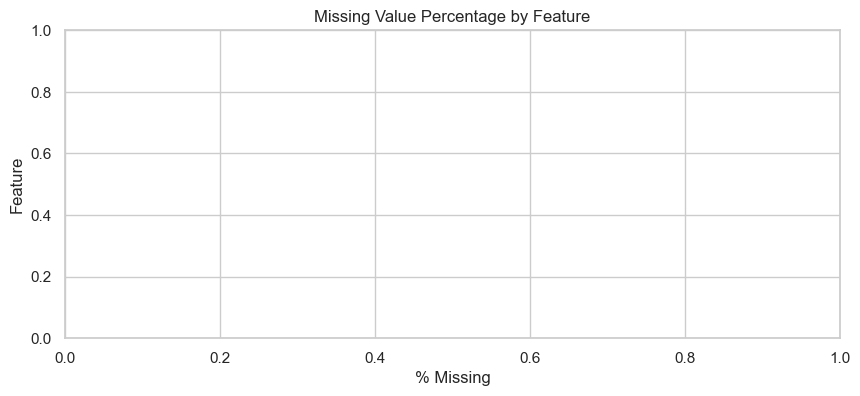

In [7]:
# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
display(missing_df.head(15))

# Visualization
plt.figure(figsize=(10,4))
sns.barplot(x=missing_percent[missing_percent > 0], y=missing_percent[missing_percent > 0].index)
plt.title("Missing Value Percentage by Feature")
plt.xlabel("% Missing")
plt.ylabel("Feature")
plt.show()


Drop Addiction and sr 

In [8]:
df = df.drop(['sr'], axis=1)


Feature Types Overview

In [9]:
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
cat_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Numeric features: {len(num_features)}")
print(f"Categorical features: {len(cat_features)}")

print("\nExample numeric features:", num_features[:5])
print("Example categorical features:", cat_features[:5])


Numeric features: 4
Categorical features: 46

Example numeric features: ['age', 'number_of_the_latest_pregnancy', 'phq9_score', 'epds_score']
Example categorical features: ['residence', 'education_level', 'marital_status', 'occupation_before_latest_pregnancy', 'monthly_income_before_latest_pregnancy']


Numarical Distribution

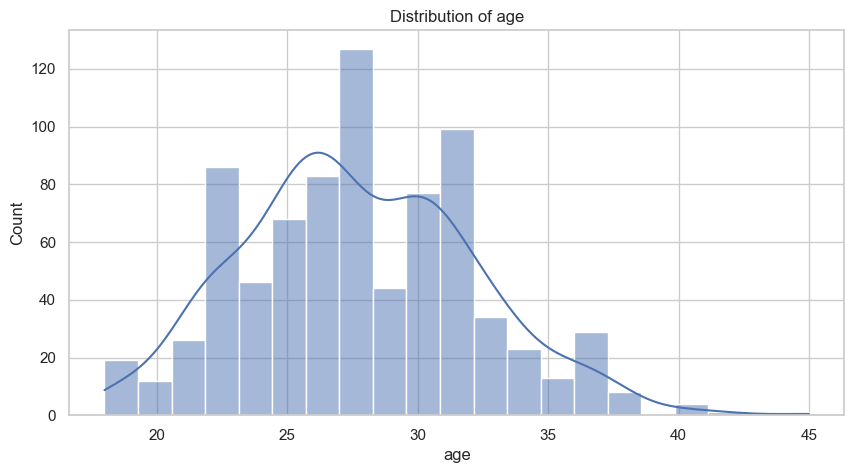

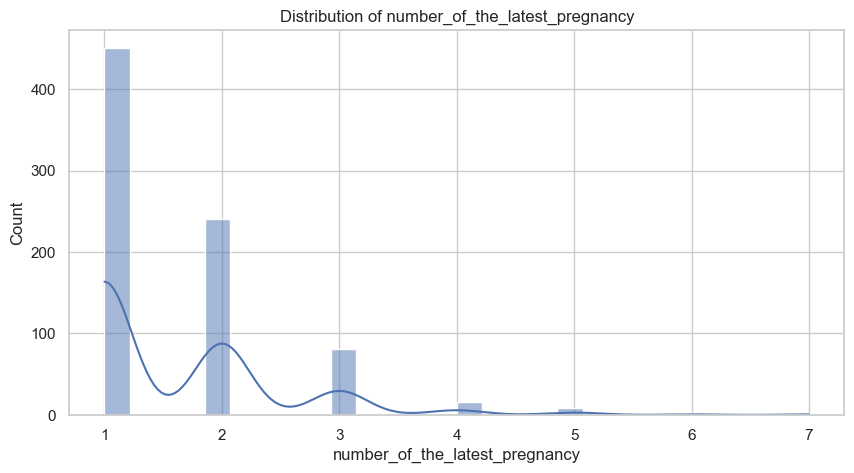

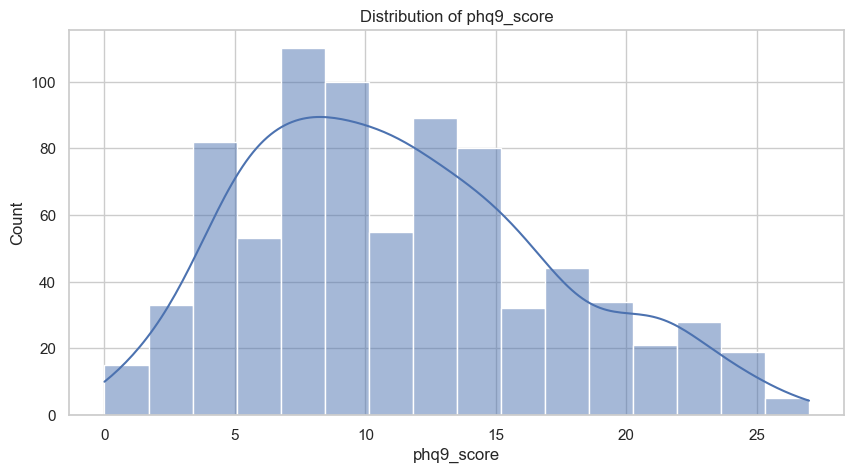

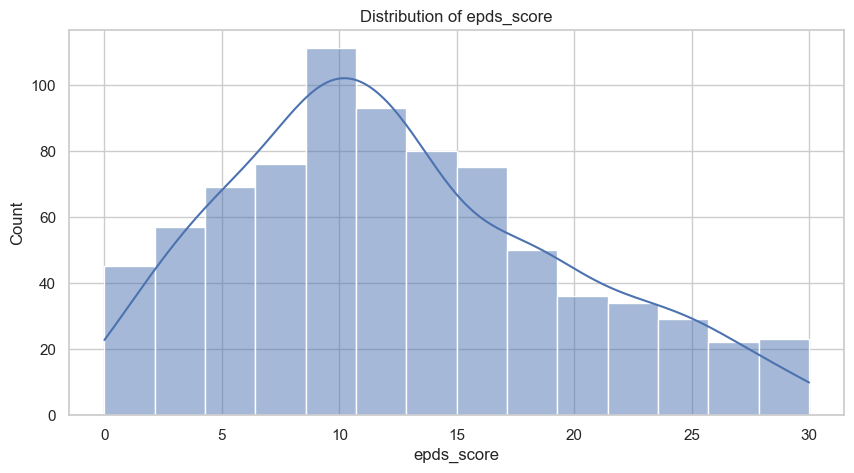

In [10]:
for col in num_features:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


categorical Distributoin

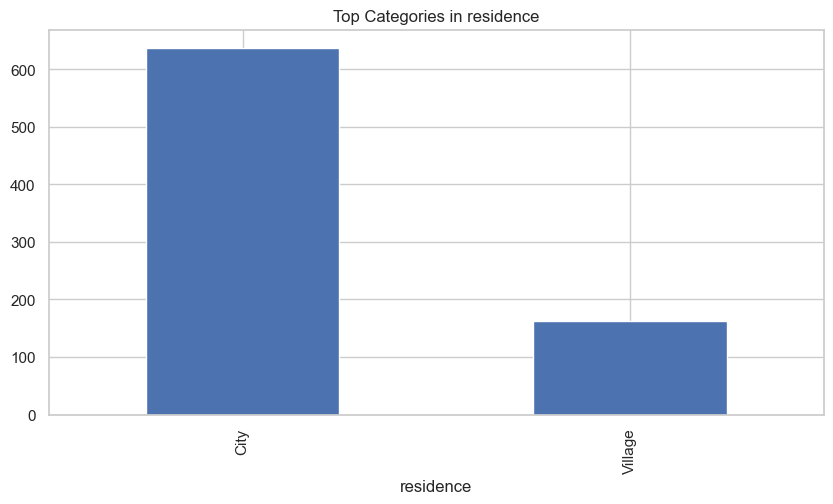

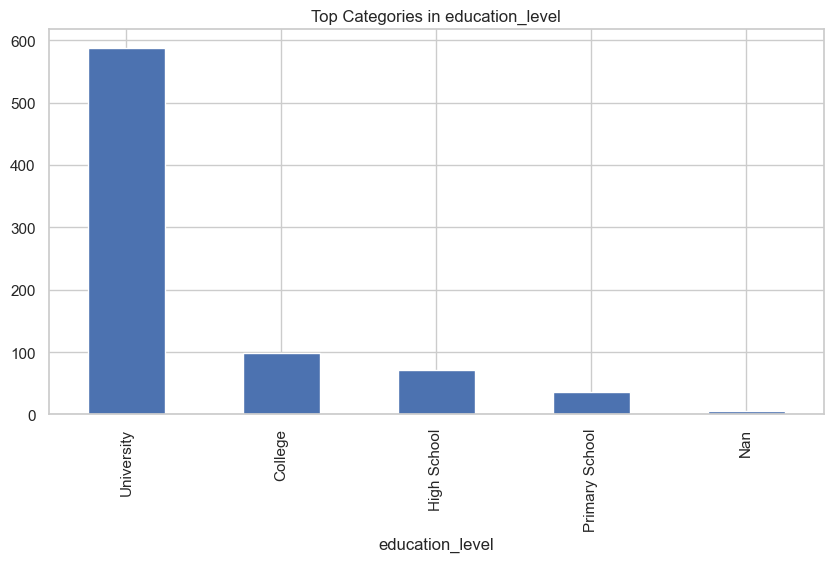

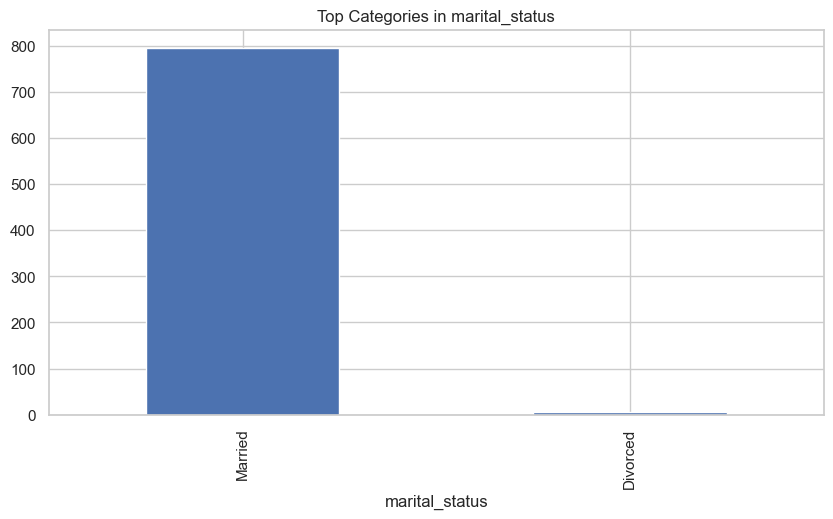

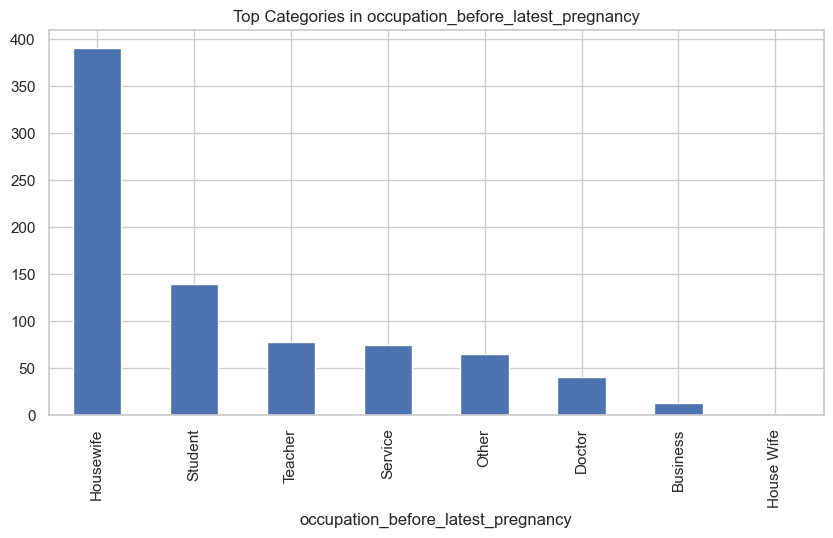

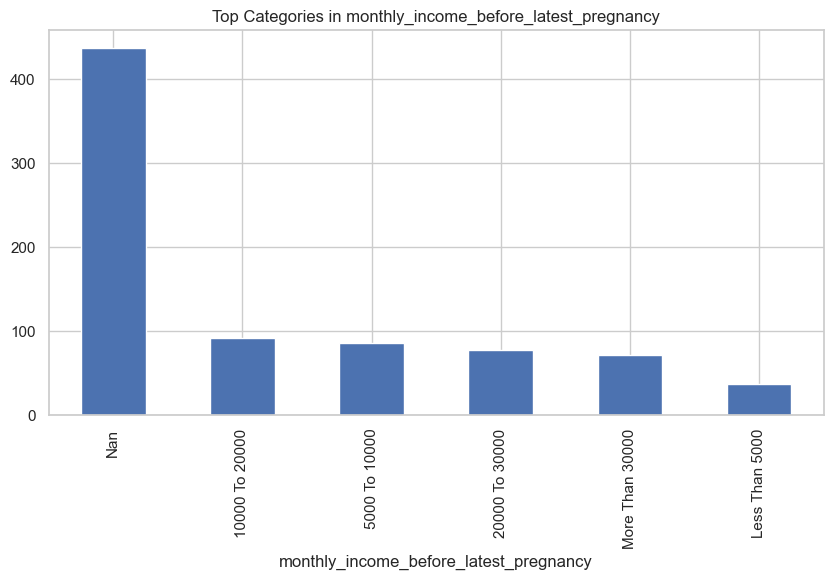

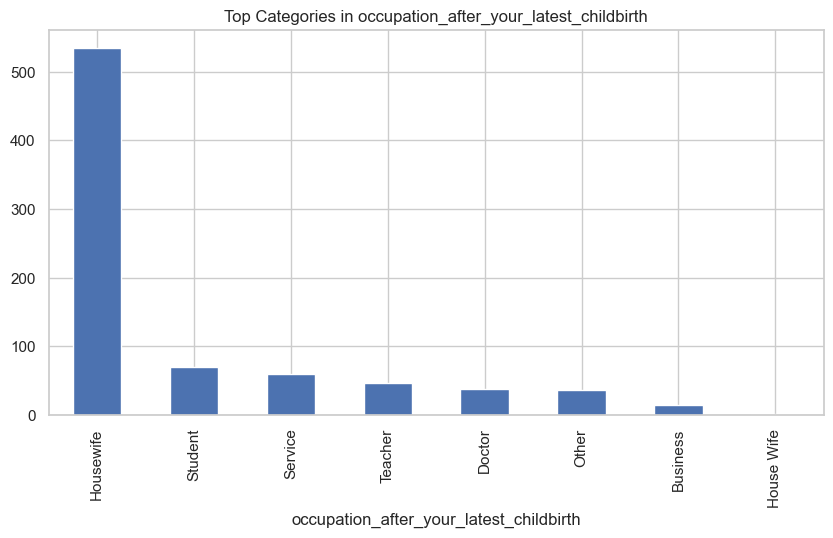

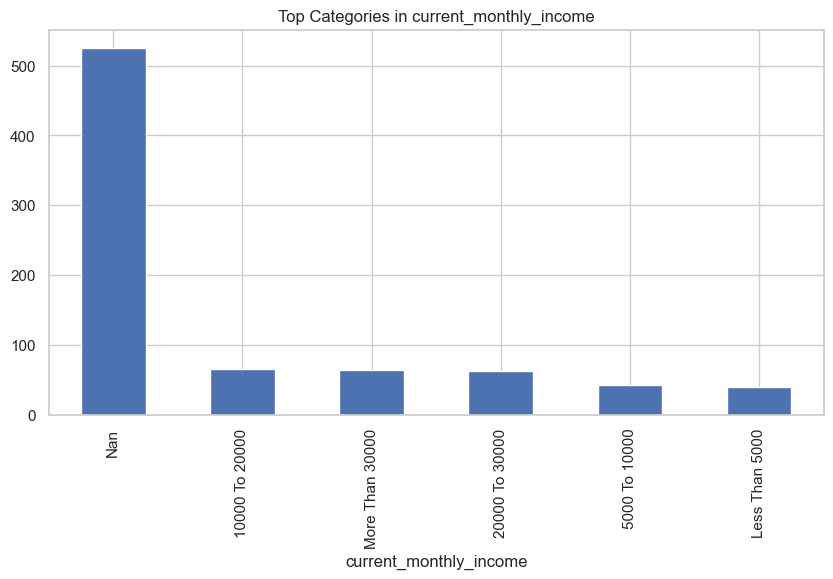

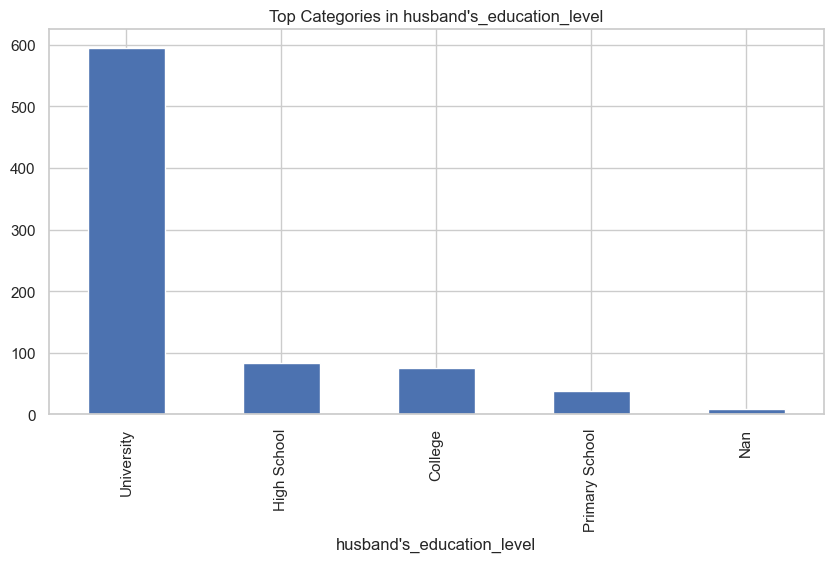

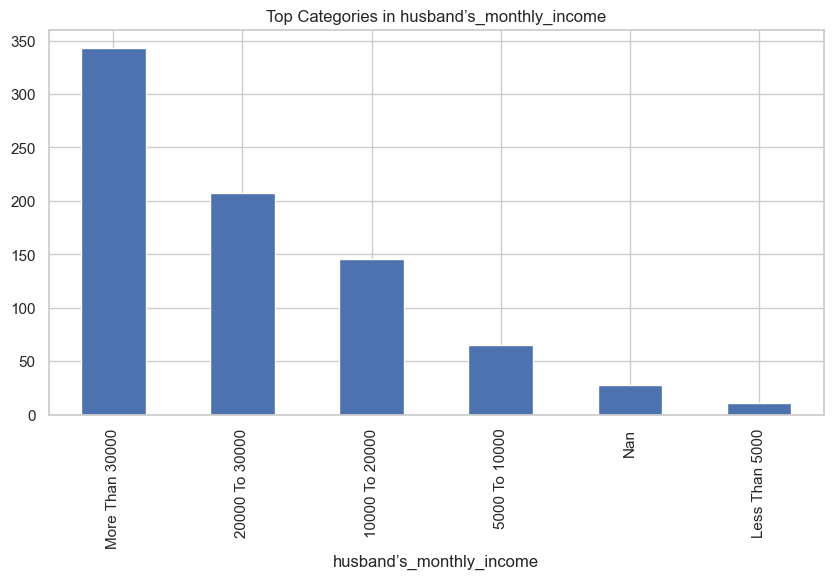

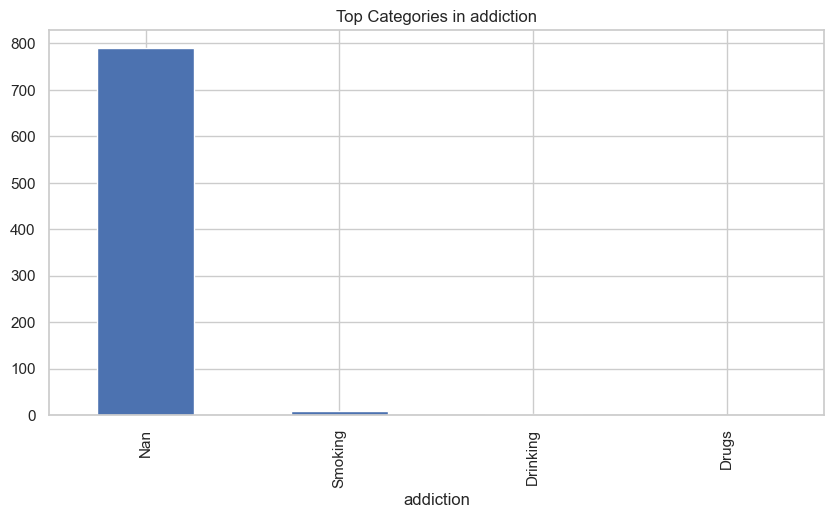

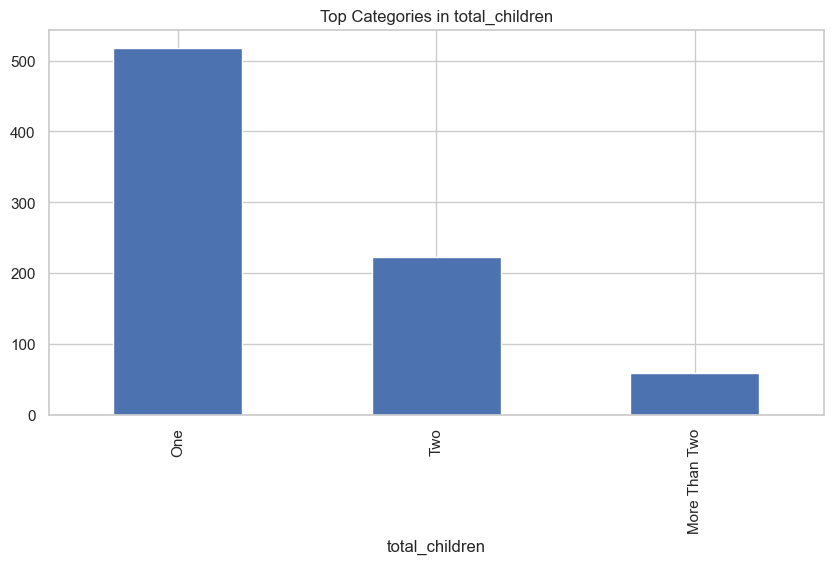

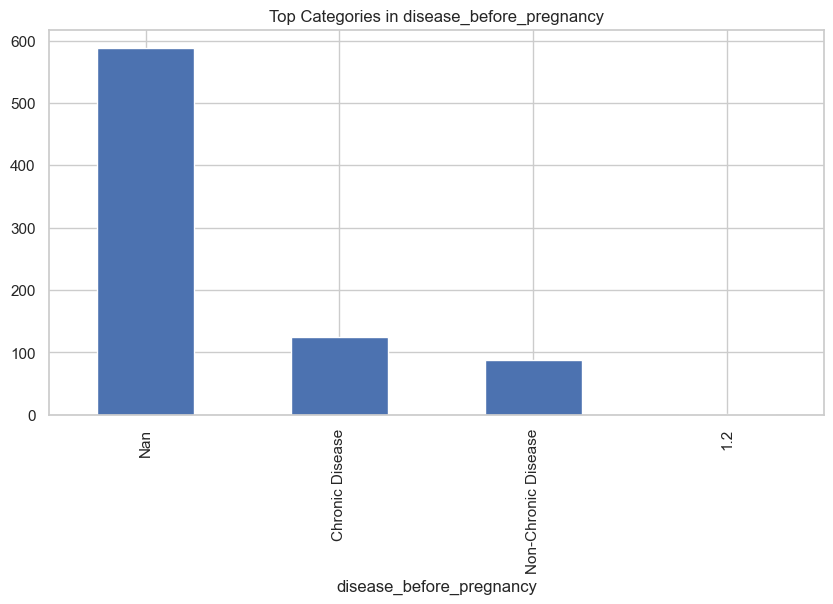

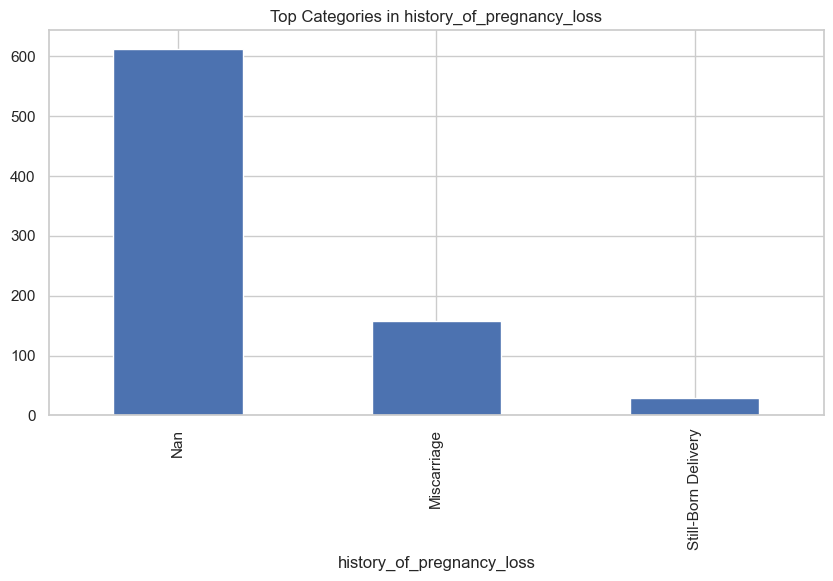

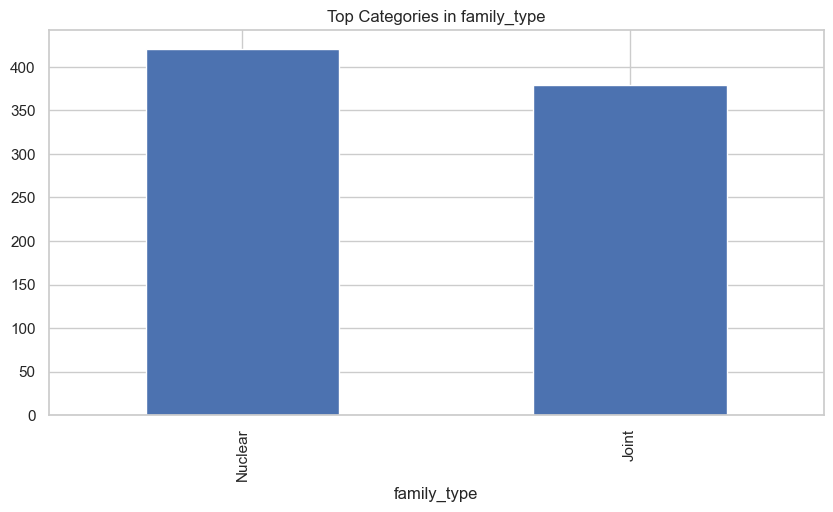

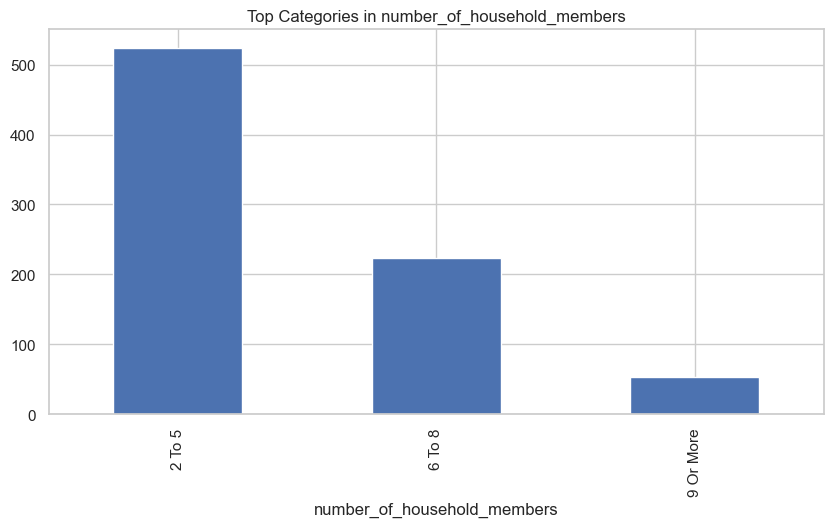

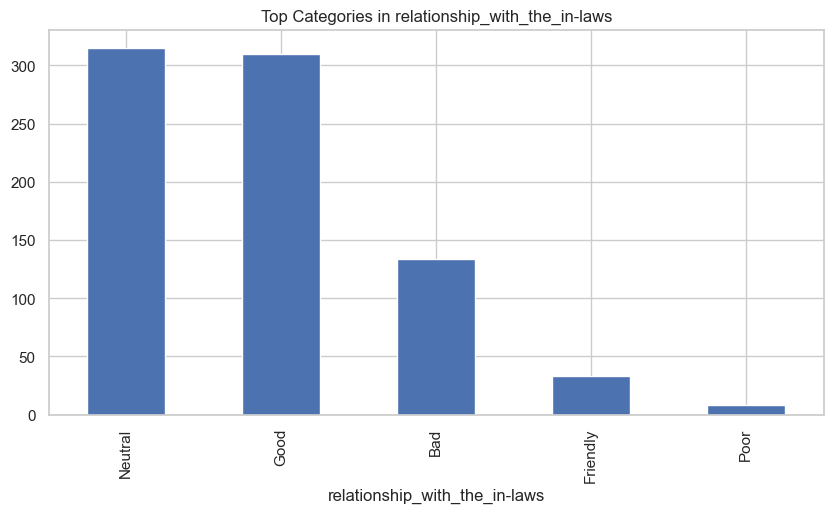

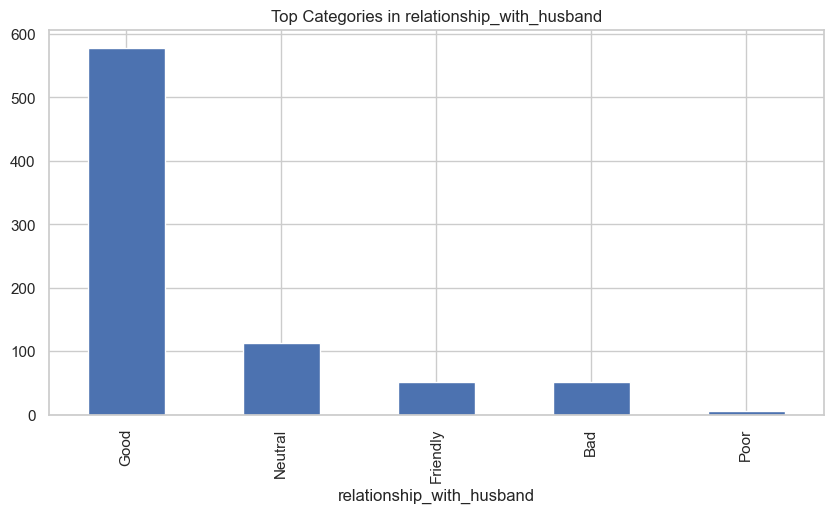

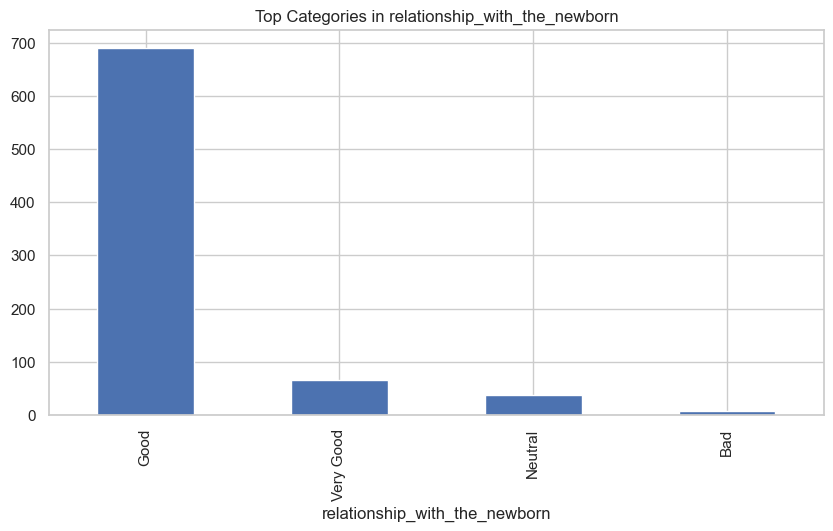

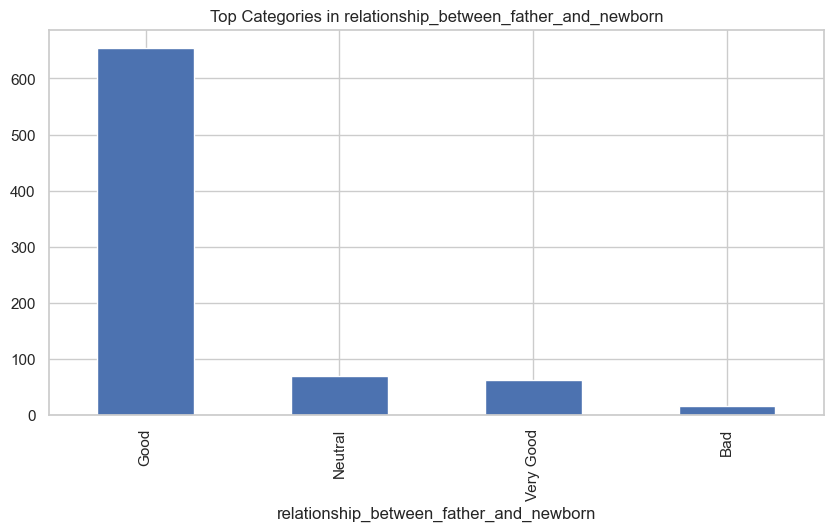

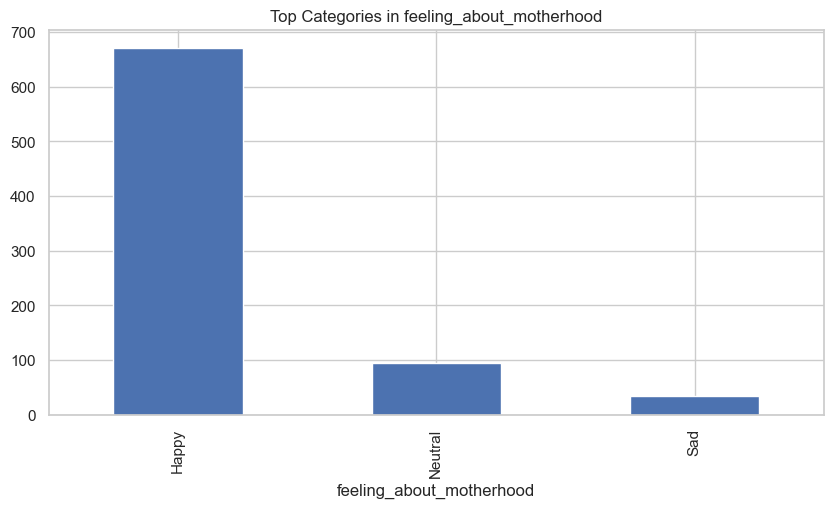

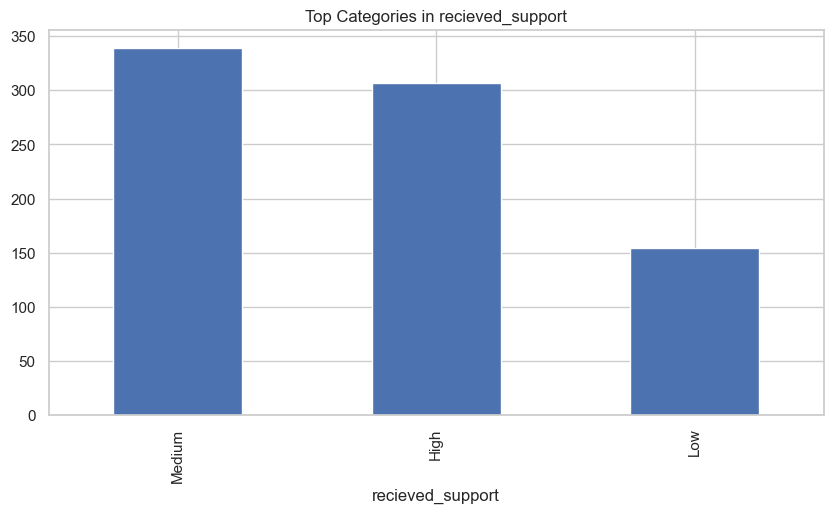

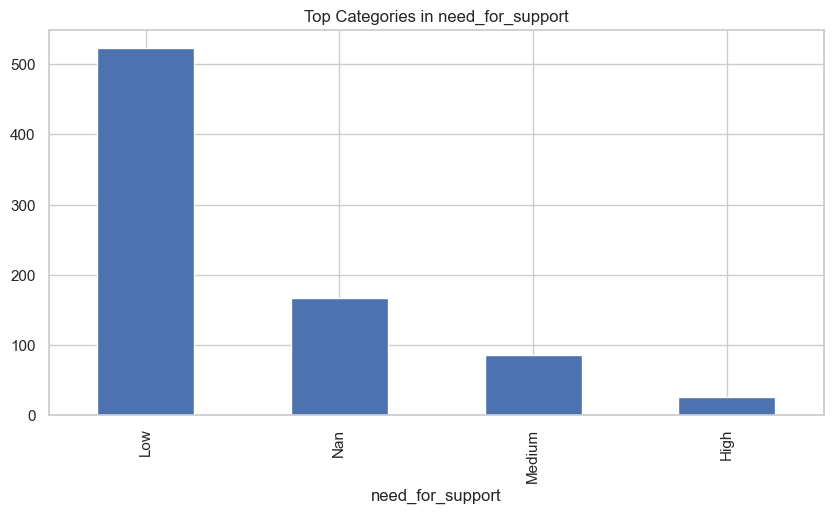

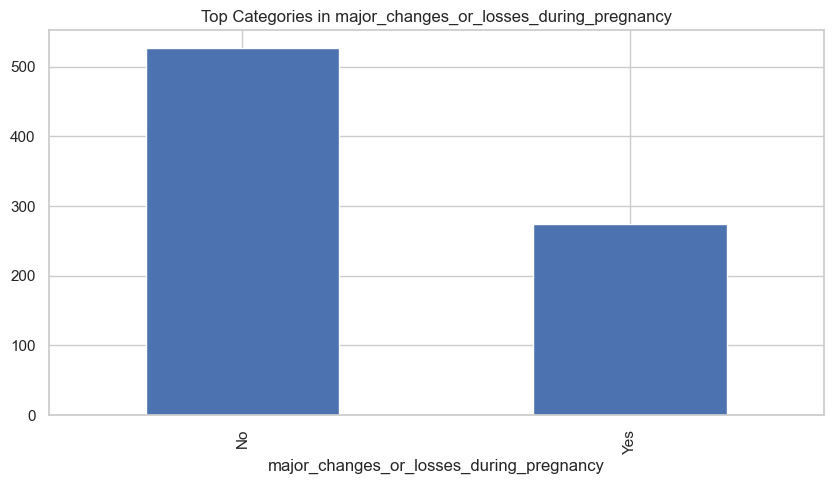

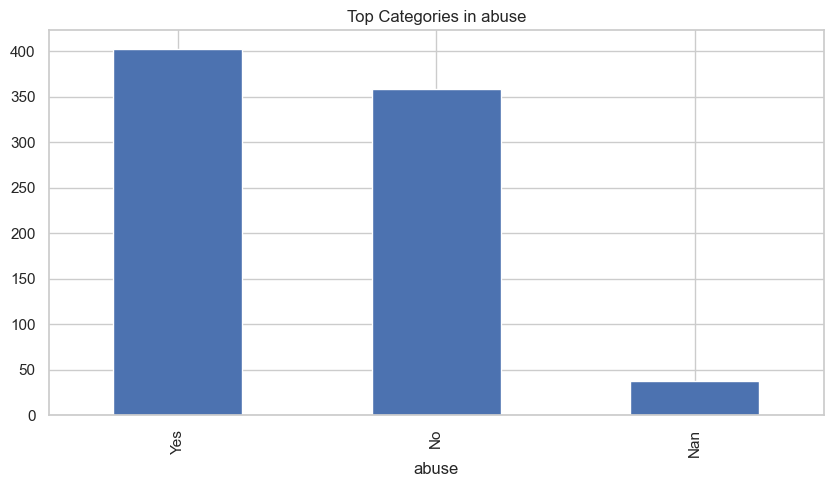

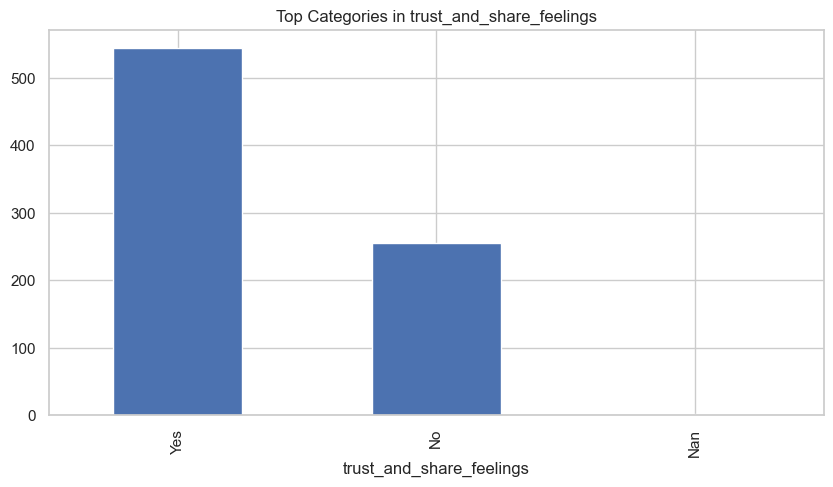

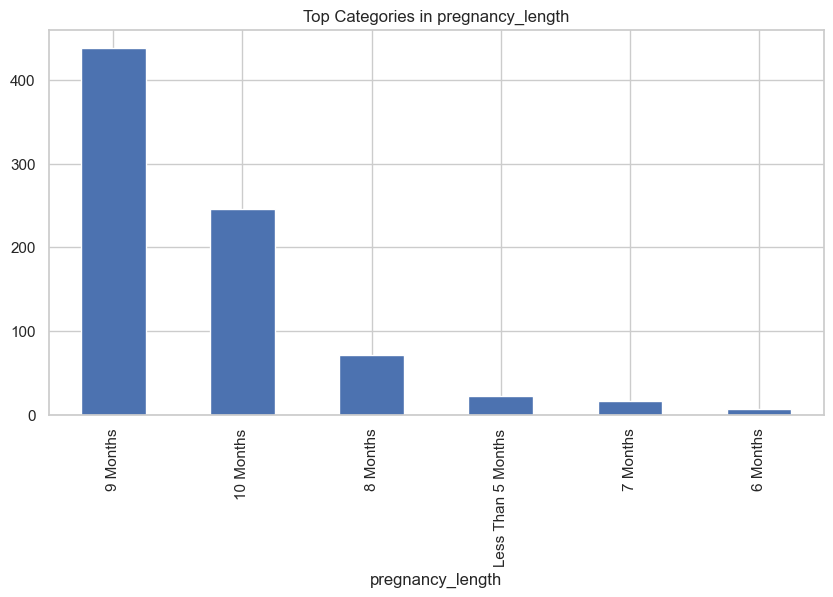

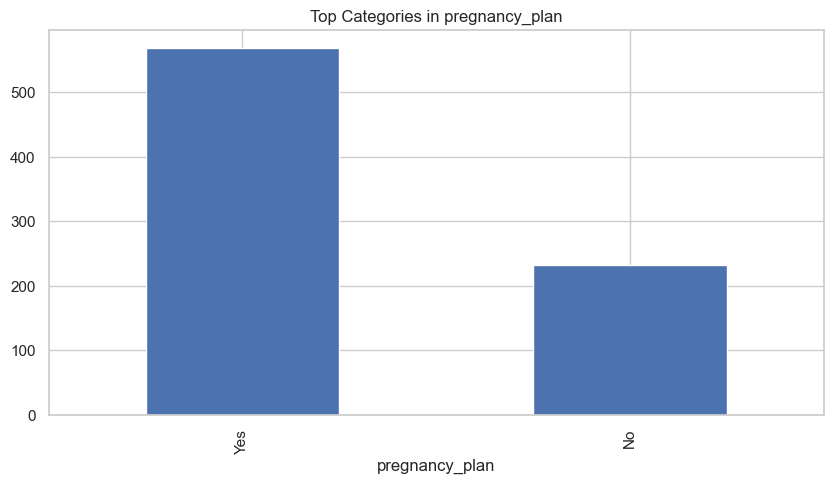

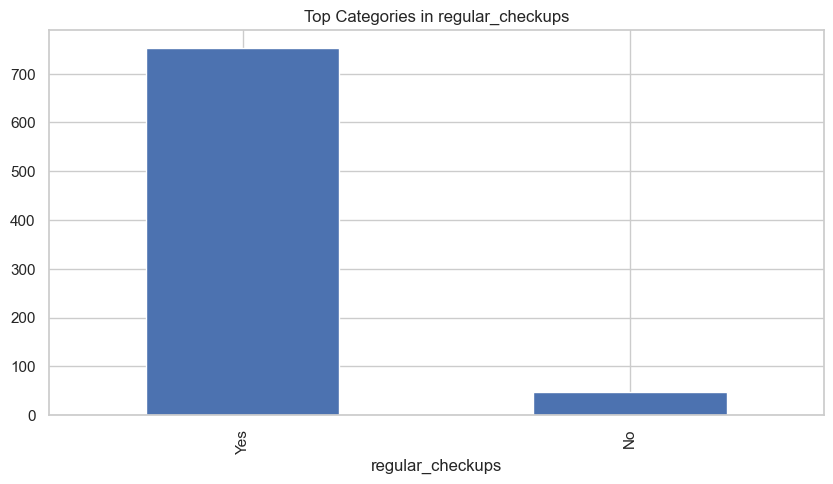

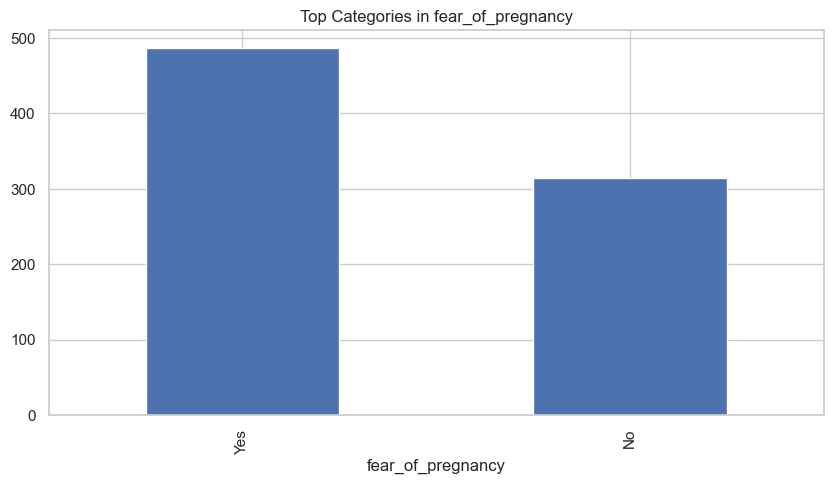

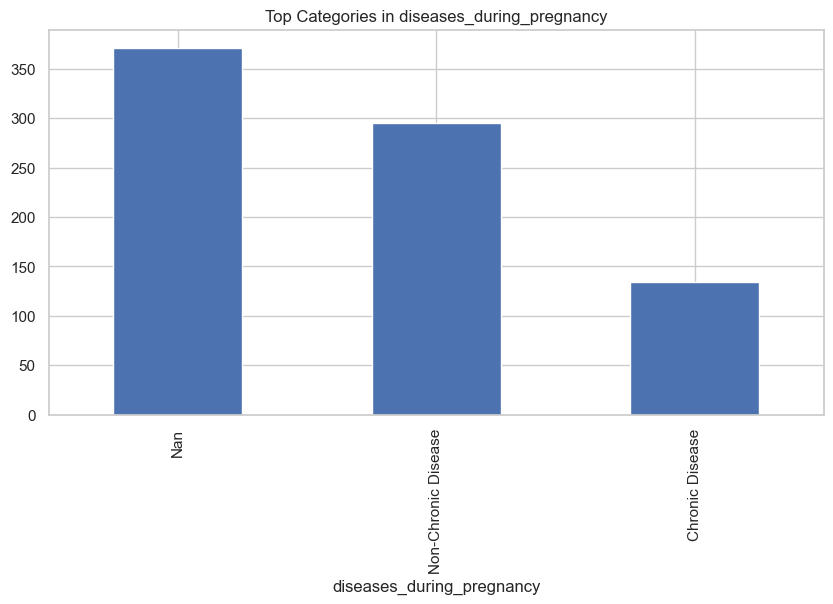

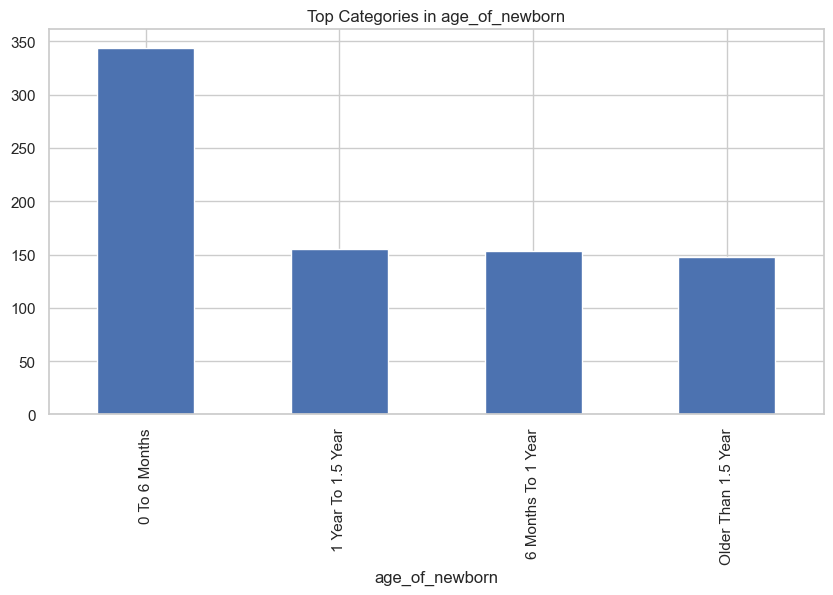

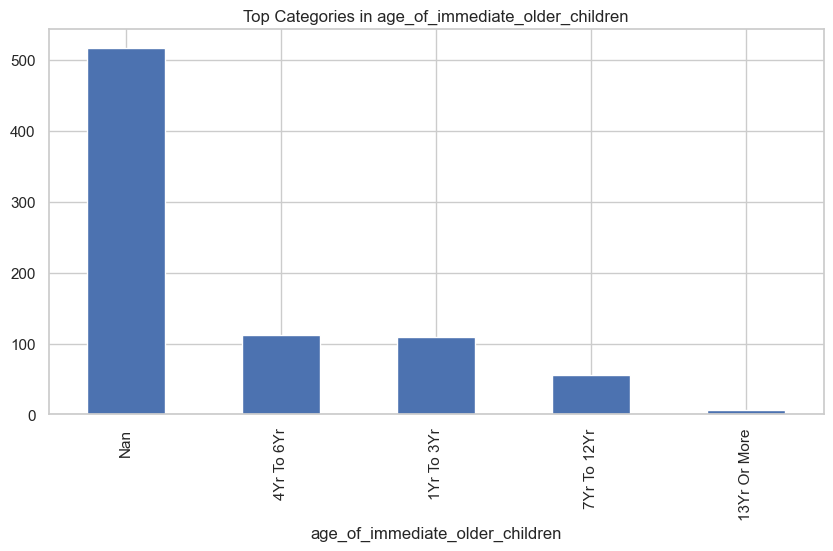

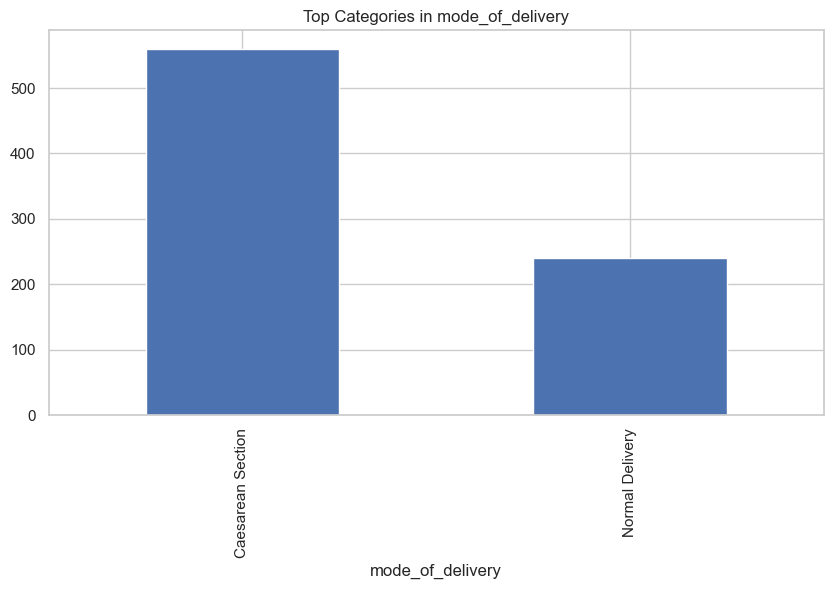

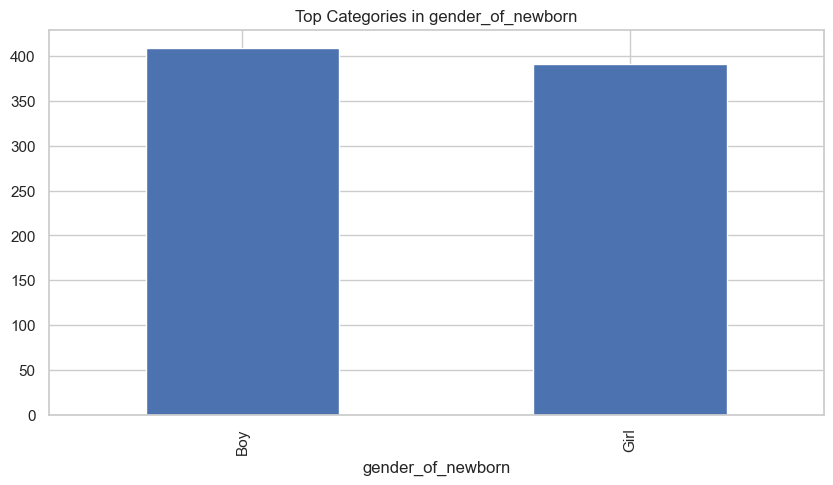

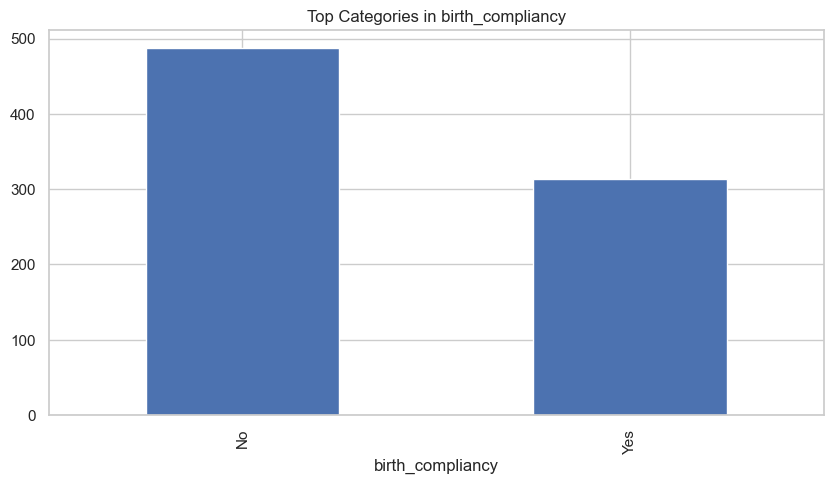

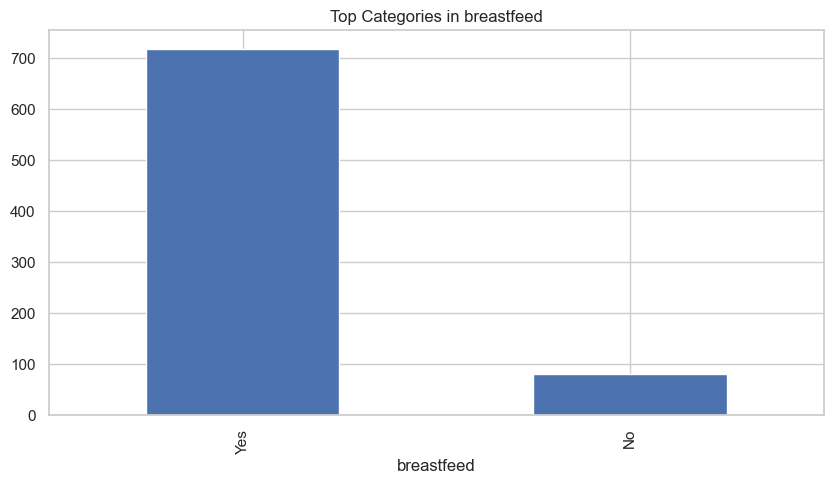

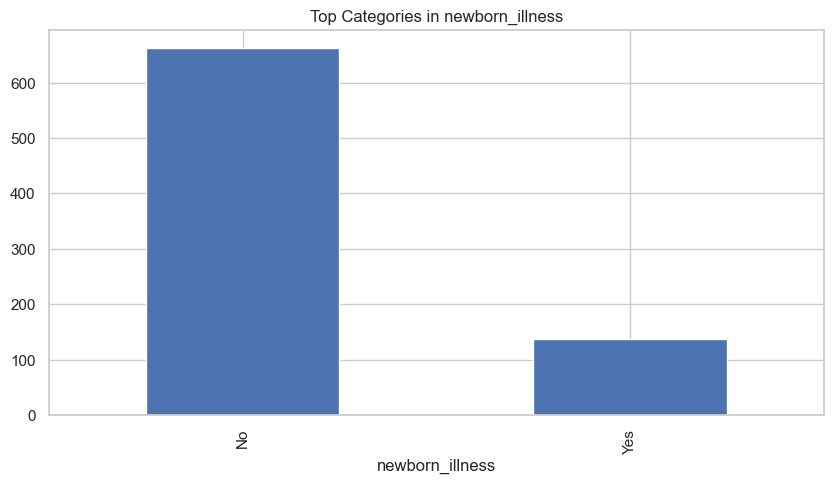

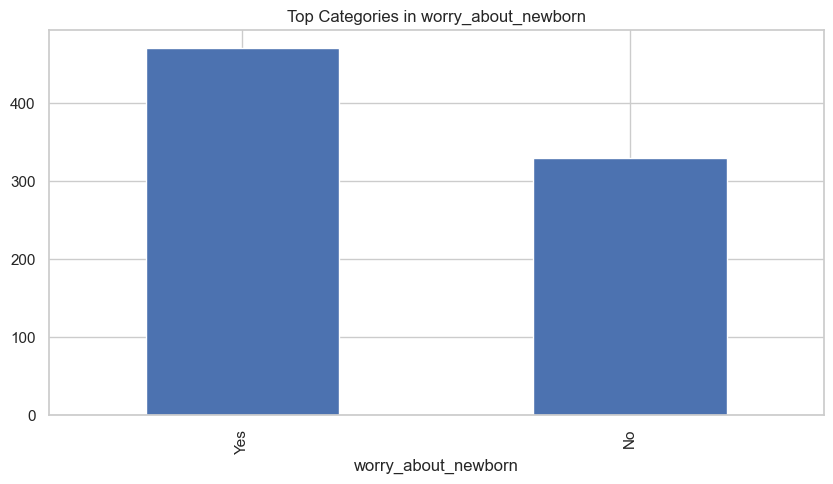

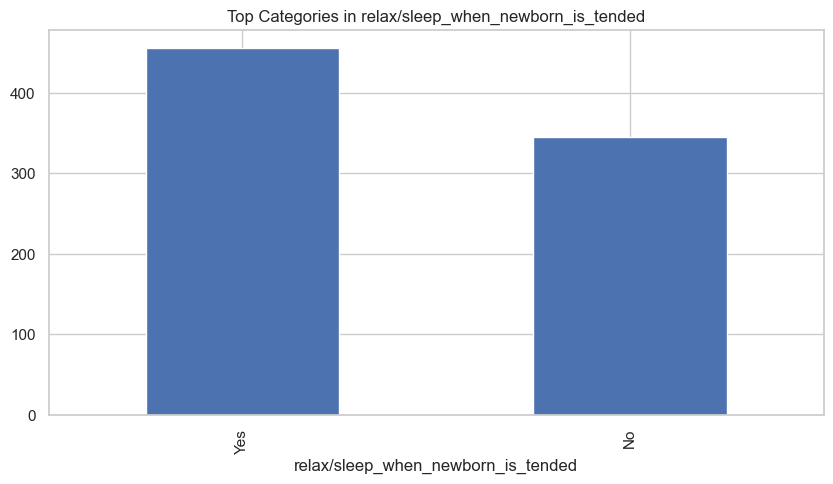

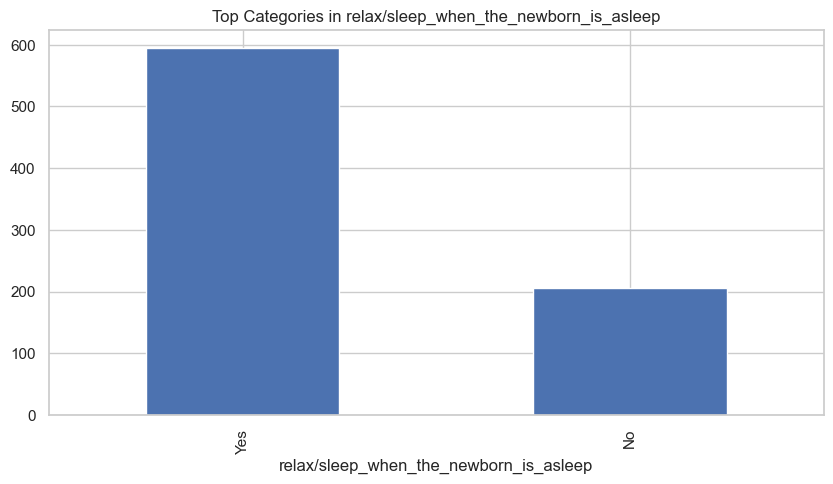

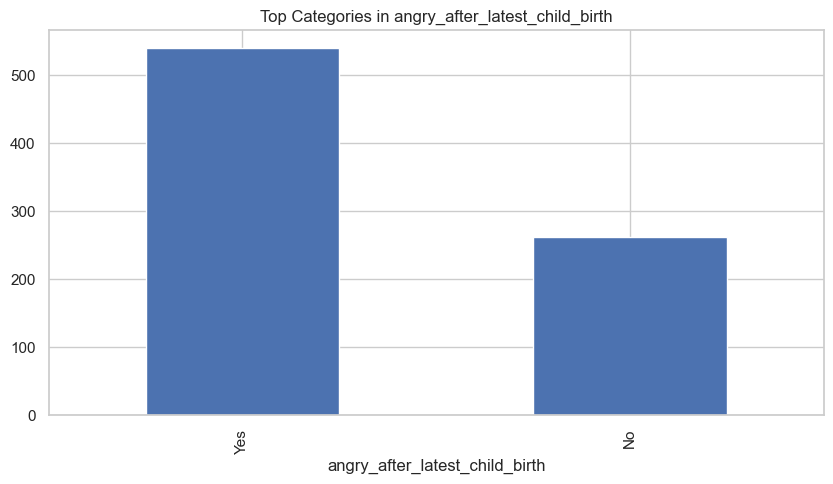

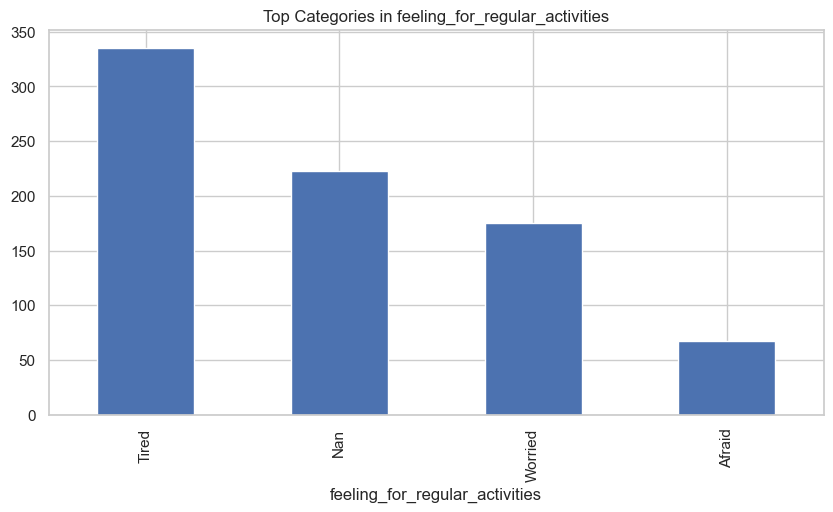

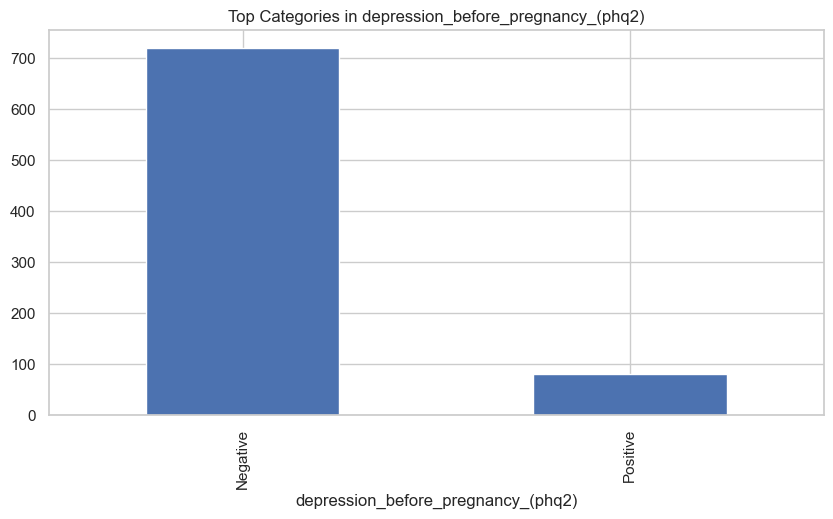

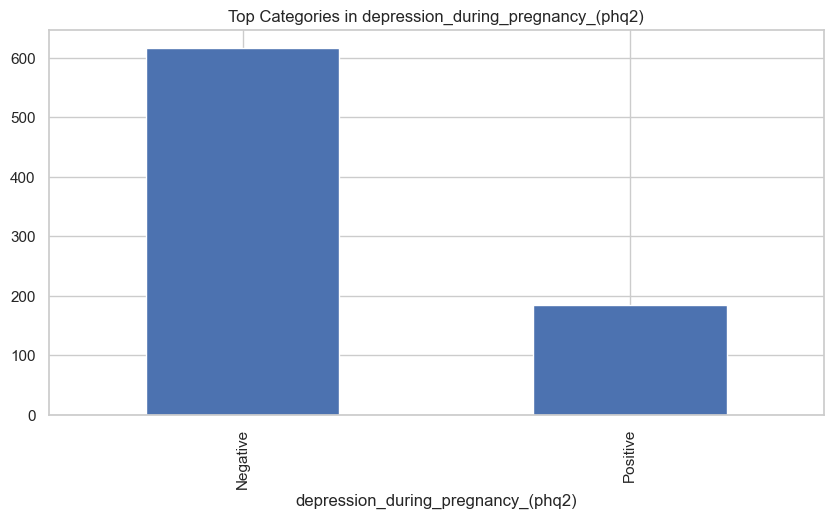

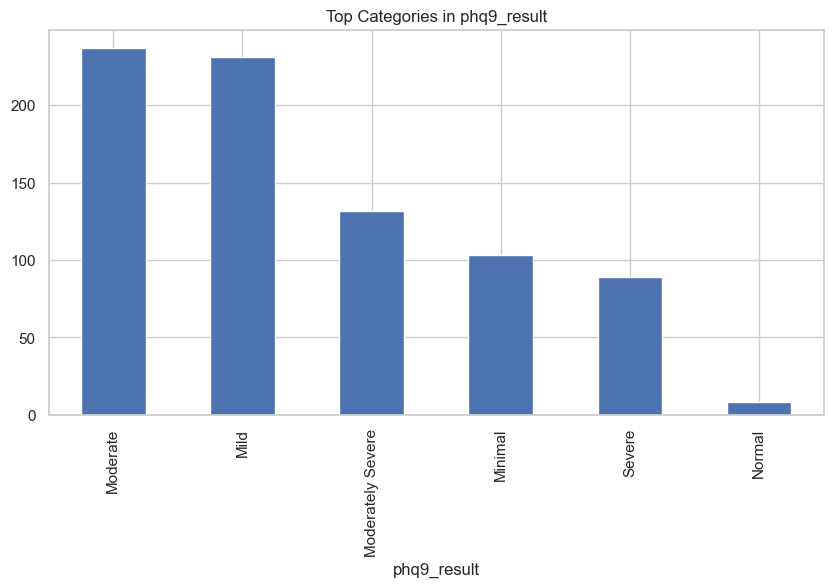

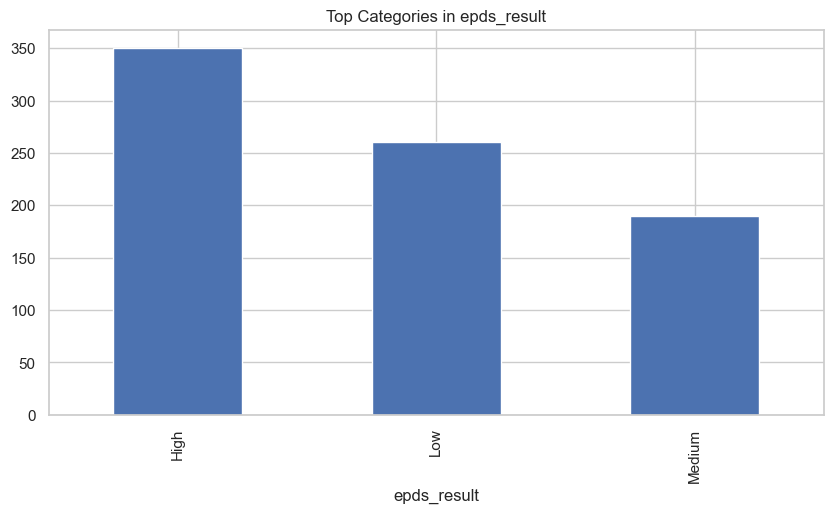

In [11]:
for col in cat_features:
    plt.figure()
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top Categories in {col}")
    plt.show()


Numarical corelation

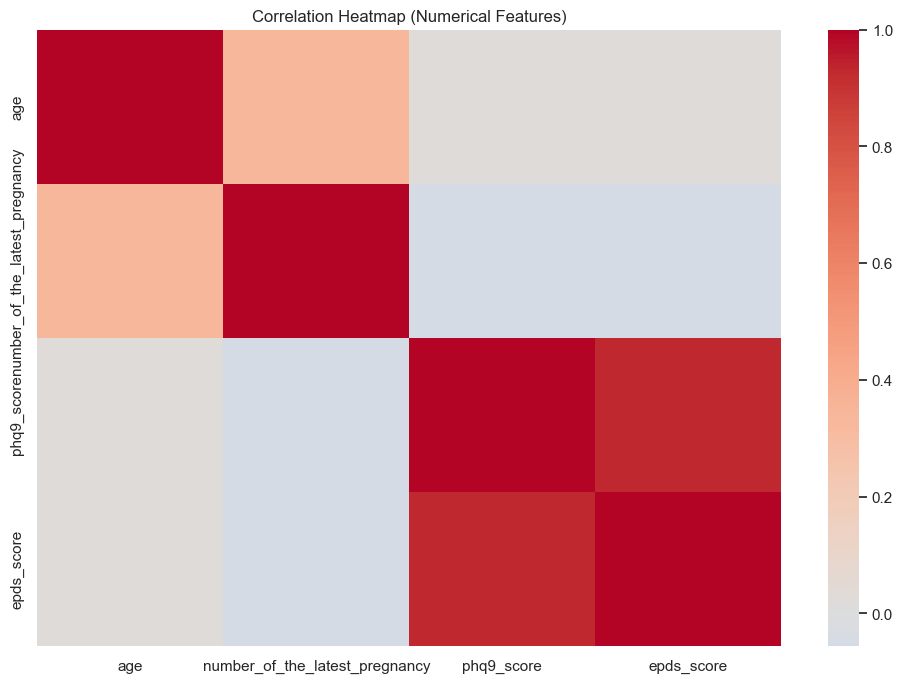

In [12]:
corr = df[num_features].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# Top correlated features with result (if exists)
if 'result' in df.columns:
    print("Top correlated with 'result':")
    display(corr['result'].sort_values(ascending=False))


In [13]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

target = 'epds_result'  # change to 'epds_result' if needed
cat_features = df.select_dtypes(include=['object', 'string']).columns

for col in cat_features:
    if col != target:
        print(col, "→", cramers_v(df[col], df[target]))

residence → 0.041142372247928875
education_level → 0.14276850441827024
marital_status → 0.06301034134395138
occupation_before_latest_pregnancy → 0.09763309725916358
monthly_income_before_latest_pregnancy → 0.07973063640452956
occupation_after_your_latest_childbirth → 0.08098723178754613
current_monthly_income → 0.0871243076031335
husband's_education_level → 0.1207252249748176
husband’s_monthly_income → 0.07205710394237072
addiction → 0.045685208459349
total_children → 0.08305312765837586
disease_before_pregnancy → 0.12330897729515343
history_of_pregnancy_loss → 0.02559338517160013
family_type → 0.12266654017683783
number_of_household_members → 0.08289607491906555
relationship_with_the_in-laws → 0.25190800856068724
relationship_with_husband → 0.24414592739433924
relationship_with_the_newborn → 0.136024373317544
relationship_between_father_and_newborn → 0.16618555875046903
feeling_about_motherhood → 0.21163906712150346
recieved_support → 0.20606619589550218
need_for_support → 0.235099726

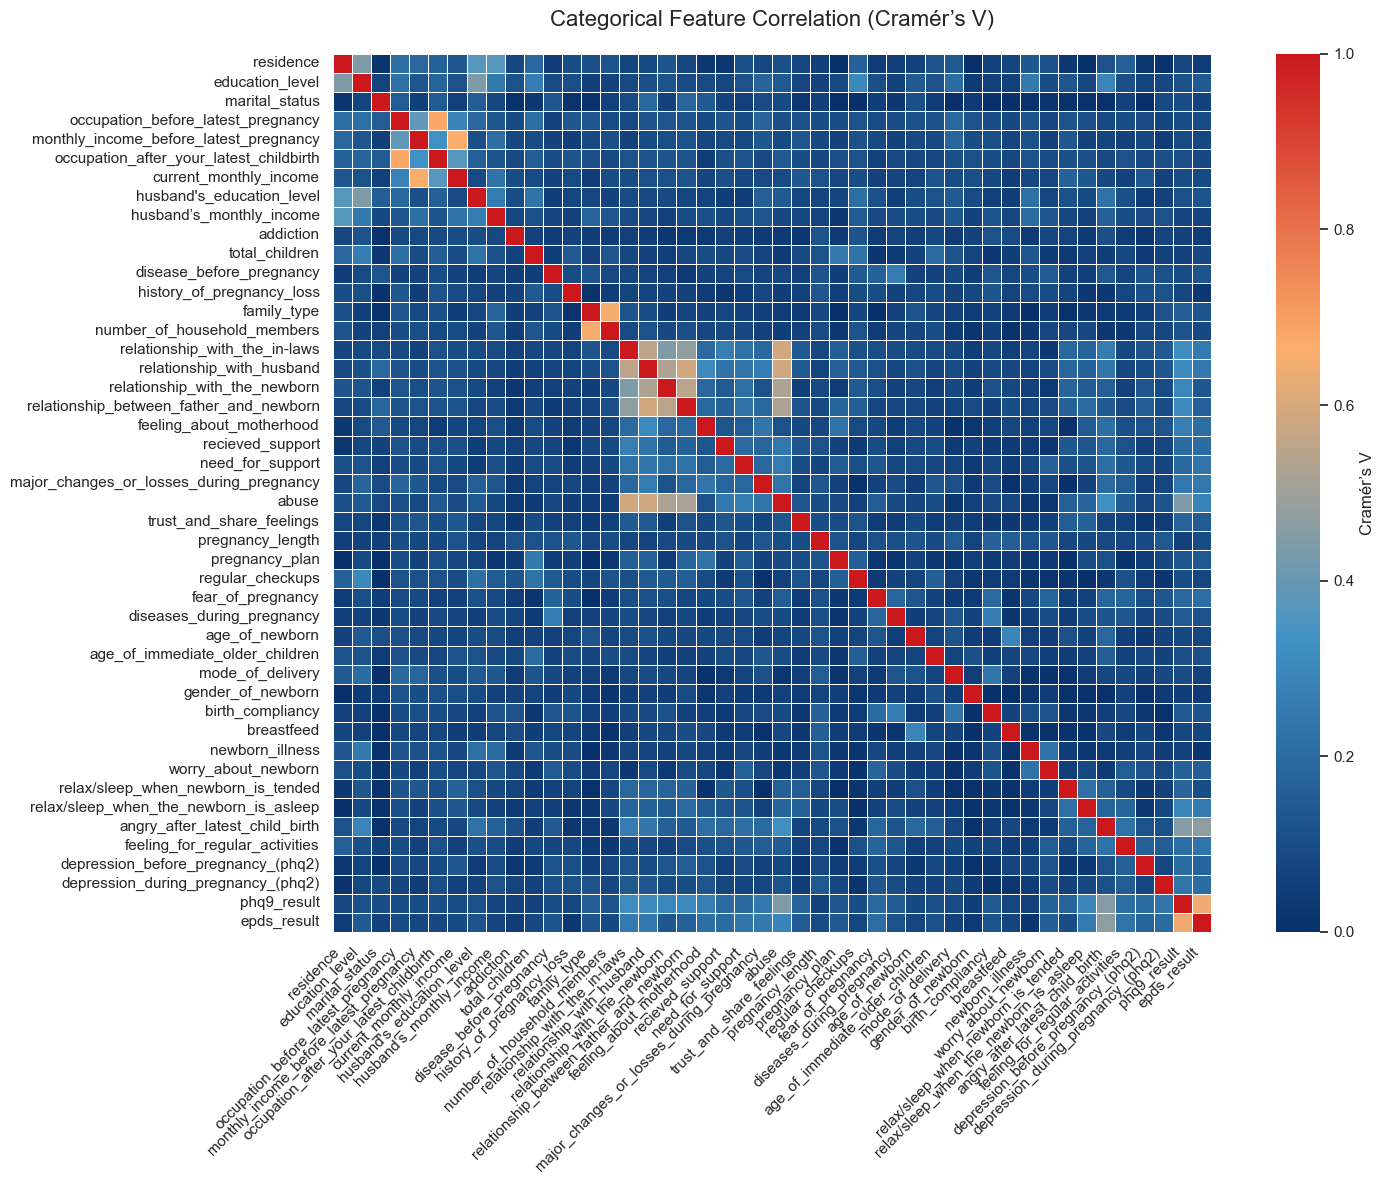

In [14]:

from matplotlib.colors import LinearSegmentedColormap

# --- Function to calculate Cramér’s V ---
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

# --- Compute pairwise Cramér’s V ---
cat_cols = df.select_dtypes(include=['object', 'string']).columns
cramers_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

for col1, col2 in itertools.combinations(cat_cols, 2):
    val = cramers_v(df[col1], df[col2])
    cramers_matrix.loc[col1, col2] = val
    cramers_matrix.loc[col2, col1] = val

np.fill_diagonal(cramers_matrix.values, 1.0)

# --- 4-color custom colormap ---
colors = ["#08306b", "#4292c6", "#fdae6b", "#cb181d"]  # dark blue → light blue → orange → red
custom_cmap = LinearSegmentedColormap.from_list("BlueOrangeRed", colors, N=256)

# --- Plot heatmap ---
plt.figure(figsize=(16, 12))
sns.heatmap(
    cramers_matrix.astype(float),
    cmap=custom_cmap,
    vmin=0, vmax=1,
    annot=False,     # ❌ no numbers inside boxes
    square=True,
    cbar_kws={'label': "Cramér’s V"},
    linewidths=0.5,
    linecolor='white'
)
plt.title("Categorical Feature Correlation (Cramér’s V)", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


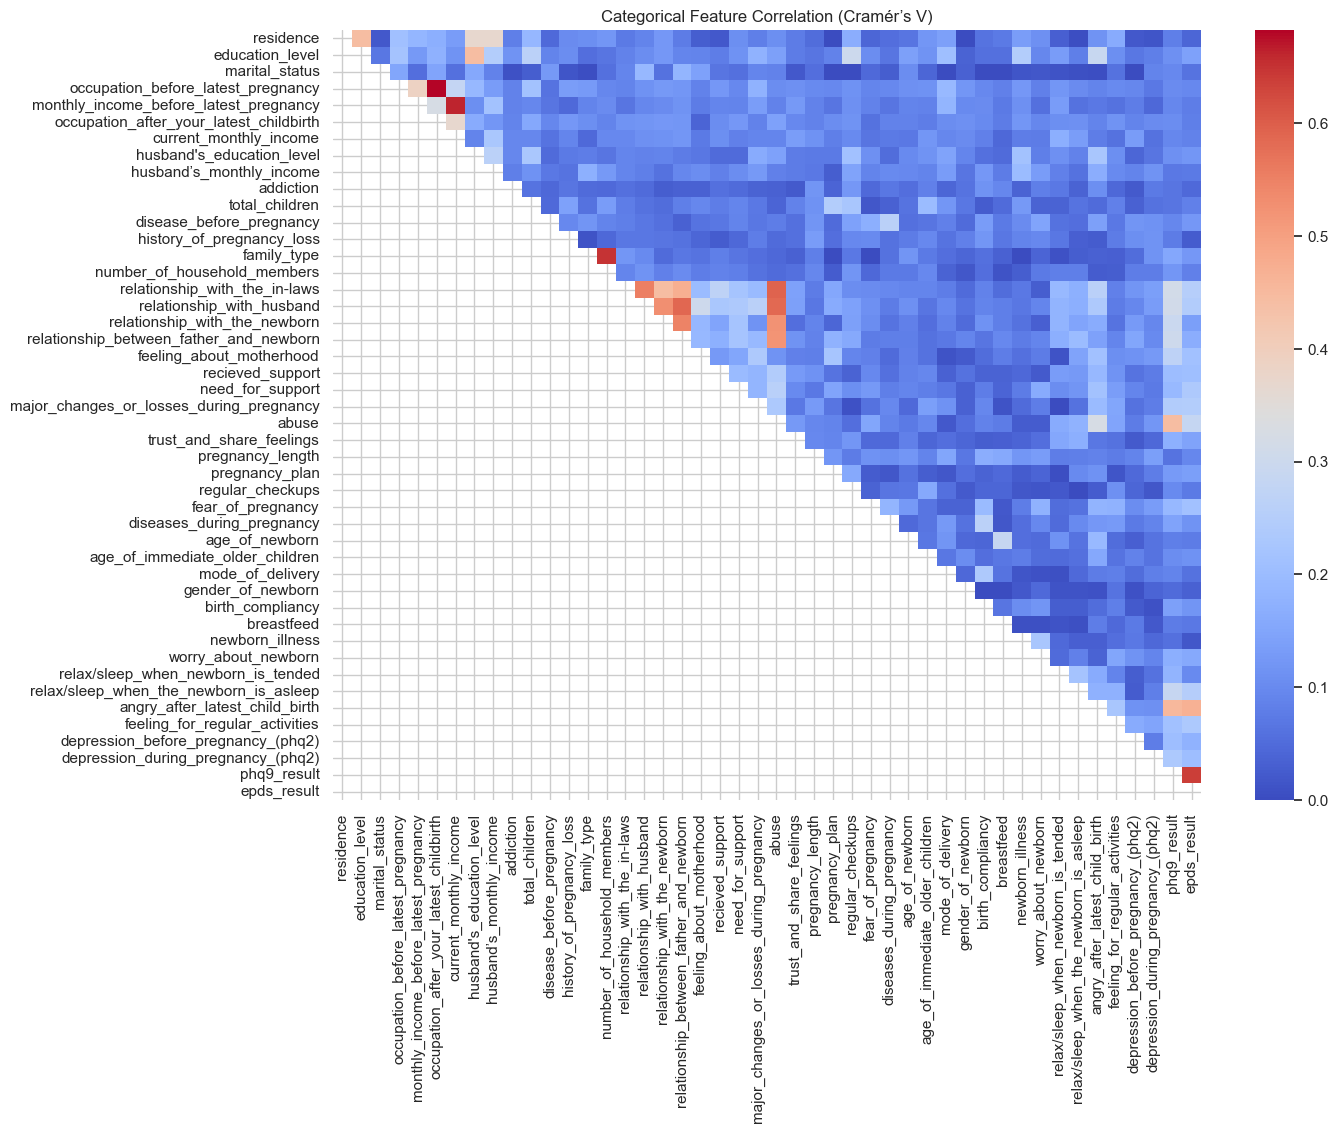

In [15]:
cat_cols = df.select_dtypes(include=['object', 'string']).columns
cramers_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

for col1, col2 in itertools.combinations(cat_cols, 2):
    cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

plt.figure(figsize=(14, 10))
sns.heatmap(cramers_matrix, cmap='coolwarm')
plt.title("Categorical Feature Correlation (Cramér’s V)")
plt.show()

Outlier Detection (Numerical)

In [16]:
from scipy import stats

num_features = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_features:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outliers = (z_scores > 3).sum()
    print(f"{col}: {outliers} outliers")


age: 2 outliers
number_of_the_latest_pregnancy: 12 outliers
phq9_score: 0 outliers
epds_score: 0 outliers


Rare Categories

In [17]:
cat_features = df.select_dtypes(include=['object', 'string']).columns

for col in cat_features:
    value_counts = df[col].value_counts()
    rare_vals = value_counts[value_counts < 10]  # threshold can be changed

    print(f"{col}: {len(rare_vals)} rare categories → {list(rare_vals.index)}")



residence: 0 rare categories → []
education_level: 1 rare categories → ['Nan']
marital_status: 1 rare categories → ['Divorced']
occupation_before_latest_pregnancy: 1 rare categories → ['House Wife']
monthly_income_before_latest_pregnancy: 0 rare categories → []
occupation_after_your_latest_childbirth: 1 rare categories → ['House Wife']
current_monthly_income: 0 rare categories → []
husband's_education_level: 1 rare categories → ['Nan']
husband’s_monthly_income: 0 rare categories → []
addiction: 3 rare categories → ['Smoking', 'Drinking', 'Drugs']
total_children: 0 rare categories → []
disease_before_pregnancy: 1 rare categories → ['1.2']
history_of_pregnancy_loss: 0 rare categories → []
family_type: 0 rare categories → []
number_of_household_members: 0 rare categories → []
relationship_with_the_in-laws: 1 rare categories → ['Poor']
relationship_with_husband: 1 rare categories → ['Poor']
relationship_with_the_newborn: 1 rare categories → ['Bad']
relationship_between_father_and_newborn: 

house wife-> housewife

In [18]:
cols_to_clean = [
    'occupation_before_latest_pregnancy',
    'occupation_after_your_latest_childbirth',
    'disease_before_pregnancy',
    'education_level',
    "husband's_education_level",
    'history_of_pregnancy_loss',
    'diseases_during_pregnancy'
]

for col in cols_to_clean:
    df[col] = (
        df[col]
        .str.strip()
        .str.lower()
        .replace({'house wife': 'housewife', 'house-wife': 'housewife','High school' :'High School', '1.2': 'Chronic Disease','Chronic disease':'Chronic Disease','Non-chronic disease':'Non-chronic Disease', 'Still-born delivery': 'Still-born Delivery'})
        .str.title()
    )

df["diseases_during_pregnancy"].unique()




array(['Nan', 'Chronic Disease', 'Non-Chronic Disease'], dtype=object)

Bivariate Analysis (vs. Result / PHQ9 / EPDS)

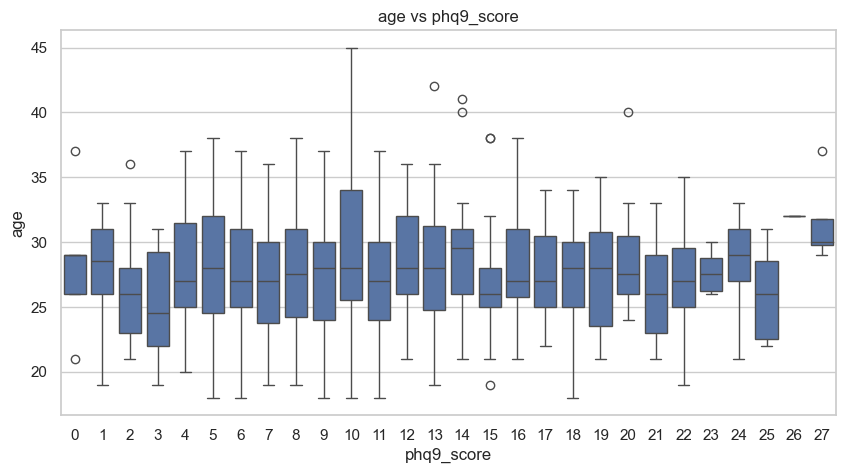

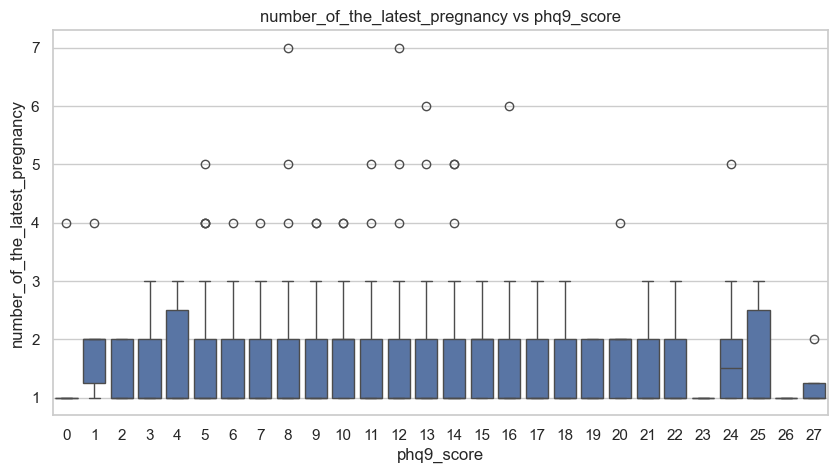

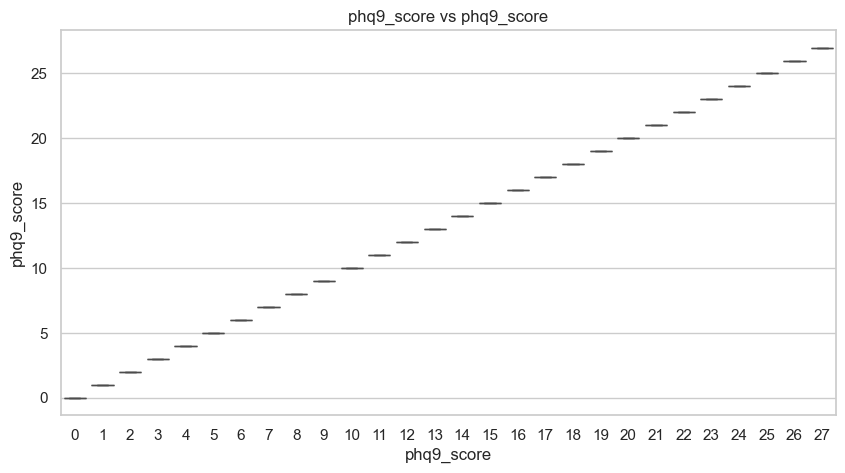

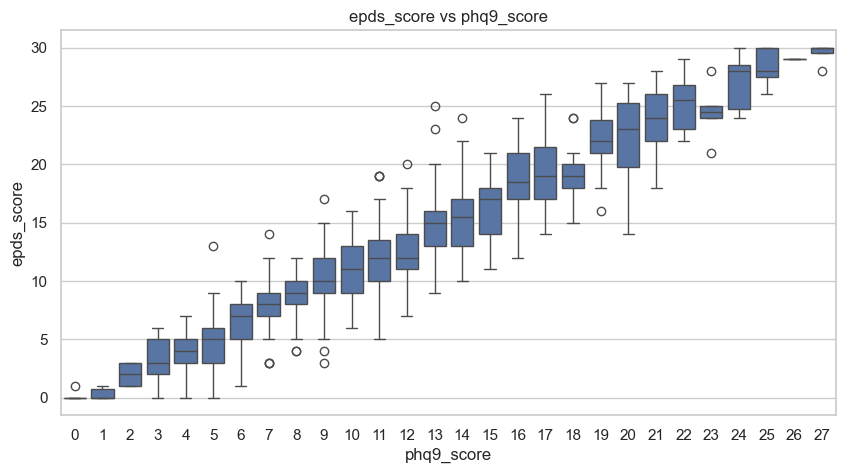

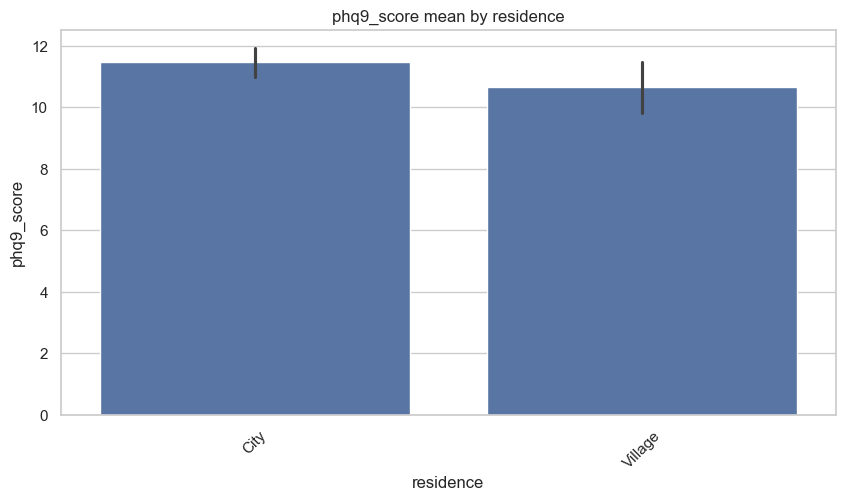

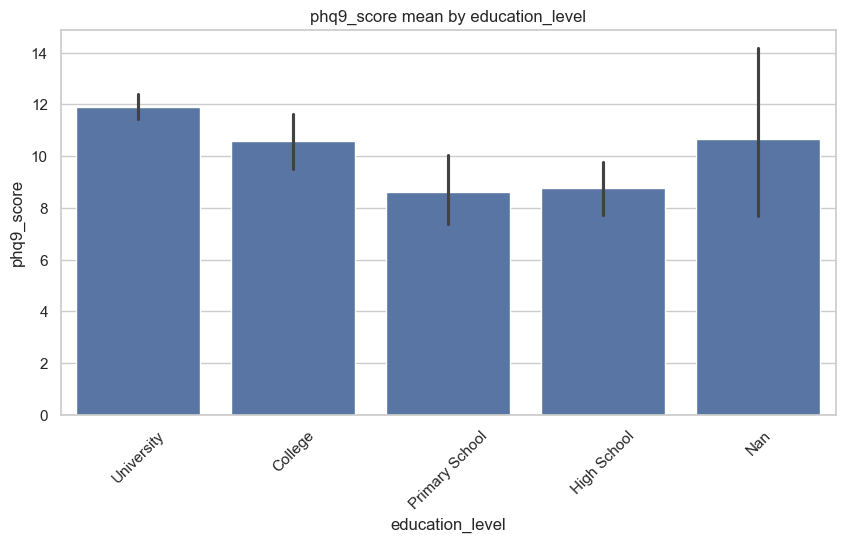

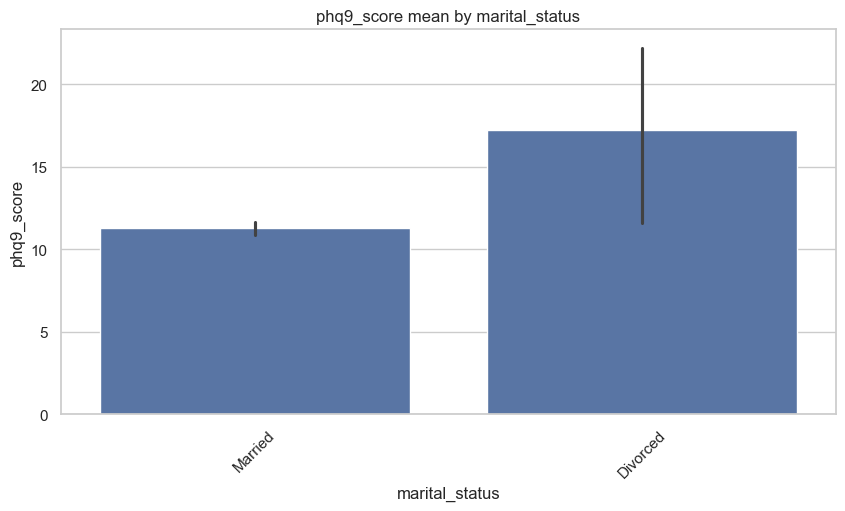

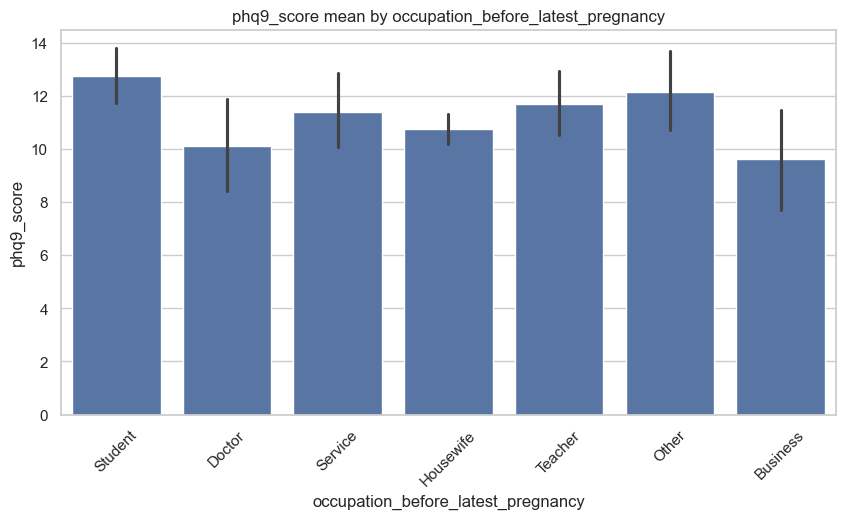

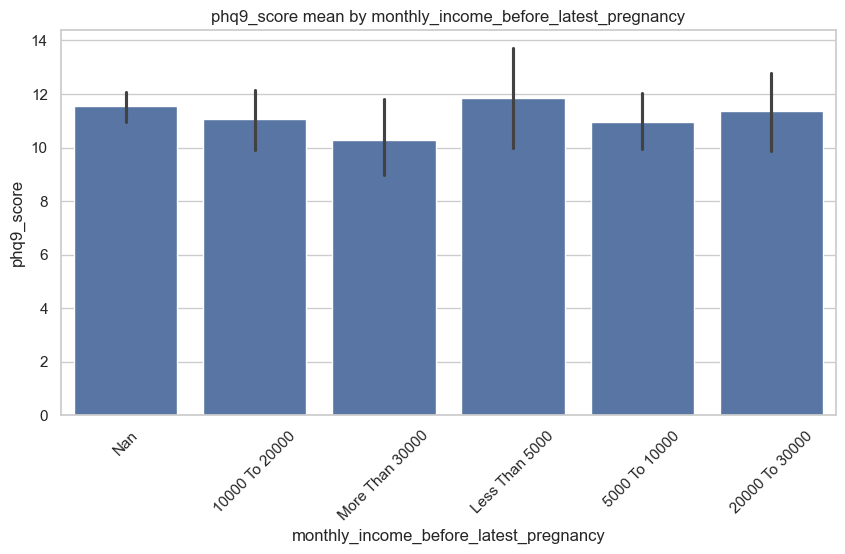

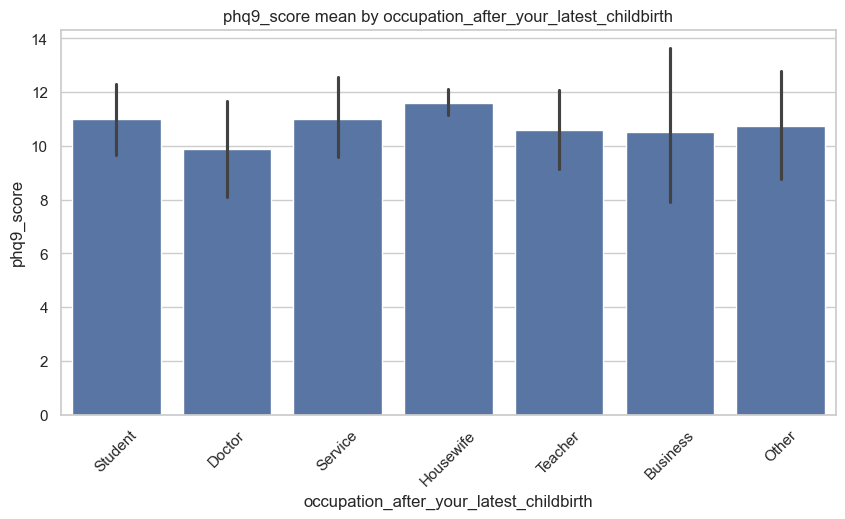

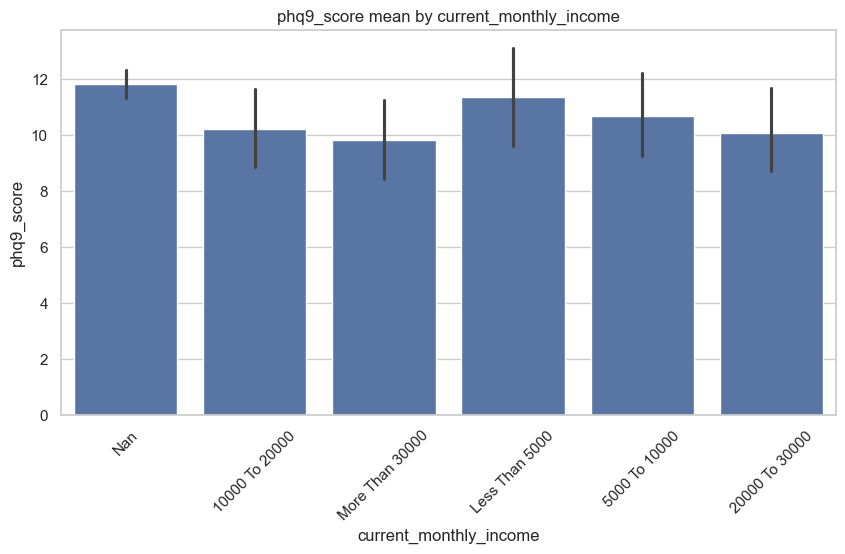

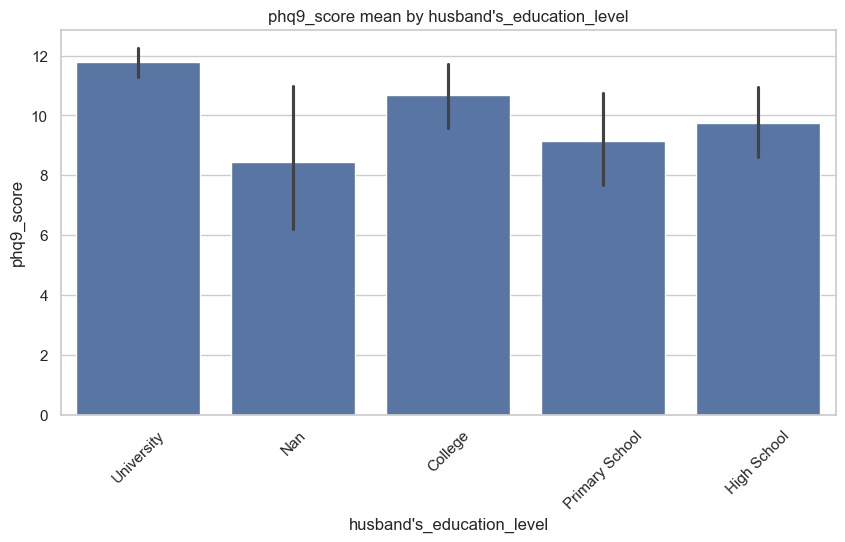

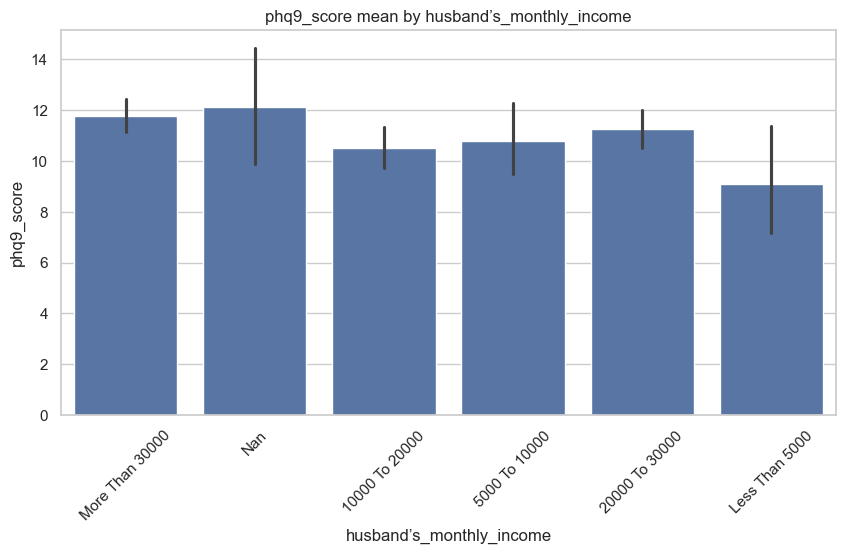

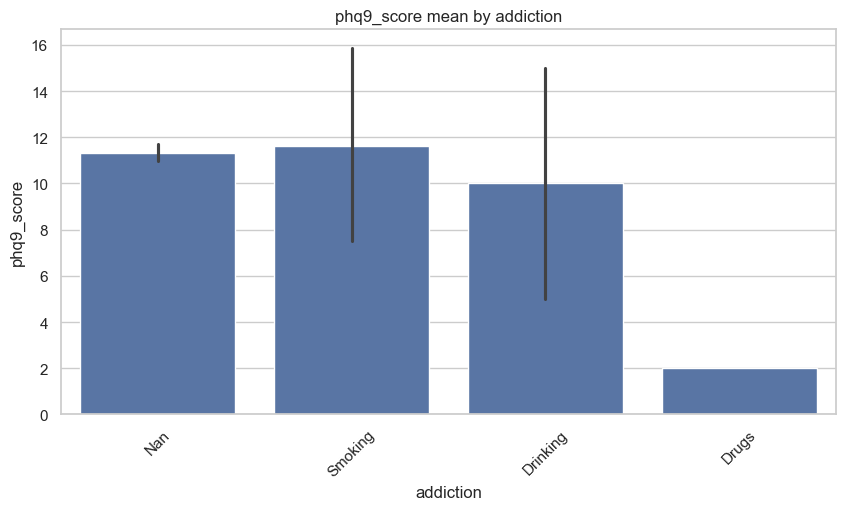

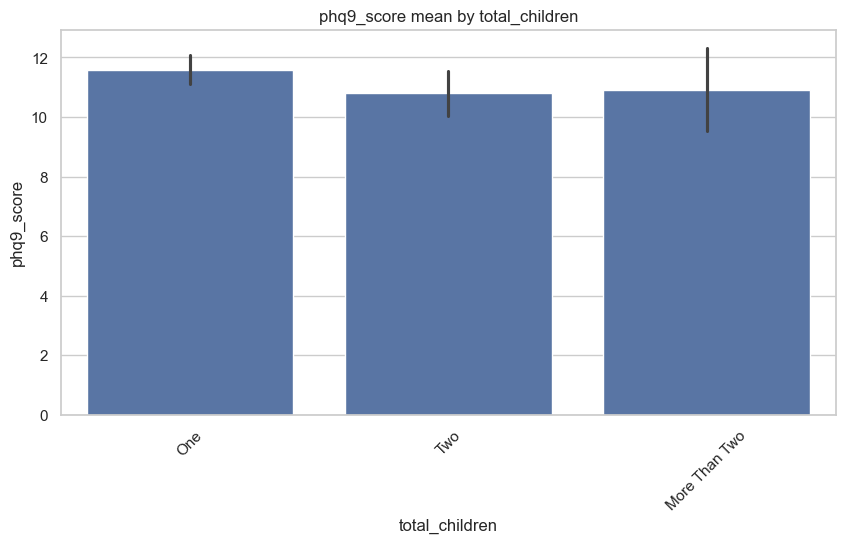

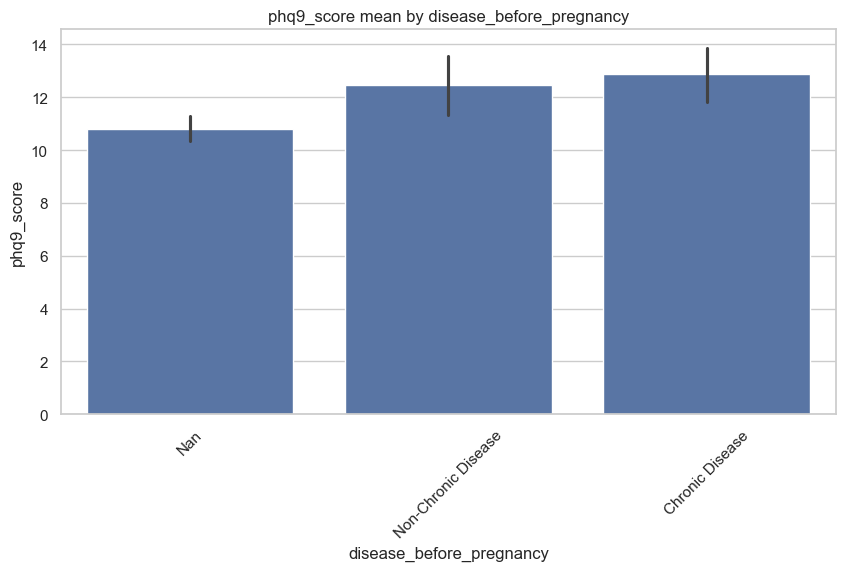

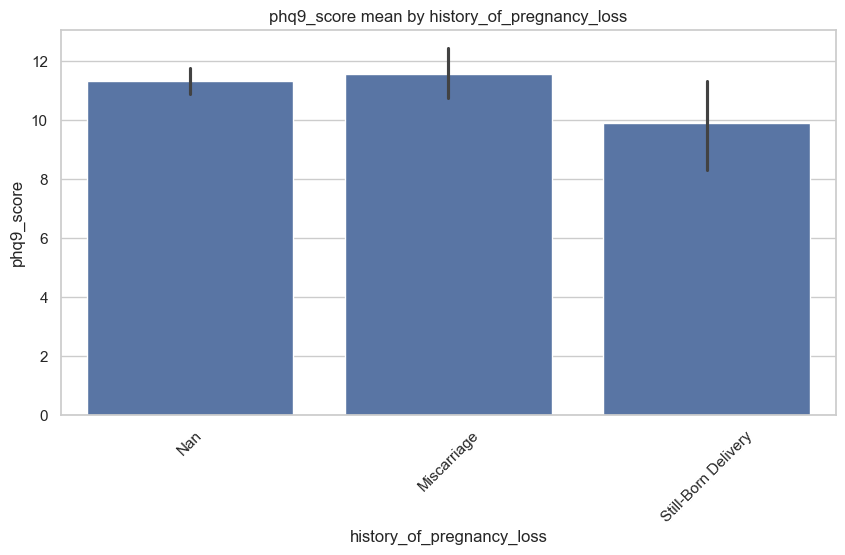

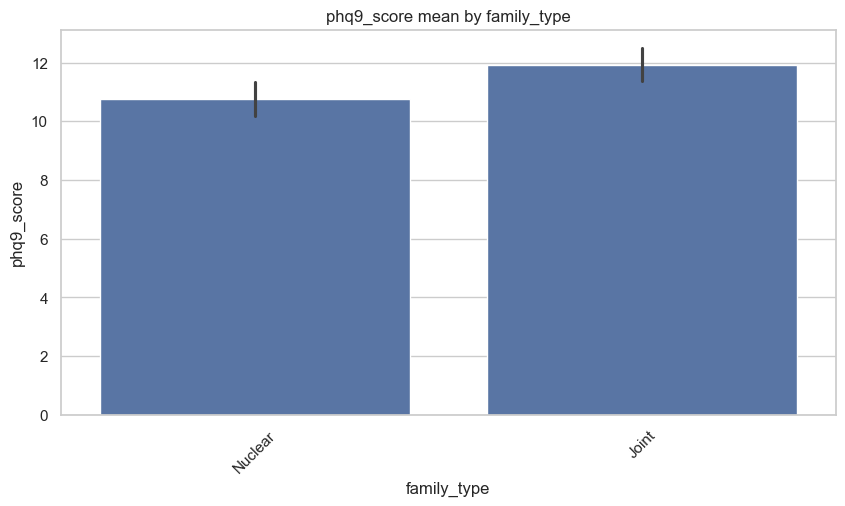

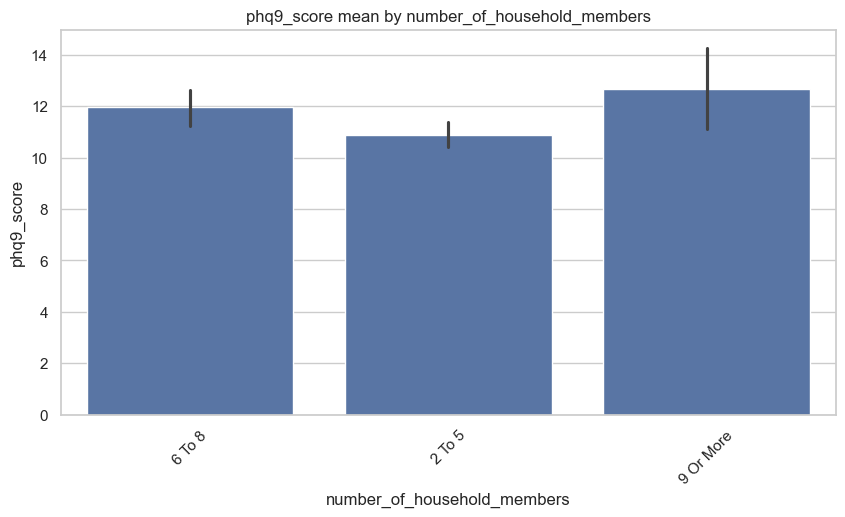

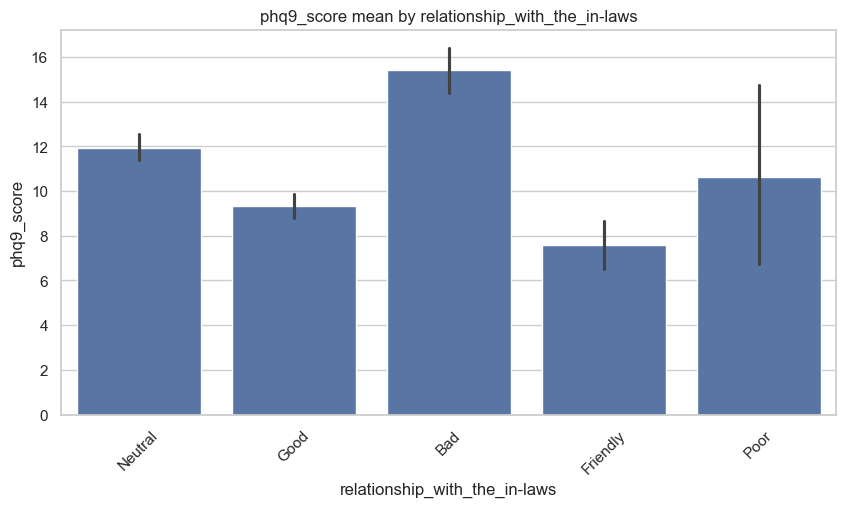

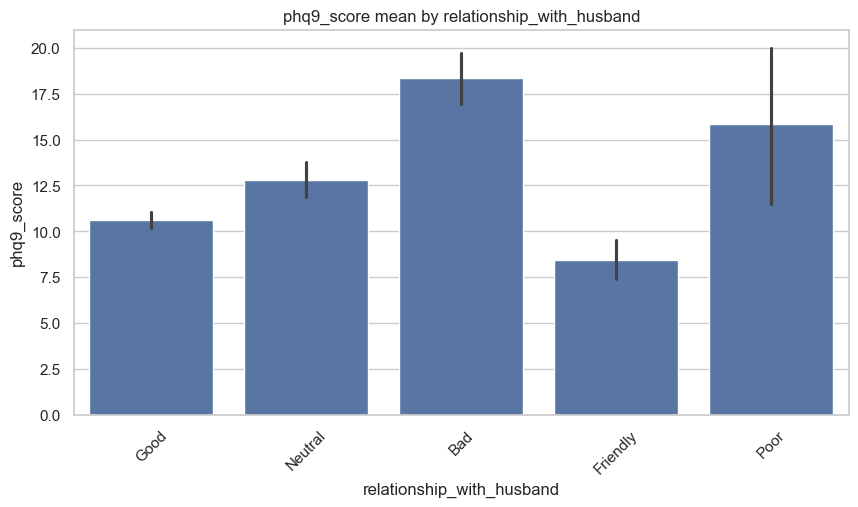

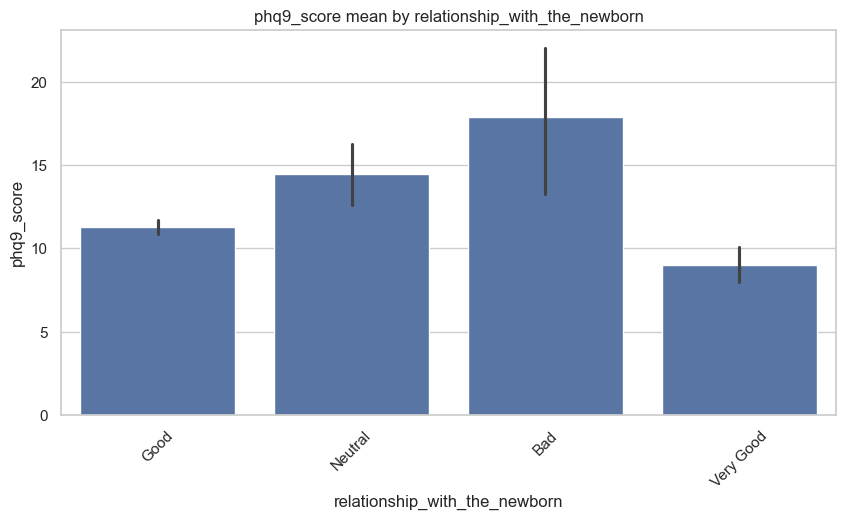

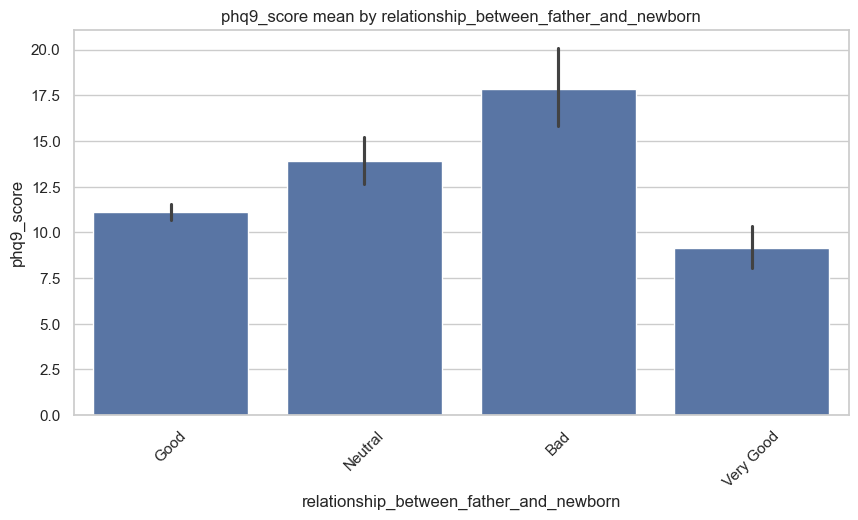

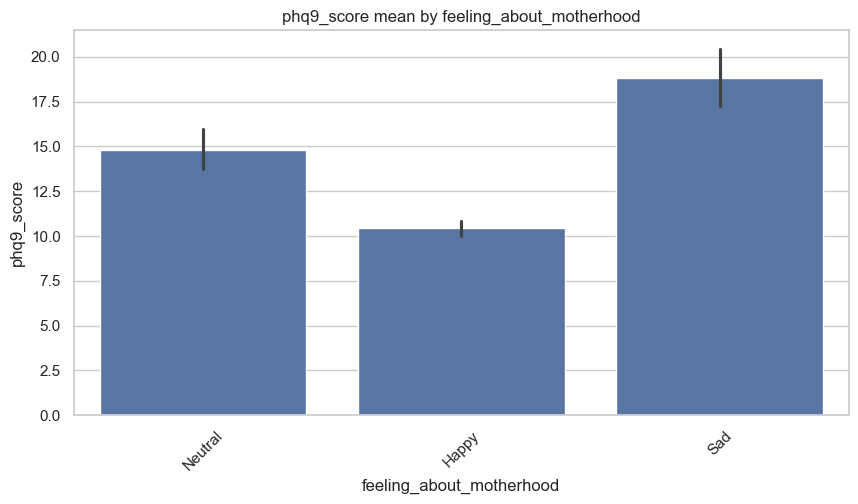

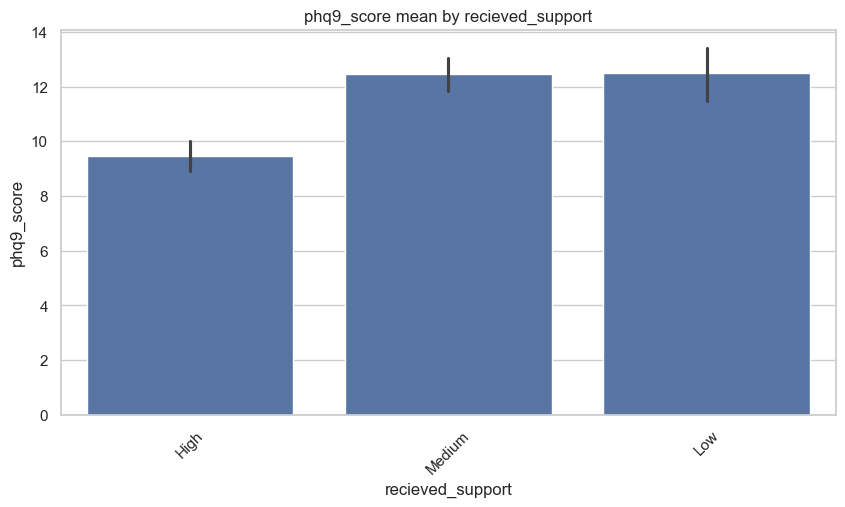

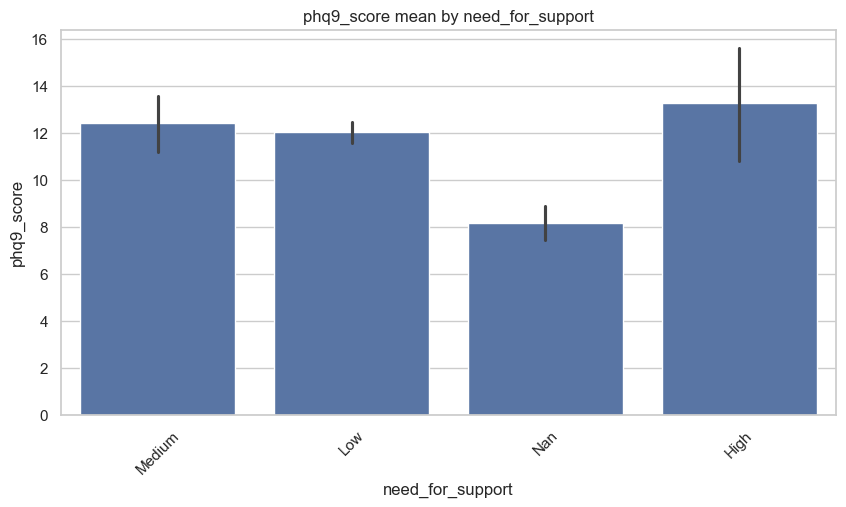

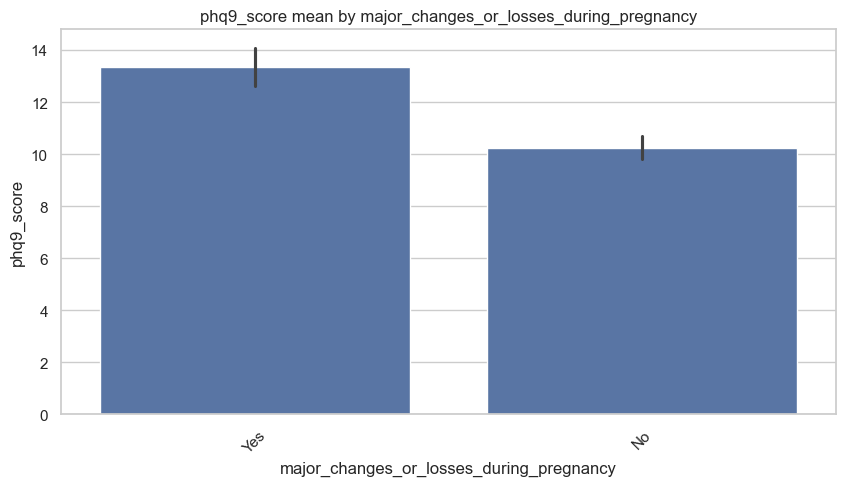

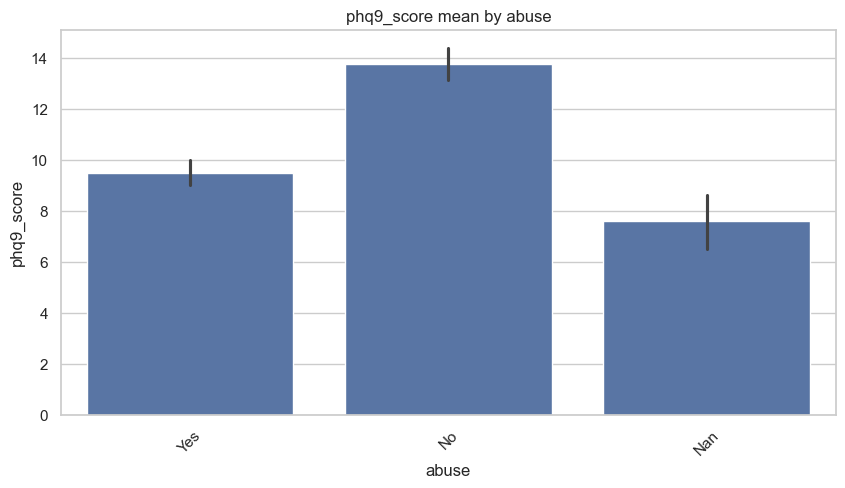

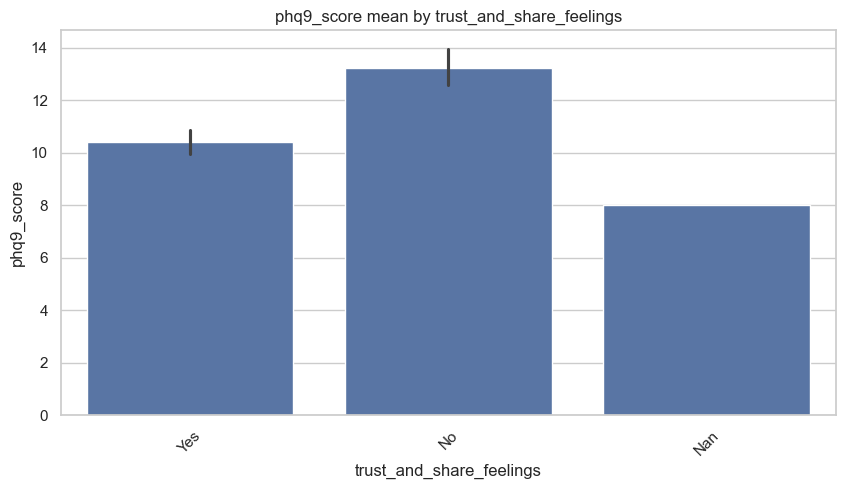

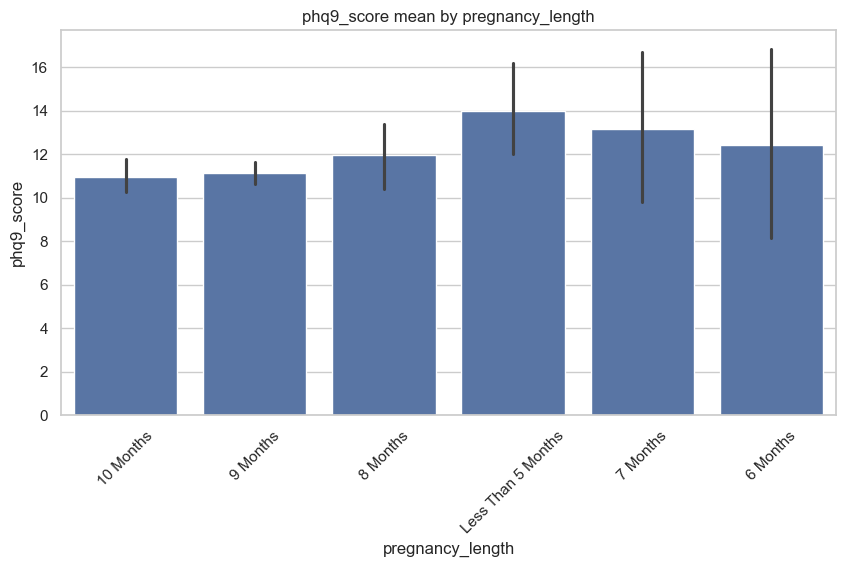

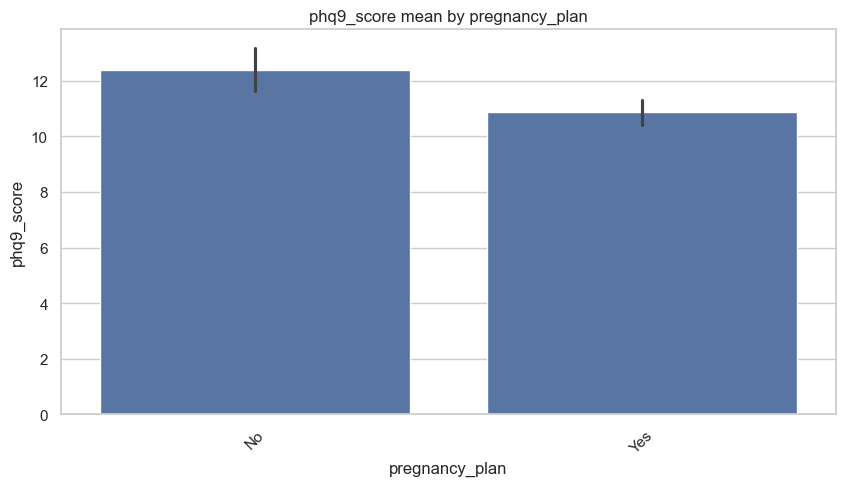

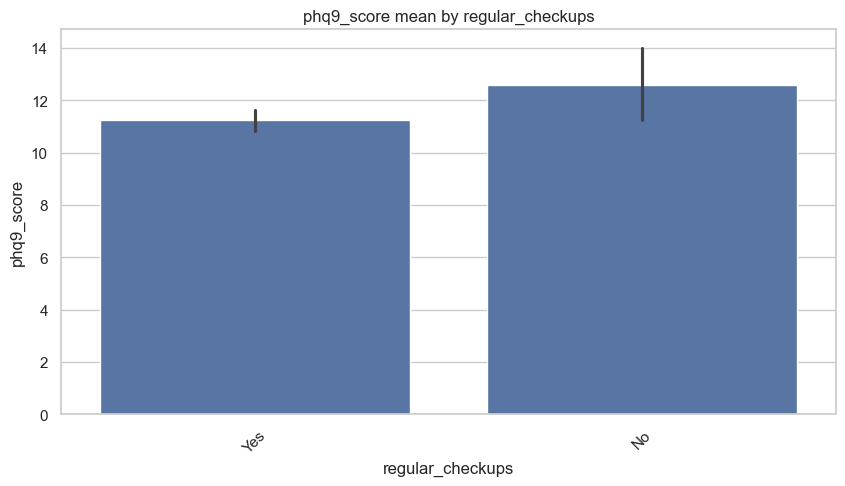

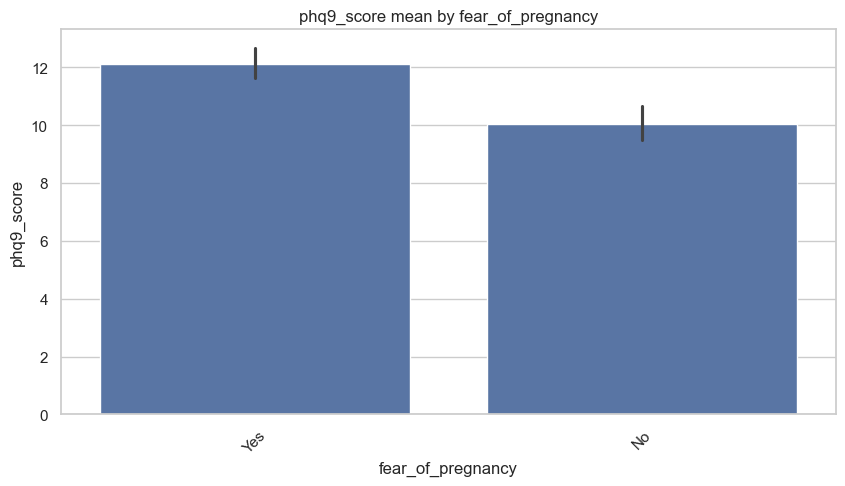

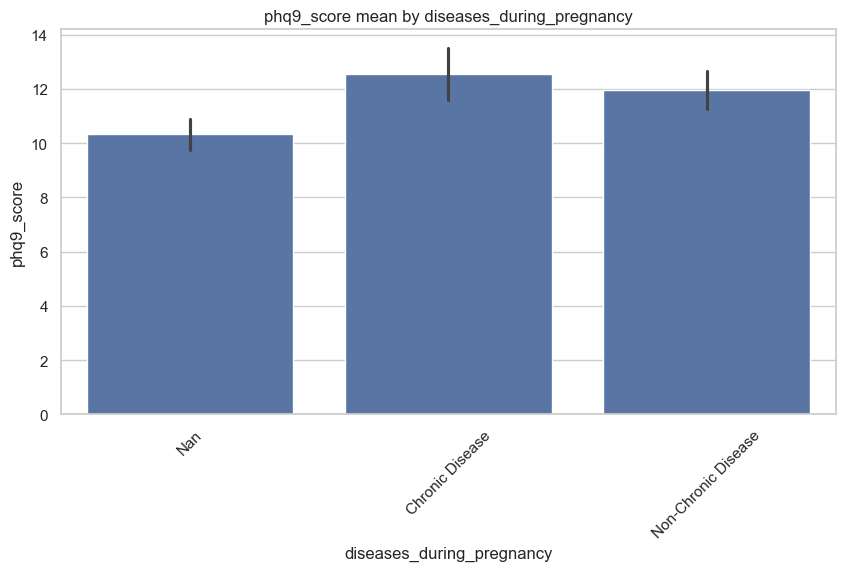

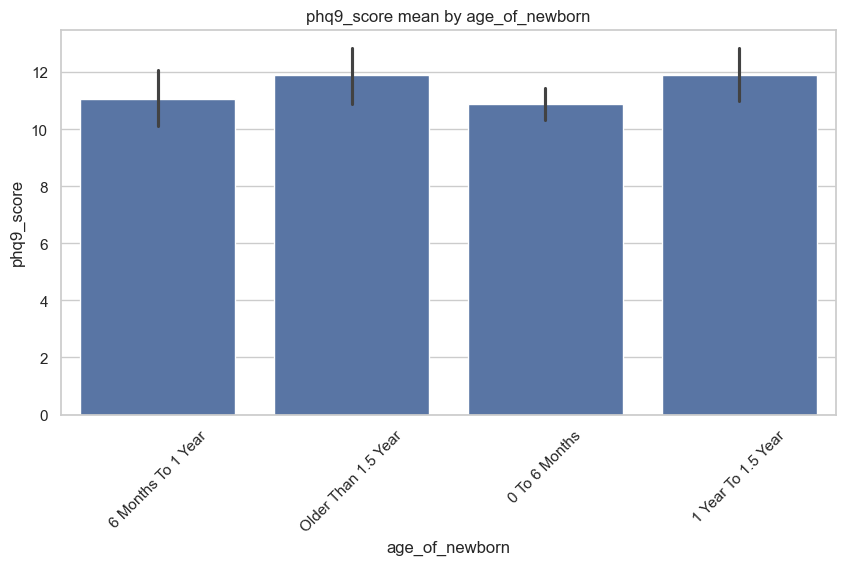

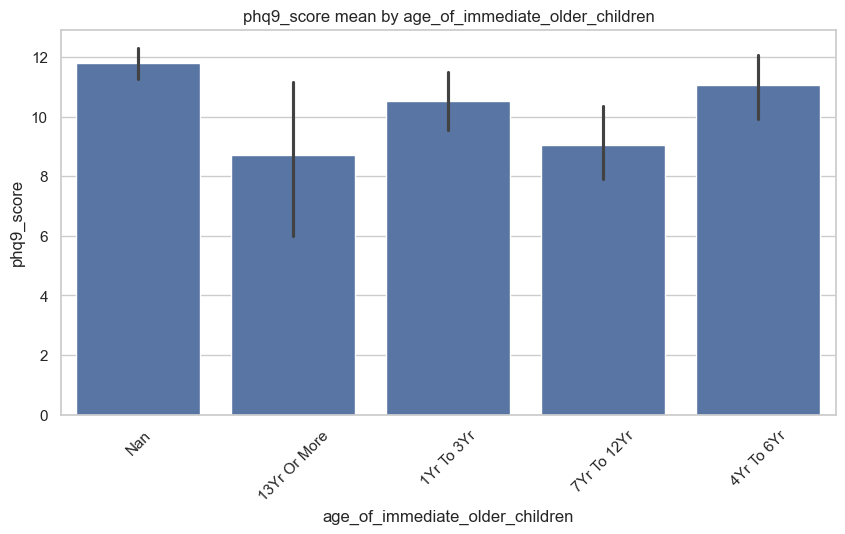

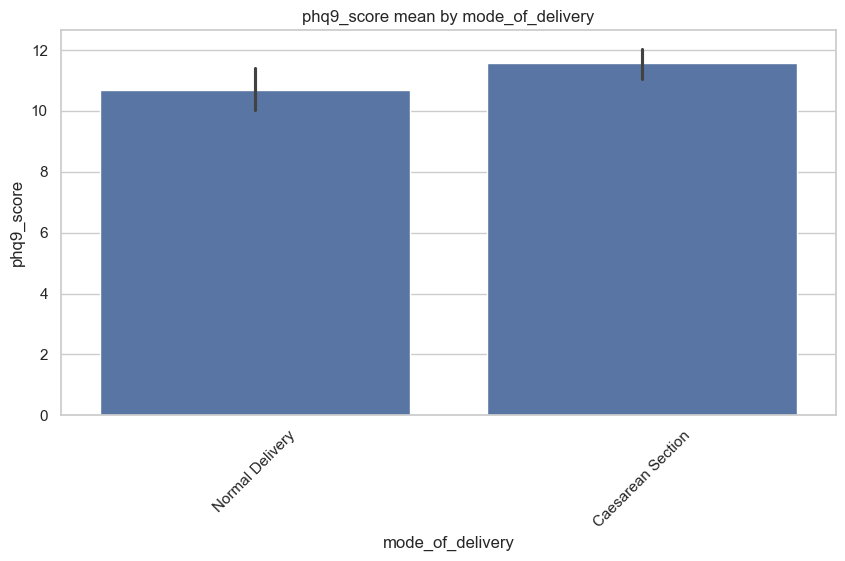

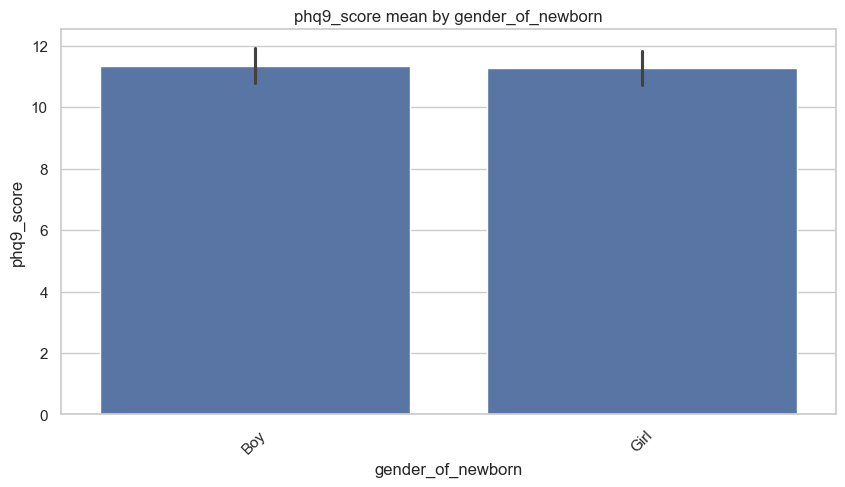

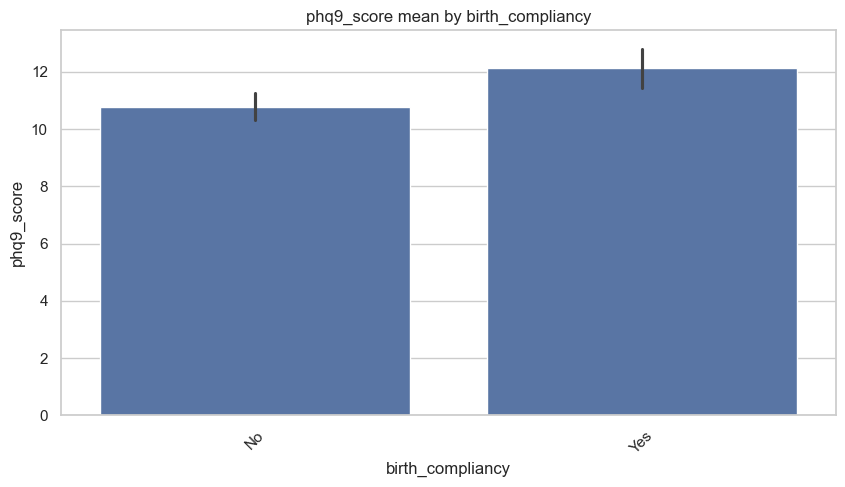

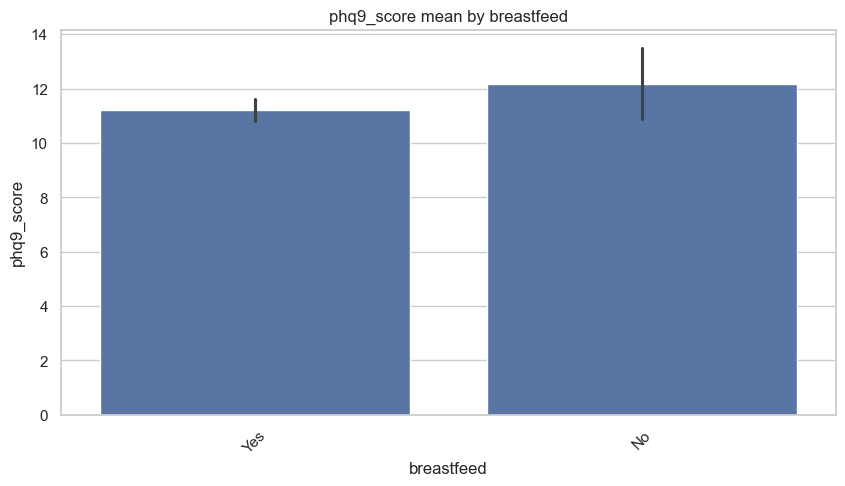

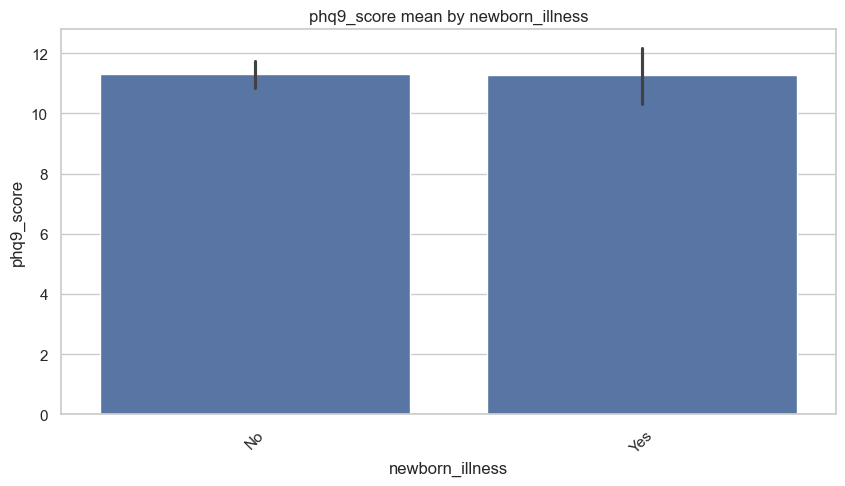

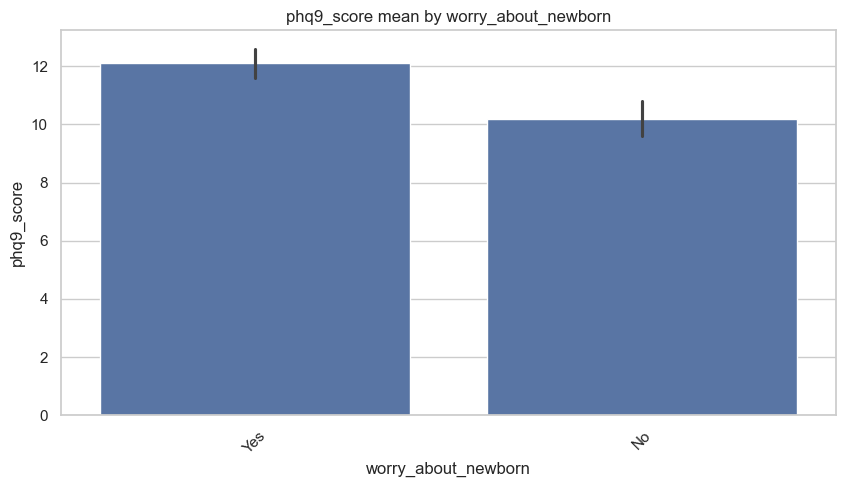

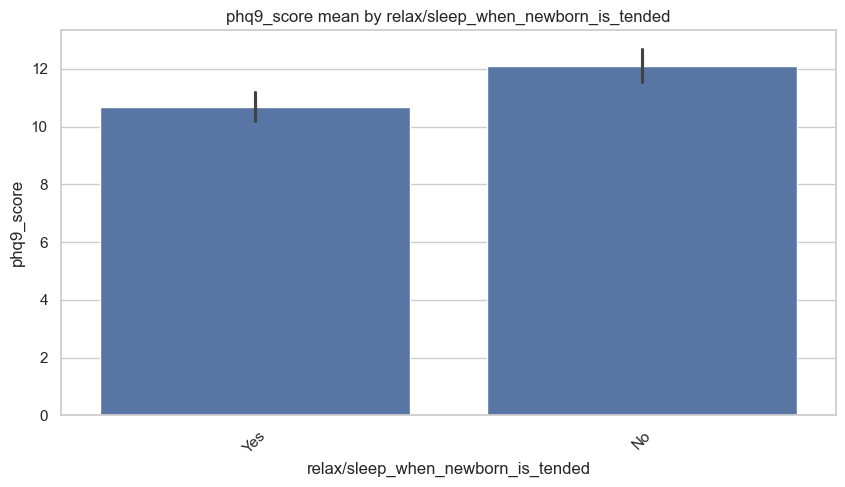

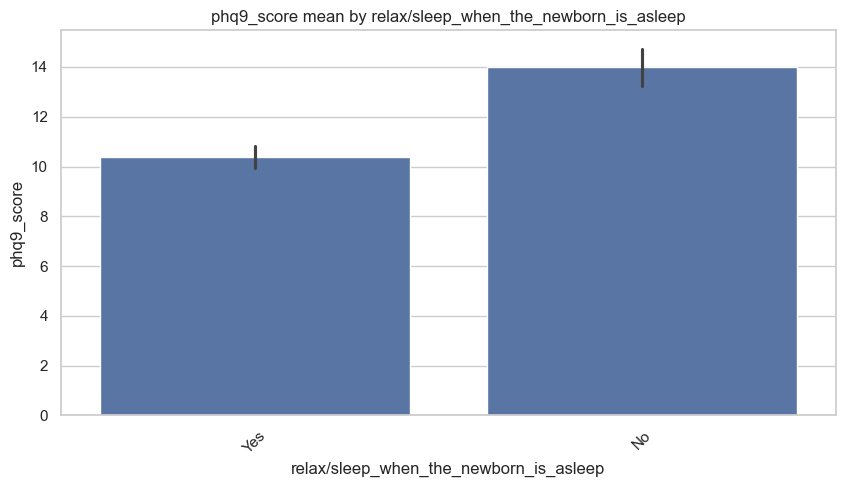

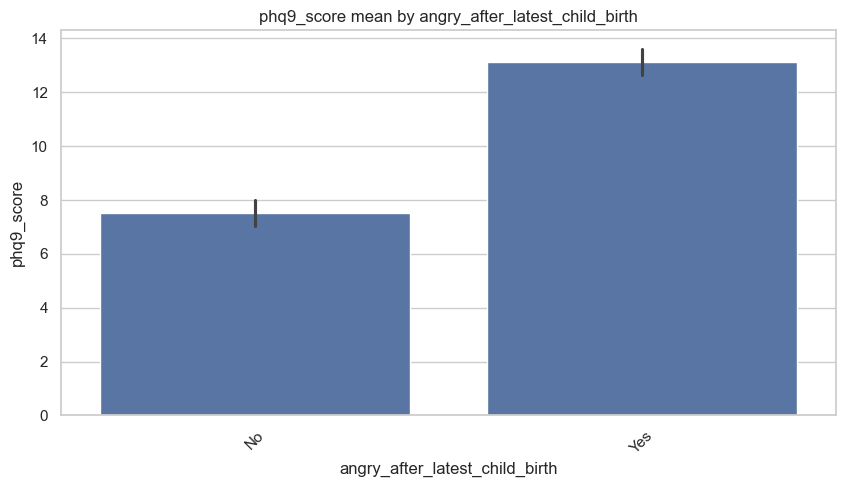

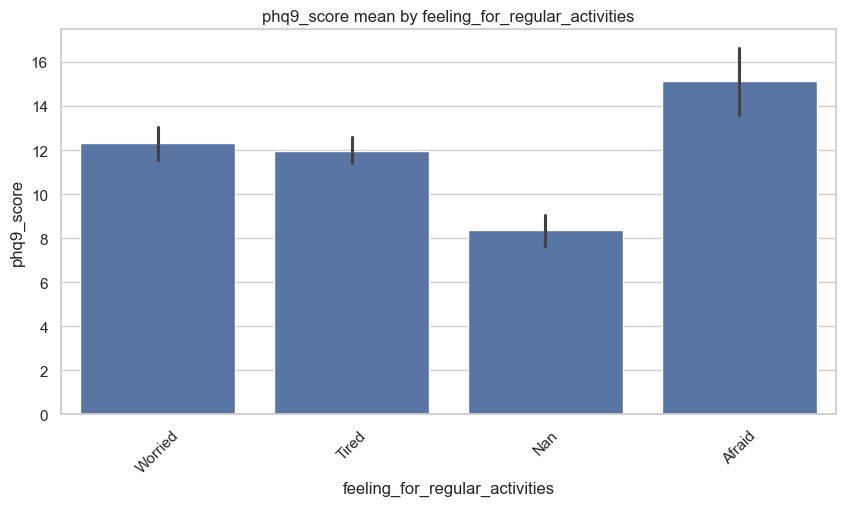

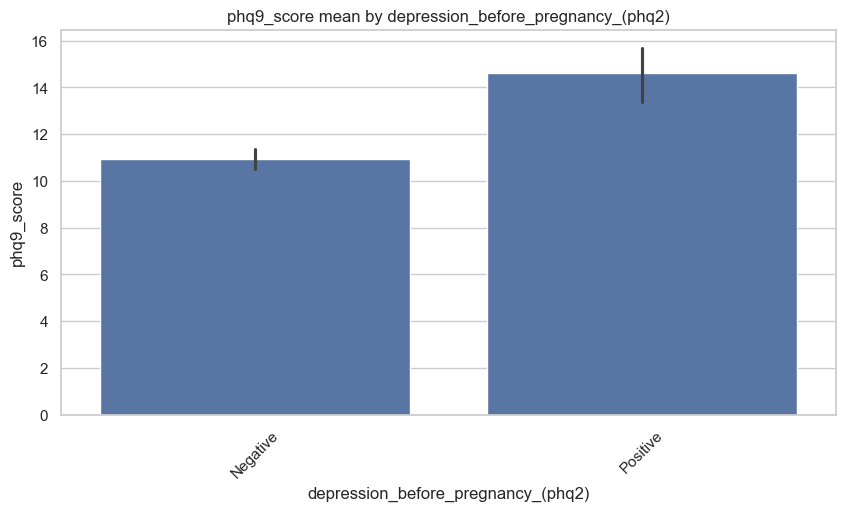

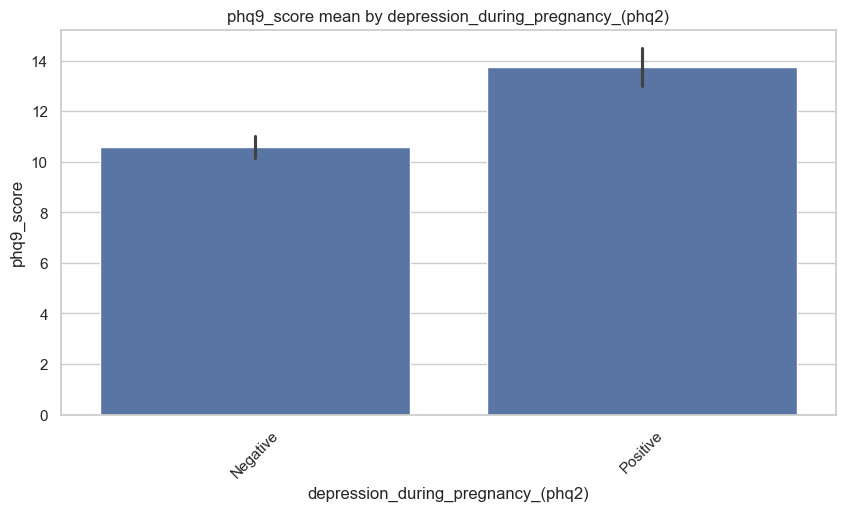

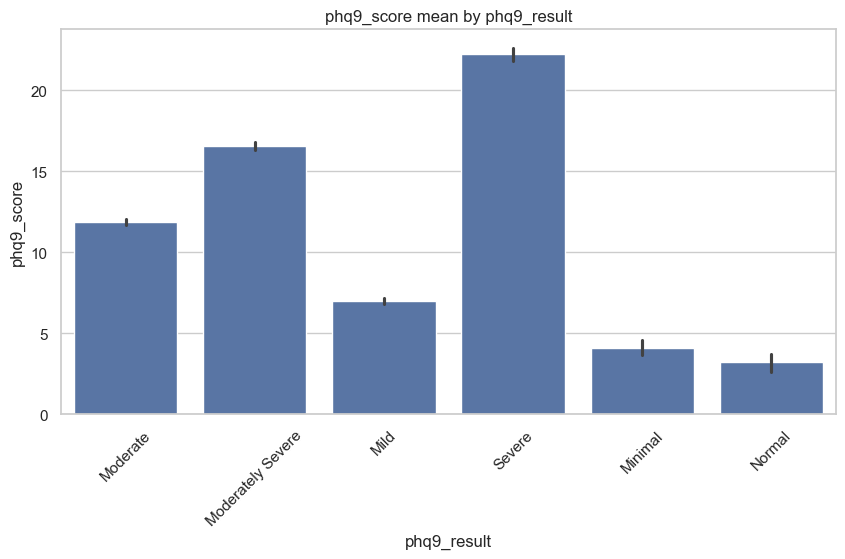

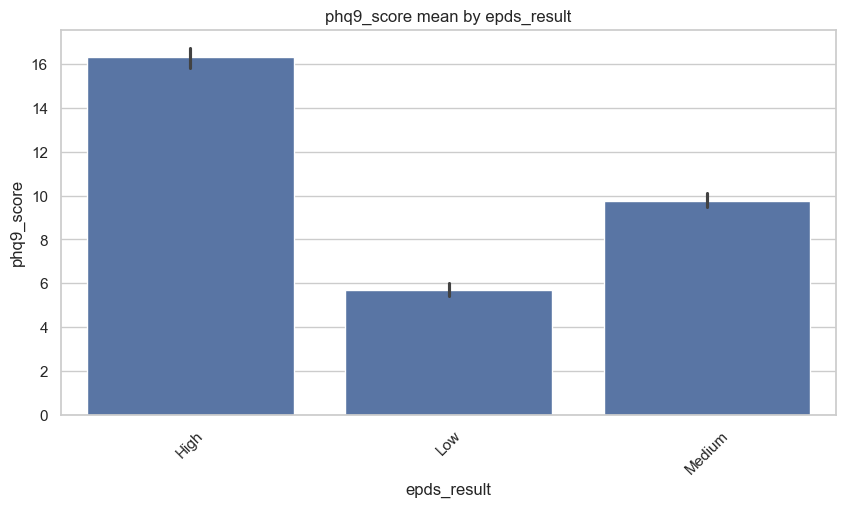

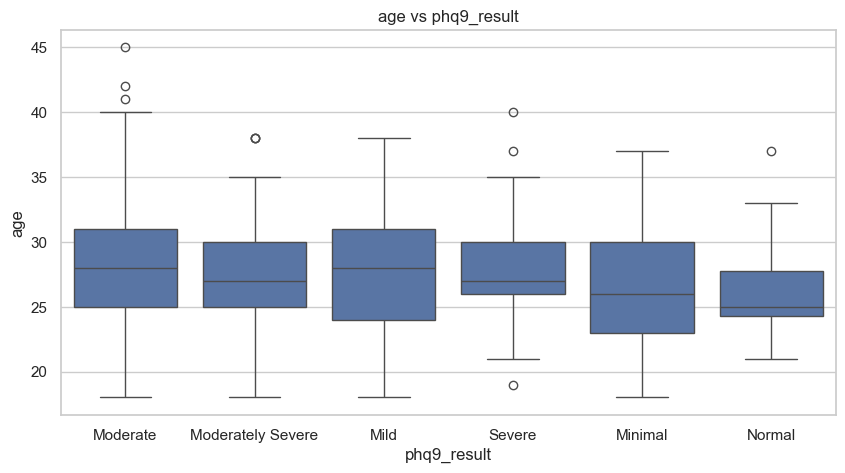

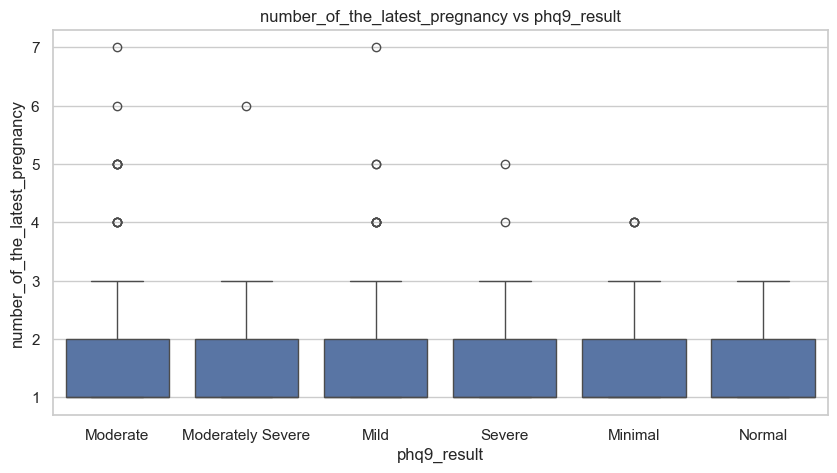

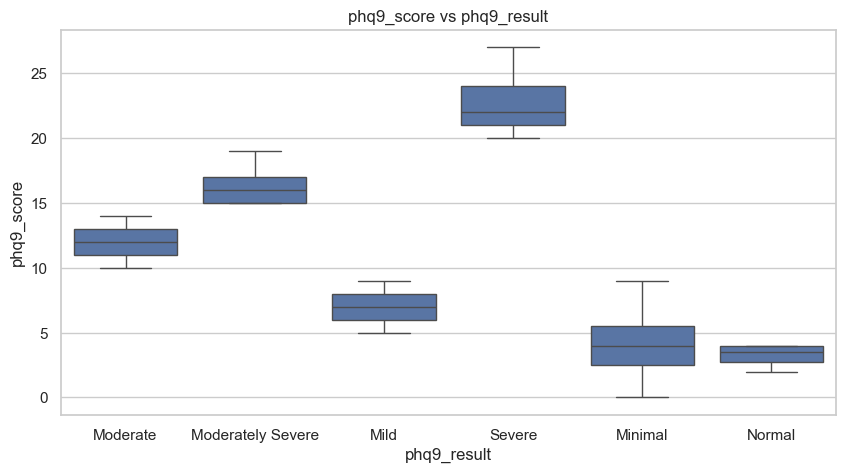

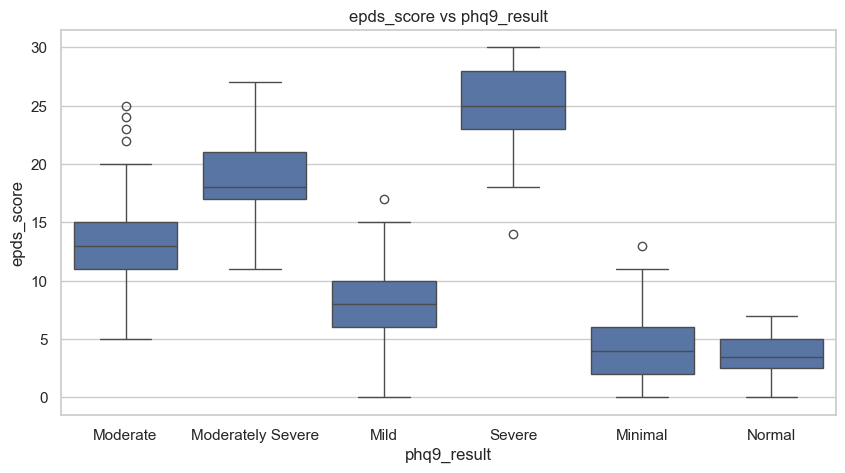

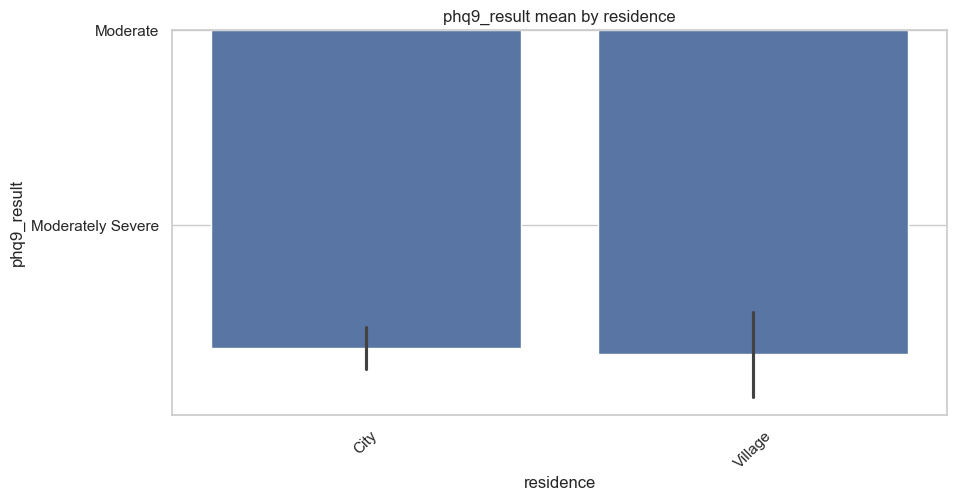

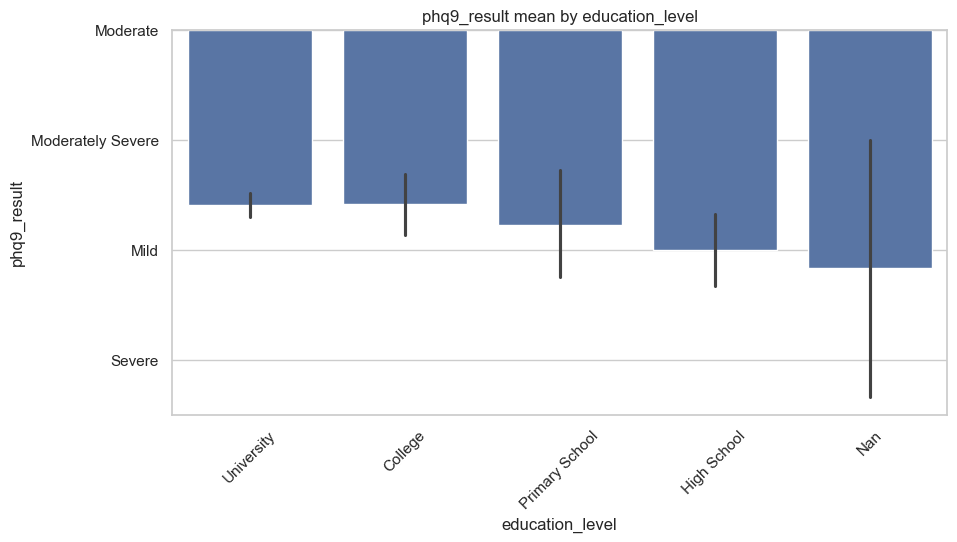

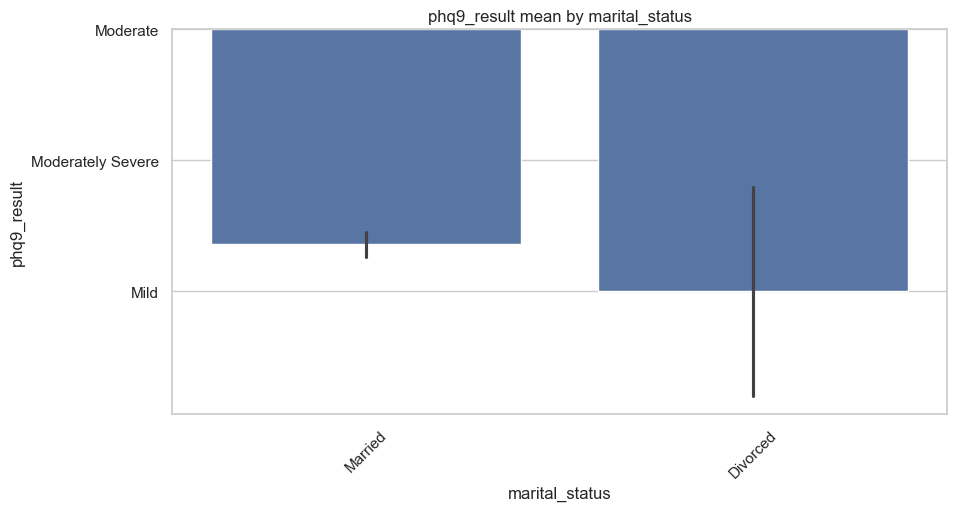

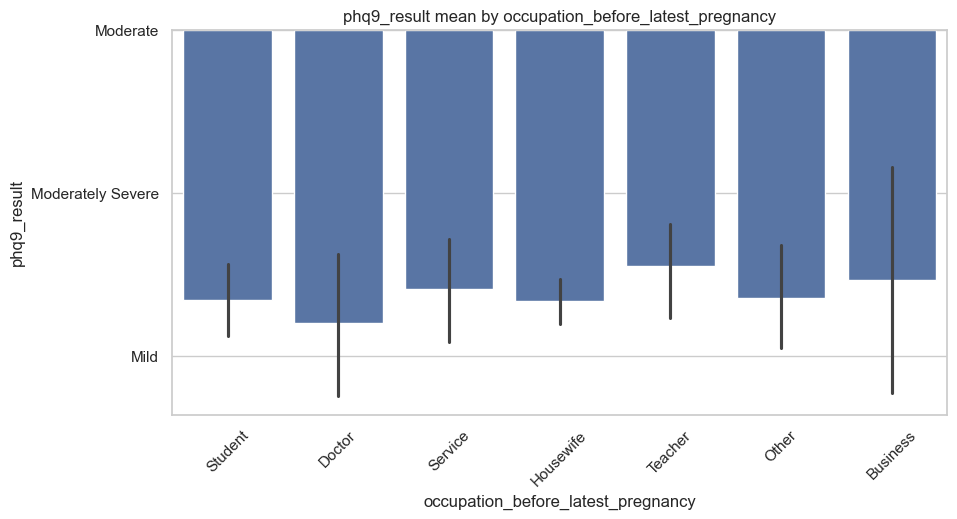

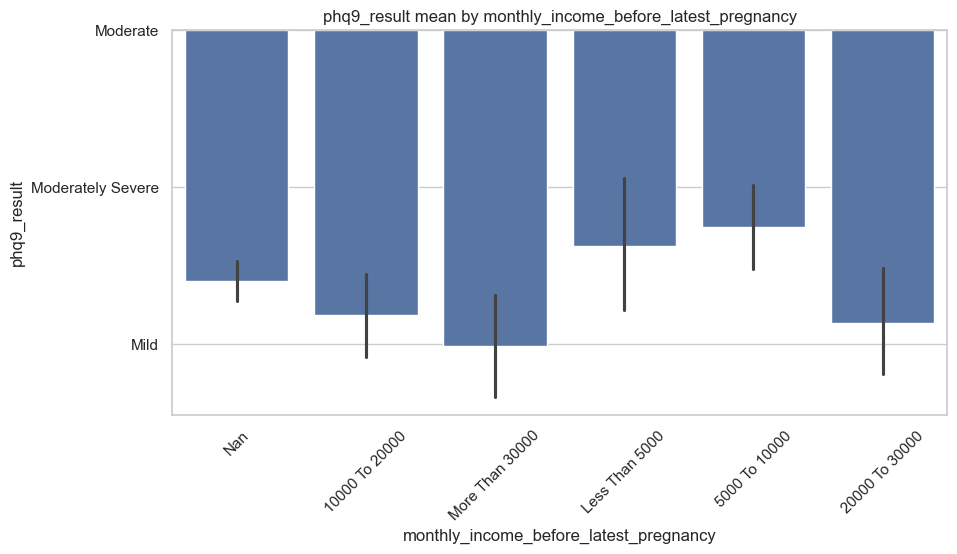

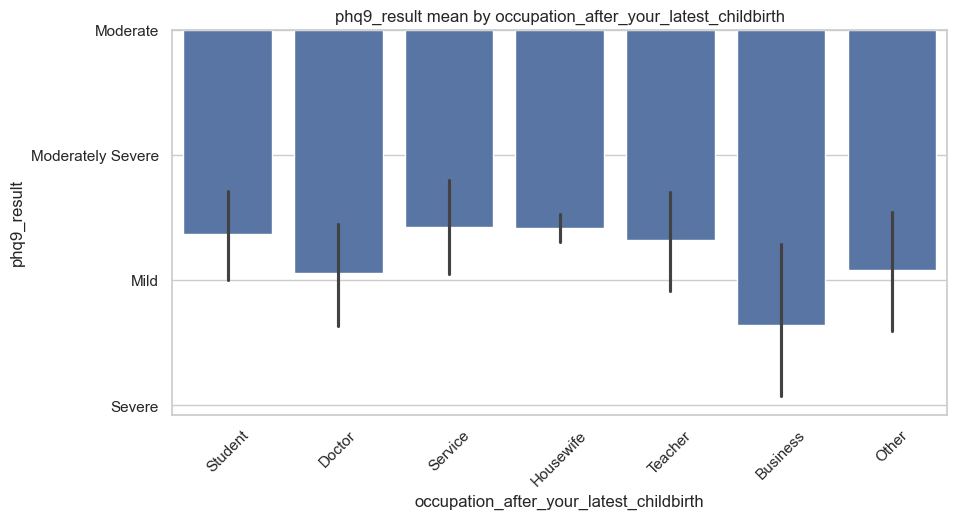

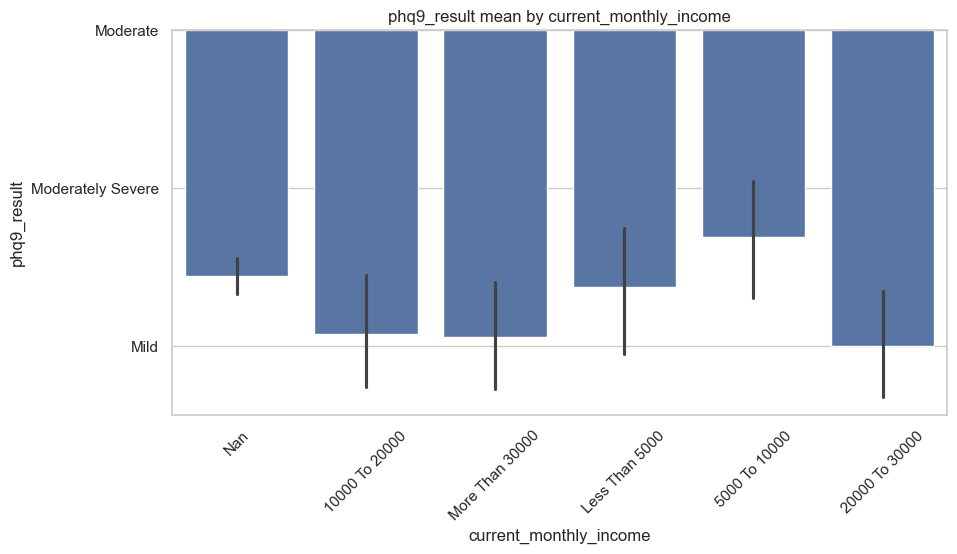

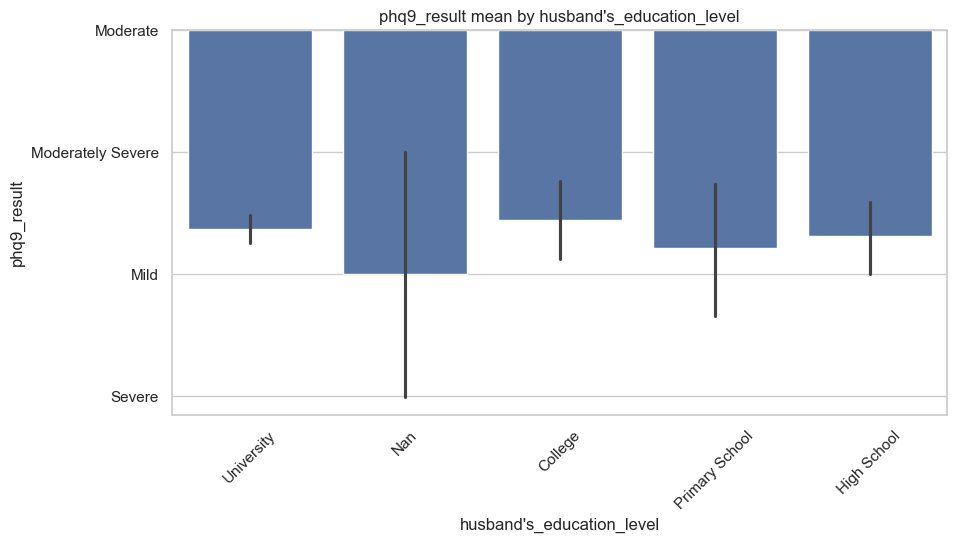

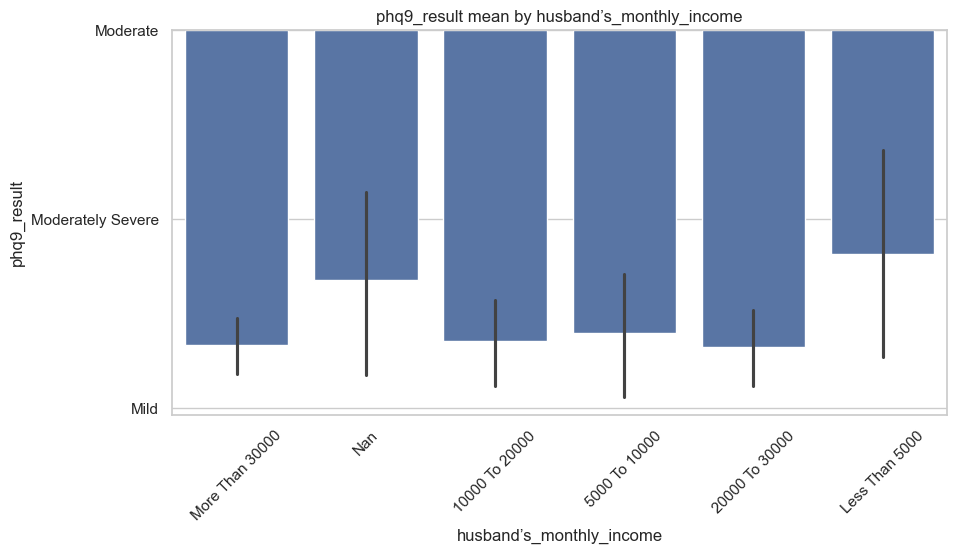

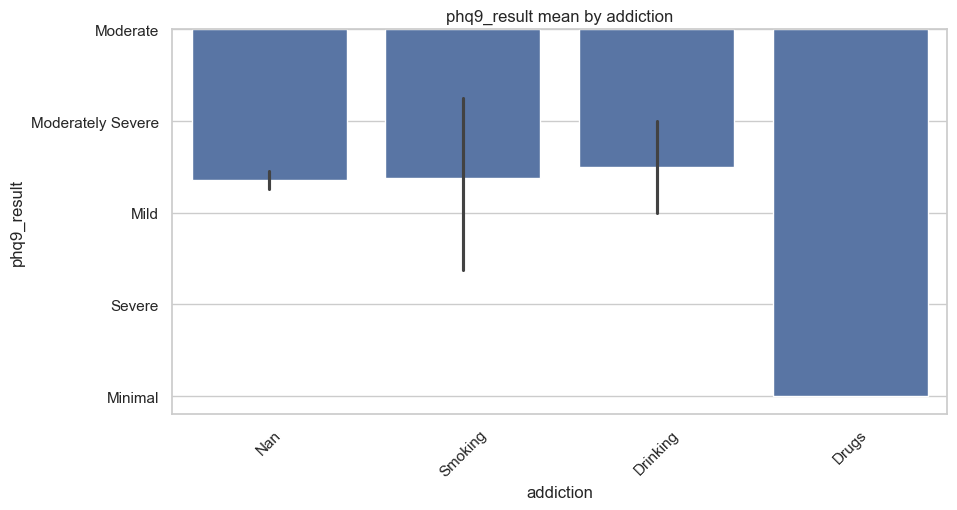

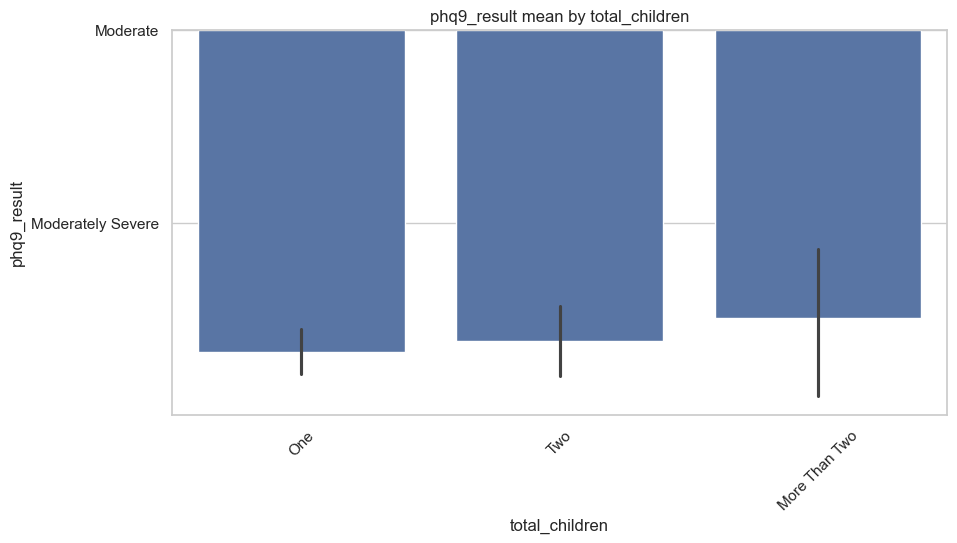

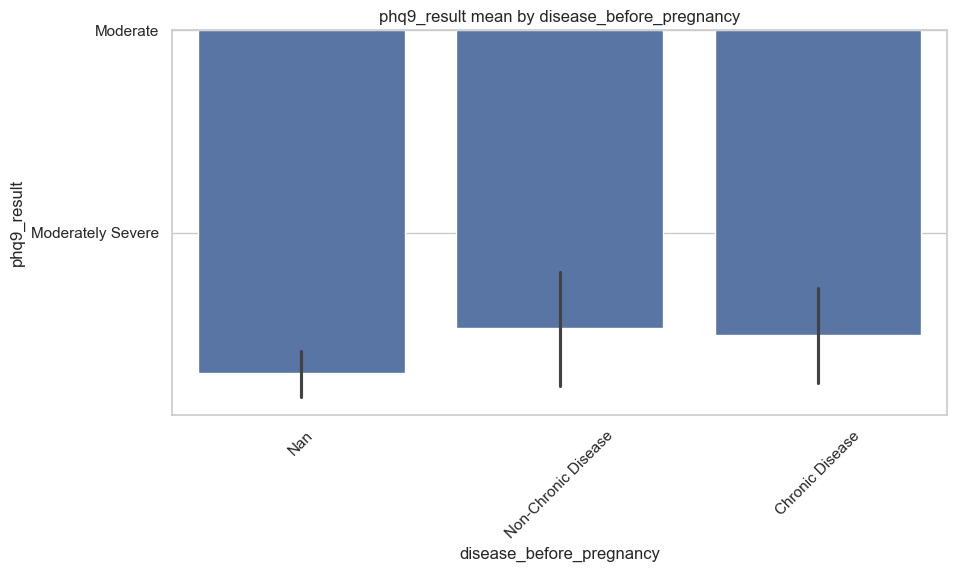

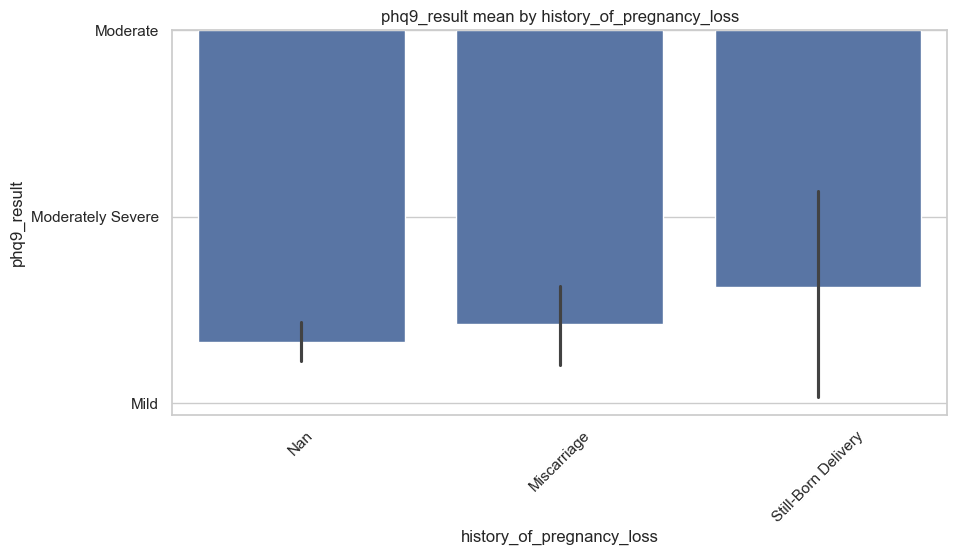

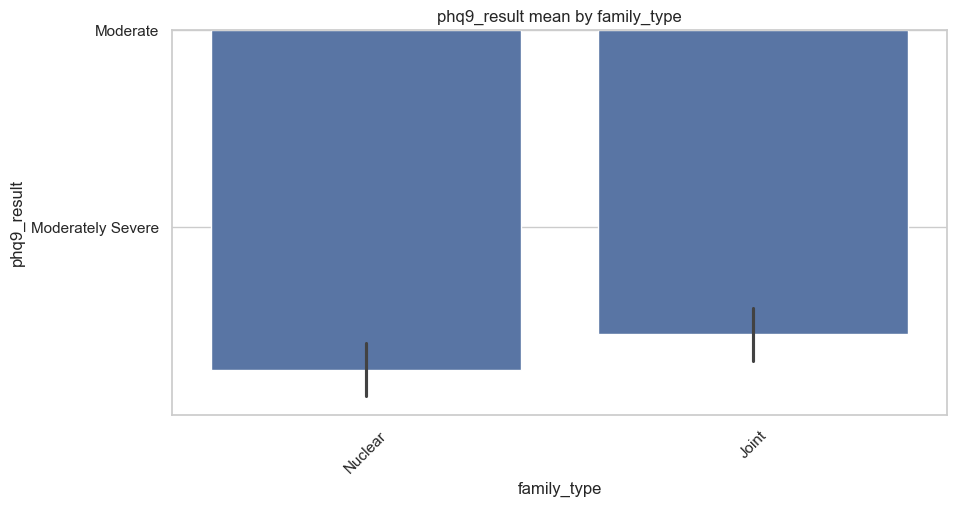

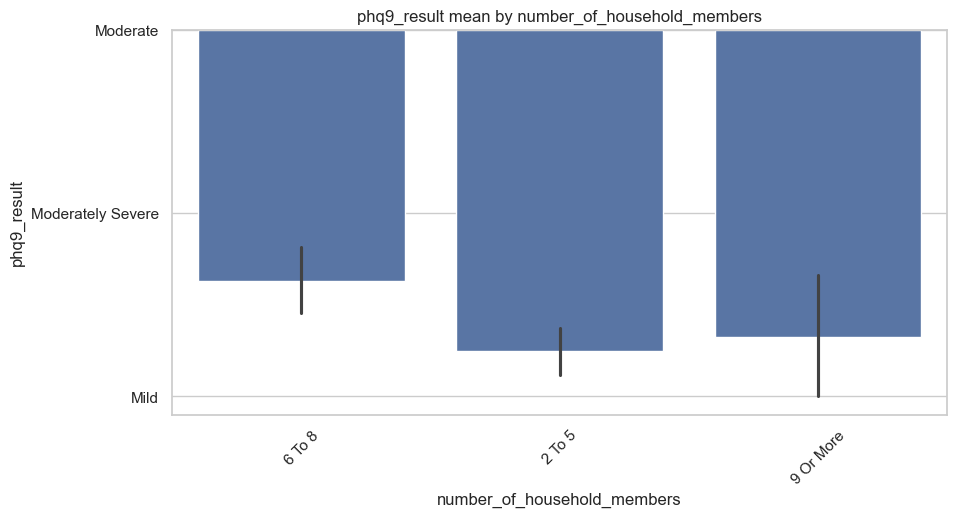

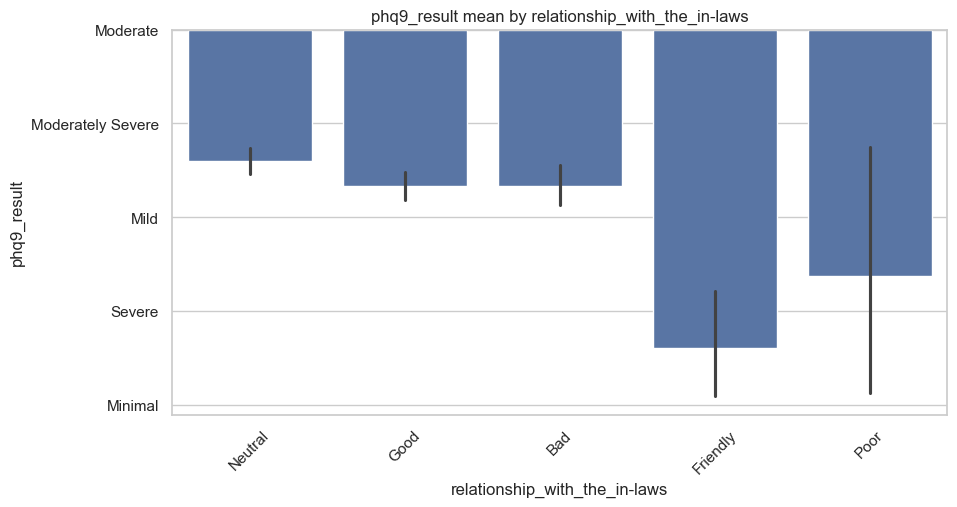

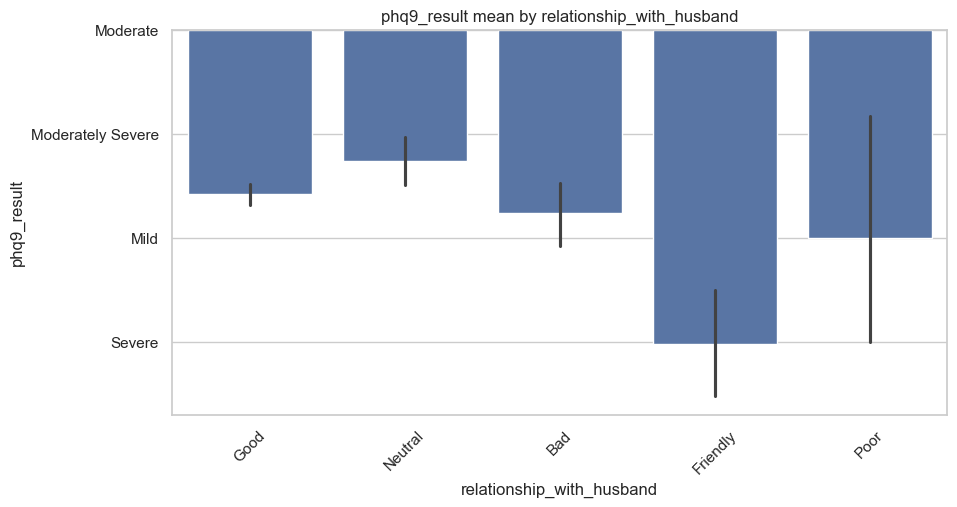

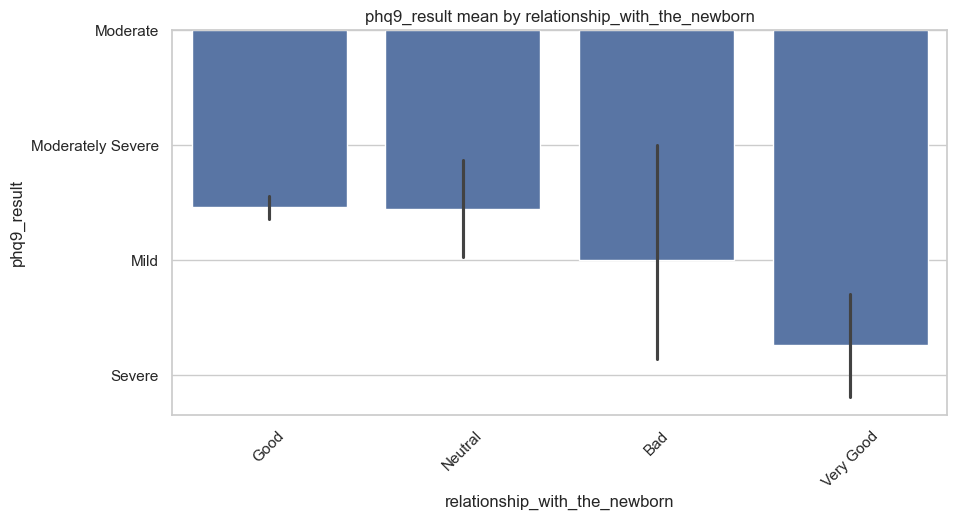

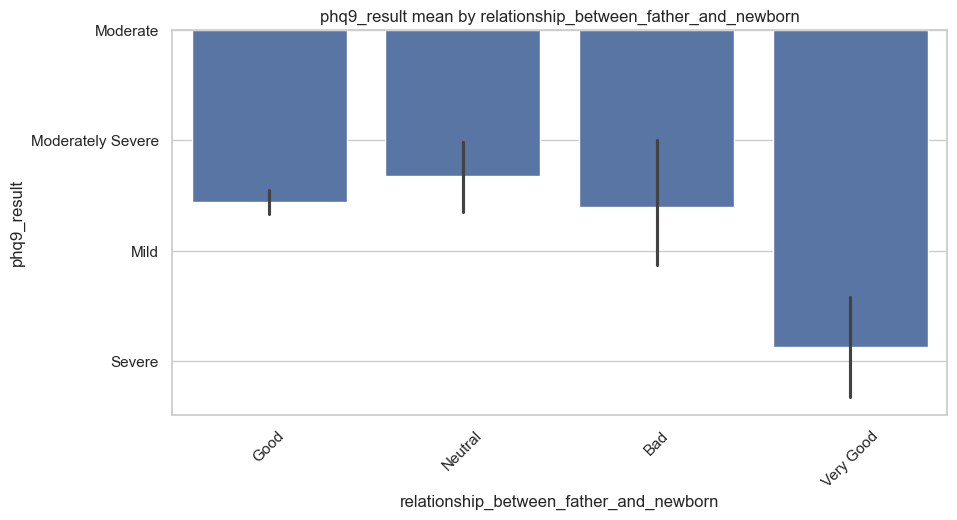

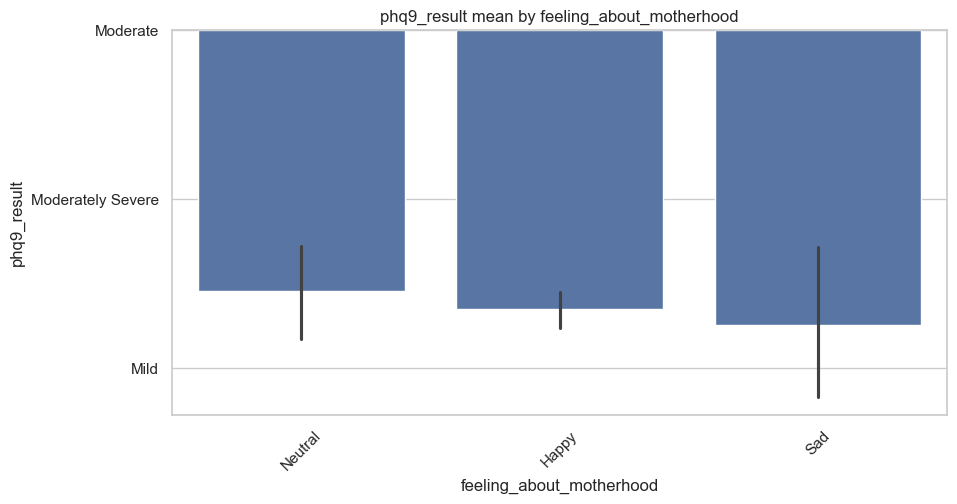

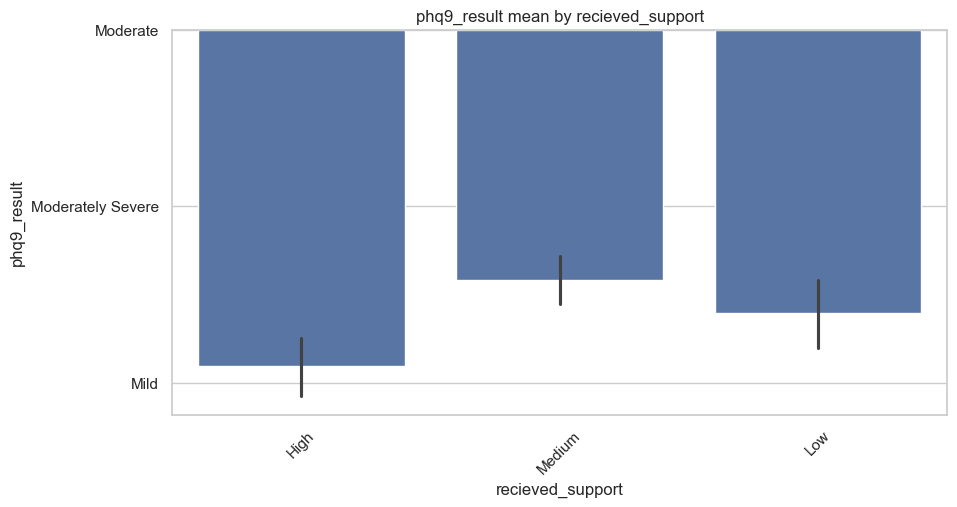

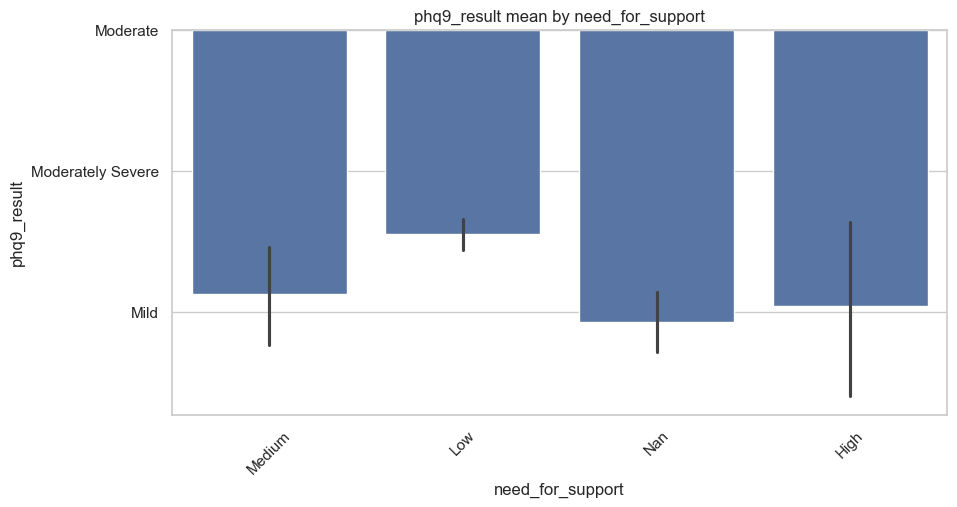

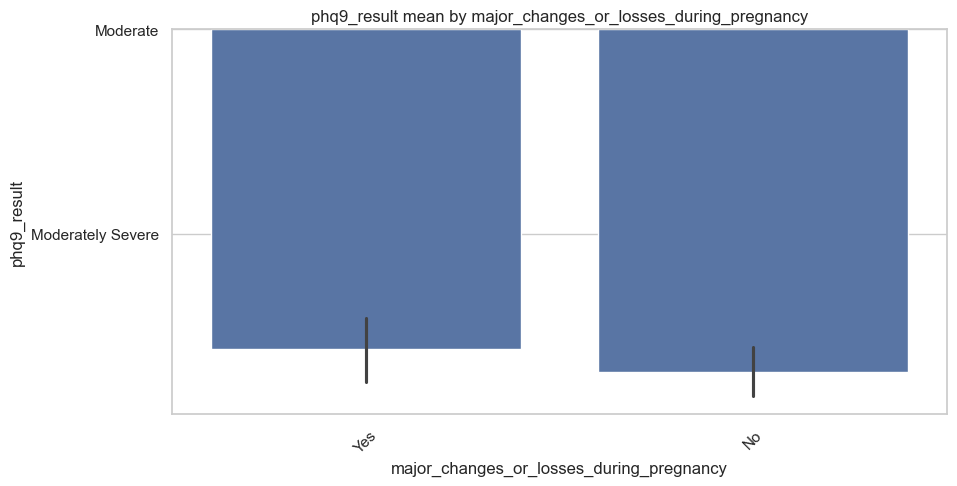

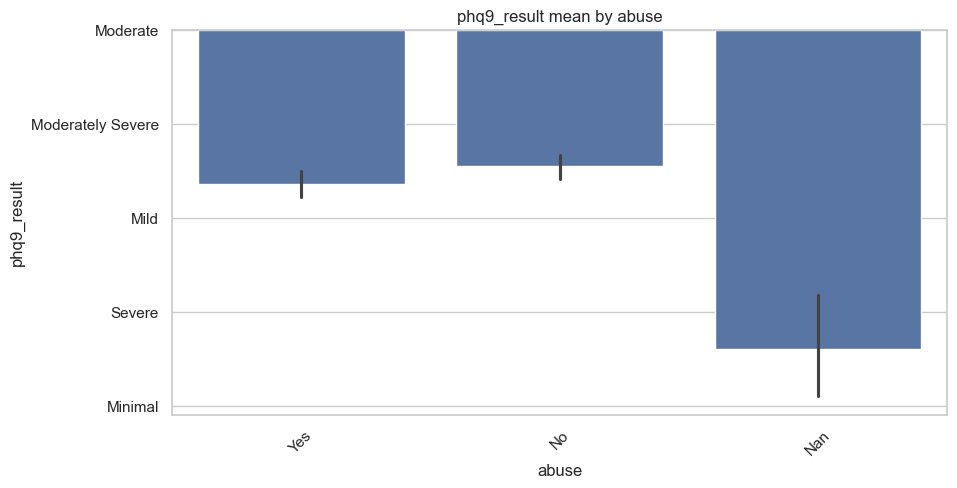

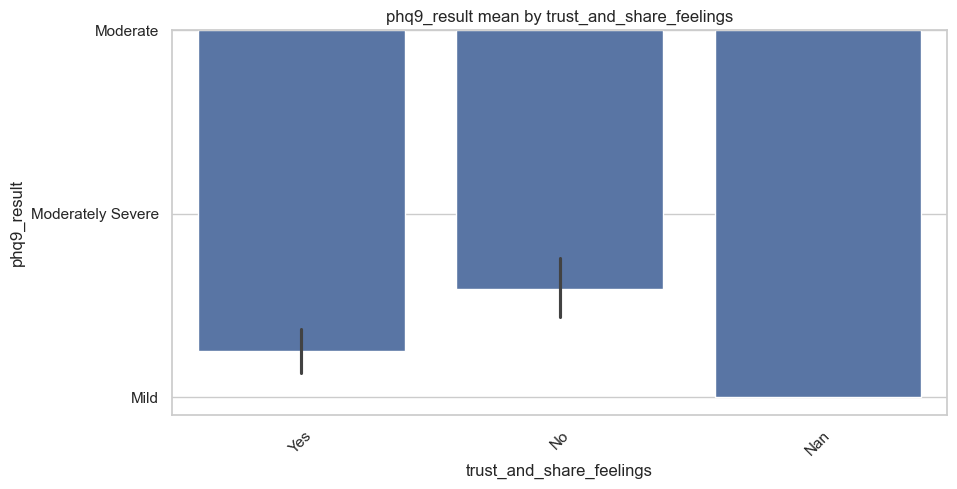

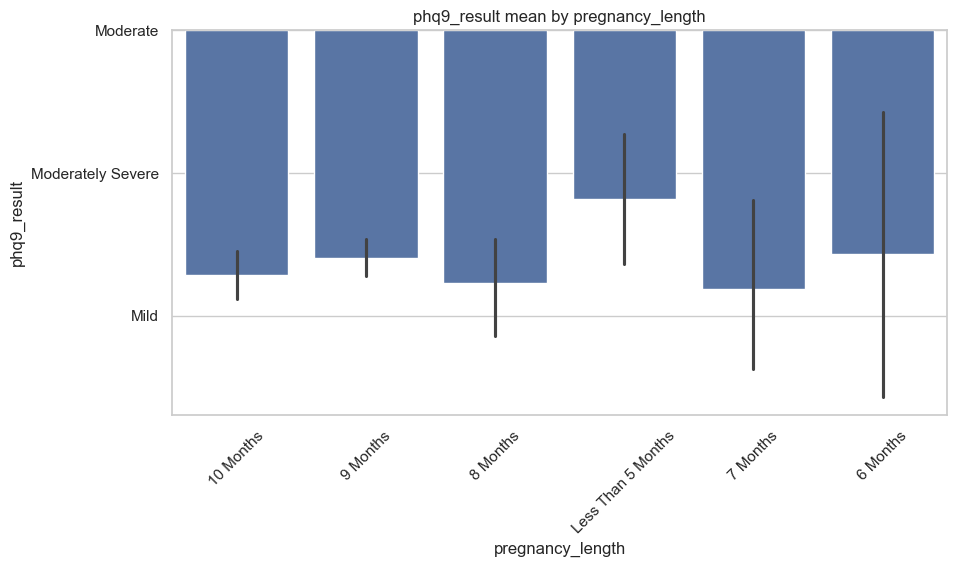

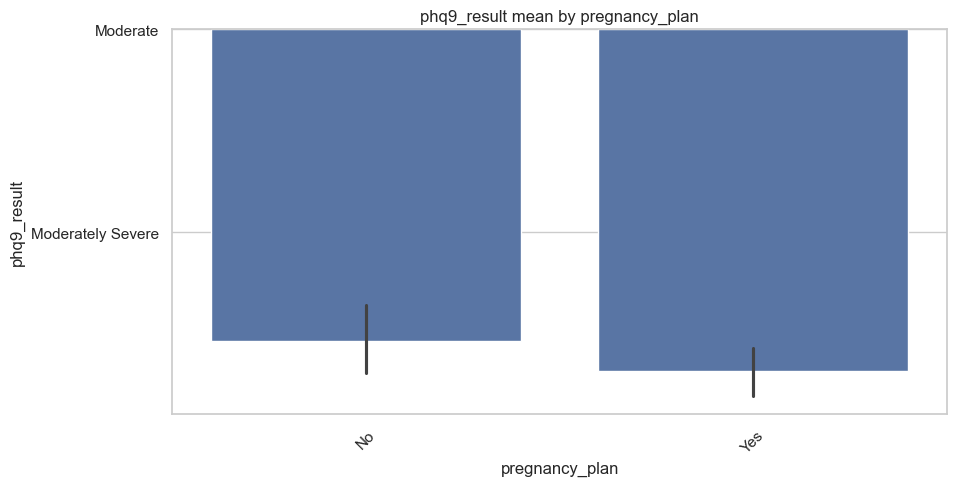

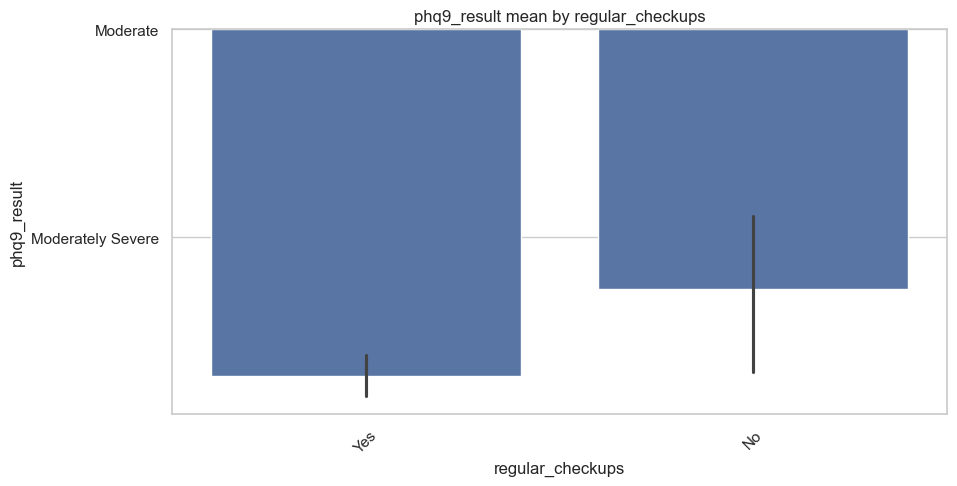

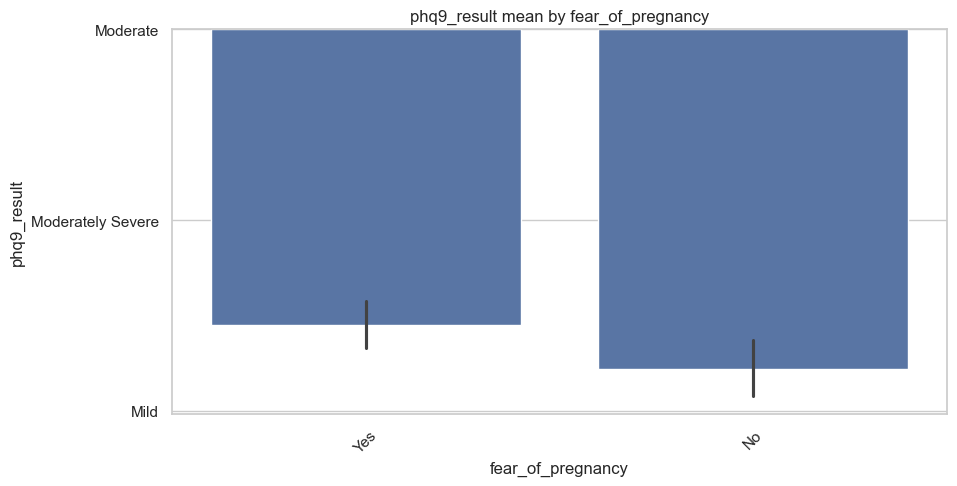

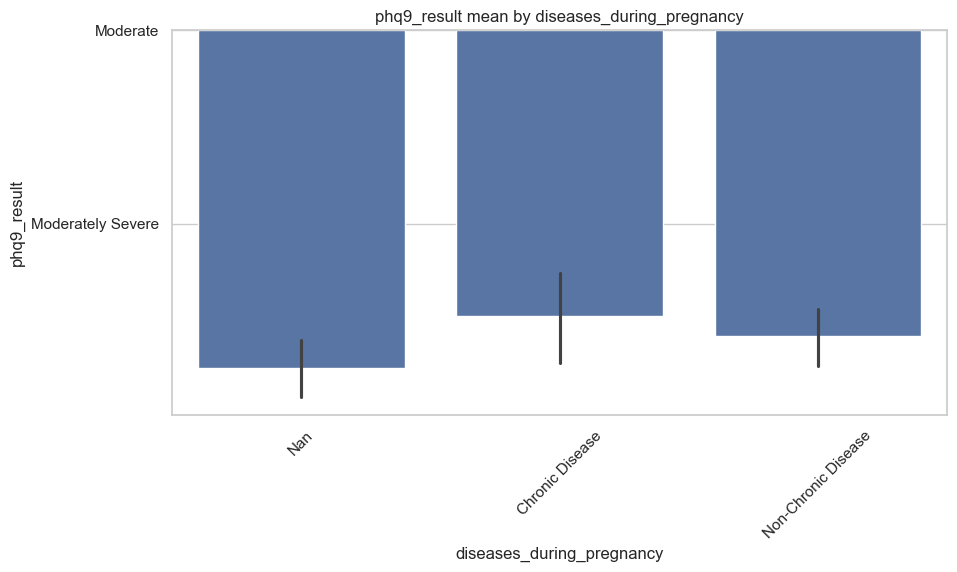

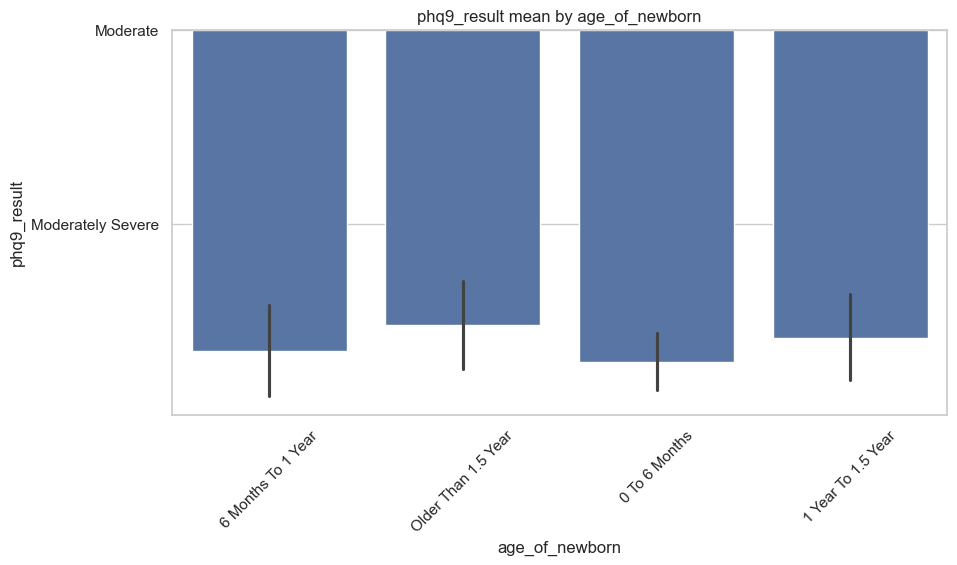

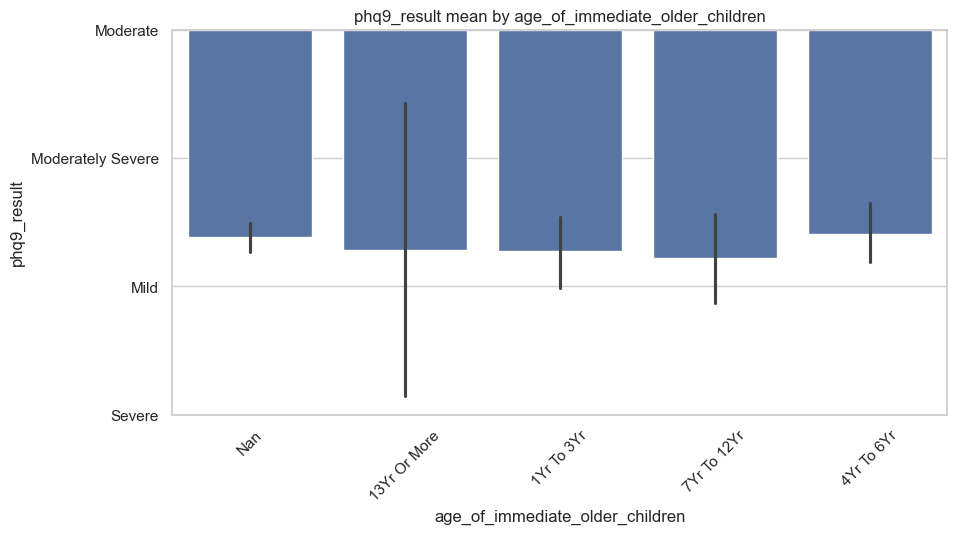

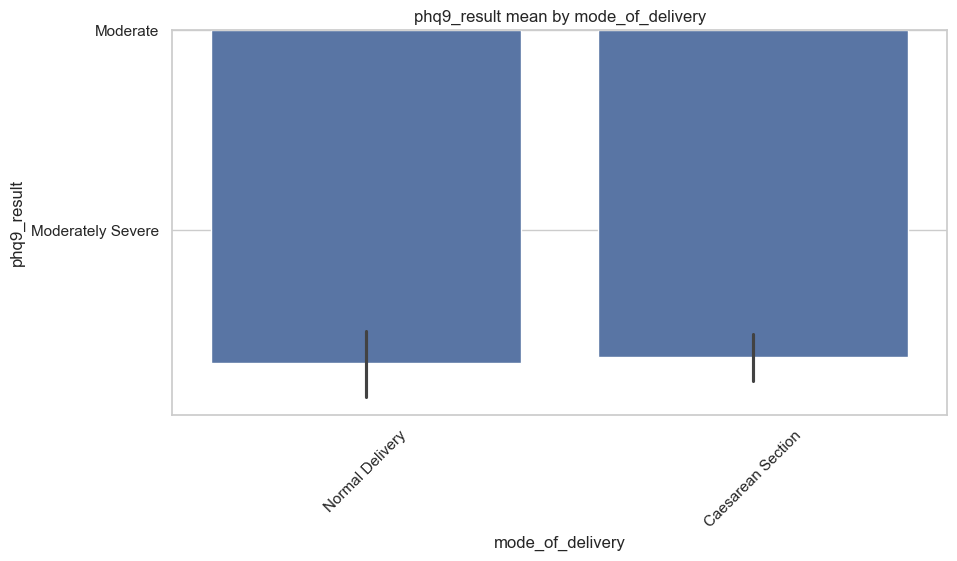

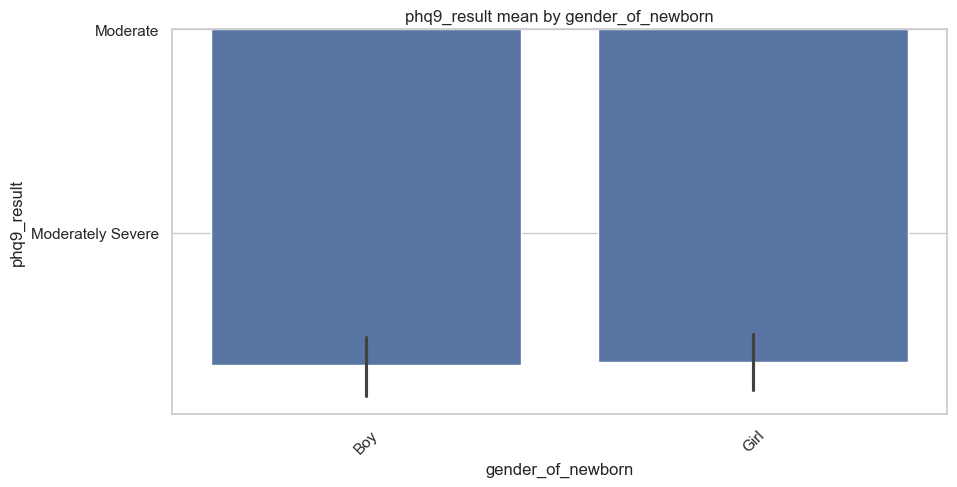

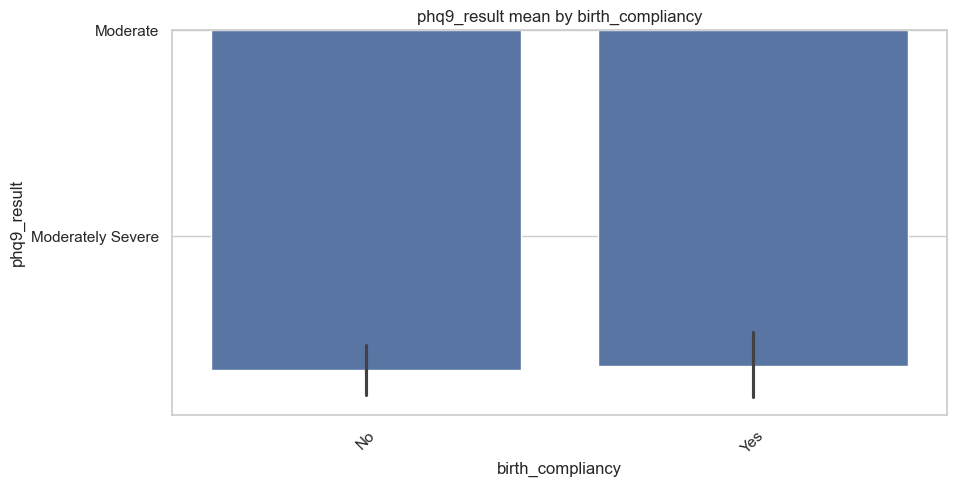

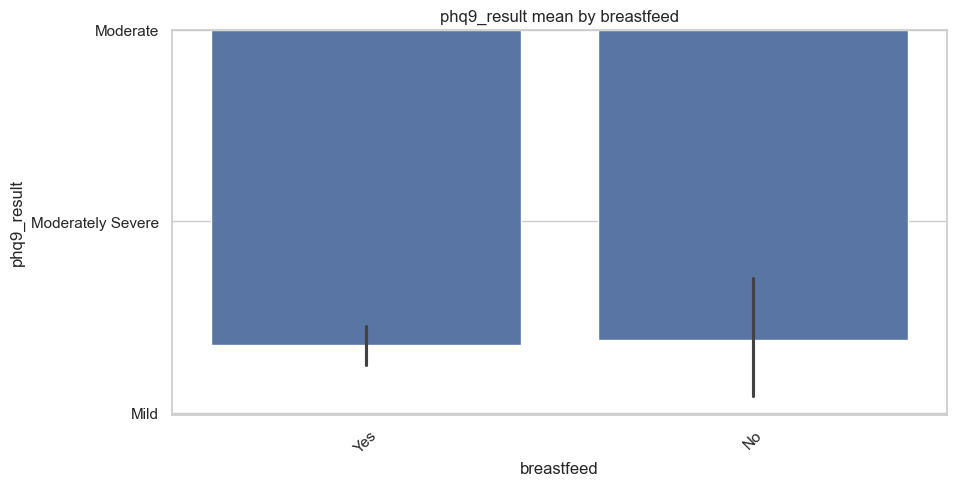

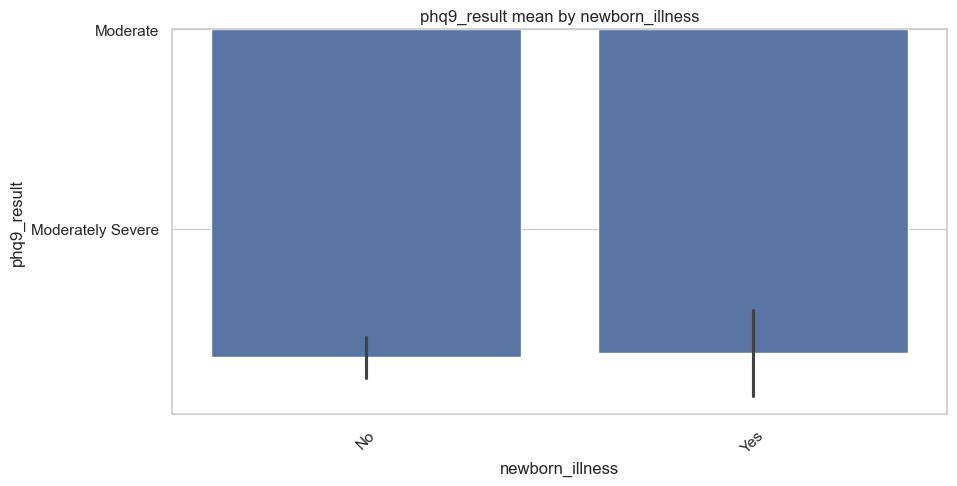

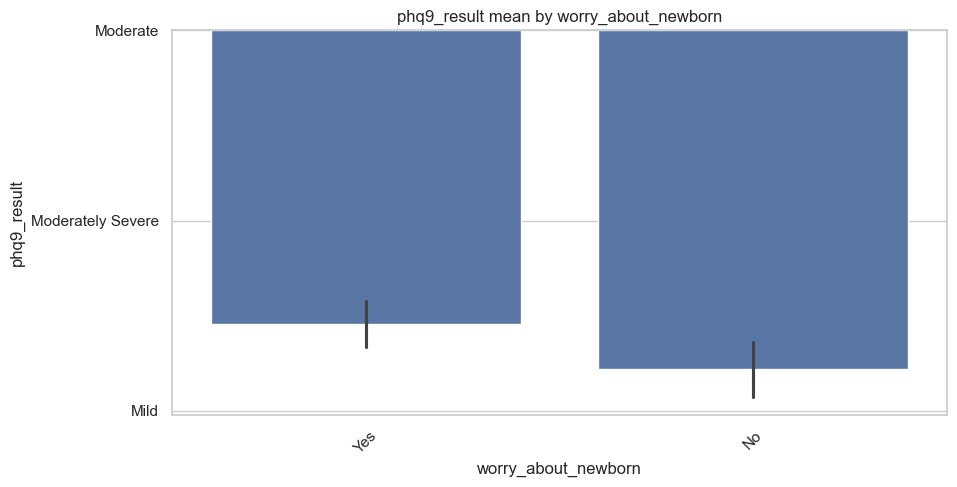

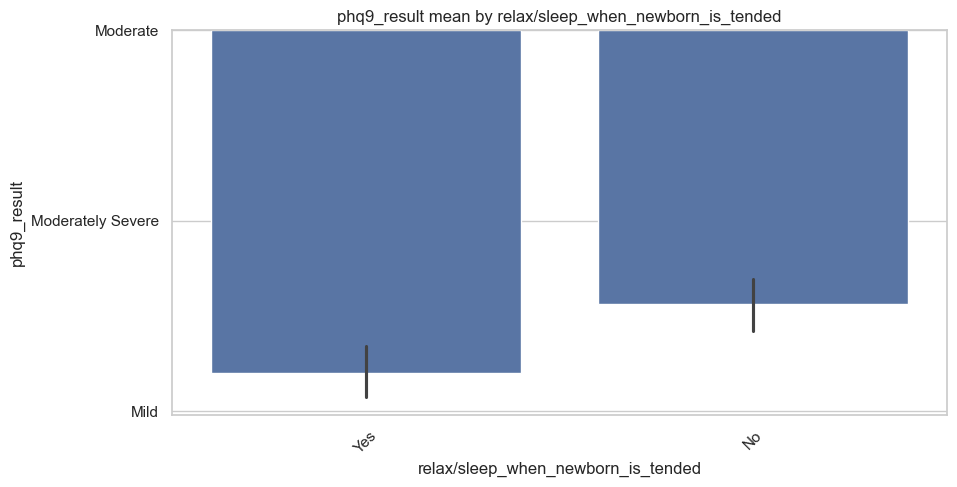

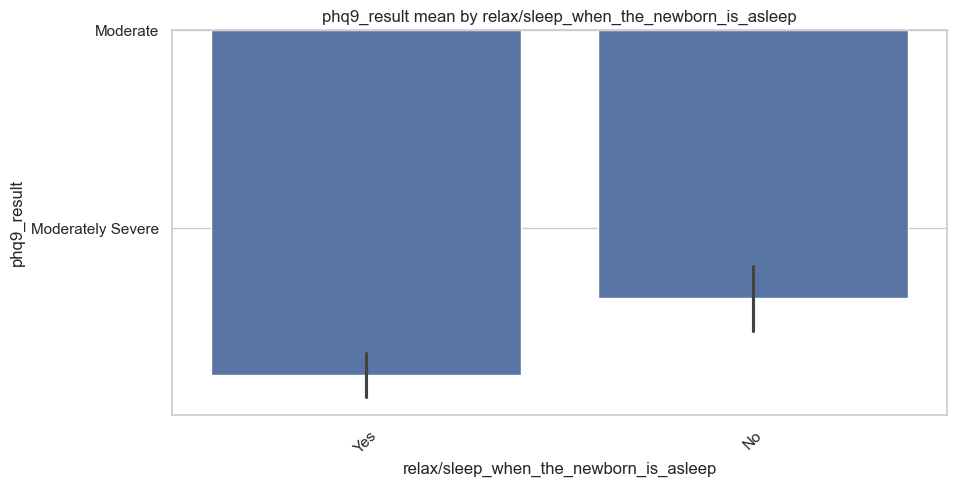

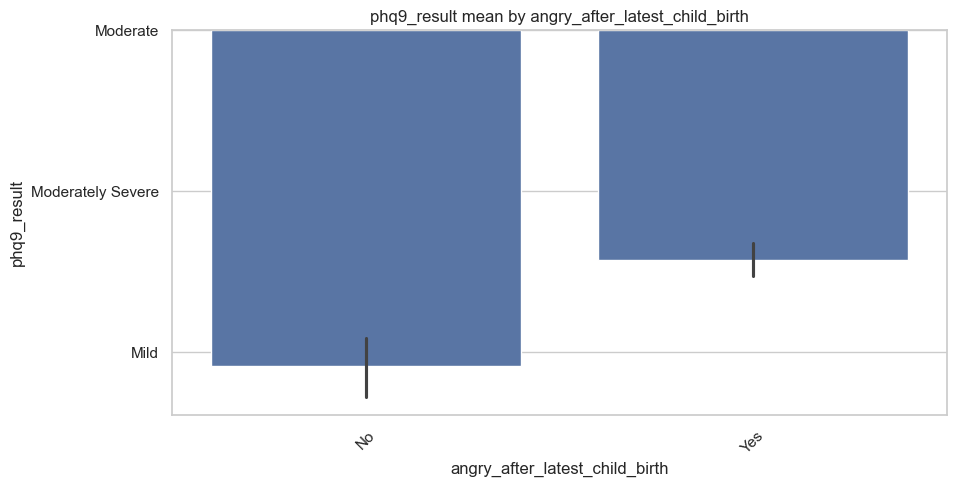

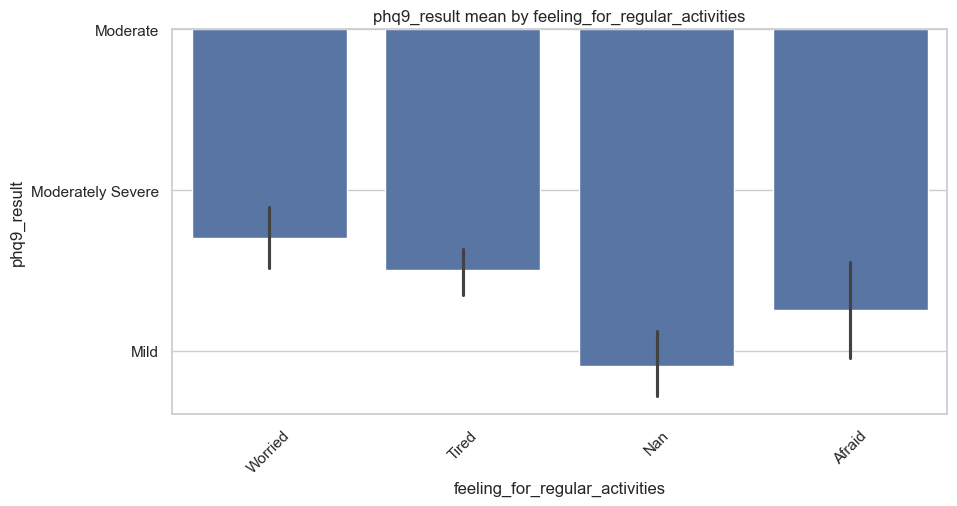

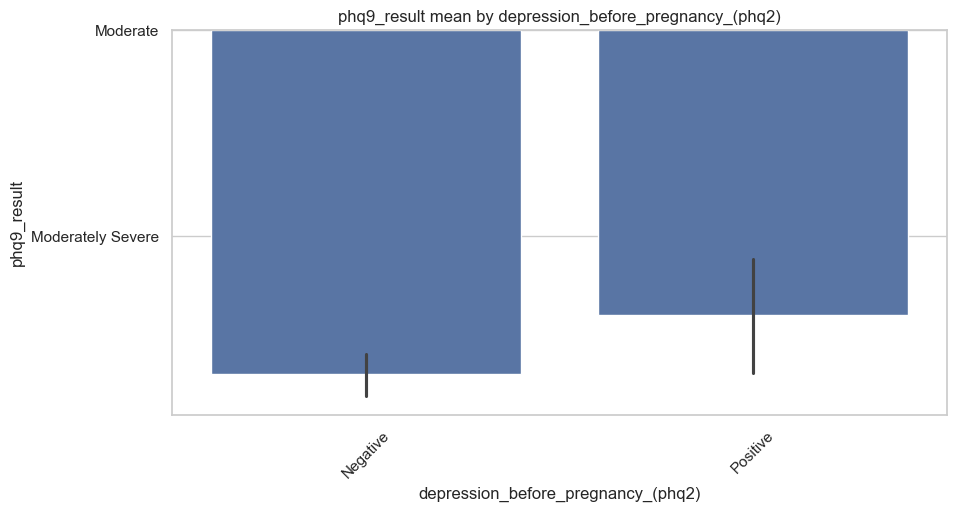

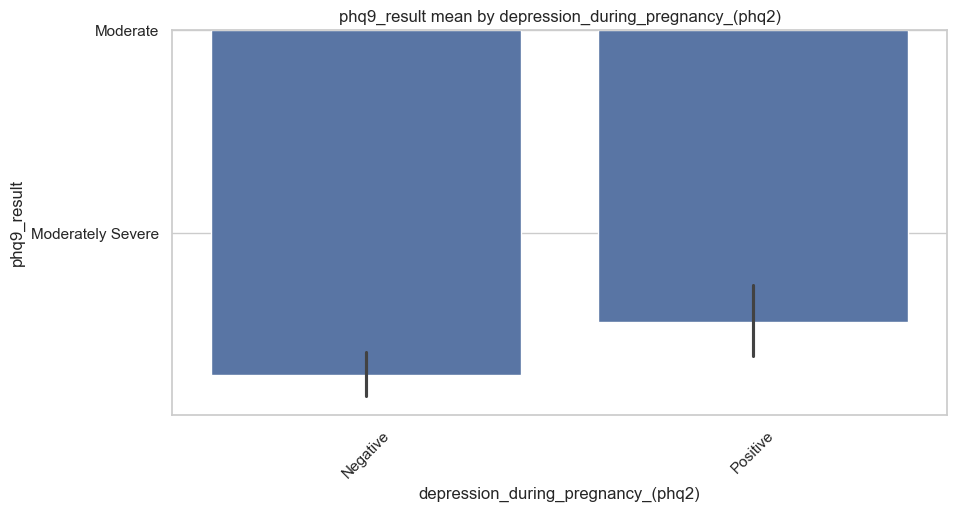

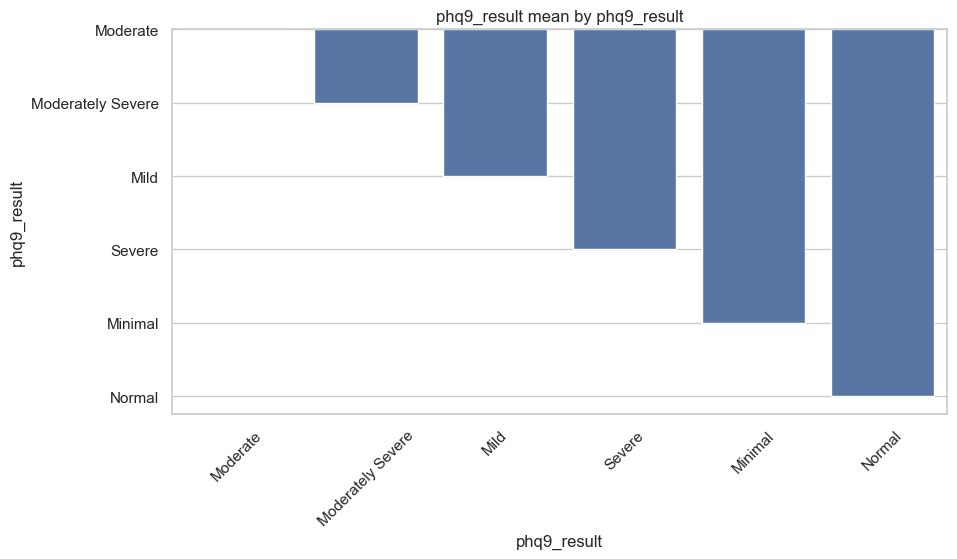

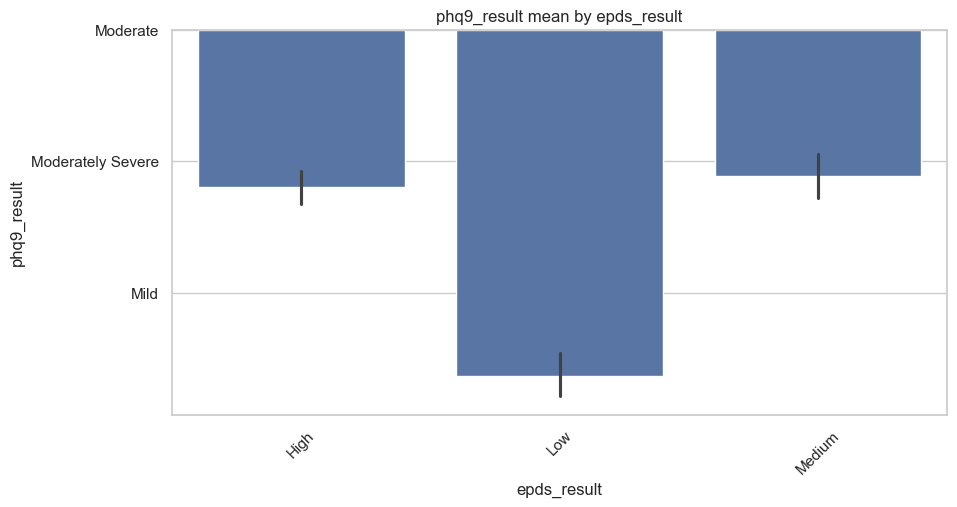

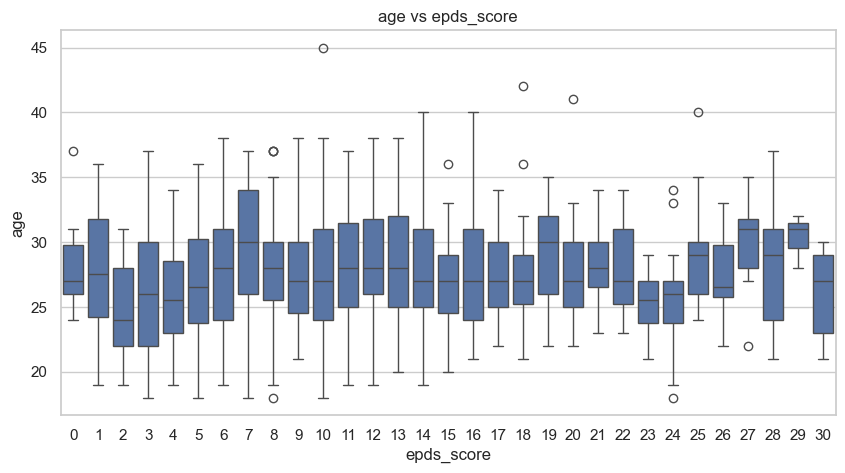

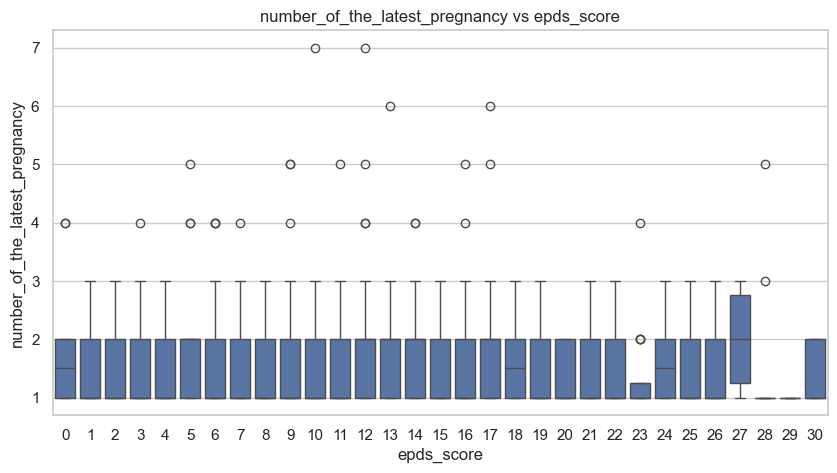

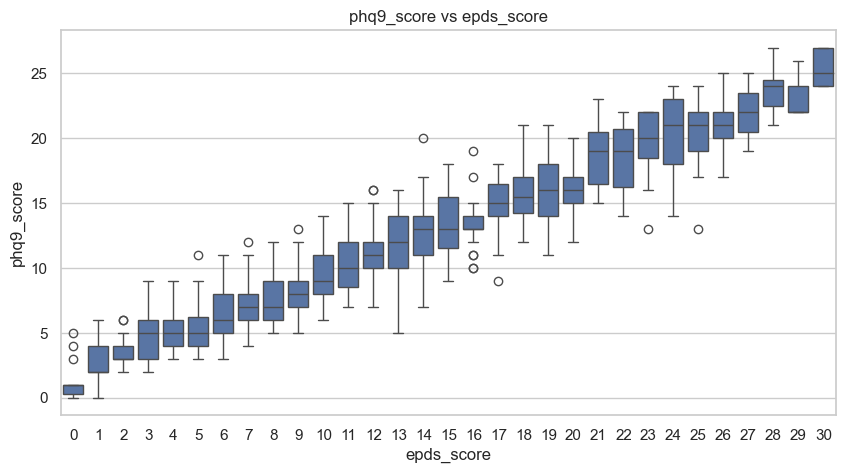

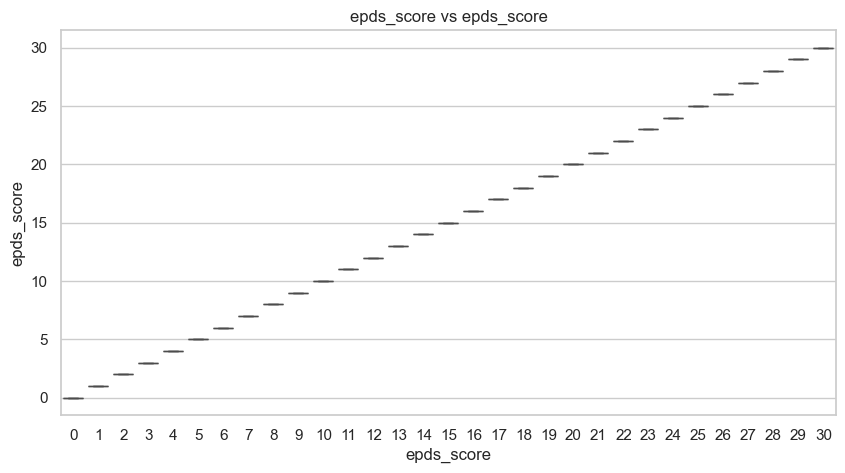

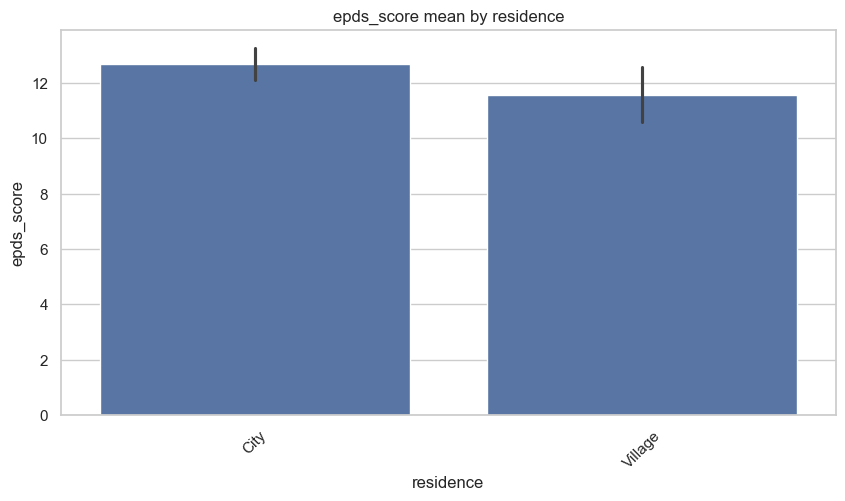

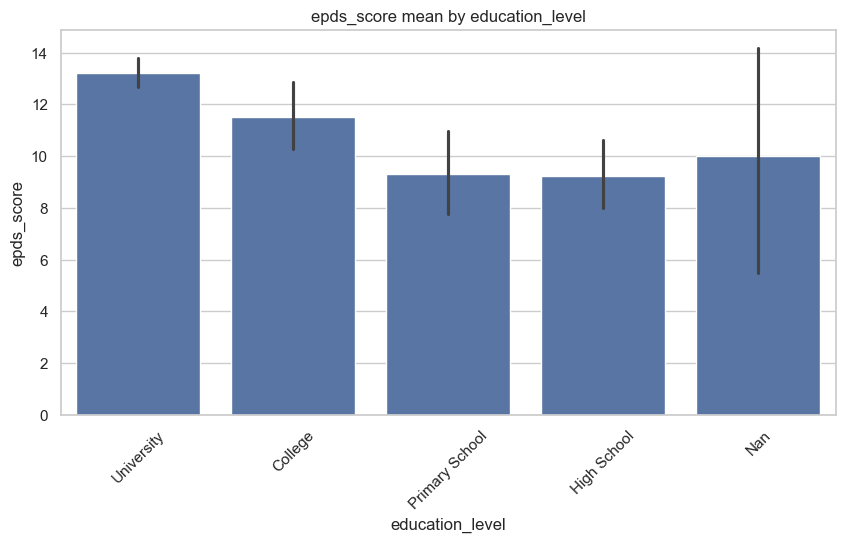

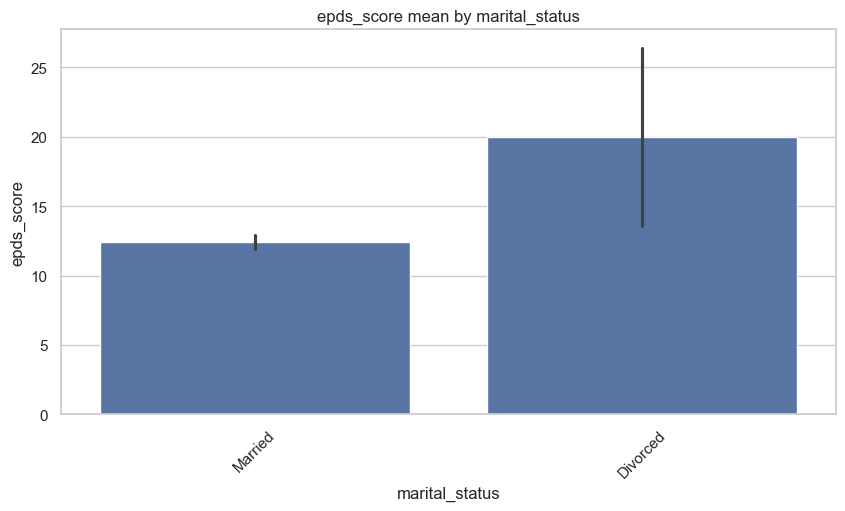

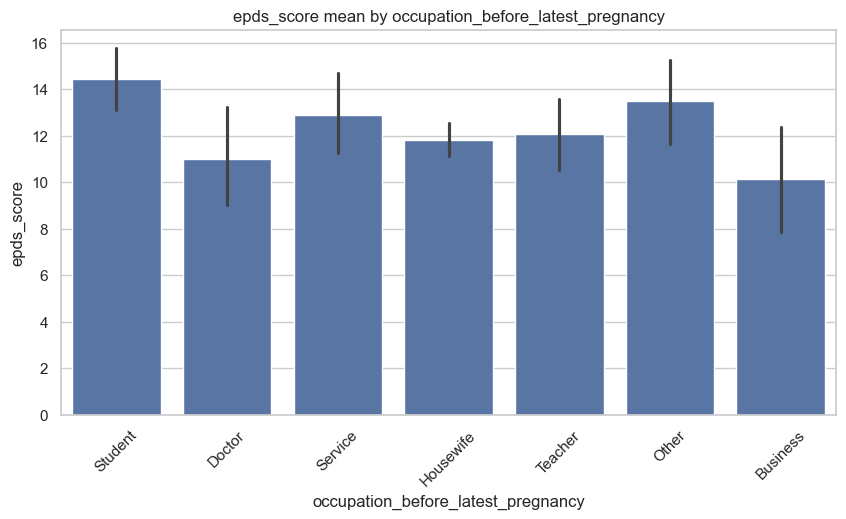

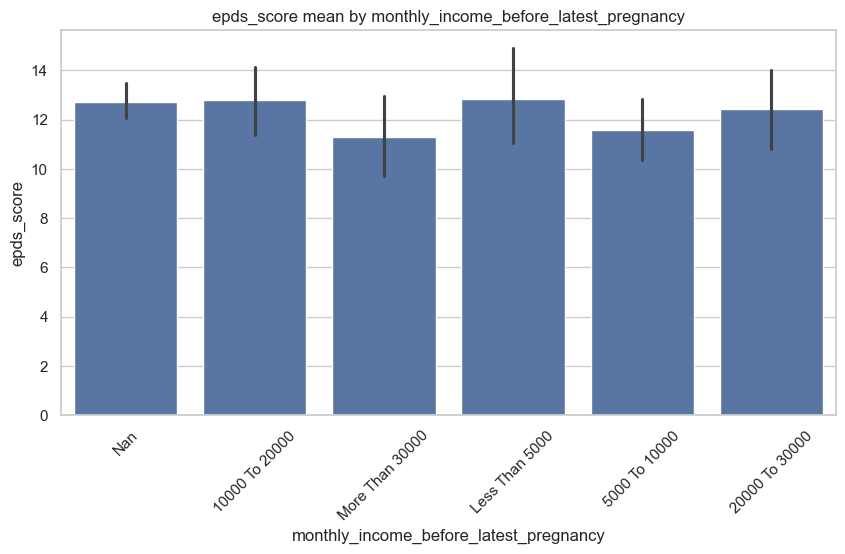

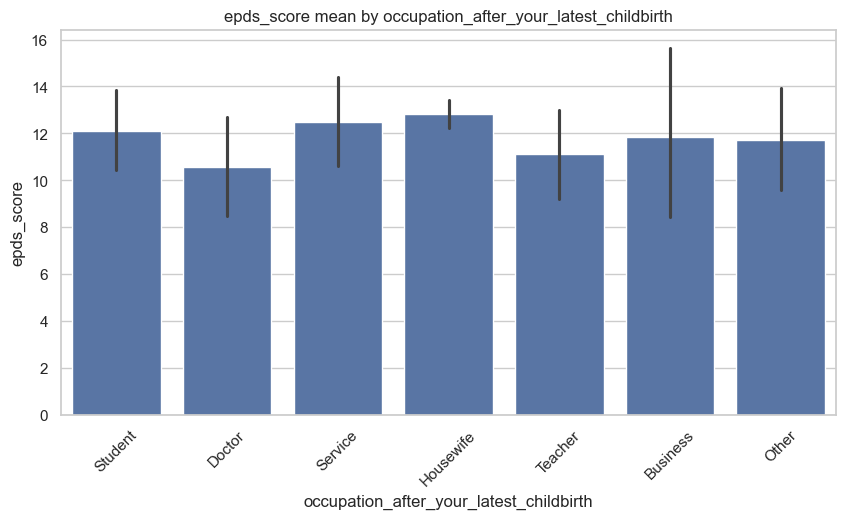

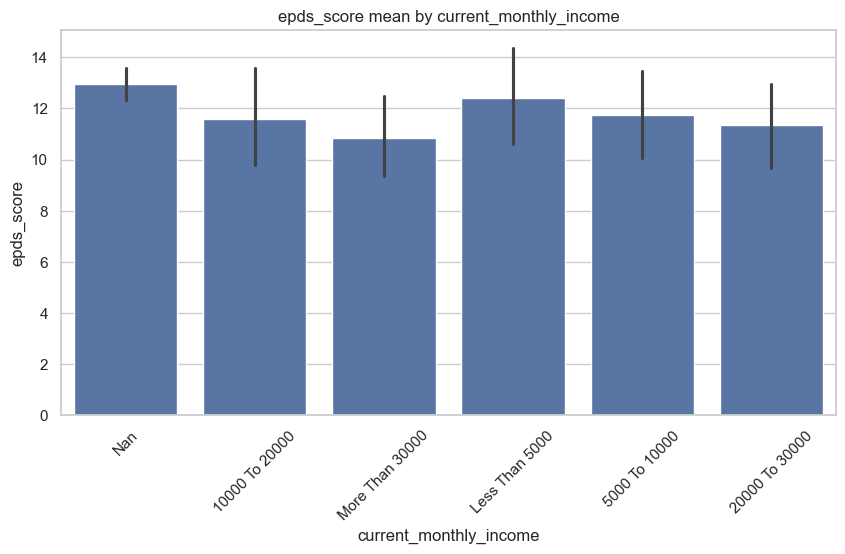

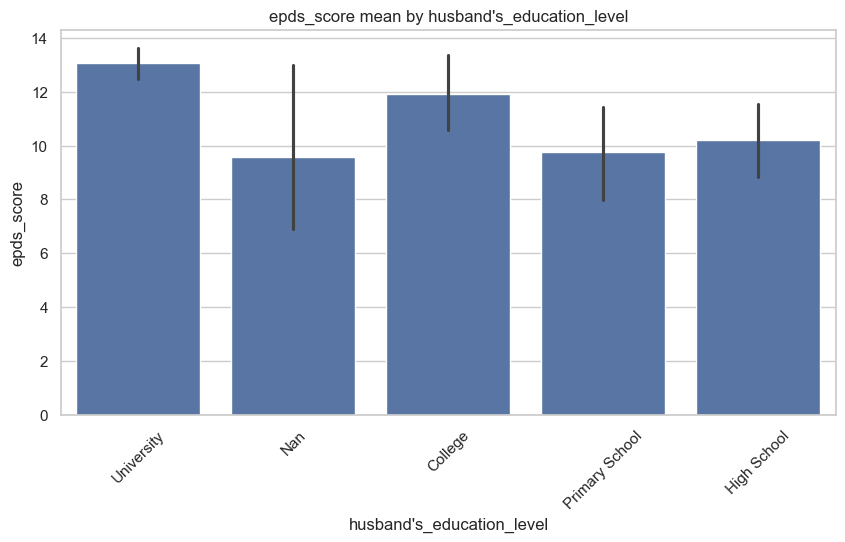

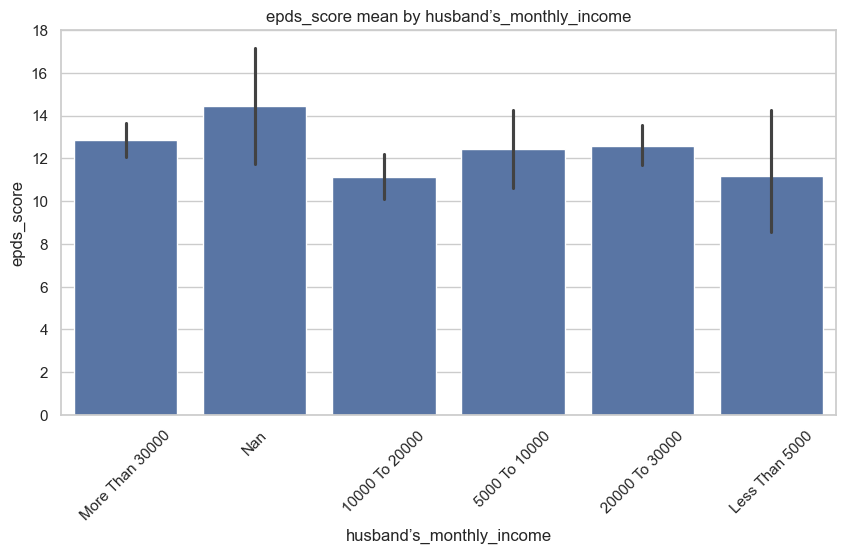

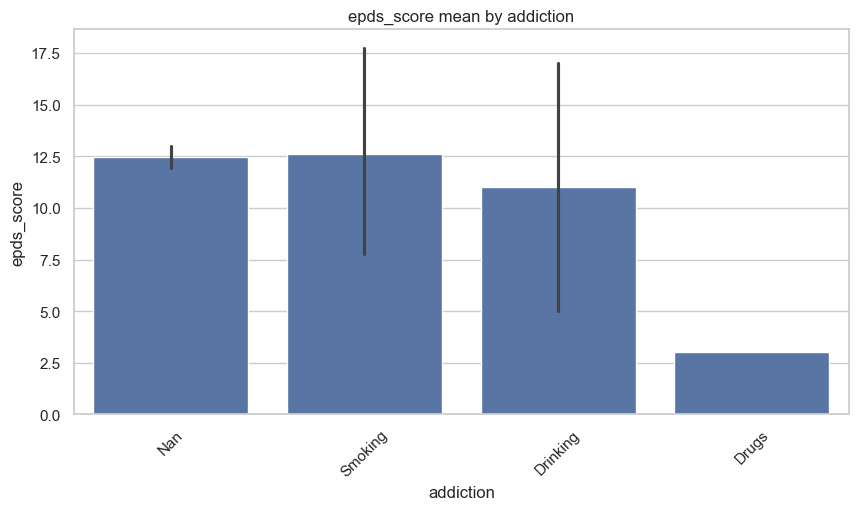

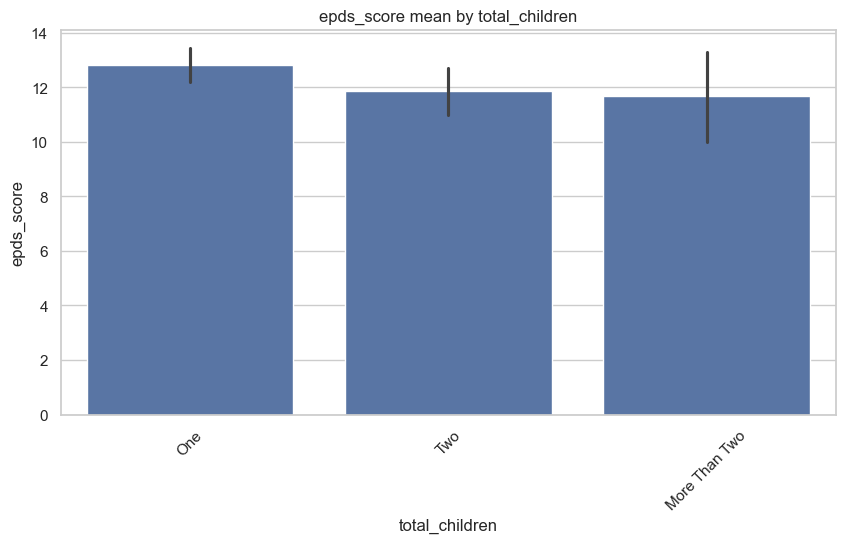

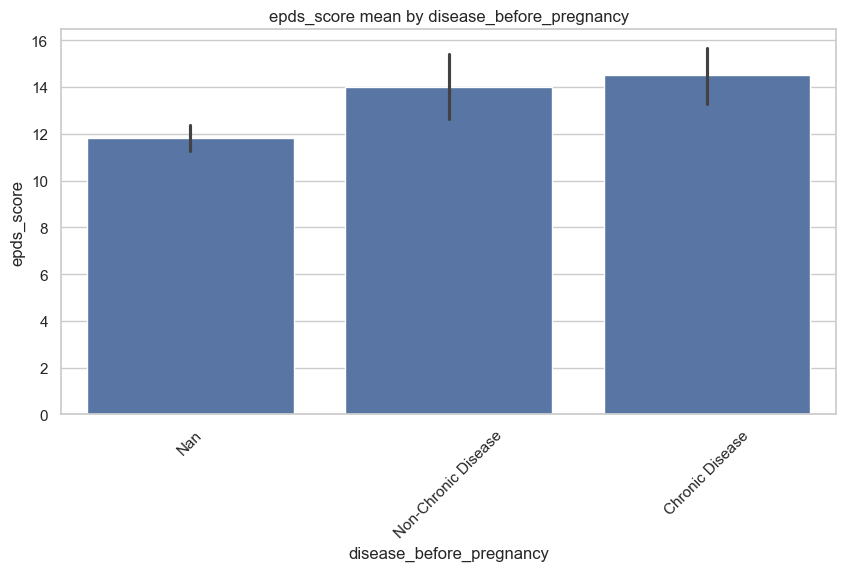

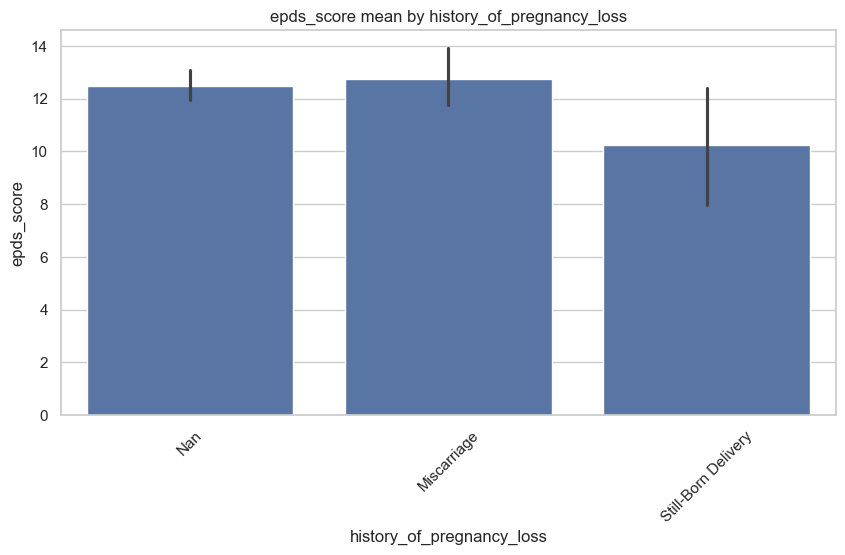

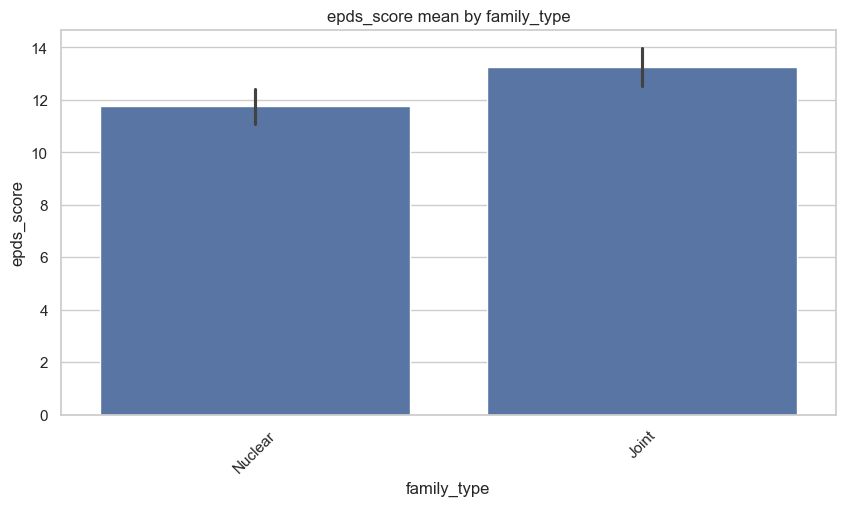

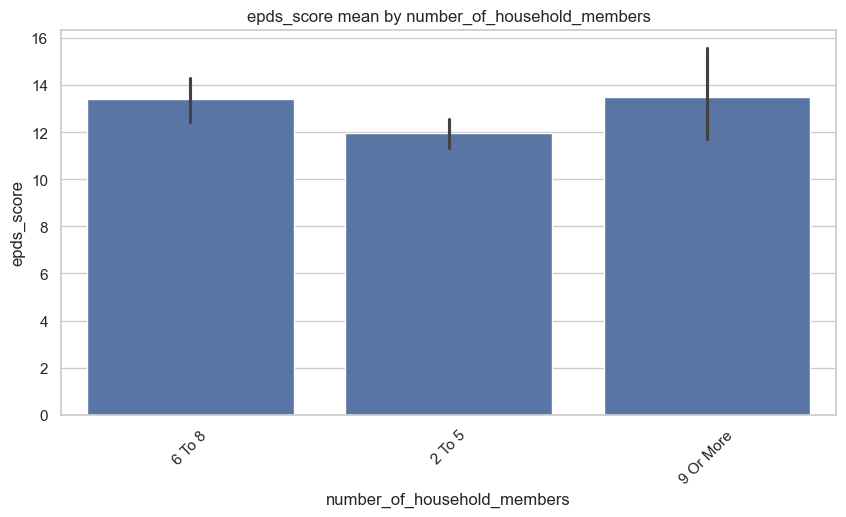

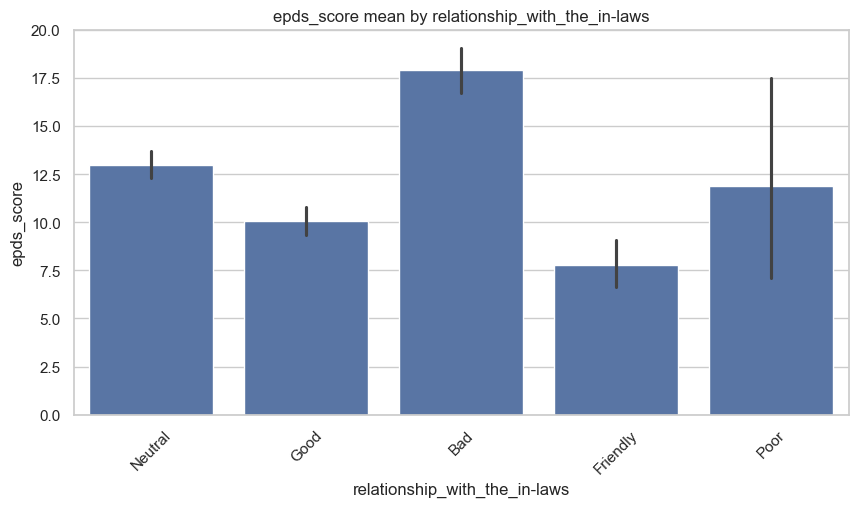

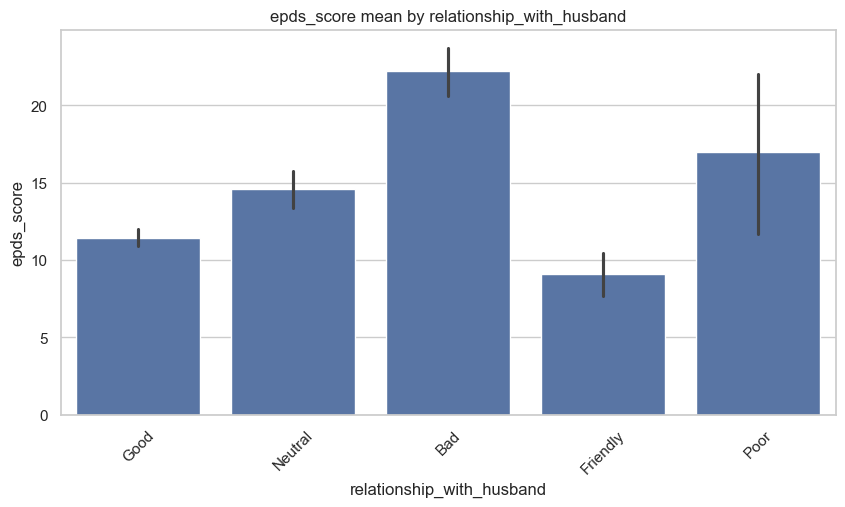

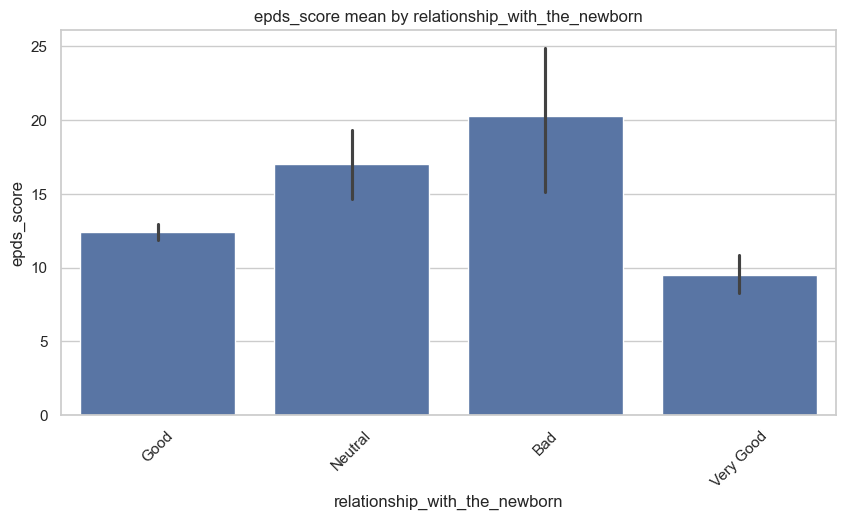

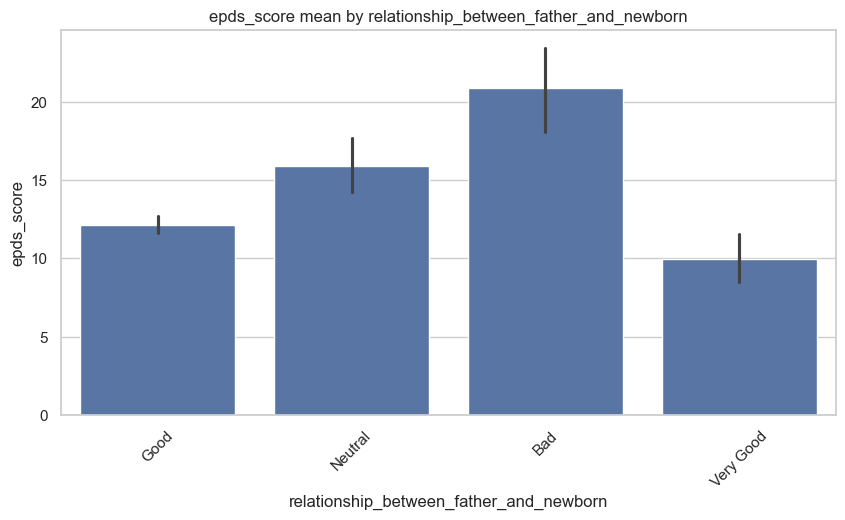

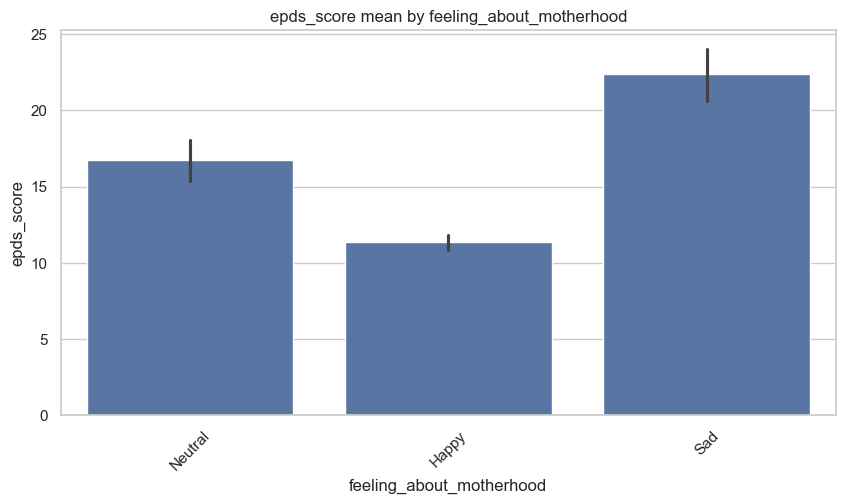

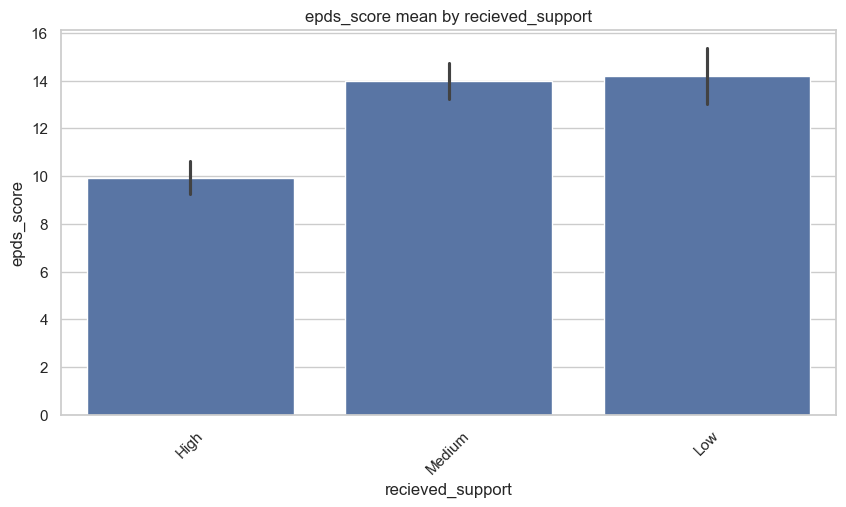

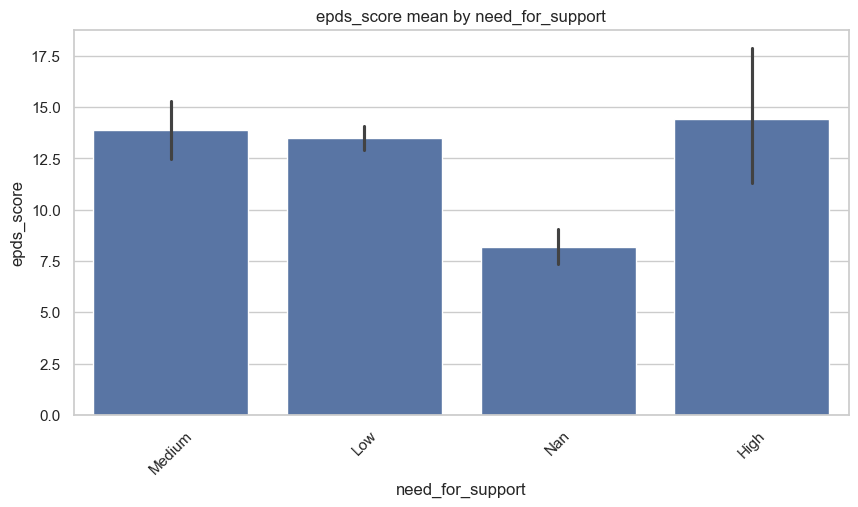

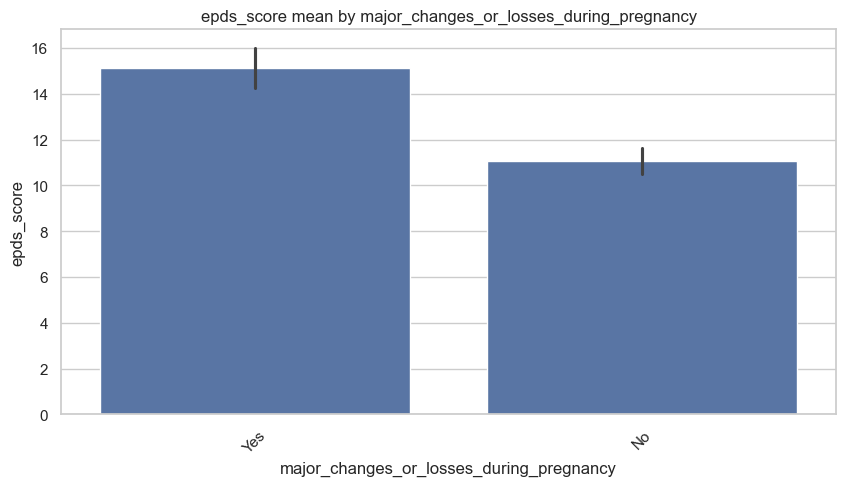

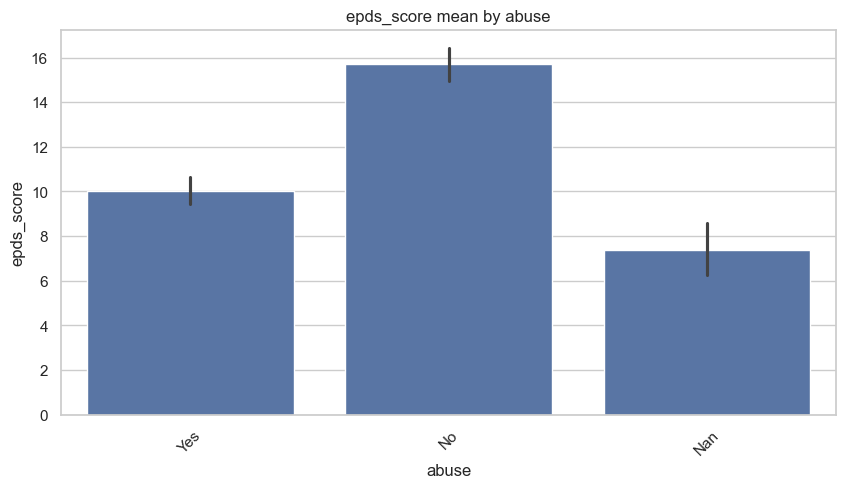

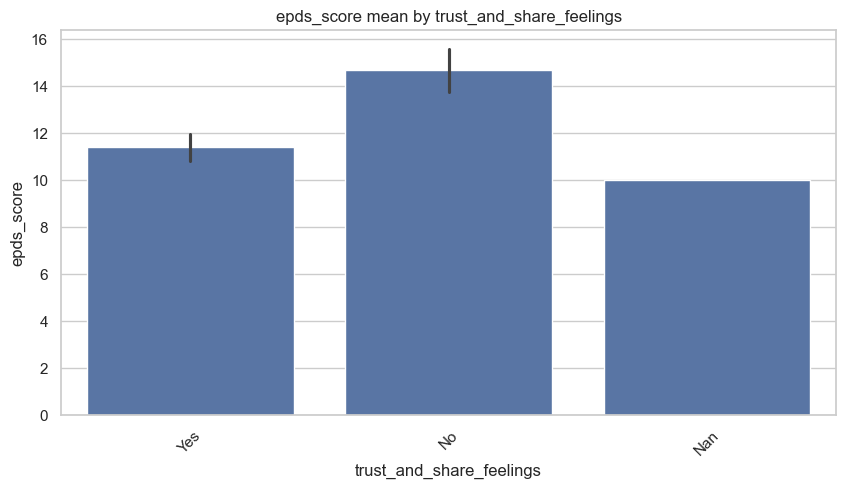

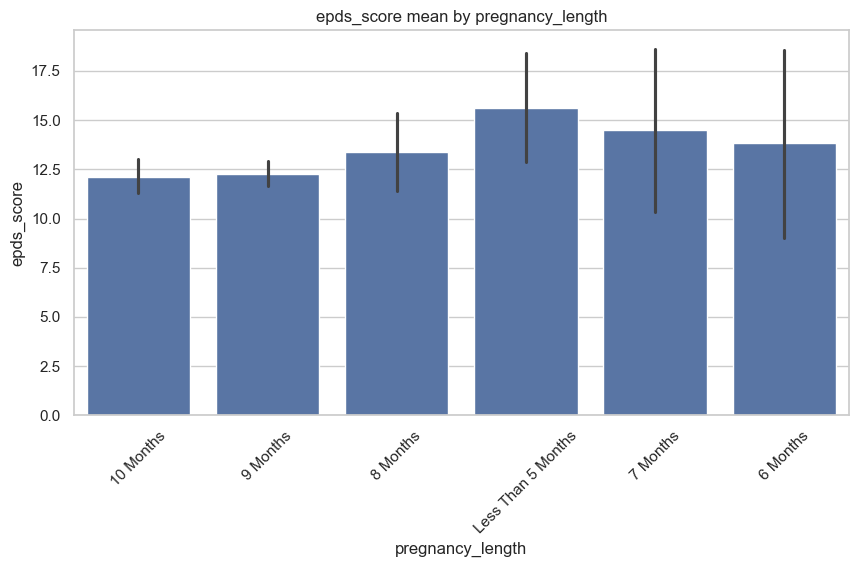

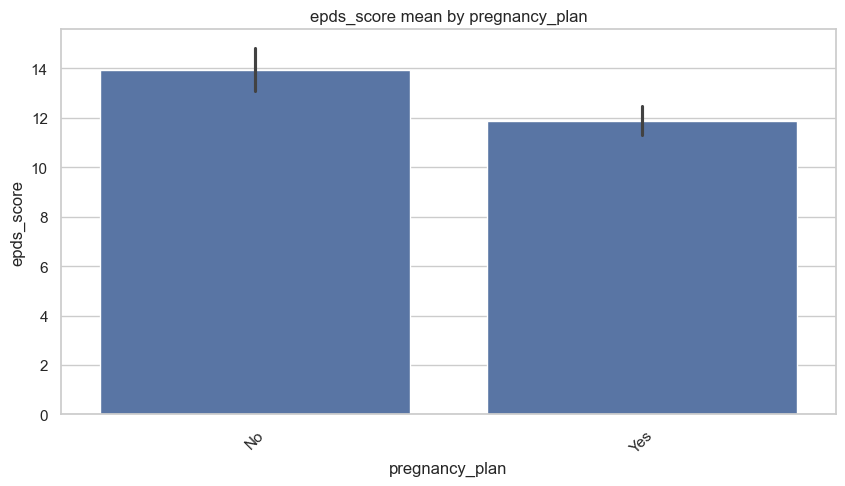

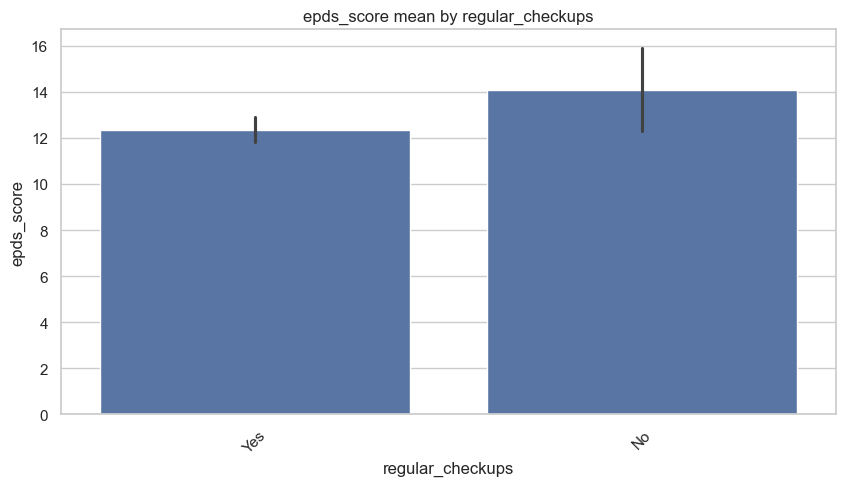

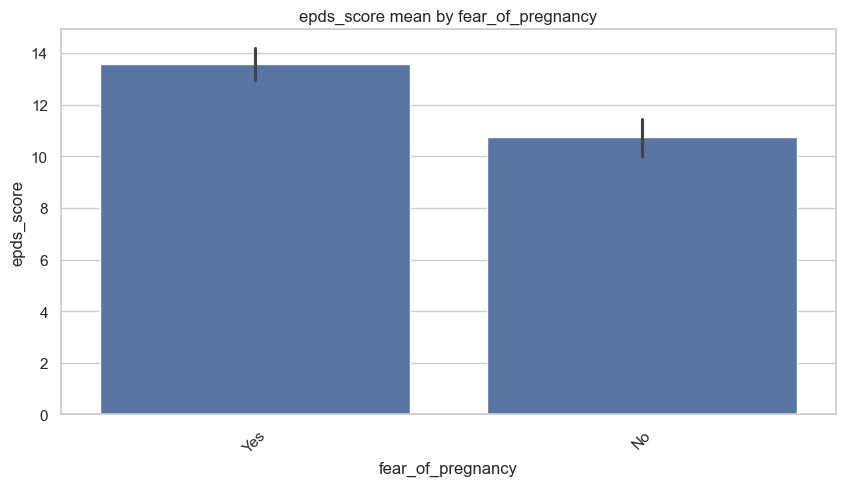

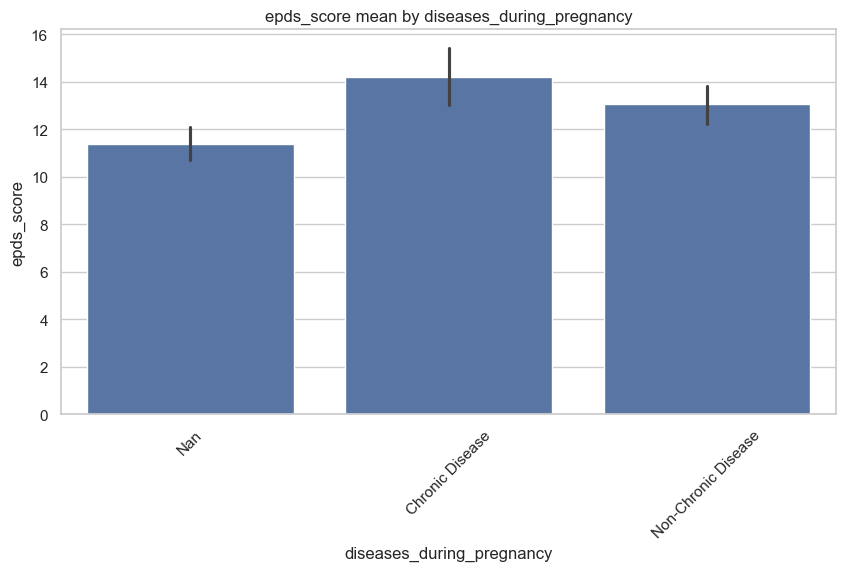

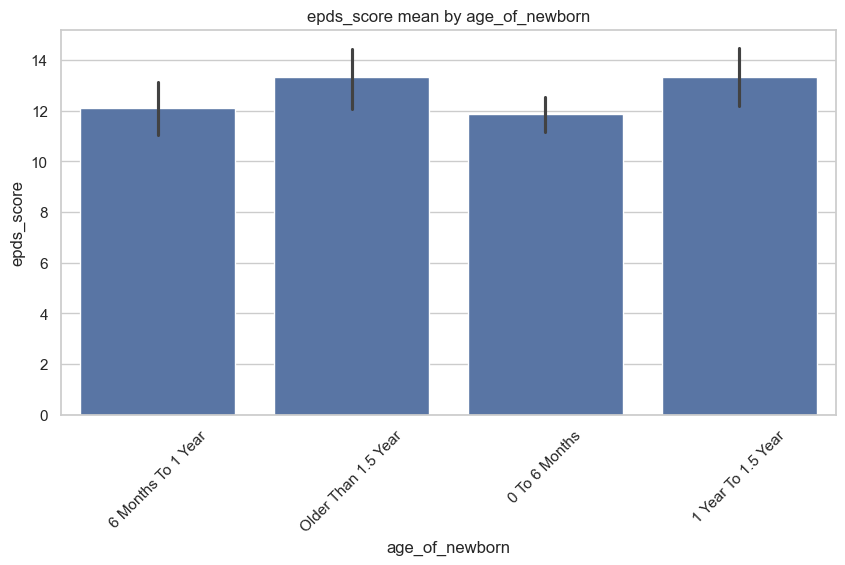

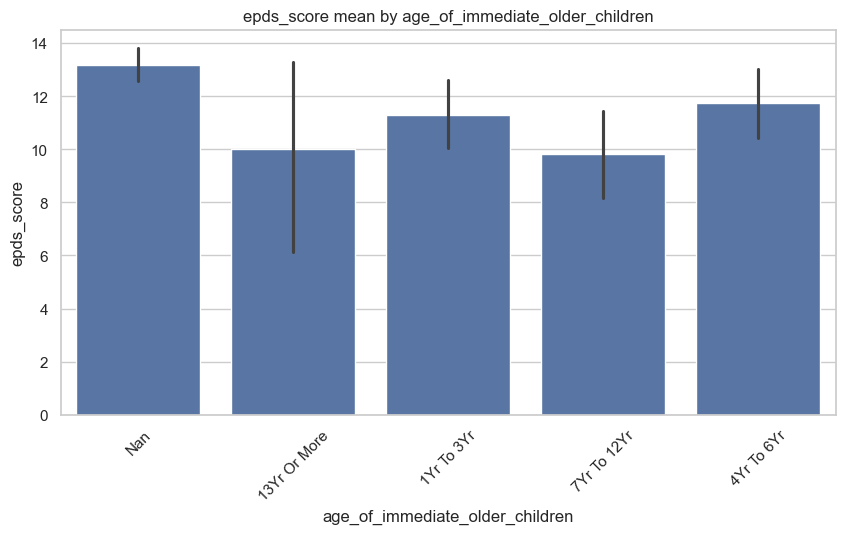

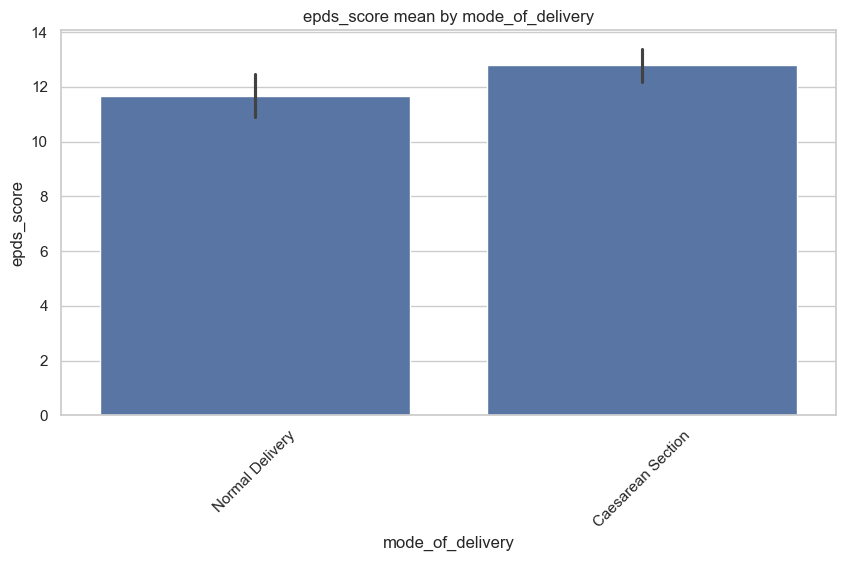

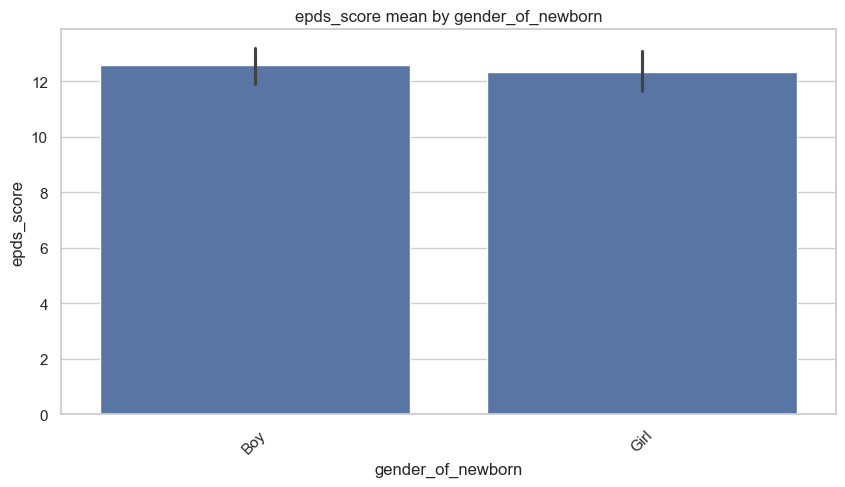

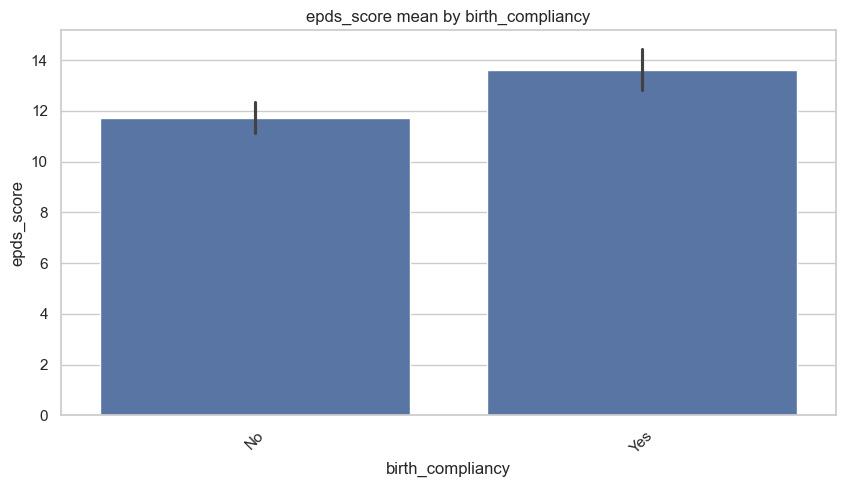

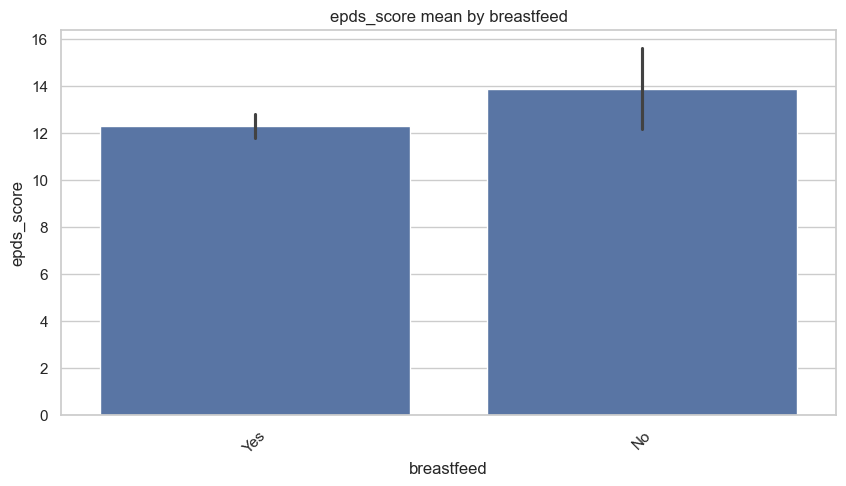

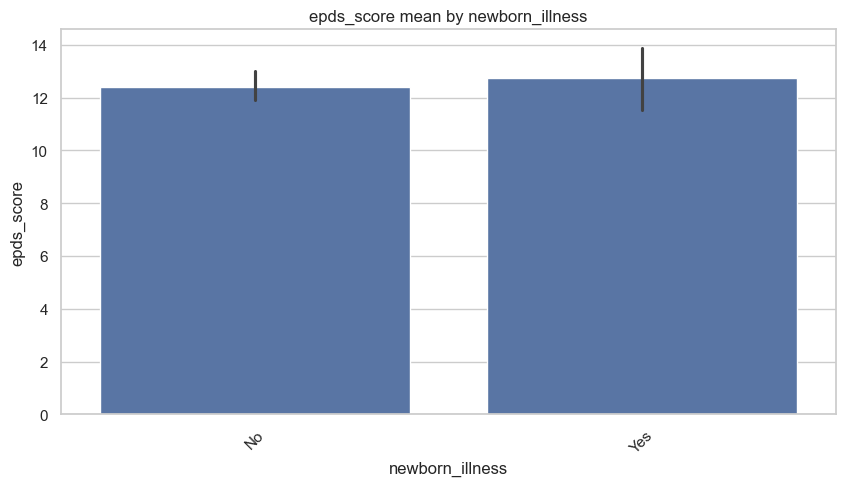

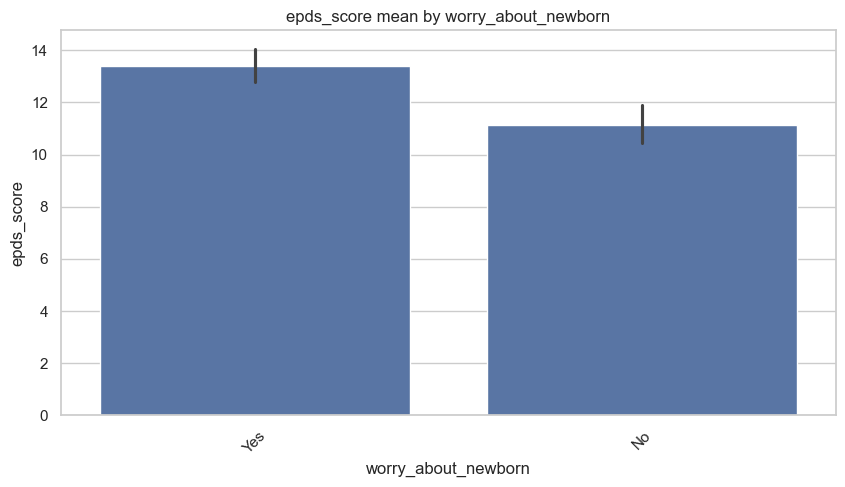

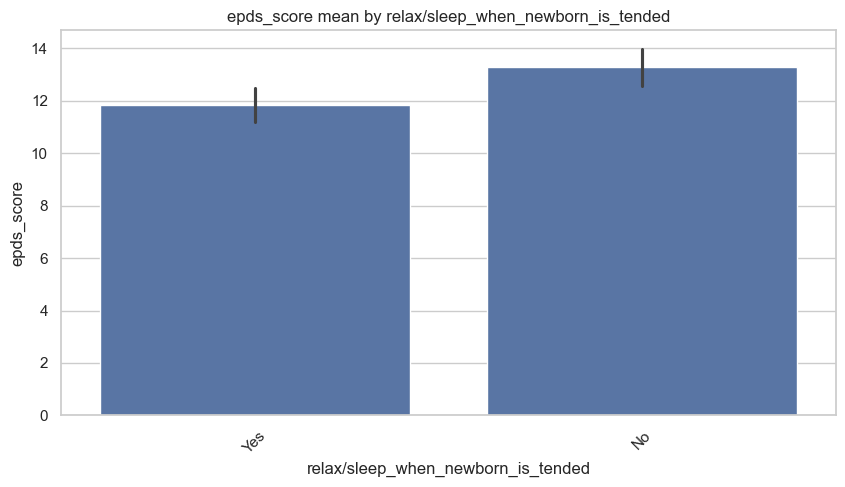

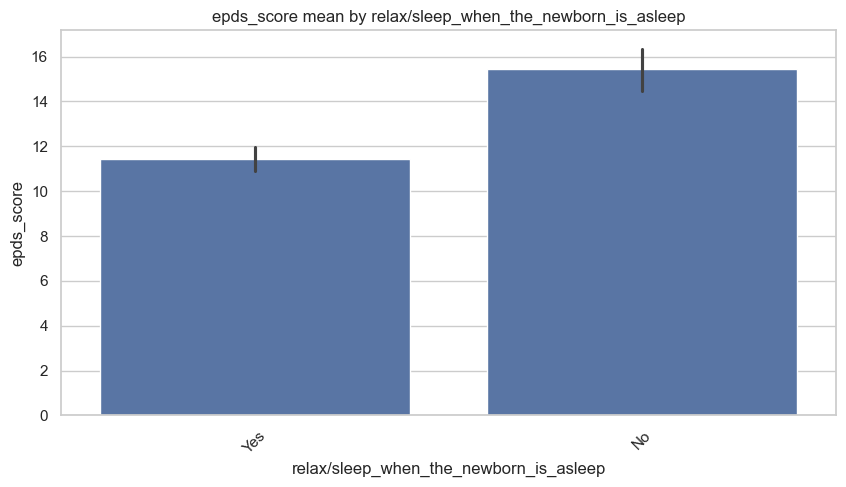

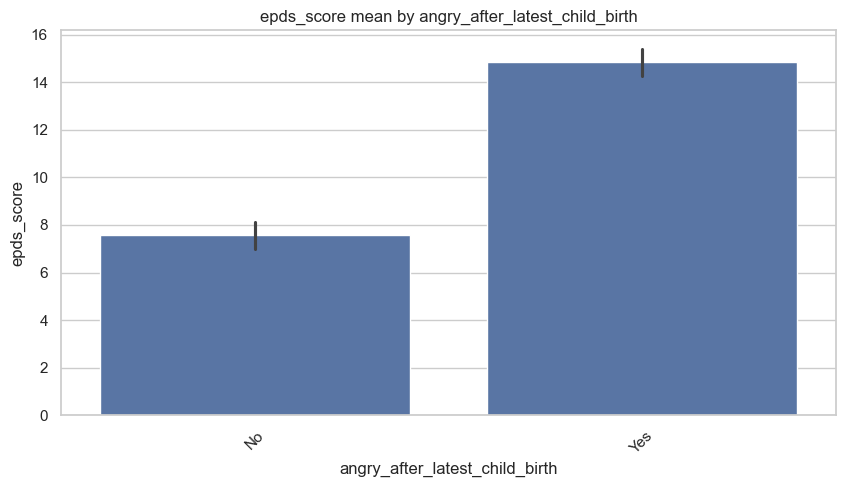

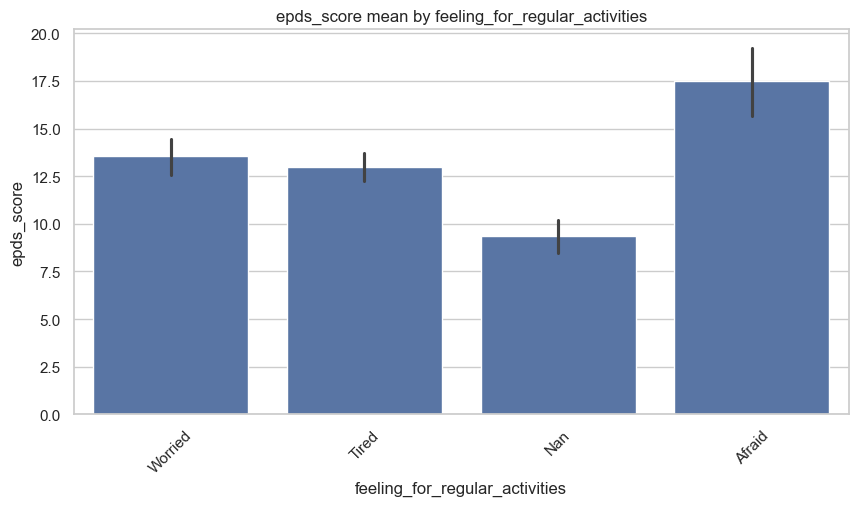

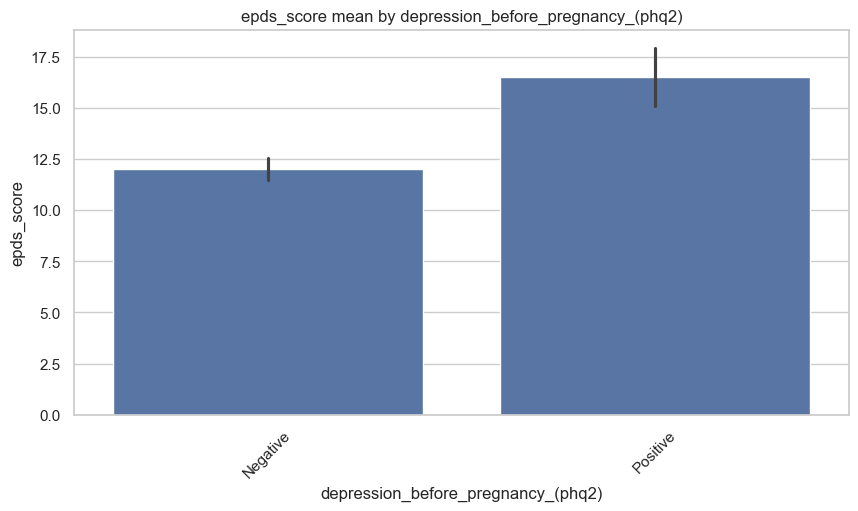

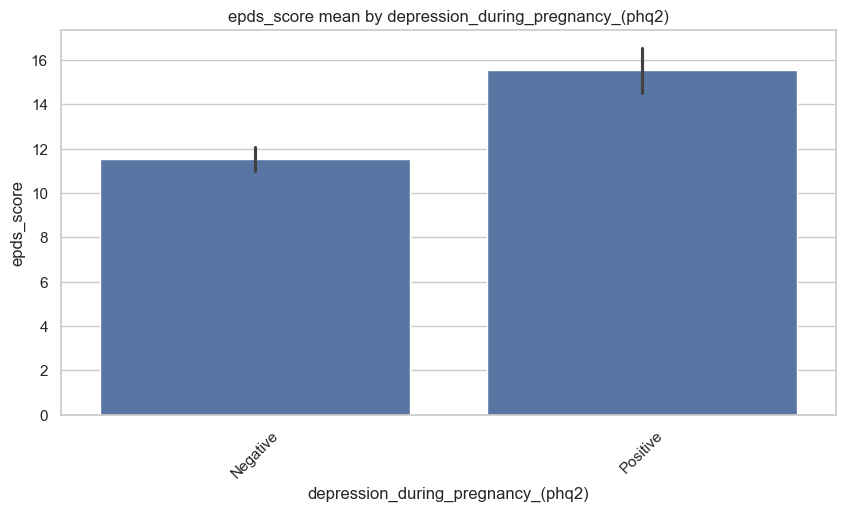

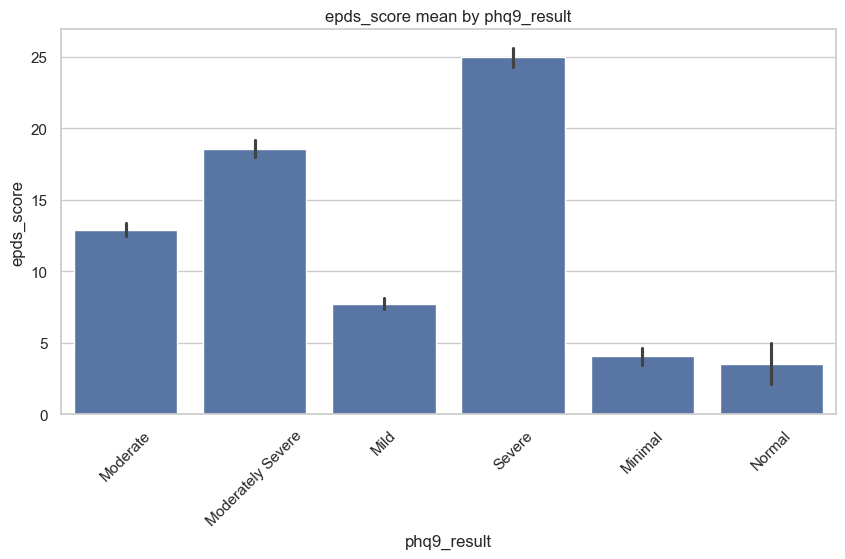

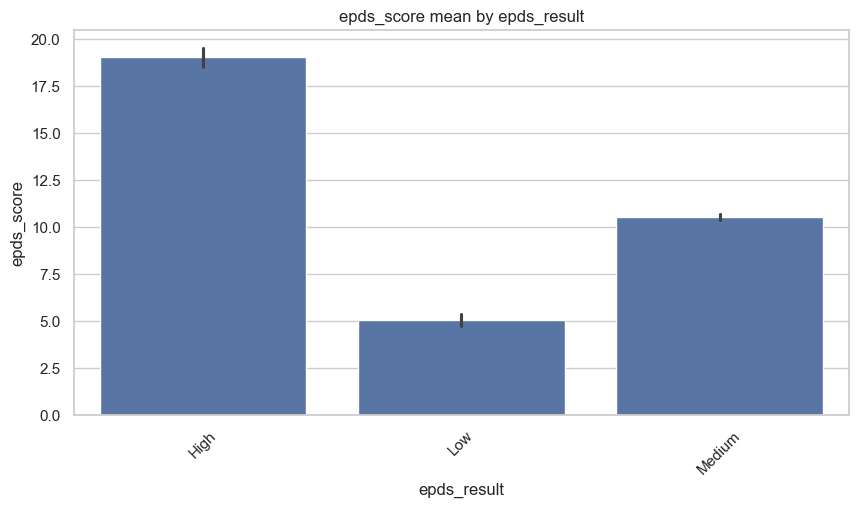

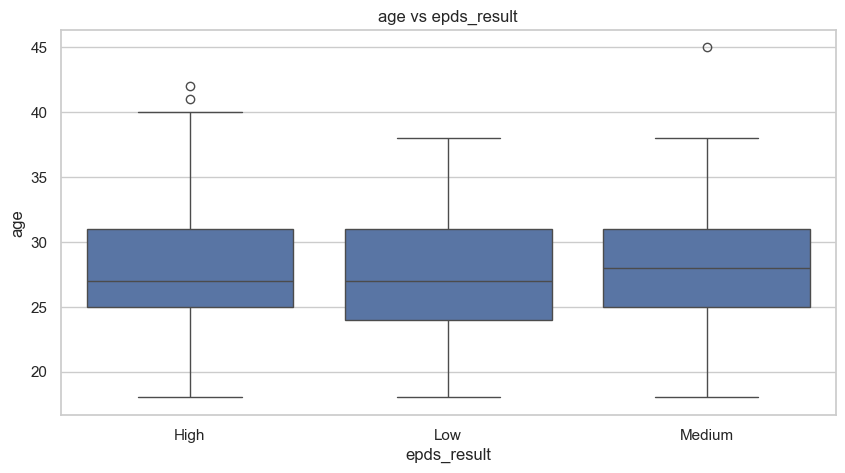

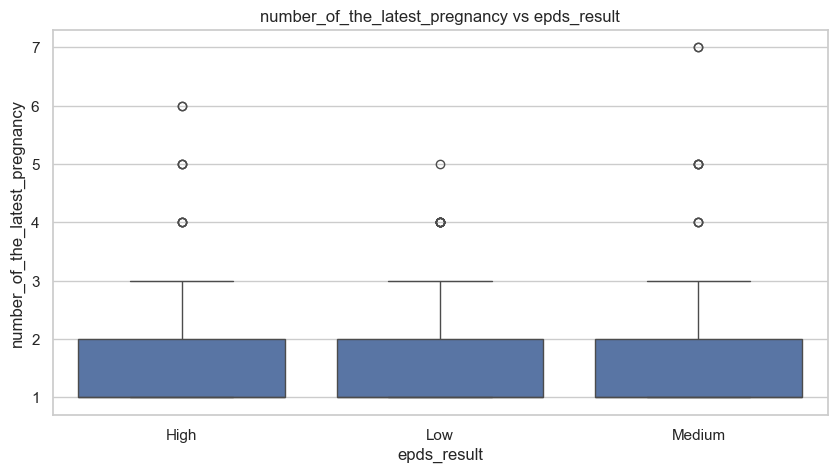

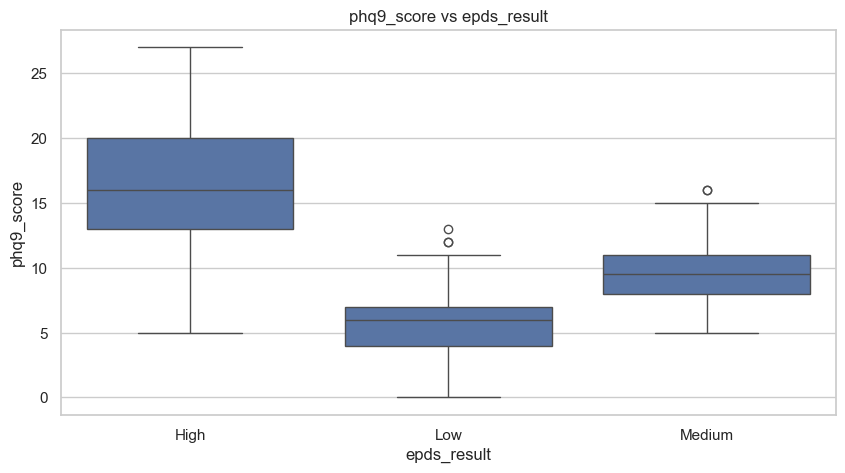

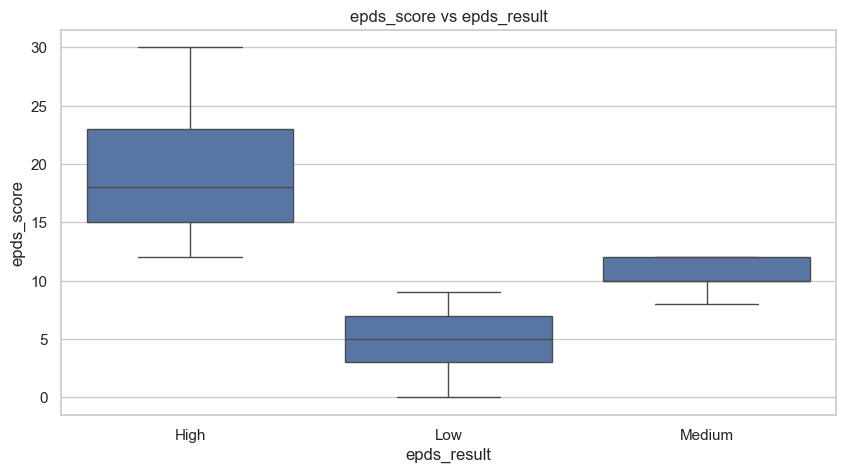

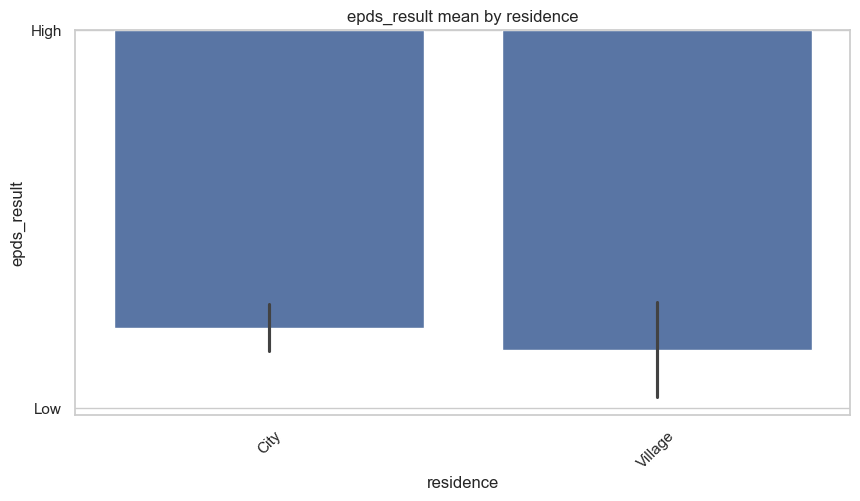

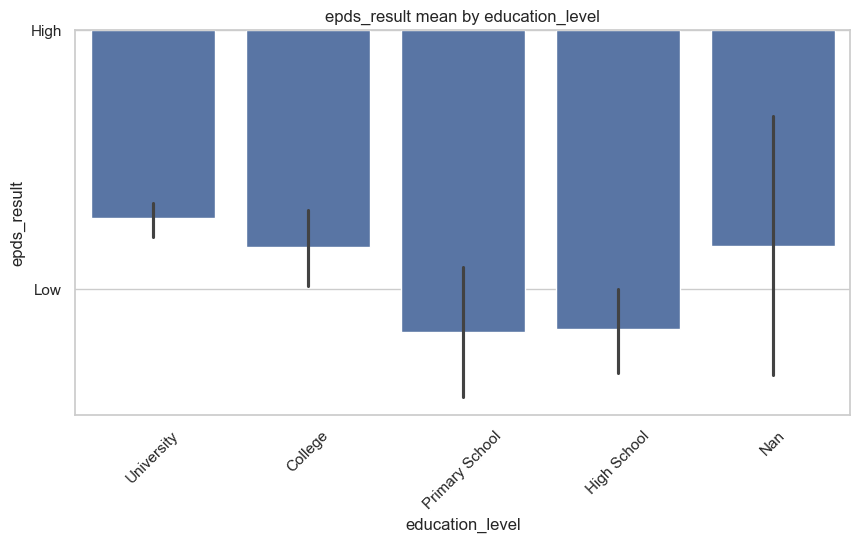

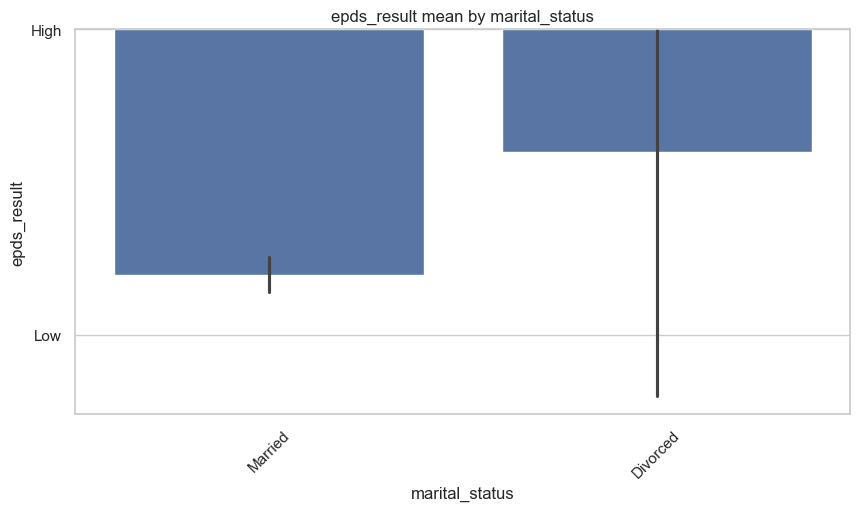

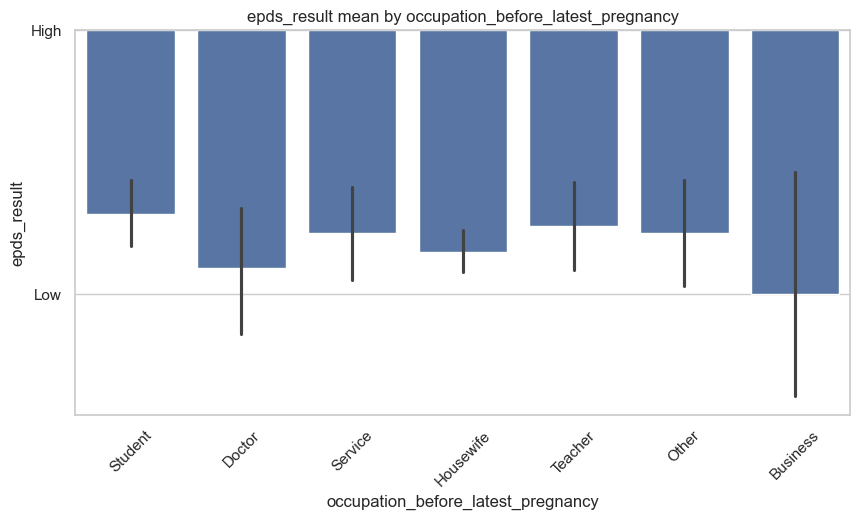

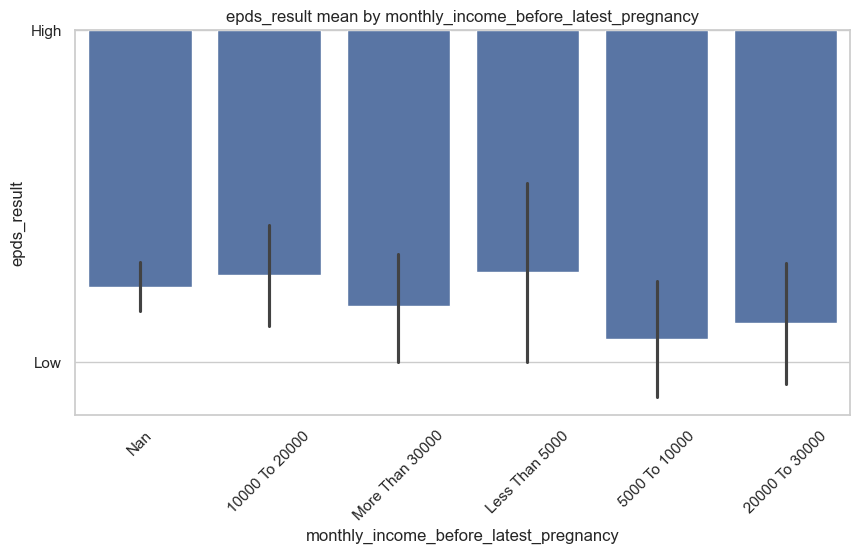

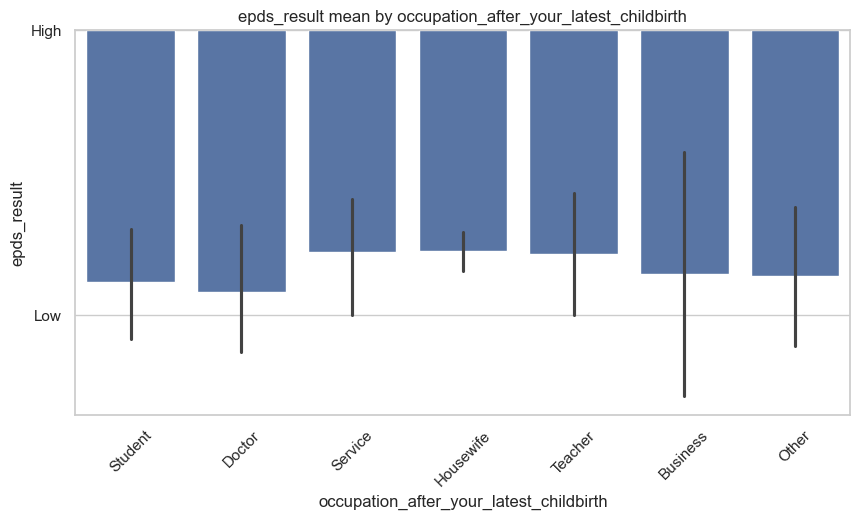

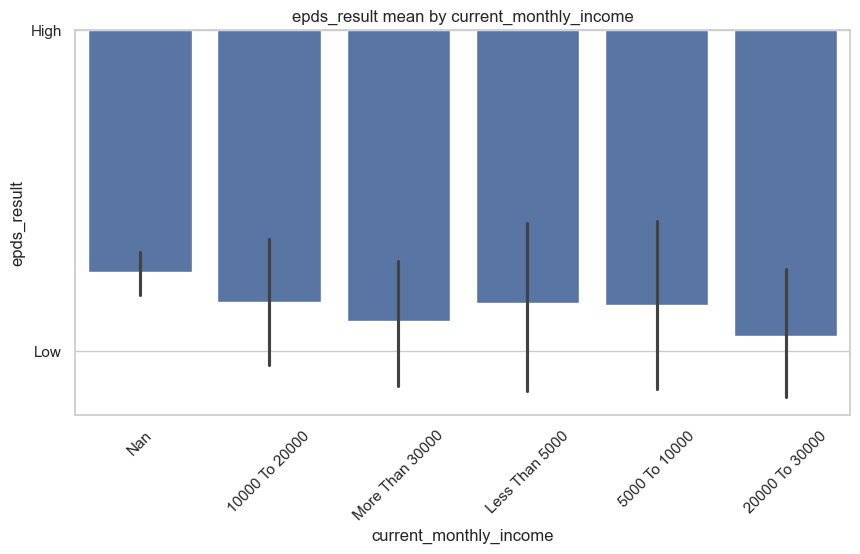

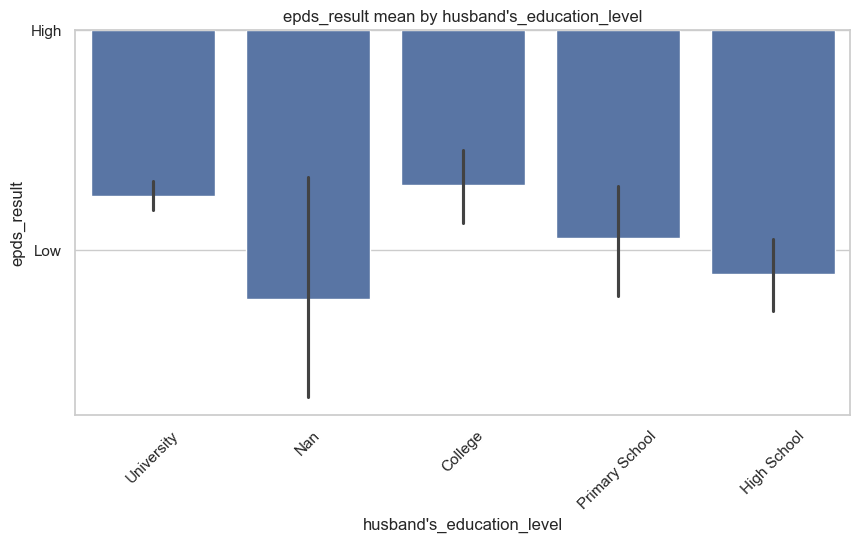

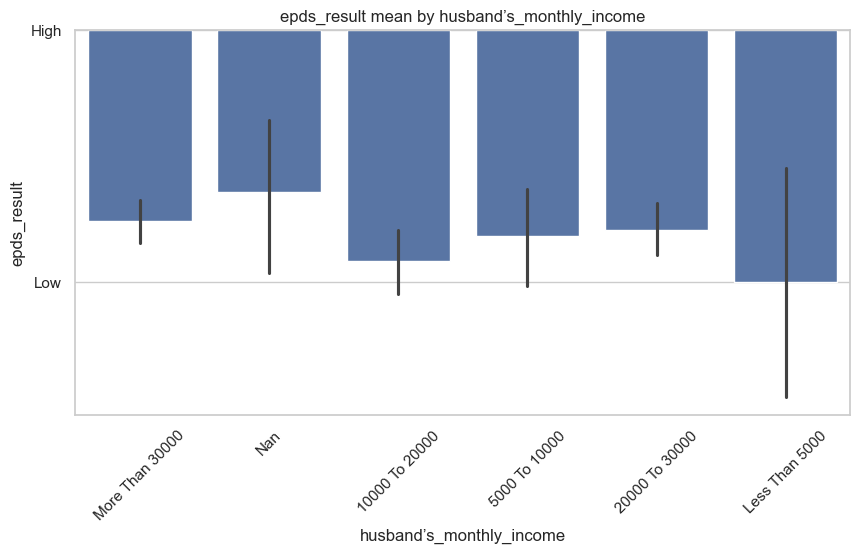

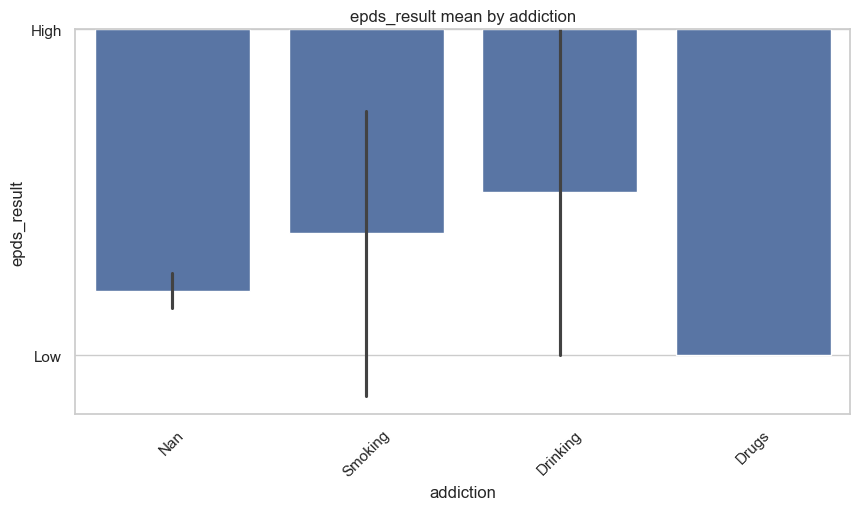

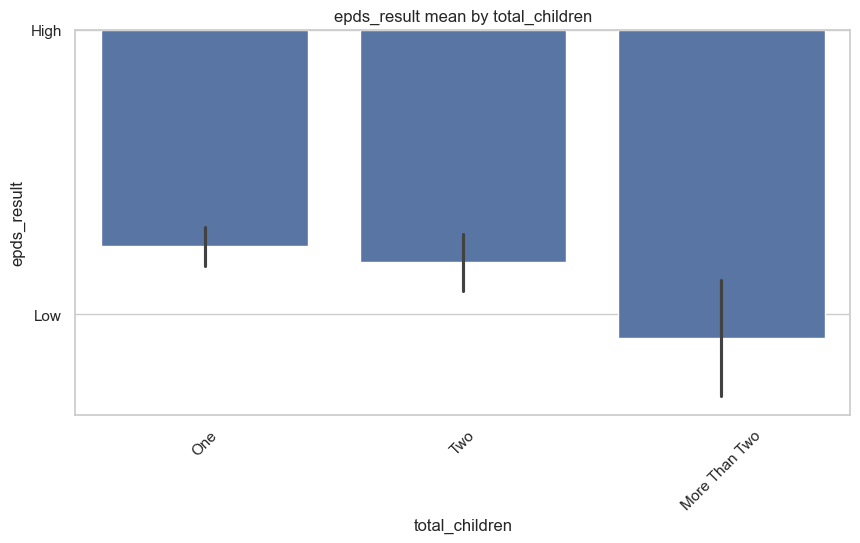

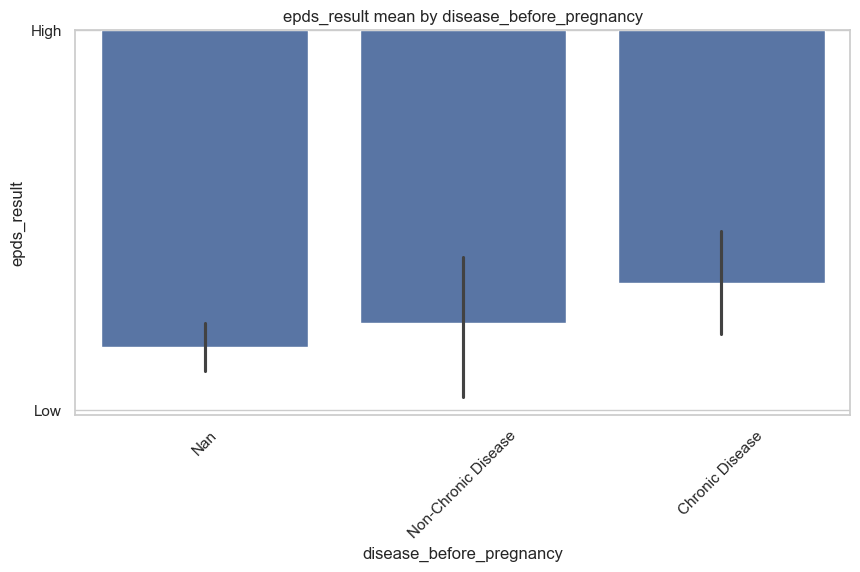

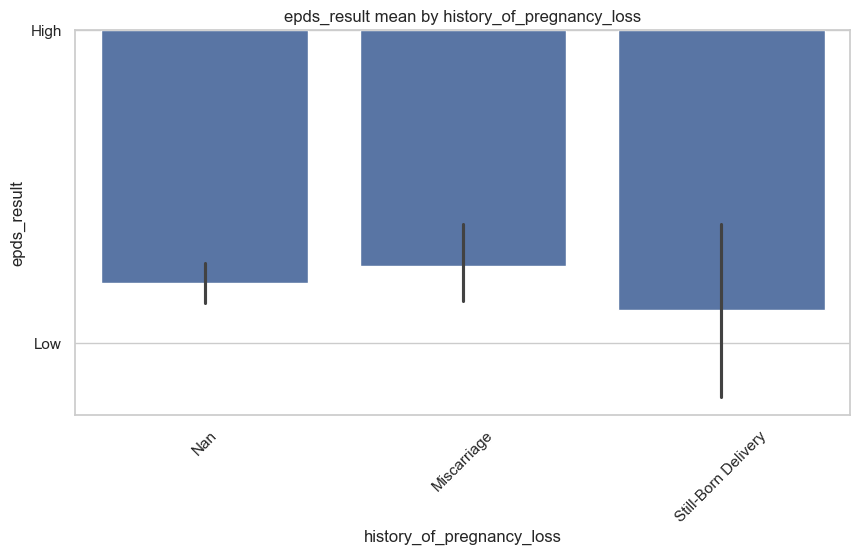

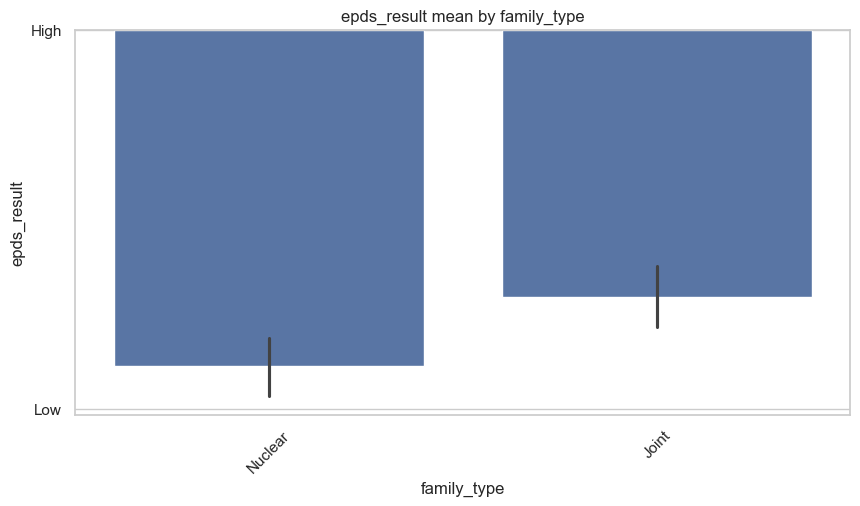

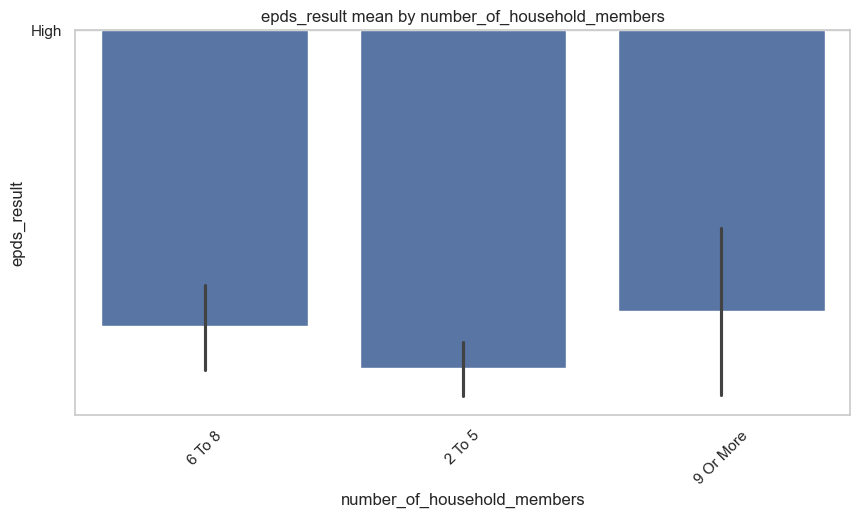

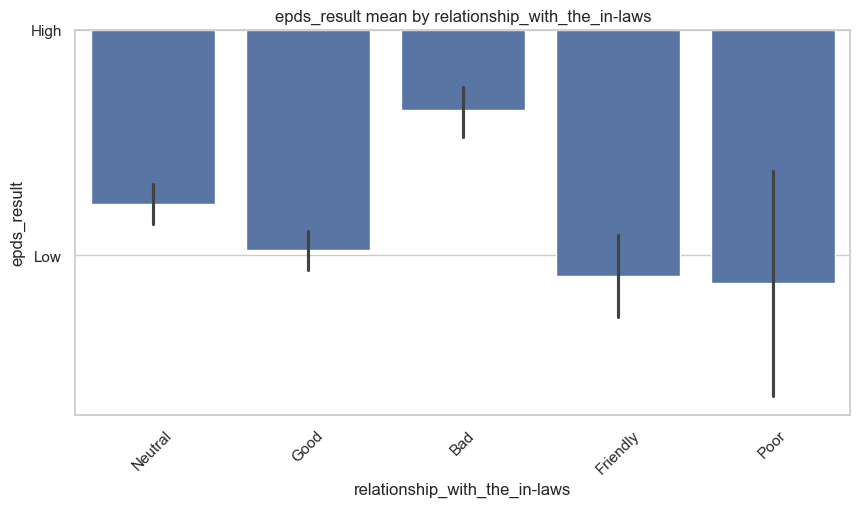

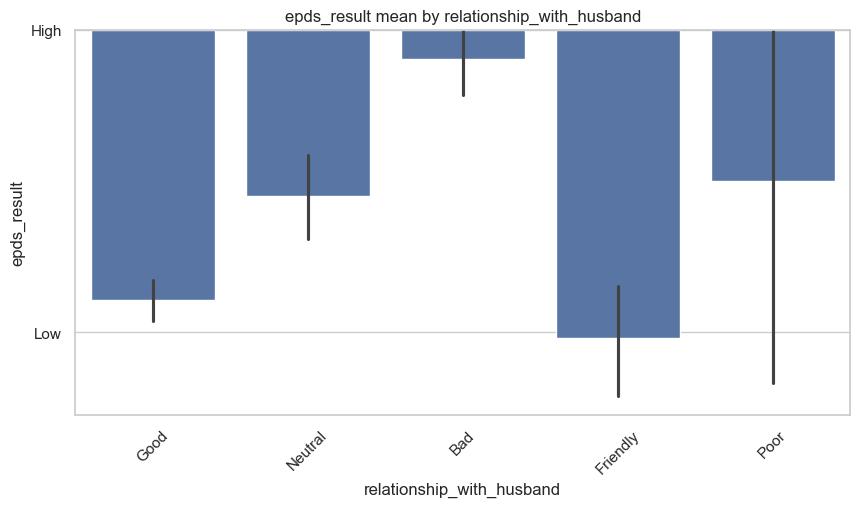

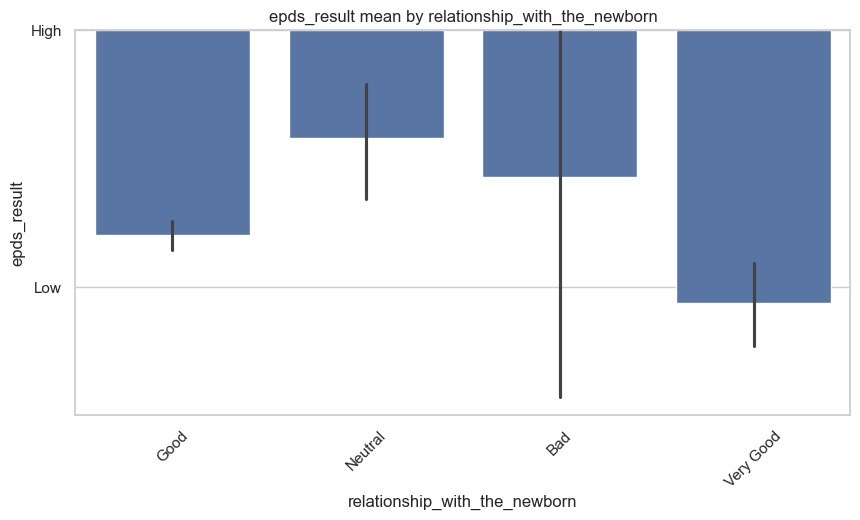

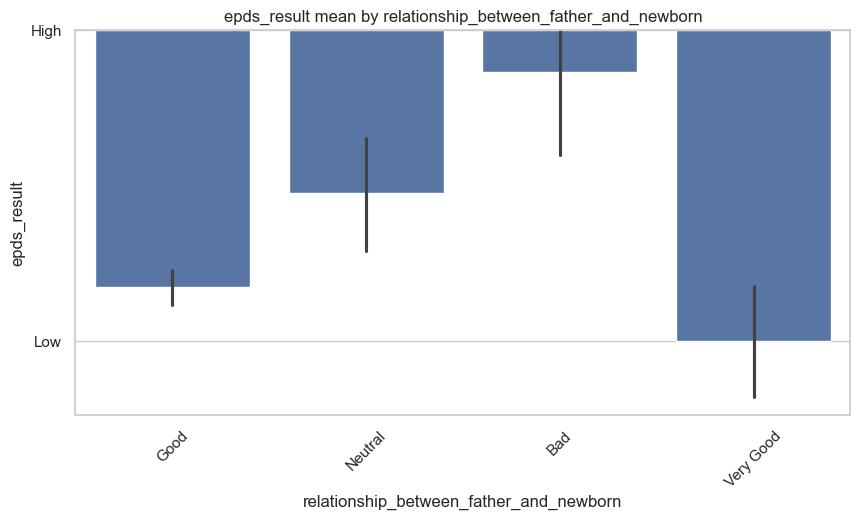

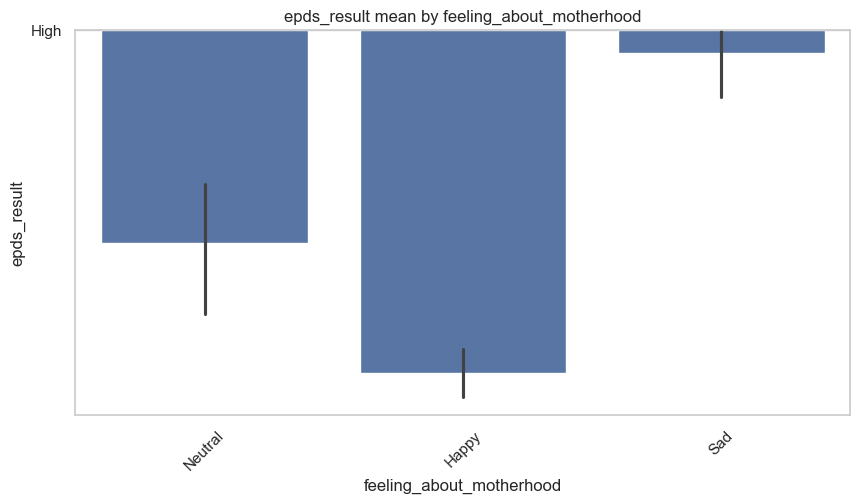

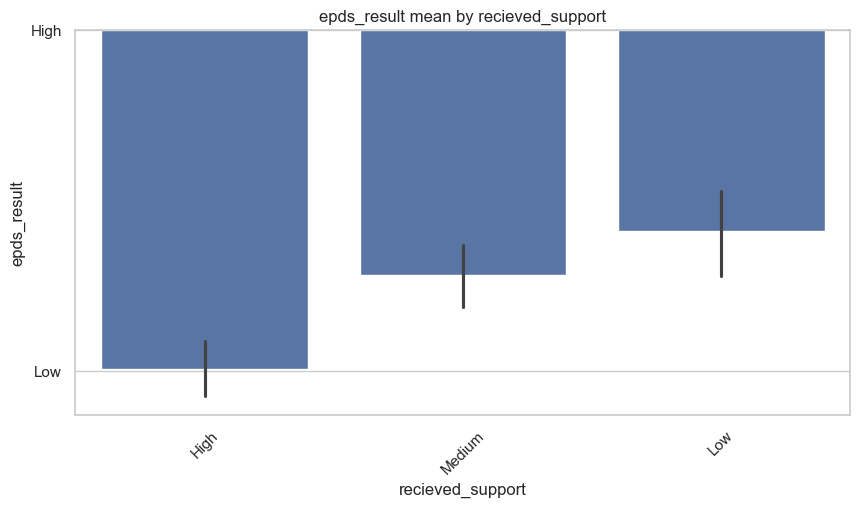

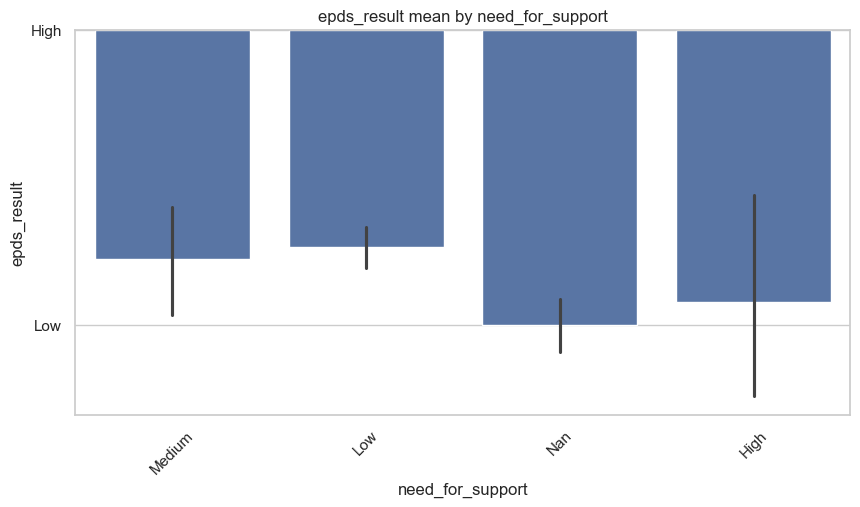

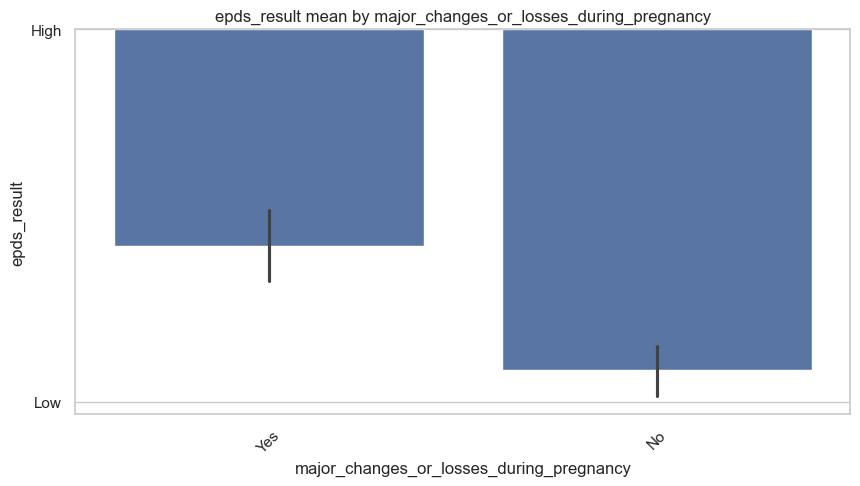

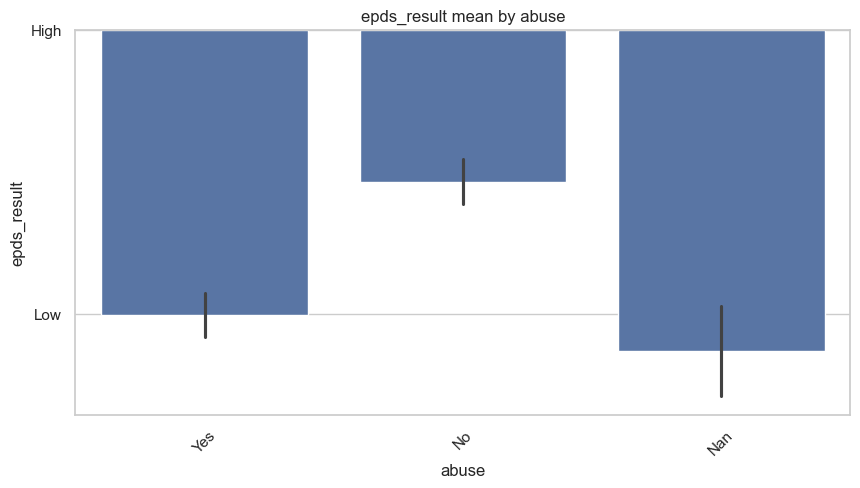

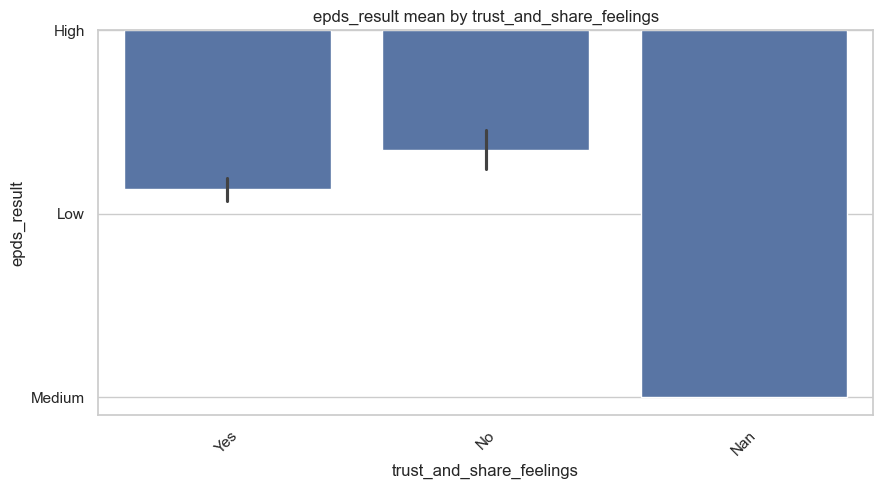

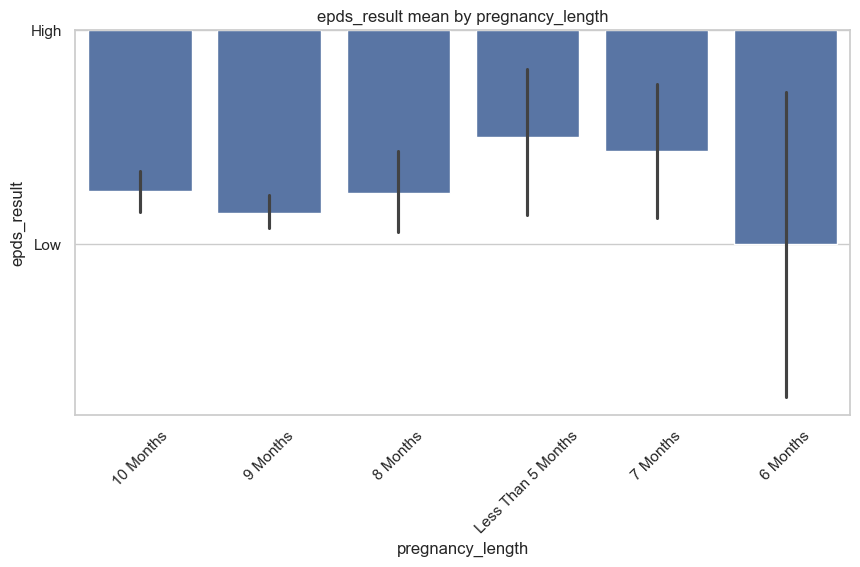

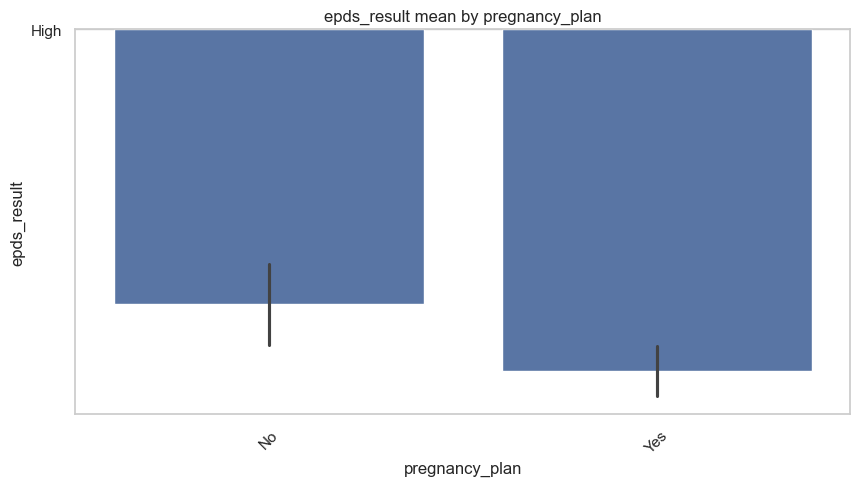

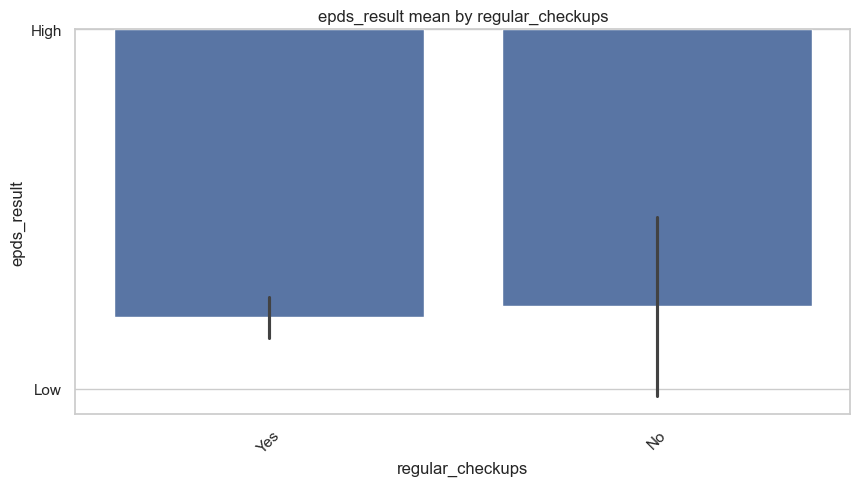

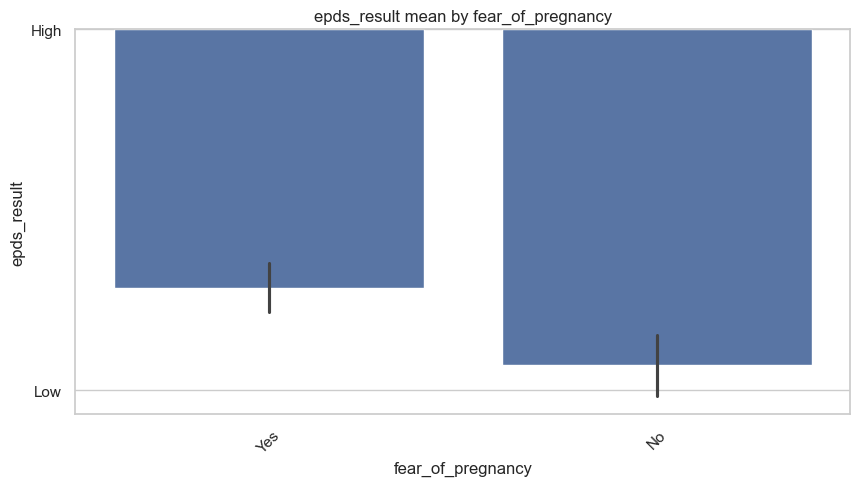

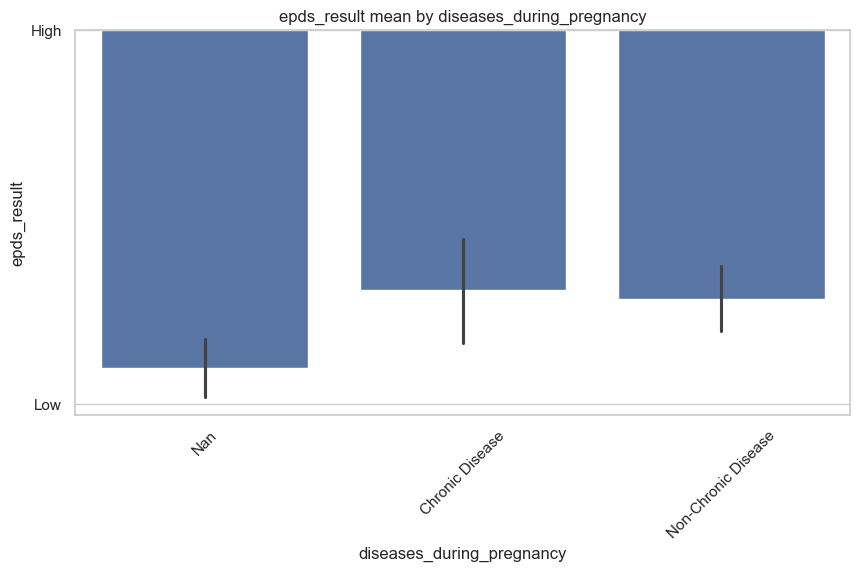

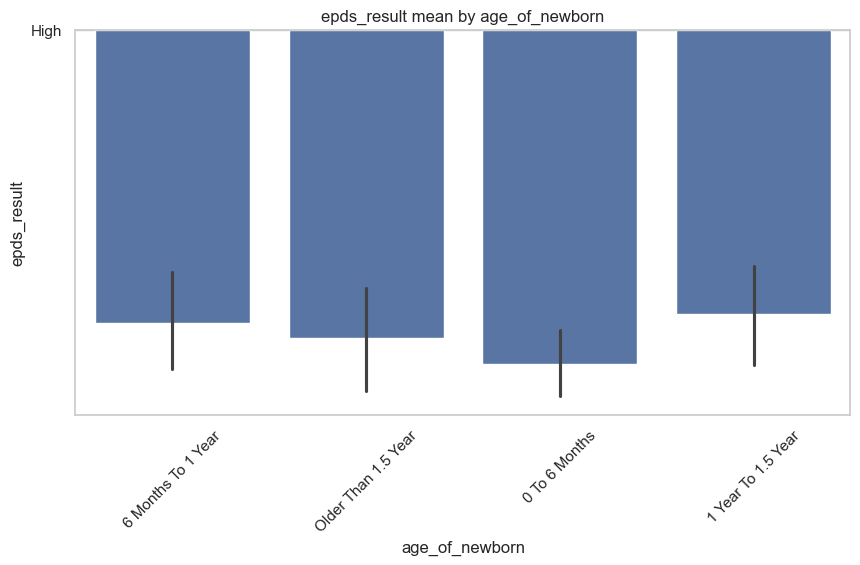

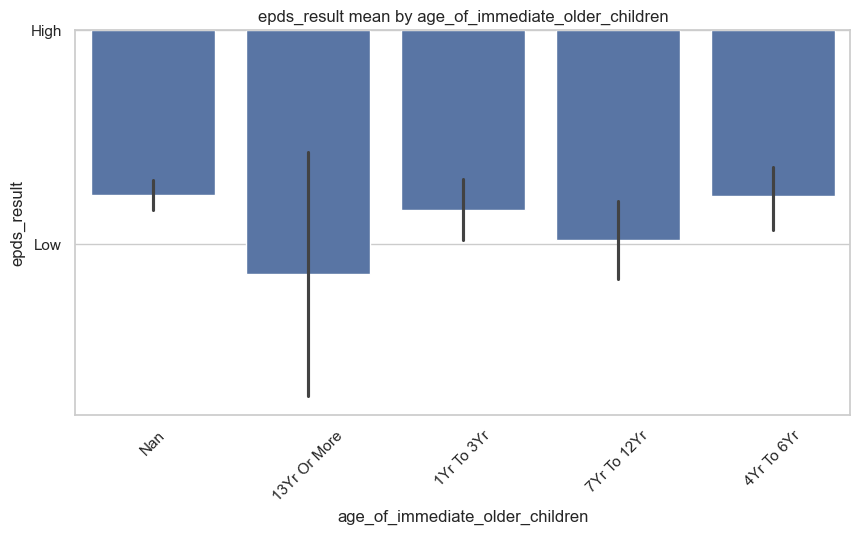

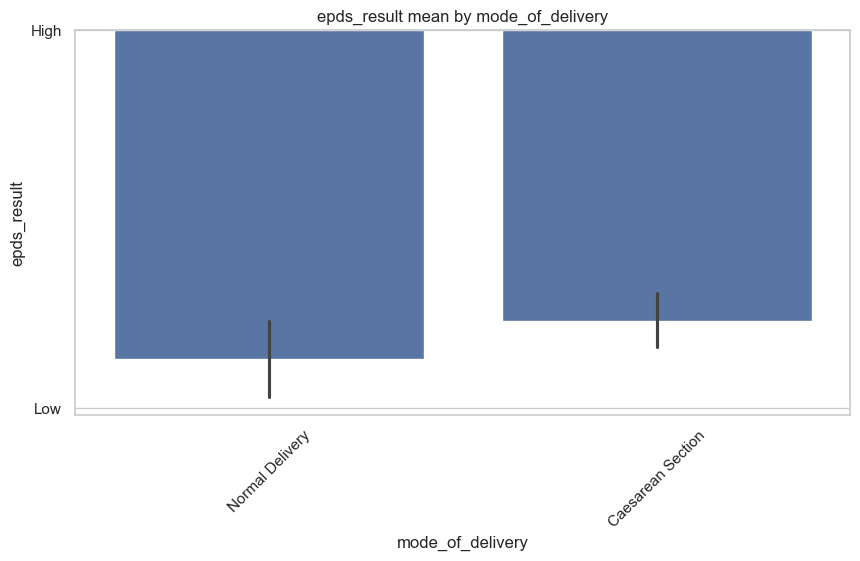

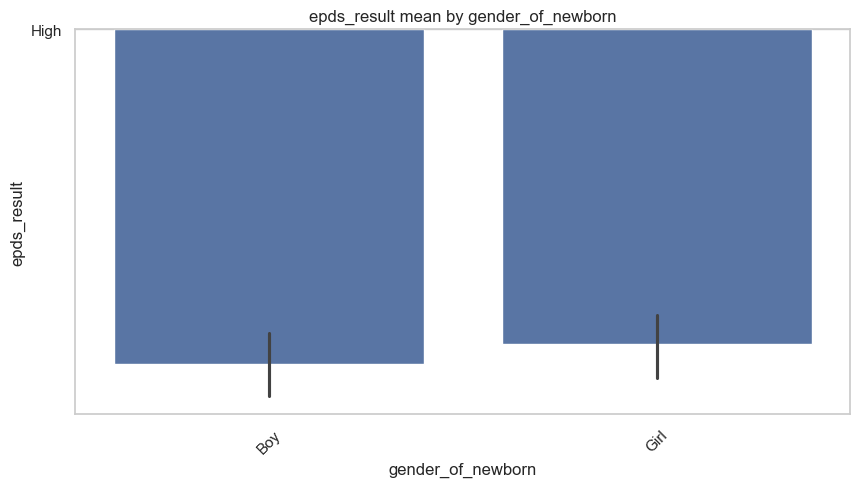

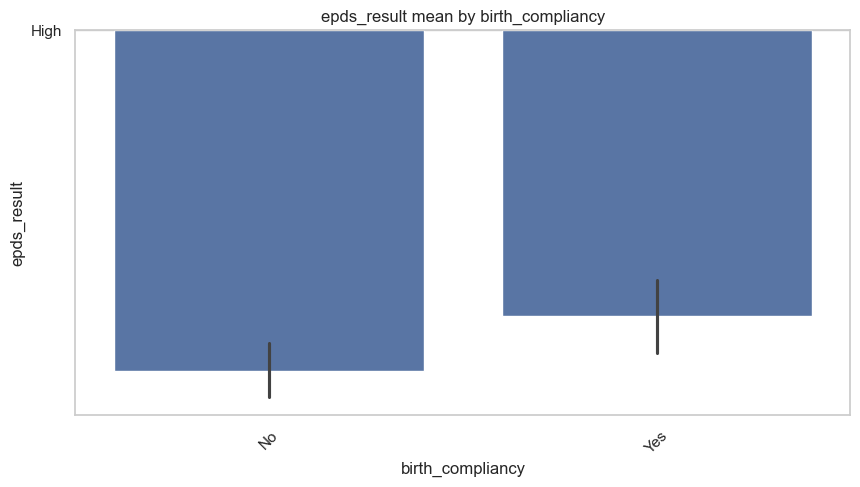

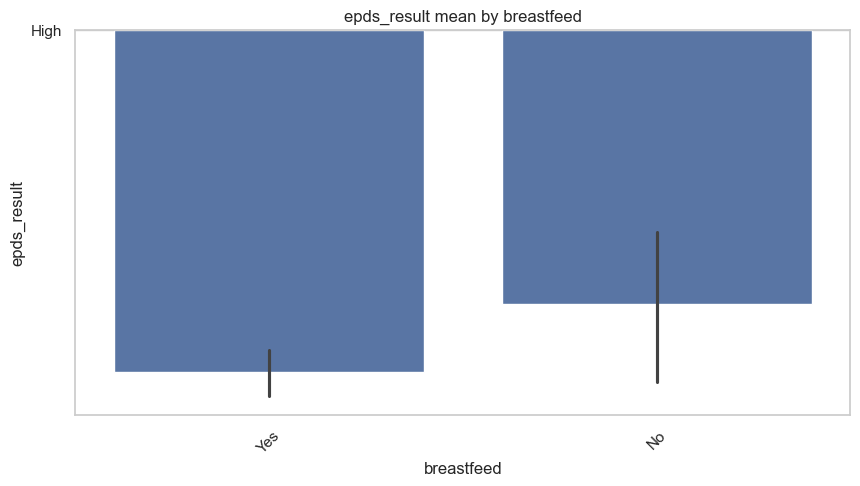

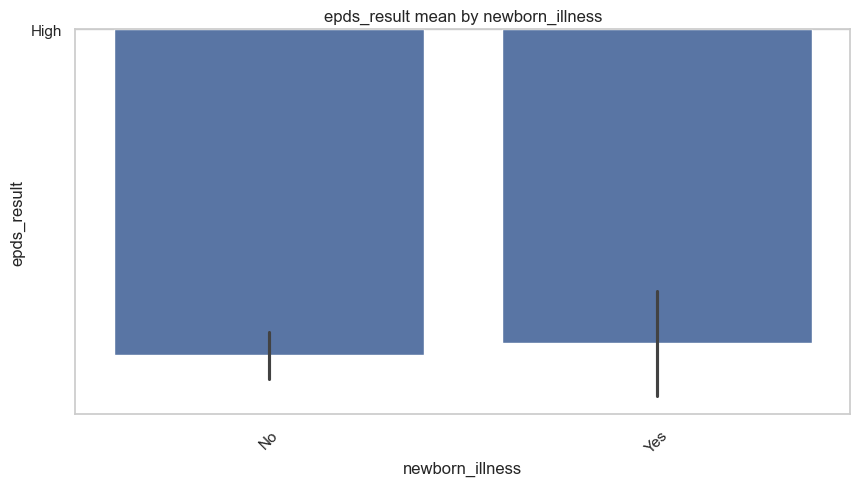

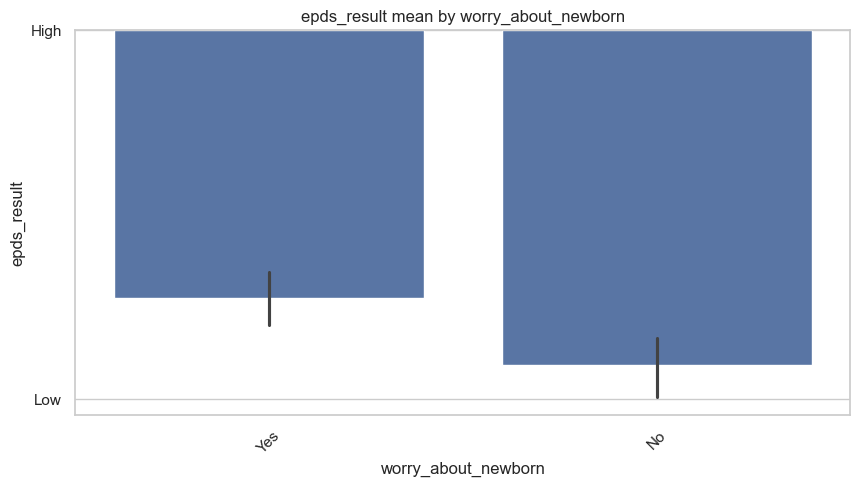

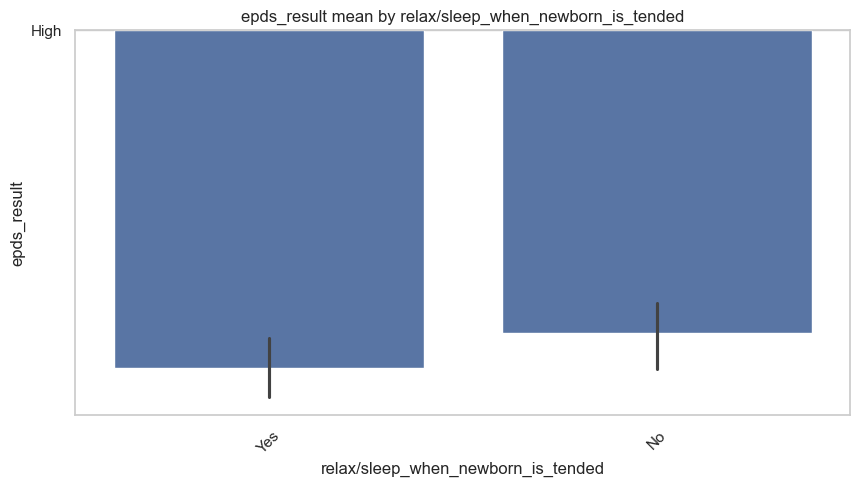

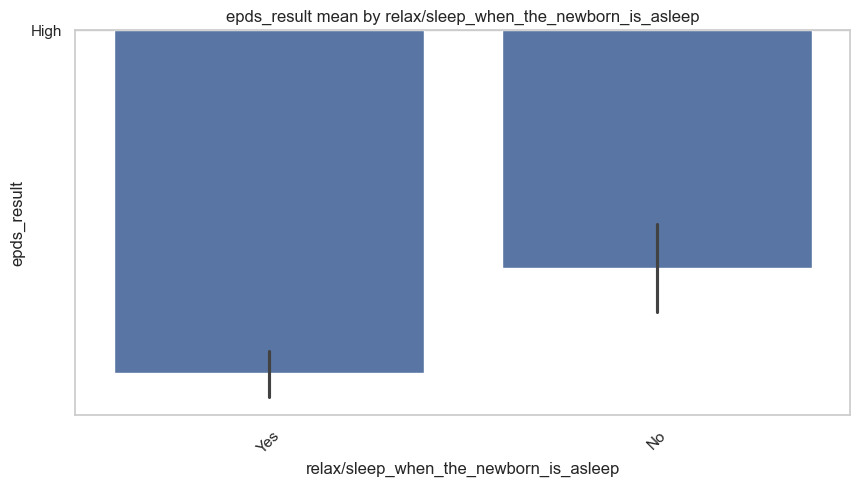

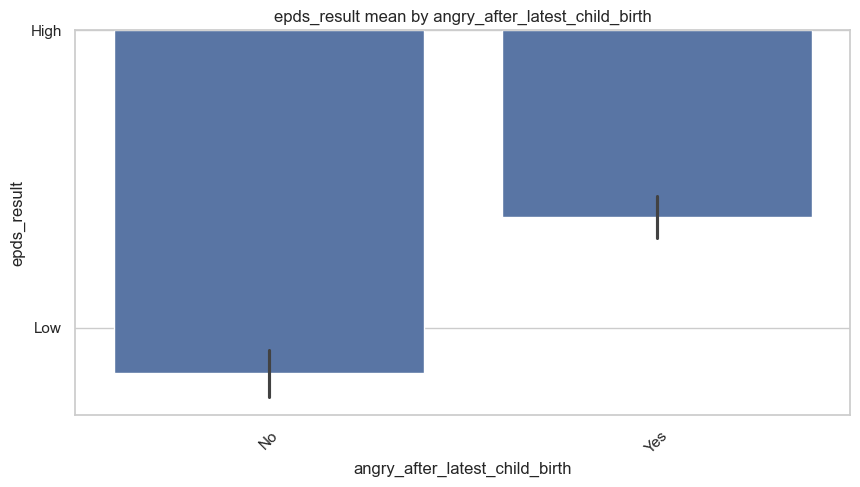

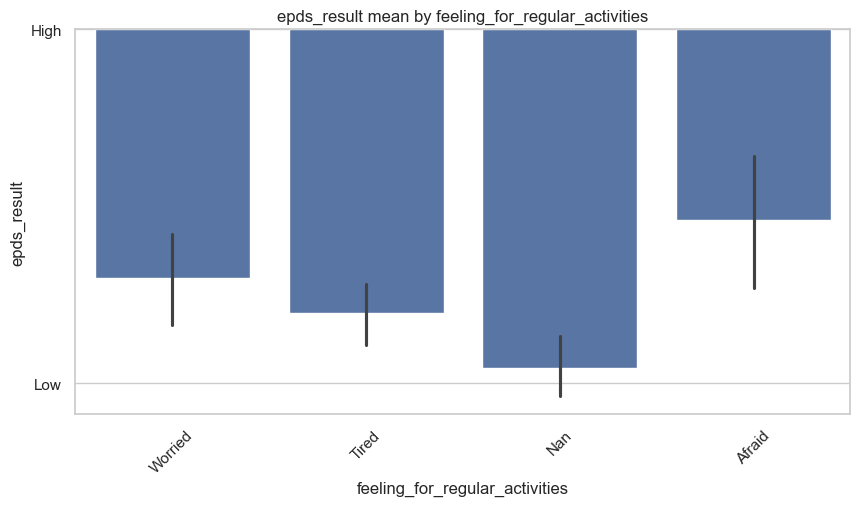

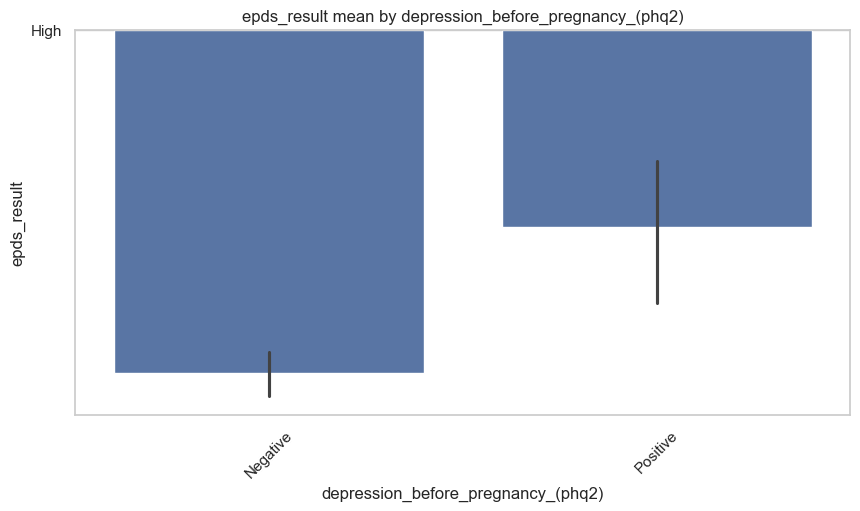

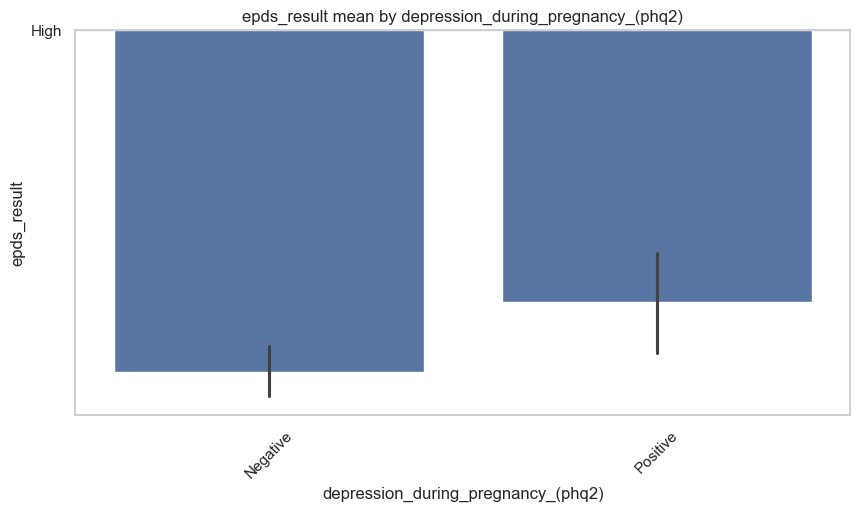

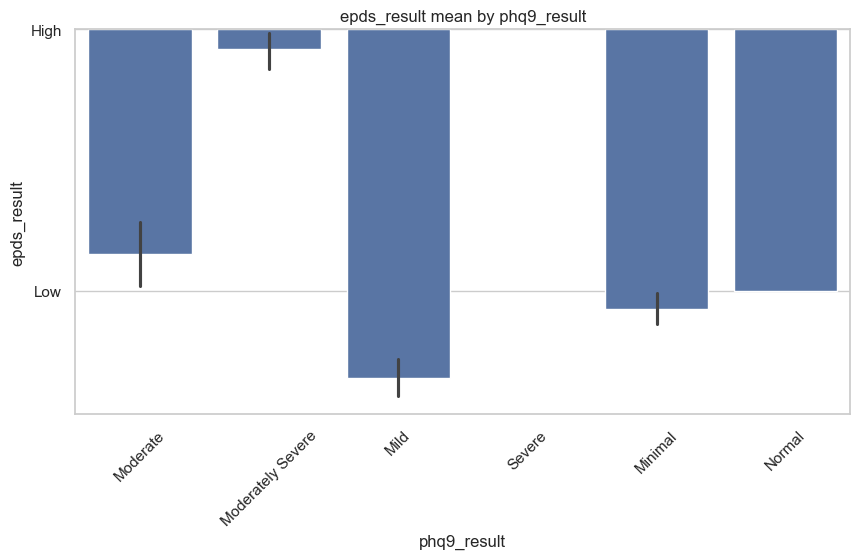

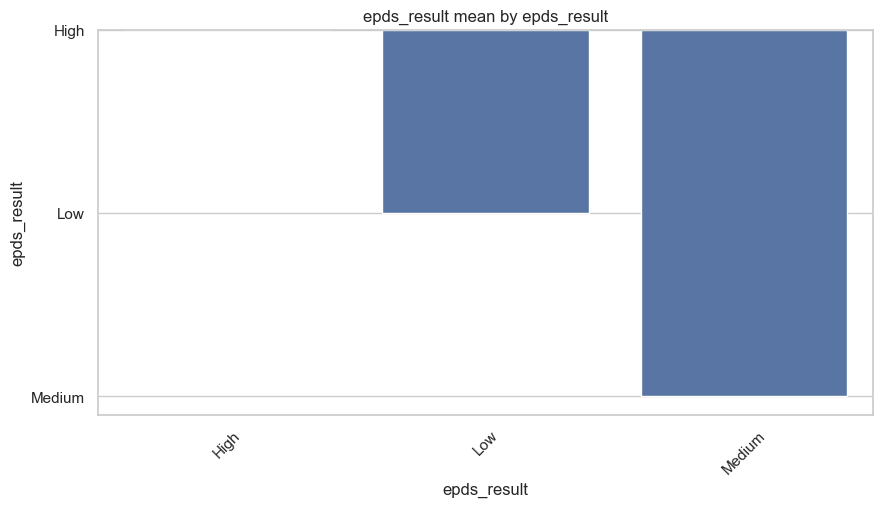

In [19]:
target_cols = [col for col in df.columns if 'result' in col or 'phq9' in col or 'epds' in col]

for target in target_cols:
    for col in num_features:
        plt.figure()
        sns.boxplot(x=df[target], y=df[col])
        plt.title(f"{col} vs {target}")
        plt.show()

    for col in cat_features:
        plt.figure()
        sns.barplot(x=col, y=target, data=df)
        plt.title(f"{target} mean by {col}")
        plt.xticks(rotation=45)
        plt.show()


Categorical-Numerical Relationship

In [20]:
# Example: average PHQ9 or result by gender (if columns exist)
if 'phq9' in df.columns and 'gender' in df.columns:
    sns.boxplot(x='gender', y='phq9', data=df)
    plt.title("PHQ9 Scores by Gender")
    plt.show()


One Hot Encoding

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# Separate target
target = 'epds_result'
y = df[target]  # keep the original target column

# Features: drop the target from df before encoding
X = df.drop(columns=[target])

# Numeric columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns

# Categorical columns
cat_features = X.select_dtypes(include=['object', 'string']).columns

# ColumnTransformer: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), cat_features)
    ]
)

# Transform only the features (X)
X_transformed = preprocessor.fit_transform(X)

# Get column names for the transformed dataframe
ohe_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
all_cols = list(num_features) + list(ohe_cols)

# Create DataFrame
df_final = pd.DataFrame(X_transformed, columns=all_cols)

print(df_final.head())
print(df_final.shape)




        age  number_of_the_latest_pregnancy  phq9_score  epds_score  \
0 -0.834672                       -0.705638    0.466953    0.075773   
1  0.733839                       -0.705638    0.813808    1.062584   
2  0.733839                       -0.705638    0.466953    0.498692   
3  0.957912                       -0.705638   -1.093893   -1.052011   
4 -0.162453                       -0.705638   -0.053329   -0.770065   

   residence_City  residence_Village  education_level_College  \
0             1.0                0.0                      0.0   
1             1.0                0.0                      0.0   
2             1.0                0.0                      0.0   
3             1.0                0.0                      0.0   
4             1.0                0.0                      0.0   

   education_level_High School  education_level_Nan  \
0                          0.0                  0.0   
1                          0.0                  0.0   
2                

In [23]:
# df_final: numeric + OHE features
# y: original target column

df_final[target] = y.values  # add target back

In [24]:
print(df_final.head())
print(df_final.columns)


        age  number_of_the_latest_pregnancy  phq9_score  epds_score  \
0 -0.834672                       -0.705638    0.466953    0.075773   
1  0.733839                       -0.705638    0.813808    1.062584   
2  0.733839                       -0.705638    0.466953    0.498692   
3  0.957912                       -0.705638   -1.093893   -1.052011   
4 -0.162453                       -0.705638   -0.053329   -0.770065   

   residence_City  residence_Village  education_level_College  \
0             1.0                0.0                      0.0   
1             1.0                0.0                      0.0   
2             1.0                0.0                      0.0   
3             1.0                0.0                      0.0   
4             1.0                0.0                      0.0   

   education_level_High School  education_level_Nan  \
0                          0.0                  0.0   
1                          0.0                  0.0   
2                

In [25]:
df.drop(columns=[target])

age residence education_level marital_status  \
0     24      City      University        Married   
1     31      City      University       Divorced   
2     31      City      University        Married   
3     32      City      University        Married   
4     27      City      University        Married   
..   ...       ...             ...            ...   
795   22   Village         College        Married   
796   34      City      University        Married   
797   25      City     High School        Married   
798   21      City  Primary School        Married   
799   33      City      University        Married   

    occupation_before_latest_pregnancy monthly_income_before_latest_pregnancy  \
0                              Student                                    Nan   
1                               Doctor                         10000 To 20000   
2                              Service                         10000 To 20000   
3                               Doctor                        More Than 30000   
4                            Housewife                                    Nan   
..                                 ...                                    ...   
795                          Housewife                                    Nan   
796                          Housewife                                    Nan   
797                          Housewife                                    Nan   
798                          Housewife                                    Nan   
799                            Teacher                         10000 To 20000   

    occupation_after_your_latest_childbirth current_monthly_income  \
0                                   Student                    Nan   
1                                    Doctor         10000 To 20000   
2                                   Service         10000 To 20000   
3                                    Doctor        More Than 30000   
4                                 Housewife                    Nan   
..                                      ...                    ...   
795                               Housewife                    Nan   
796                               Housewife                    Nan   
797                               Housewife                    Nan   
798                               Housewife                    Nan   
799                               Housewife                    Nan   

    husband's_education_level husband’s_monthly_income  ...  \
0                  University          More Than 30000  ...   
1                         Nan                      Nan  ...   
2                  University          More Than 30000  ...   
3                  University          More Than 30000  ...   
4                  University          More Than 30000  ...   
..                        ...                      ...  ...   
795                University          More Than 30000  ...   
796                University          More Than 30000  ...   
797            Primary School          More Than 30000  ...   
798                       Nan           20000 To 30000  ...   
799                University          More Than 30000  ...   

    worry_about_newborn relax/sleep_when_newborn_is_tended  \
0                   Yes                                Yes   
1                   Yes                                Yes   
2                    No                                Yes   
3                    No                                Yes   
4                    No                                Yes   
..                  ...                                ...   
795                 Yes                                Yes   
796                  No                                Yes   
797                  No                                Yes   
798                  No                                Yes   
799                 Yes                                Yes   

    relax/sleep_when_the_newborn_is_asleep angry_aft

In [26]:
# Show first 5 rows
df_final.head()


age  number_of_the_latest_pregnancy  phq9_score  epds_score  \
0 -0.834672                       -0.705638    0.466953    0.075773   
1  0.733839                       -0.705638    0.813808    1.062584   
2  0.733839                       -0.705638    0.466953    0.498692   
3  0.957912                       -0.705638   -1.093893   -1.052011   
4 -0.162453                       -0.705638   -0.053329   -0.770065   

   residence_City  residence_Village  education_level_College  \
0             1.0                0.0                      0.0   
1             1.0                0.0                      0.0   
2             1.0                0.0                      0.0   
3             1.0                0.0                      0.0   
4             1.0                0.0                      0.0   

   education_level_High School  education_level_Nan  \
0                          0.0                  0.0   
1                          0.0                  0.0   
2                          0.0                  0.0   
3                          0.0                  0.0   
4                          0.0                  0.0   

   education_level_Primary School  ...  \
0                             0.0  ...   
1                             0.0  ...   
2                             0.0  ...   
3                             0.0  ...   
4                             0.0  ...   

   depression_before_pregnancy_(phq2)_Positive  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   depression_during_pregnancy_(phq2)_Negative  \
0                                          1.0   
1                                          1.0   
2                                          1.0   
3                                          0.0   
4                                          1.0   

   depression_during_pregnancy_(phq2)_Positive  phq9_result_Mild  \
0                                          0.0               0.0   
1                                          0.0               0.0   
2                                          0.0               0.0   
3                                          1.0               1.0   
4                                          0.0               0.0   

   phq9_result_Minimal  phq9_result_Moderate  phq9_result_Moderately Severe  \
0                  0.0                   1.0                            0.0   
1                  0.0                   0.0                            1.0   
2                  0.0                   1.0                            0.0   
3                  0.0                   0.0                            0.0   
4                  0.0                   1.0                            0.0   

   phq9_result_Normal  phq9_result_Severe  epds_result  
0                 0.0                 0.0         High  
1                 0.0                 0.0         High  
2                 0.0                 0.0         High  
3                 0.0                 0.0          Low  
4                 0.0                 0.0          Low  

[5 rows x 161 columns]

In [27]:
df_final = df_final.drop(columns=[
   
    'epds_score',
    
], errors='ignore')

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Encode and replace the original column
df_final['epds_result'] = le.fit_transform(df_final['epds_result'])

# Check mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

# Now df['epds_result'] contains numeric labels
print(df['epds_result'].head())



Label mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}
0    High
1    High
2    High
3     Low
4     Low
Name: epds_result, dtype: object


In [29]:
# Show first 5 rows
df_final.head()


age  number_of_the_latest_pregnancy  phq9_score  residence_City  \
0 -0.834672                       -0.705638    0.466953             1.0   
1  0.733839                       -0.705638    0.813808             1.0   
2  0.733839                       -0.705638    0.466953             1.0   
3  0.957912                       -0.705638   -1.093893             1.0   
4 -0.162453                       -0.705638   -0.053329             1.0   

   residence_Village  education_level_College  education_level_High School  \
0                0.0                      0.0                          0.0   
1                0.0                      0.0                          0.0   
2                0.0                      0.0                          0.0   
3                0.0                      0.0                          0.0   
4                0.0                      0.0                          0.0   

   education_level_Nan  education_level_Primary School  \
0                  0.0                             0.0   
1                  0.0                             0.0   
2                  0.0                             0.0   
3                  0.0                             0.0   
4                  0.0                             0.0   

   education_level_University  ...  \
0                         1.0  ...   
1                         1.0  ...   
2                         1.0  ...   
3                         1.0  ...   
4                         1.0  ...   

   depression_before_pregnancy_(phq2)_Positive  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   depression_during_pregnancy_(phq2)_Negative  \
0                                          1.0   
1                                          1.0   
2                                          1.0   
3                                          0.0   
4                                          1.0   

   depression_during_pregnancy_(phq2)_Positive  phq9_result_Mild  \
0                                          0.0               0.0   
1                                          0.0               0.0   
2                                          0.0               0.0   
3                                          1.0               1.0   
4                                          0.0               0.0   

   phq9_result_Minimal  phq9_result_Moderate  phq9_result_Moderately Severe  \
0                  0.0                   1.0                            0.0   
1                  0.0                   0.0                            1.0   
2                  0.0                   1.0                            0.0   
3                  0.0                   0.0                            0.0   
4                  0.0                   1.0                            0.0   

   phq9_result_Normal  phq9_result_Severe  epds_result  
0                 0.0                 0.0            0  
1                 0.0                 0.0            0  
2                 0.0                 0.0            0  
3                 0.0                 0.0            1  
4                 0.0                 0.0            1  

[5 rows x 160 columns]

In [30]:
# Compute correlation matrix (Pearson)
corr_matrix = df_final.corr()


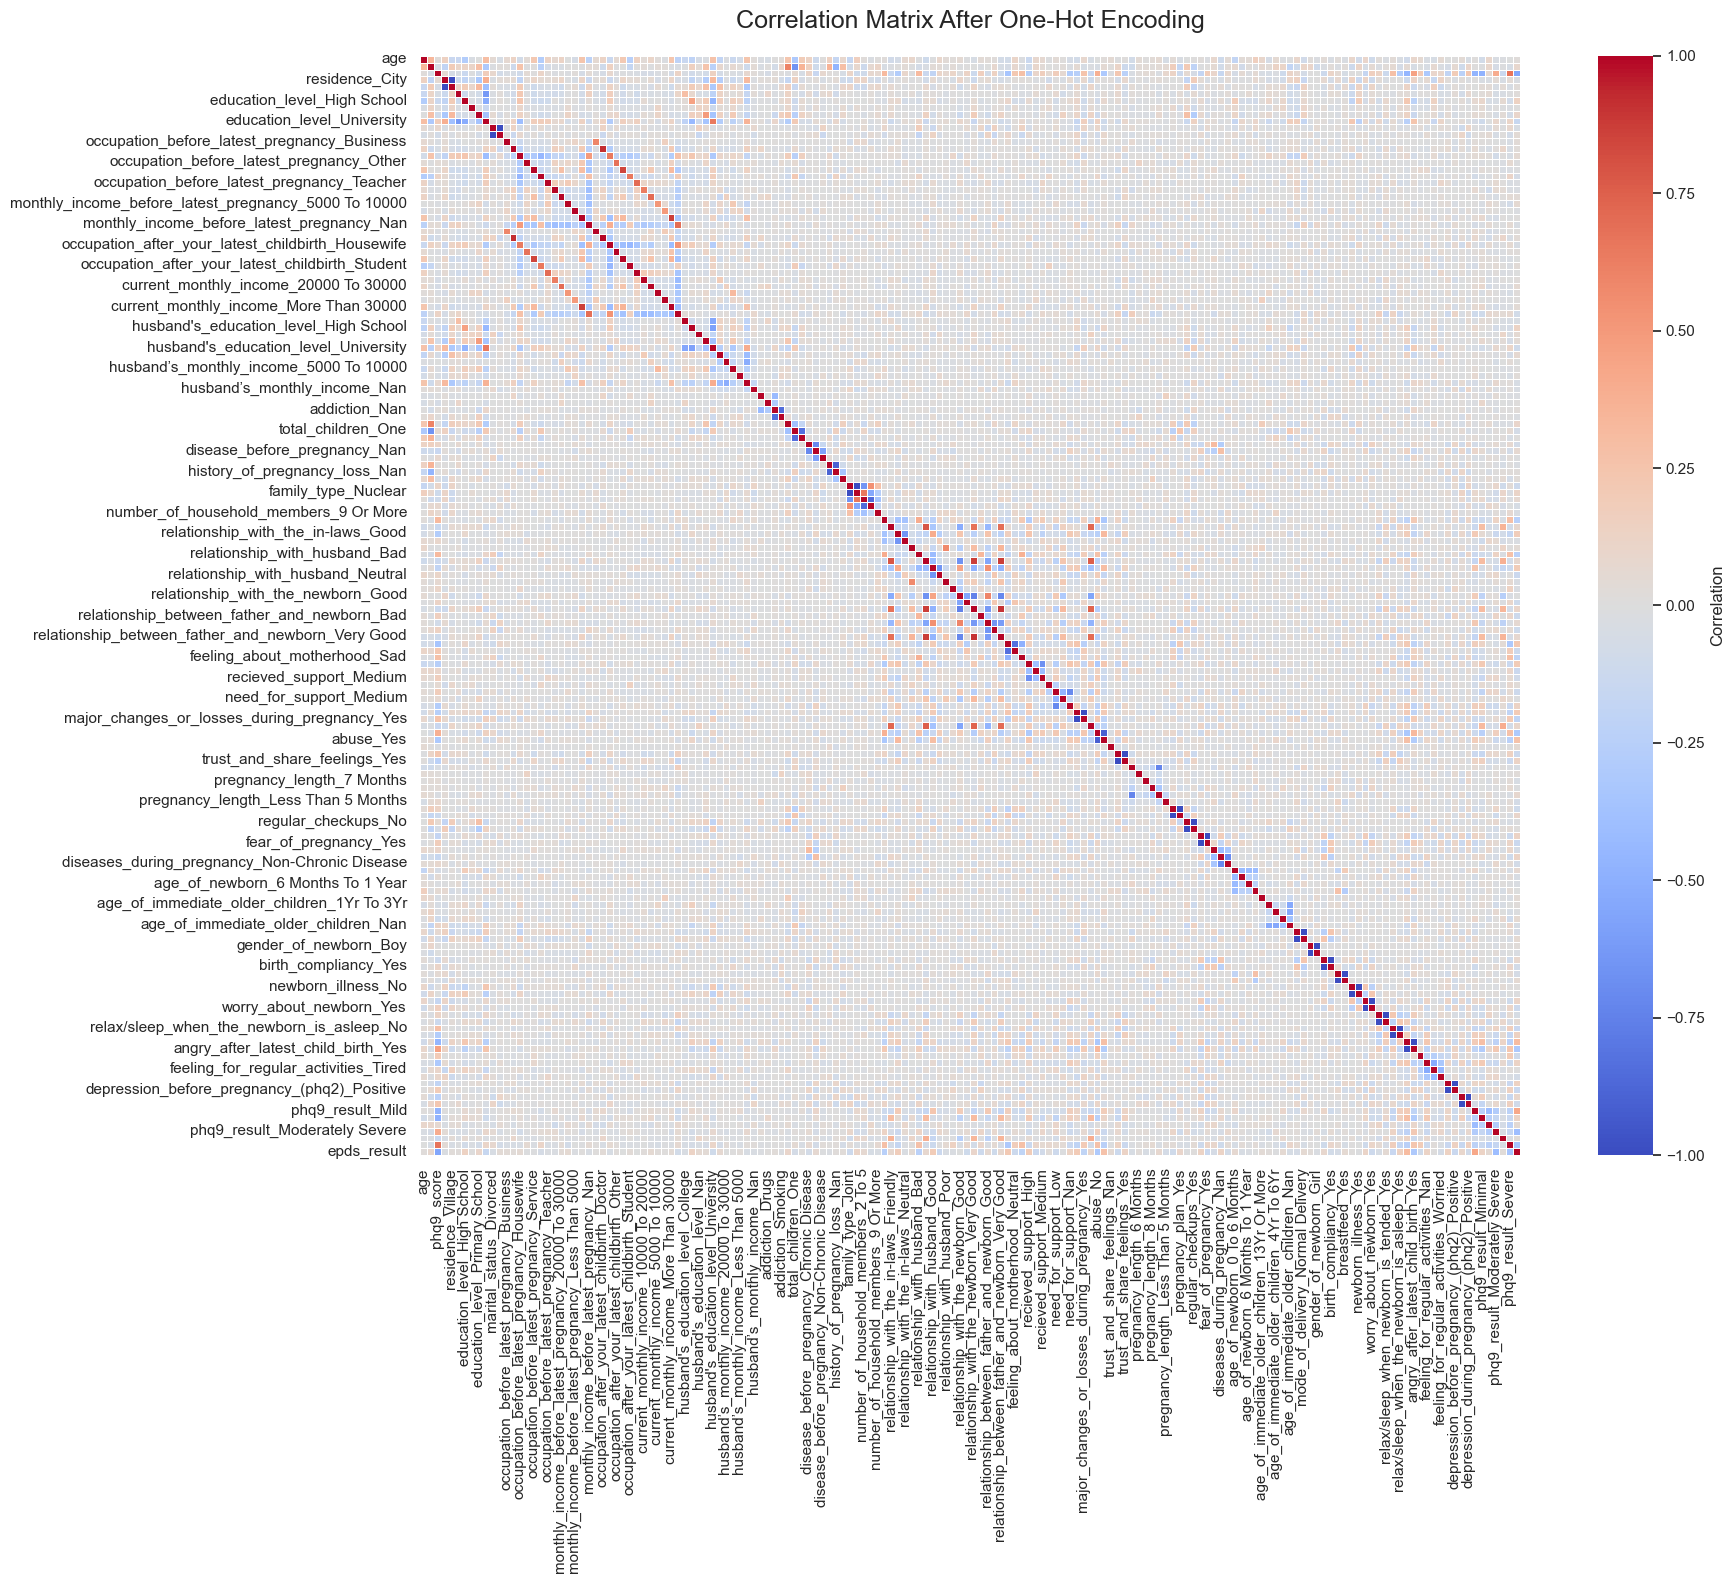

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 16))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',  # you can use 'Spectral', 'viridis', etc.
    center=0,
    square=True,
    cbar_kws={'label': 'Correlation'},
    linewidths=0.5
)
plt.title("Correlation Matrix After One-Hot Encoding", fontsize=18, pad=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


remove outlier

In [32]:
from scipy.stats import zscore

# List of numeric features where extreme values matter
important_numeric = ['age', 'number_of_the_latest_pregnancy']  # adjust as needed

# Compute Z-scores for these columns only
z_scores = df_final[important_numeric].apply(zscore)

# Set threshold (commonly 3)
threshold = 3

# Identify rows with outliers in any of the selected features
outliers = (z_scores.abs() > threshold).any(axis=1)

print(f"Number of rows to remove due to outliers: {outliers.sum()}")

# Remove these rows
df_clean = df_final[~outliers].reset_index(drop=True)

print("Shape before removing outliers:", df_final.shape)
print("Shape after removing outliers:", df_clean.shape)



Number of rows to remove due to outliers: 14
Shape before removing outliers: (800, 160)
Shape after removing outliers: (786, 160)


In [33]:
df_clean[important_numeric].describe()


age  number_of_the_latest_pregnancy
count  786.000000                      786.000000
mean    -0.025329                       -0.068496
std      0.977223                        0.845085
min     -2.179109                       -0.705638
25%     -0.610599                       -0.705638
50%     -0.162453                       -0.705638
75%      0.733839                        0.412205
max      2.974568                        2.647891

In [34]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1️⃣ Separate features and target
target = 'epds_result'
X = df.drop(columns=[target])
y = df[target]

# 2️⃣ Identify numeric and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'string']).columns.tolist()

# 3️⃣ ColumnTransformer: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), cat_features)
    ]
)

# 4️⃣ Apply preprocessing
X_encoded = preprocessor.fit_transform(X)
ohe_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
all_cols = list(num_features) + list(ohe_cols)
X_encoded = pd.DataFrame(X_encoded, columns=all_cols)

# 5️⃣ Apply SMOTE on fully numeric data
sm = SMOTE(random_state=42)
X_balanced, y_balanced = sm.fit_resample(X_encoded, y)

print("Before balancing:\n", y.value_counts())
print("\nAfter balancing:\n", y_balanced.value_counts())

# Optional: create a balanced dataframe
df_balanced = pd.concat([X_balanced, y_balanced.reset_index(drop=True)], axis=1)
print("\nBalanced DataFrame shape:", df_balanced.shape)





Before balancing:
 epds_result
High      350
Low       260
Medium    190
Name: count, dtype: int64

After balancing:
 epds_result
High      350
Low       350
Medium    350
Name: count, dtype: int64

Balanced DataFrame shape: (1050, 161)


In [35]:
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE

# 1️⃣ Remove outliers
important_numeric = ['age', 'number_of_the_latest_pregnancy']
z_scores = df_final[important_numeric].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)

df_clean = df_final[~outliers].reset_index(drop=True)
y_clean = y[~outliers].reset_index(drop=True)

print("After removing outliers:", df_clean.shape)

# 2️⃣ Apply SMOTE on cleaned data
sm = SMOTE(random_state=42)
X_balanced, y_balanced = sm.fit_resample(df_clean, y_clean)

print("Balanced shape:", X_balanced.shape)
print("Class counts after SMOTE:\n", y_balanced.value_counts())


After removing outliers: (786, 160)
Balanced shape: (1032, 160)
Class counts after SMOTE:
 epds_result
High      344
Low       344
Medium    344
Name: count, dtype: int64


SMOTE

In [36]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
                        
# 1️⃣ Drop unwanted columns
df_clean = df.drop(columns=['epds_score'], errors='ignore')  # drop epds_score if exists

# 2️⃣ Separate target
target = 'epds_result'
X = df_clean.drop(columns=[target])
y = df_clean[target]

# 3️⃣ Identify numeric & categorical features (exclude target)
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'string']).columns.tolist()

# 4️⃣ ColumnTransformer: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), cat_features)
    ]
)

# 5️⃣ Fit & transform
X_encoded = preprocessor.fit_transform(X)
ohe_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
all_cols = list(num_features) + list(ohe_cols)
X_encoded = pd.DataFrame(X_encoded, columns=all_cols)

# 6️⃣ Remove outliers from selected numeric features
important_numeric = ['age', 'number_of_the_latest_pregnancy']  # adjust as needed
z_scores = X_encoded[important_numeric].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)

X_clean = X_encoded[~outliers].reset_index(drop=True)
y_clean = y[~outliers].reset_index(drop=True)
print(f"Shape after outlier removal: {X_clean.shape}")

# 7️⃣ Apply SMOTE to balance classes
sm = SMOTE(random_state=42)
X_balanced, y_balanced = sm.fit_resample(X_clean, y_clean)

# Convert to DataFrame/Series for convenience
X_balanced = pd.DataFrame(X_balanced, columns=X_clean.columns)
y_balanced = pd.Series(y_balanced, name=target)

print(f"Shape after SMOTE: {X_balanced.shape}")
print("Balanced class counts:\n", y_balanced.value_counts())

# 8️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.25, random_state=42, stratify=y_balanced
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")



Shape after outlier removal: (786, 159)
Shape after SMOTE: (1032, 159)
Balanced class counts:
 epds_result
High      344
Low       344
Medium    344
Name: count, dtype: int64
Train shape: (774, 159), Test shape: (258, 159)



=== Logistic Regression ===
Accuracy: 0.7829
Classification Report:
              precision    recall  f1-score   support

        High       0.86      0.88      0.87        86
         Low       0.77      0.83      0.80        86
      Medium       0.71      0.64      0.67        86

    accuracy                           0.78       258
   macro avg       0.78      0.78      0.78       258
weighted avg       0.78      0.78      0.78       258



c:\Users\Ismum\miniconda3\envs\tabular_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


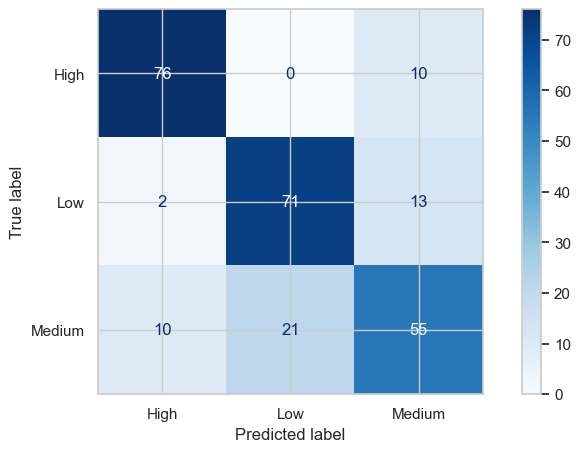


=== Random Forest ===
Accuracy: 0.8721
Classification Report:
              precision    recall  f1-score   support

        High       0.89      0.92      0.90        86
         Low       0.87      0.93      0.90        86
      Medium       0.86      0.77      0.81        86

    accuracy                           0.87       258
   macro avg       0.87      0.87      0.87       258
weighted avg       0.87      0.87      0.87       258



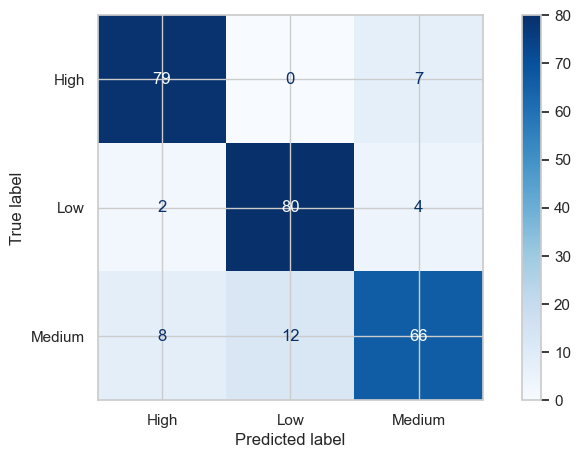


=== XGBoost ===
Accuracy: 0.8643
Classification Report:
              precision    recall  f1-score   support

        High       0.85      0.93      0.89        86
         Low       0.88      0.90      0.89        86
      Medium       0.87      0.77      0.81        86

    accuracy                           0.86       258
   macro avg       0.86      0.86      0.86       258
weighted avg       0.86      0.86      0.86       258



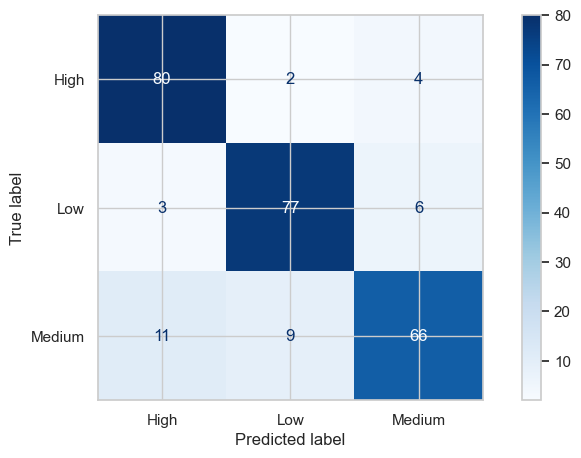


=== SVM (RBF) ===
Accuracy: 0.8178
Classification Report:
              precision    recall  f1-score   support

        High       0.90      0.88      0.89        86
         Low       0.79      0.87      0.83        86
      Medium       0.76      0.70      0.73        86

    accuracy                           0.82       258
   macro avg       0.82      0.82      0.82       258
weighted avg       0.82      0.82      0.82       258



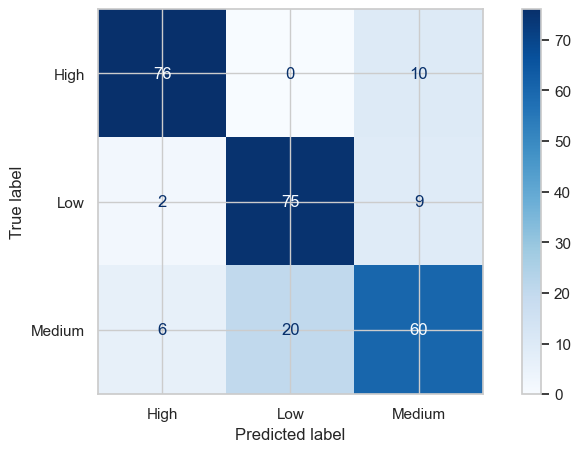


=== KNN ===
Accuracy: 0.7248
Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.53      0.69        86
         Low       0.77      0.81      0.79        86
      Medium       0.59      0.83      0.69        86

    accuracy                           0.72       258
   macro avg       0.78      0.72      0.72       258
weighted avg       0.78      0.72      0.72       258



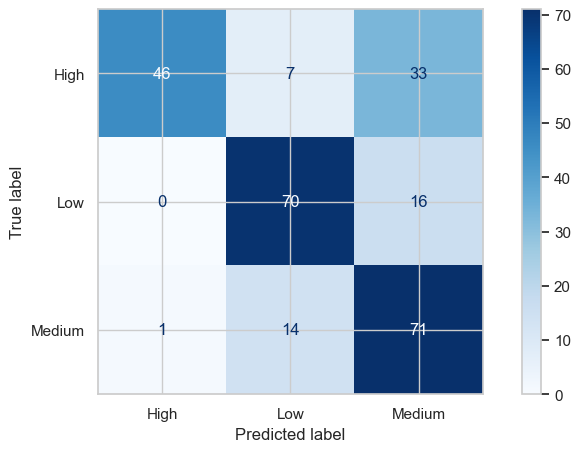


=== Decision Tree ===
Accuracy: 0.7868
Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.90      0.86        86
         Low       0.77      0.83      0.80        86
      Medium       0.76      0.64      0.70        86

    accuracy                           0.79       258
   macro avg       0.78      0.79      0.78       258
weighted avg       0.78      0.79      0.78       258



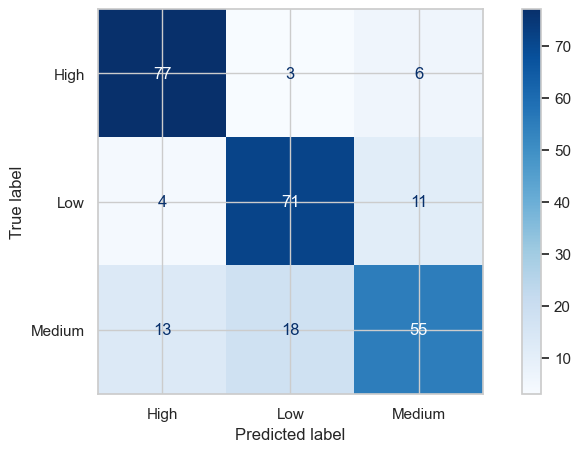

In [37]:
# --- 0️⃣ Encode labels ---
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)  # encode 'high','medium','low' -> 0,1,2
y_test_enc = le.transform(y_test)

# --- 1️⃣ Import models ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# --- 2️⃣ Define models with tuned hyperparameters ---
models = {
    "Logistic Regression": LogisticRegression(
        multi_class='multinomial', solver='lbfgs', C=1.0, max_iter=500, random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=15, min_samples_split=5, min_samples_leaf=2,
        max_features='sqrt', bootstrap=True, class_weight='balanced', random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200, max_depth=6, learning_rate=0.1, subsample=0.8,
        colsample_bytree=0.8, objective='multi:softmax', num_class=3, random_state=42
    ),
    "SVM (RBF)": SVC(
        kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True, random_state=42
    ),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=10, min_samples_split=5, min_samples_leaf=2,
        class_weight='balanced', random_state=42
    )
}

# --- 3️⃣ Train, predict, and display metrics ---
for name, model in models.items():
    model.fit(X_train, y_train_enc)
    y_pred = model.predict(X_test)
    
    print(f"\n=== {name} ===")
    
    # Accuracy
    acc = accuracy_score(y_test_enc, y_pred)
    print(f"Accuracy: {acc:.4f}")
    
    # Classification report (Precision, Recall, F1-score)
    print("Classification Report:")
    print(classification_report(y_test_enc, y_pred, target_names=le.classes_))
    
    # Confusion matrix
    cm = confusion_matrix(y_test_enc, y_pred, labels=[0,1,2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()



Random Forest

Test Accuracy: 0.8798
Classification Report:
              precision    recall  f1-score   support

        High       0.90      0.93      0.91        86
         Low       0.87      0.94      0.91        86
      Medium       0.87      0.77      0.81        86

    accuracy                           0.88       258
   macro avg       0.88      0.88      0.88       258
weighted avg       0.88      0.88      0.88       258



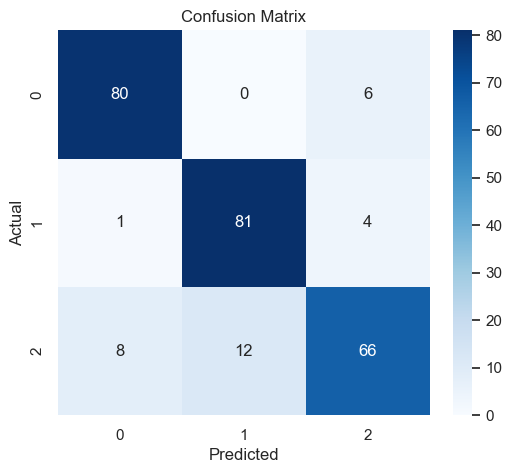

Random Forest model saved as rf_model.pkl


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------
#  Model Definition
# -----------------------
rf = RandomForestClassifier(
    n_estimators=1200,
    criterion='gini',
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Target column
target = 'epds_result'

# Features & target
X = df_final.drop(columns=[target])
y = df_final[target]

# Train model
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# -----------------------
#  Evaluation
# -----------------------
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

best_model = models["Random Forest"]

# Fit using your encoded values
best_model.fit(X_train, y_train_enc)

joblib.dump(best_model, "rf_model.pkl")
print("Random Forest model saved as rf_model.pkl")



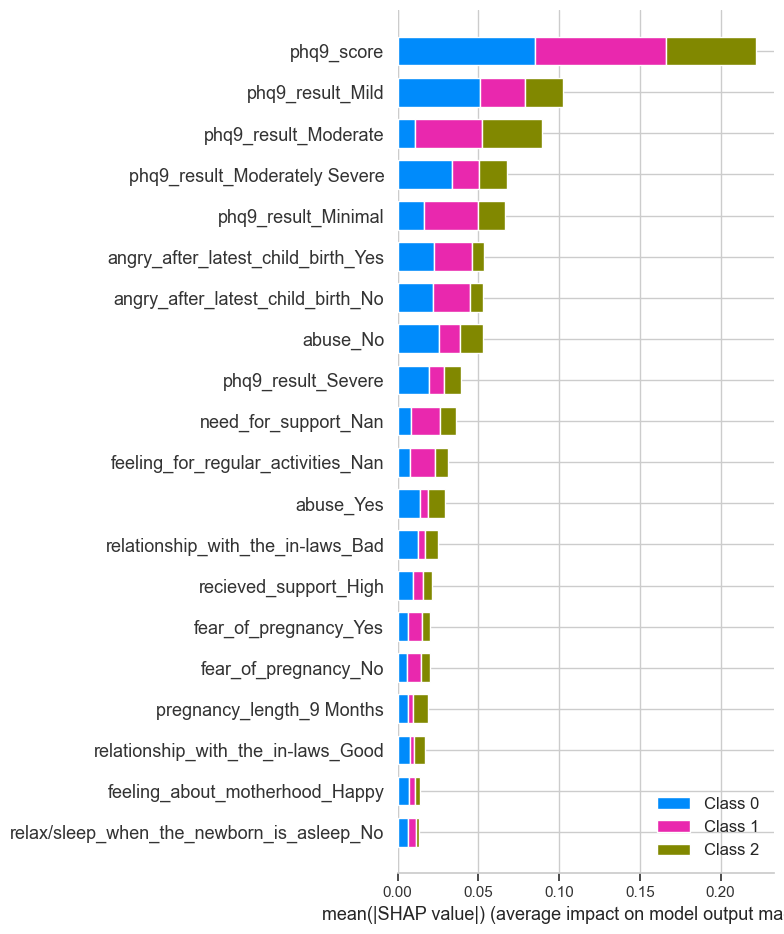


SHAP summary for class: High


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [39]:
import shap
import matplotlib.pyplot as plt

# Safe sampling
sample_size = min(200, len(X_train))
X_shap = X_train.sample(sample_size, random_state=42)

# SHAP explainer
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_shap)

# Global importance
shap.summary_plot(
    shap_values,
    X_shap,
    feature_names=X_shap.columns,
    plot_type="bar"
)

# Per-class summary
for i, cls in enumerate(rf.classes_):
    print(f"\nSHAP summary for class: {cls}")
    shap.summary_plot(
        shap_values[i],
        X_shap,
        feature_names=X_shap.columns
    )



In [ ]:
import shap
import matplotlib.pyplot as plt

# Safe sample size
sample_size = min(200, len(X_train))
X_shap = X_train.sample(sample_size, random_state=42)

# TreeExplainer (NO check_additivity here)
explainer = shap.TreeExplainer(
    rf,
    feature_perturbation="tree_path_dependent"
)

# Disable additivity check HERE
shap_values = explainer.shap_values(
    X_shap,
    check_additivity=False
)

# Global importance (bar)
shap.summary_plot(
    shap_values,
    X_shap,
    feature_names=X_shap.columns,
    plot_type="bar"
)

# Class-wise explanation
for i, cls in enumerate(rf.classes_):
    print(f"\nSHAP summary for class: {cls}")
    shap.summary_plot(
        shap_values[i],
        X_shap,
        feature_names=X_shap.columns,
        max_display=15
    )


: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1️⃣ Features and target ---
target = 'epds_result'
X = df_final.drop(columns=[target])
y = df_final[target]

# --- 2️⃣ Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3️⃣ Define the Random Forest model ---
rf = RandomForestClassifier(
    n_estimators=1200,
    criterion='gini',
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# --- 4️⃣ Train the model ---
rf.fit(X_train, y_train)

# --- 5️⃣ Save the trained model ---
joblib.dump(rf, "Random_Forest.pkl")
print("Random_Forest.pkl saved successfully!")

# --- 6️⃣ Predict on test set ---
y_pred = rf.predict(X_test)

# --- 7️⃣ Evaluate Accuracy ---
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# --- 8️⃣ Classification Report ---
print("Classification Report:")
print(classification_report(y_test, y_pred))

# --- 9️⃣ Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=['high','medium','low'])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['high','medium','low'], yticklabels=['high','medium','low'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()



NameError: name 'df_final' is not defined

Feature Importance

                                          feature  importance
2                                      phq9_score    0.184012
153                              phq9_result_Mild    0.046025
156                 phq9_result_Moderately Severe    0.042370
154                           phq9_result_Minimal    0.039473
155                          phq9_result_Moderate    0.029778
144            angry_after_latest_child_birth_Yes    0.027227
158                            phq9_result_Severe    0.025226
143             angry_after_latest_child_birth_No    0.023980
0                                             age    0.022785
98                                       abuse_No    0.019435
94                           need_for_support_Nan    0.013388
146            feeling_for_regular_activities_Nan    0.013238
99                                      abuse_Yes    0.011920
88                          recieved_support_High    0.010203
67              relationship_with_the_in-laws_Bad    0.008600
1       

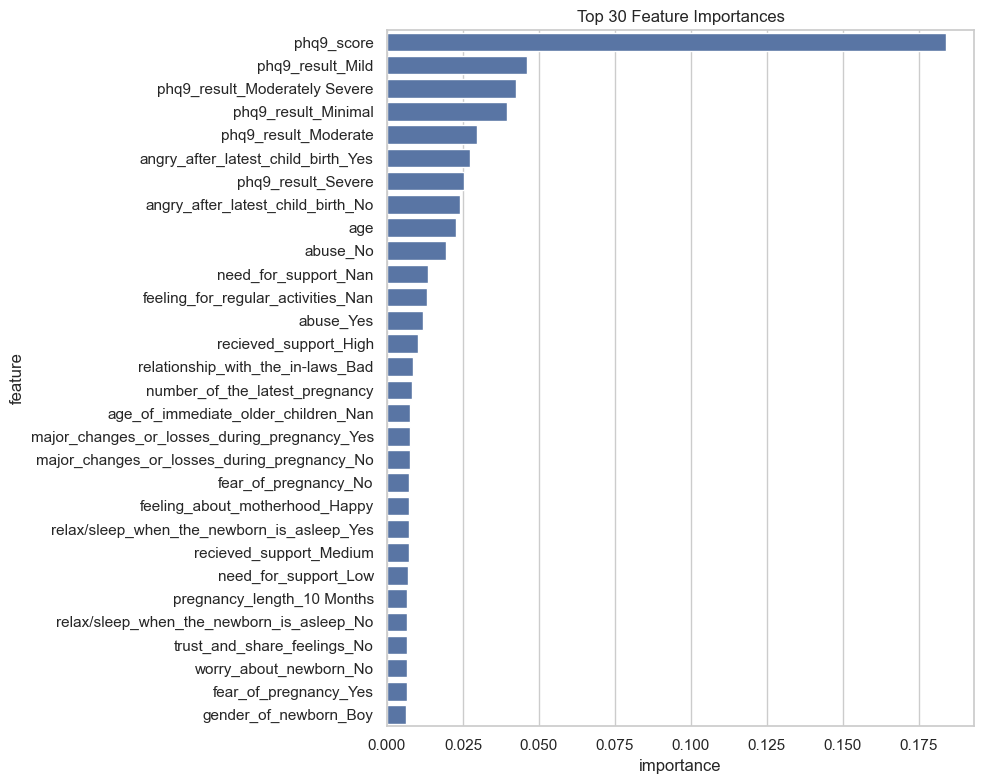

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the encoded feature names
feature_names = X_balanced.columns  

# Feature importance
feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

# Show top 30
print(feat_imp.head(50))

# Plot top 30
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feat_imp.head(30))
plt.title("Top 30 Feature Importances")
plt.tight_layout()
plt.show()


Class weights in loss function
Oversampling minority class (SMOTE) before training:

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


B. Use mini-batch training

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()


Test Accuracy: 0.7375
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        70
           1       0.77      0.83      0.80        52
           2       0.45      0.26      0.33        38

    accuracy                           0.74       160
   macro avg       0.67      0.67      0.66       160
weighted avg       0.70      0.74      0.71       160



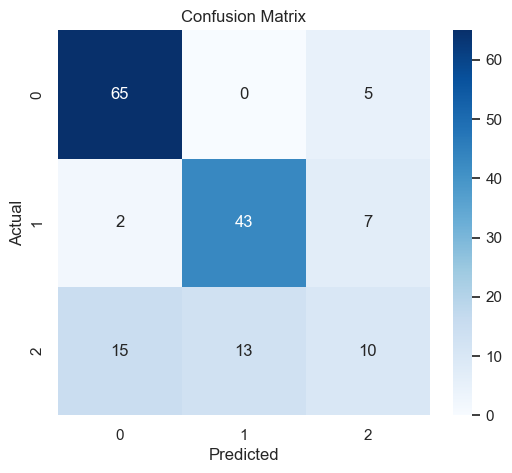

In [ ]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
acc = accuracy_score(y_true, predicted)
print(f"Test Accuracy: {acc:.4f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_true, predicted))

# Confusion Matrix
cm = confusion_matrix(y_true, predicted)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


class weight


Epoch [10/60], Loss: 0.5949
Epoch [20/60], Loss: 0.5052
Epoch [30/60], Loss: 0.4298
Epoch [40/60], Loss: 0.3391
Epoch [50/60], Loss: 0.2752
Epoch [60/60], Loss: 0.2209

Test Accuracy: 0.7812

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        70
           1       0.83      0.77      0.80        52
           2       0.56      0.61      0.58        38

    accuracy                           0.78       160
   macro avg       0.76      0.75      0.75       160
weighted avg       0.79      0.78      0.78       160



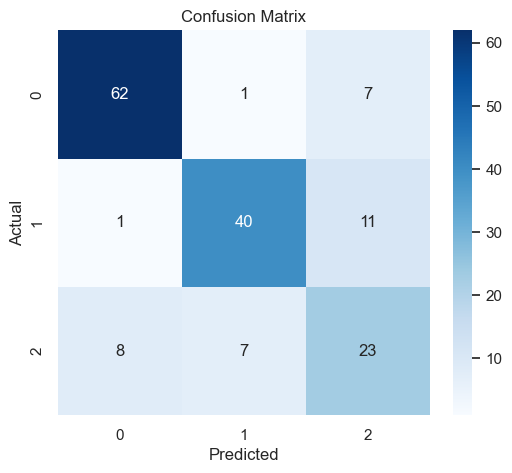

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Prepare tensors ---
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

# --- 2. Dataset and DataLoader for mini-batches ---
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# --- 3. Model definition ---
class TabularNN(nn.Module):
    def __init__(self, input_dim, hidden1=128, hidden2=64, output_dim=3):
        super(TabularNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
)

    def forward(self, x):
        return self.model(x)

input_dim = X_train_tensor.shape[1]
model = TabularNN(input_dim).to(device)

# --- 4. Class weights (manual tweak) ---
# Example: Increase weight for minority class (class 2)
class_weights = torch.tensor([1.14, 1.53, 2.09], dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# --- 5. Training loop ---
epochs = 60
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_X.size(0)
    epoch_loss /= len(train_loader.dataset)
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")

# --- 6. Evaluation ---
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

# Accuracy
acc = accuracy_score(y_true, predicted)
print(f"\nTest Accuracy: {acc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, predicted))

# Confusion Matrix
cm = confusion_matrix(y_true, predicted)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


FT-Transformer Training Pipeline 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class TabularNN(nn.Module):
    def __init__(self, input_dim, hidden1=128, hidden2=64, output_dim=3):
        super(TabularNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden2, output_dim)
        )
        
    def forward(self, x):
        return self.model(x)

# Example usage
input_dim = X_train.shape[1]
model = TabularNN(input_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)





Epoch [10/70], Loss: 0.9633
Epoch [20/70], Loss: 0.7561
Epoch [30/70], Loss: 0.6345
Epoch [40/70], Loss: 0.5414
Epoch [50/70], Loss: 0.4805
Epoch [60/70], Loss: 0.4191
Epoch [70/70], Loss: 0.3836
Test Accuracy: 0.7500
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        70
           1       0.79      0.79      0.79        52
           2       0.52      0.39      0.45        38

    accuracy                           0.75       160
   macro avg       0.71      0.70      0.70       160
weighted avg       0.73      0.75      0.74       160



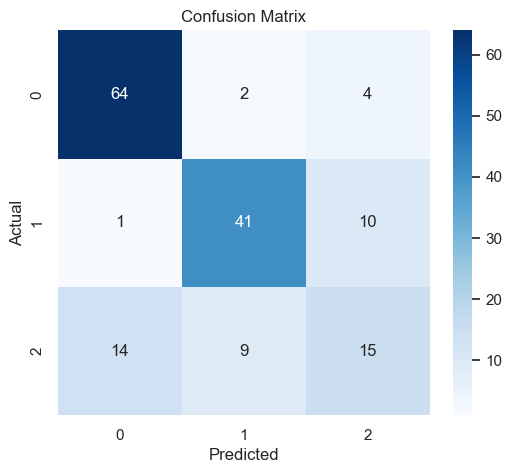

In [ ]:
import torch

# Assuming X_train, X_test, y_train, y_test are pandas DataFrames / Series
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)

epochs = 70
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_tensor)
    
    # Compute loss
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)  # get class index
    predicted = predicted.cpu().numpy()  # move to CPU for sklearn
    y_true = y_test_tensor.cpu().numpy()

# Accuracy
acc = accuracy_score(y_true, predicted)
print(f"Test Accuracy: {acc:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_true, predicted))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, predicted)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -------------------
# 0. Assume you have:
# X_train, X_test: feature DataFrames
# y_train, y_test: labels (strings)
# -------------------

# -------------------
# 1. Feature preprocessing
# -------------------
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded, X_train_encoded = X_test.align(X_train_encoded, join='left', axis=1, fill_value=0)

# -------------------
# 2. Encode labels
# -------------------
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded  = le.transform(y_test)

# -------------------
# 3. Convert to tensors
# -------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(X_train_encoded.values, dtype=torch.float32).to(device)
X_test_tensor  = torch.tensor(X_test_encoded.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long).to(device)
y_test_tensor  = torch.tensor(y_test_encoded, dtype=torch.long).to(device)

# -------------------
# 4. Split training set into train + validation
# -------------------
val_size = int(0.1 * len(X_train_tensor))
train_size = len(X_train_tensor) - val_size
train_dataset, val_dataset = random_split(TensorDataset(X_train_tensor, y_train_tensor),
                                          [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)

# -------------------
# 5. Define a more powerful neural network
# -------------------
class PowerfulTabularNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PowerfulTabularNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(128, output_dim)
        )
    def forward(self, x):
        return self.model(x)

input_dim = X_train_tensor.shape[1]
output_dim = len(np.unique(y_train_encoded))
model = PowerfulTabularNN(input_dim=input_dim, output_dim=output_dim).to(device)

# -------------------
# 6. Class weights
# -------------------
class_weights_np = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weights = torch.tensor(class_weights_np, dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

# -------------------
# 7. Training loop with validation & early stopping
# -------------------
epochs = 100
early_stop_patience = 10
best_val_loss = float('inf')
patience_counter = 0

train_losses, val_losses = [], []

for epoch in range(epochs):
    # --- training ---
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_X.size(0)
    epoch_loss /= len(train_loader.dataset)
    train_losses.append(epoch_loss)
    
    # --- validation ---
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item() * batch_X.size(0)
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    scheduler.step(val_loss)

    print(f"Epoch [{epoch+1}/{epochs}] Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        patience_counter += 1
        if patience_counter >= early_stop_patience:
            print("Early stopping triggered.")
            break

# Load the best model
model.load_state_dict(torch.load('best_model.pt'))

# -------------------
# 8. Evaluation
# -------------------
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

acc = accuracy_score(y_true, predicted)
print(f"\nTest Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_true, predicted, target_names=le.classes_))

cm = confusion_matrix(y_true, predicted)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Optional: plot training/validation loss
plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()


Epoch [1/100] Train Loss: 0.9320, Val Loss: 0.8524
Epoch [2/100] Train Loss: 0.6333, Val Loss: 0.6188
Epoch [3/100] Train Loss: 0.5172, Val Loss: 0.6064
Epoch [4/100] Train Loss: 0.4626, Val Loss: 0.6335
Epoch [5/100] Train Loss: 0.3940, Val Loss: 0.6497
Epoch [6/100] Train Loss: 0.3322, Val Loss: 0.6840
Epoch [7/100] Train Loss: 0.2862, Val Loss: 0.6841
Epoch [8/100] Train Loss: 0.2206, Val Loss: 0.7010
Epoch 00009: reducing learning rate of group 0 to 5.0000e-04.
Epoch [9/100] Train Loss: 0.2185, Val Loss: 0.8590
Epoch [10/100] Train Loss: 0.1890, Val Loss: 0.8430
Epoch [11/100] Train Loss: 0.1487, Val Loss: 0.8234
Epoch [12/100] Train Loss: 0.1208, Val Loss: 0.8175
Epoch [13/100] Train Loss: 0.1115, Val Loss: 0.8481
Early stopping triggered.

Test Accuracy: 0.7937

Classification Report:


TypeError: object of type 'numpy.int32' has no len()

xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Suppose you already have your one-hot encoded dataset
# X = encoded_df.drop("label", axis=1)
# y = encoded_df["label"]

# Example (comment this out if you already have X, y):
# df = pd.read_csv("your_encoded_data.csv")
# X = df.drop("label", axis=1)
# y = df["label"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# --- Evaluation ---
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


ModuleNotFoundError: No module named 'xgboost'

LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Target
target = 'epds_result'
y = df_final[target]

# Features
X = df_final.drop(columns=[target])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Multinomial logistic regression for multiclass classification
logreg = LogisticRegression(
    multi_class='multinomial',   # for multi-class
    solver='saga',               # handles large datasets & supports multinomial
    max_iter=500,                # increase if convergence warnings appear
    class_weight='balanced',     # handle class imbalance
    random_state=42,
    n_jobs=-1
)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


c:\Users\Ismum\miniconda3\envs\MLBase\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


: 

: 

Evaluate Performance for LogisticRegression

Test Accuracy: 0.7250
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        70
           1       0.82      0.77      0.79        52
           2       0.44      0.47      0.46        38

    accuracy                           0.72       160
   macro avg       0.69      0.69      0.69       160
weighted avg       0.73      0.72      0.73       160



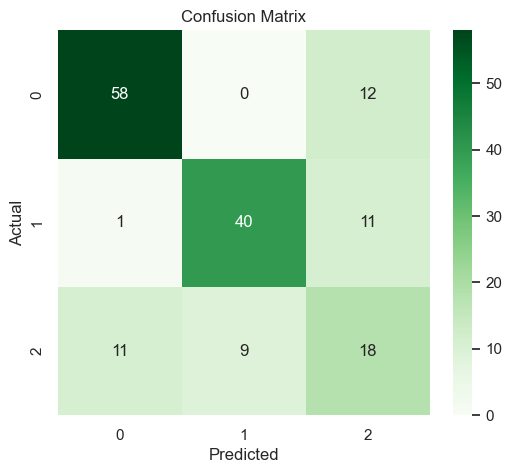

: 

: 

In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Target
target = 'epds_result'
y = df_final[target]

# Features
X = df_final.drop(columns=[target])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

et = ExtraTreesClassifier(
    n_estimators=200,          # number of trees
    max_depth=15,              # limit depth to prevent overfitting
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',       # similar to Random Forest
    class_weight='balanced',   # handle class imbalance
    random_state=42,
    n_jobs=-1
)


et.fit(X_train, y_train)
y_pred = et.predict(X_test)



: 

: 

Evaluate Performance for Extra Trees Classifier

Test Accuracy: 0.7438
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        70
           1       0.81      0.73      0.77        52
           2       0.50      0.47      0.49        38

    accuracy                           0.74       160
   macro avg       0.71      0.70      0.70       160
weighted avg       0.74      0.74      0.74       160



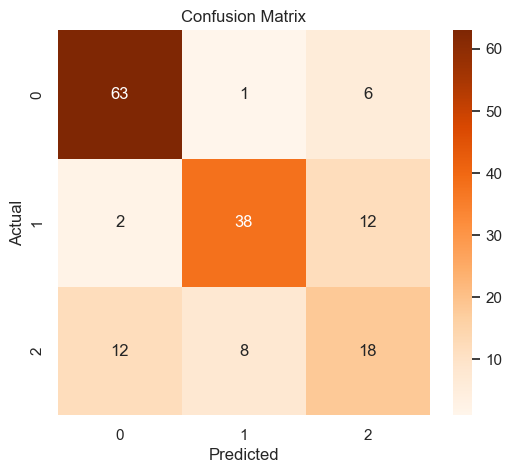

: 

: 

In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.svm import LinearSVC

# Target
target = 'epds_result'
y = df_final[target]

# Features
X = df_final.drop(columns=[target])


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


svc = LinearSVC(
    C=1.0,               # Regularization parameter
    max_iter=5000,        # Increase if convergence warnings appear
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)


svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)



: 

: 

Evaluate Performance for LinearSVC

Test Accuracy: 0.7000
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        70
           1       0.76      0.75      0.76        52
           2       0.39      0.39      0.39        38

    accuracy                           0.70       160
   macro avg       0.66      0.66      0.66       160
weighted avg       0.70      0.70      0.70       160



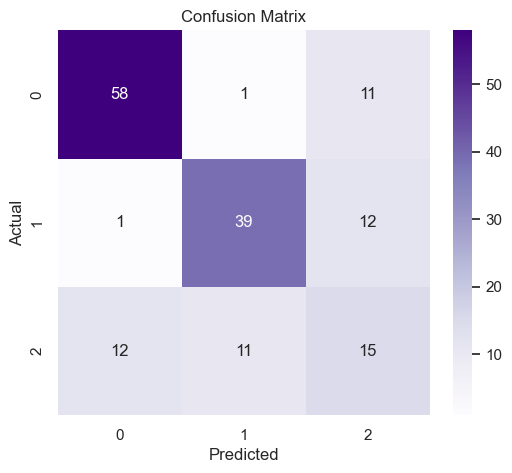

: 

: 

In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

: 

: 

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

: 

: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# XGBoost (MULTI-CLASS EXAMPLE)
xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(y_train.unique())
)
xgb_model.fit(X_train, y_train)

# Voting Ensemble
ensemble = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    voting='soft'
)

ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)



: 

: 

In [ ]:
print(y_train.dtype)
print(y_train.unique()[:10])


int64
[1 2 0]


: 

: 

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=3
)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, ...)

: 

: 

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    tree_method='hist'   # fast and stable
)

xgb_model.fit(X_train, y_train)

print(xgb_model.get_booster().attributes())


{}


: 

: 

In [ ]:
ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_class=3, ...))],
                 voting='soft')

: 

: 

: 

: 

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

estimators = [
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier(objective='multi:softprob', num_class=3))
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000)
)

stack.fit(X_train, y_train)
pred = stack.predict(X_test)



: 

: 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))


Accuracy: 0.78125
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        70
           1       0.82      0.81      0.82        52
           2       0.59      0.50      0.54        38

    accuracy                           0.78       160
   macro avg       0.75      0.74      0.74       160
weighted avg       0.77      0.78      0.77       160



: 

: 

In [ ]:
xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=3
)

xgb_model.fit(X_train, y_train)
print(xgb_model.get_booster().attributes())


{}


: 

: 

In [ ]:
print(X_train.dtypes)
print(X_train.isna().sum())
print(X_train.shape)


age                               float64
number_of_the_latest_pregnancy    float64
phq9_score                        float64
residence_City                    float64
residence_Village                 float64
                                   ...   
phq9_result_Minimal               float64
phq9_result_Moderate              float64
phq9_result_Moderately Severe     float64
phq9_result_Normal                float64
phq9_result_Severe                float64
Length: 159, dtype: object
age                               0
number_of_the_latest_pregnancy    0
phq9_score                        0
residence_City                    0
residence_Village                 0
                                 ..
phq9_result_Minimal               0
phq9_result_Moderate              0
phq9_result_Moderately Severe     0
phq9_result_Normal                0
phq9_result_Severe                0
Length: 159, dtype: int64
(640, 159)


: 

: 

Value Counts:
epds_result
High      350
Low       260
Medium    190
Name: count, dtype: int64

Percentages:
epds_result
High      43.75
Low       32.50
Medium    23.75
Name: proportion, dtype: float64


C:\Users\Ismum\AppData\Local\Temp\ipykernel_14676\1806452236.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='epds_result', palette='viridis')


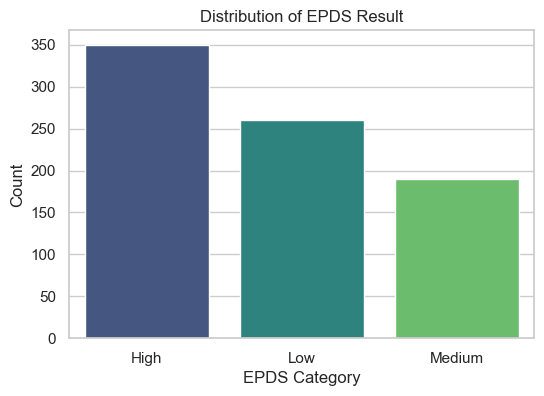

: 

: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count values
print("Value Counts:")
print(df['epds_result'].value_counts())

print("\nPercentages:")
print(df['epds_result'].value_counts(normalize=True) * 100)

# Plot distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='epds_result', palette='viridis')
plt.title("Distribution of EPDS Result")
plt.xlabel("EPDS Category")
plt.ylabel("Count")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_balanced, y_balanced = sm.fit_resample(X, y)

print("Before balancing:", y.value_counts())
print("After balancing:", y_balanced.value_counts())


Before balancing: epds_result
0    350
1    260
2    190
Name: count, dtype: int64
After balancing: epds_result
0    350
1    350
2    350
Name: count, dtype: int64


: 

: 